## __Ghost Front__

This script uses HUXt to simulate CME propogation through the interplanetay plane in order to explore the distortion of the leading edge. Using elongation angle of the nose and flank the idea of a ghost front is explored, as seen in Scott et al., 2019.

Obsevations from STEREO's HI cameras are compared to the elongation angles simulated in this model to develop our understanding on the physical features detected in 2D running differened imagery. Further analysis includes forecasting the arrivial time and speed of the leading edge at 1AU, and measuring the residual errors . Ensemble forcasting can be applied using the ambiguity in the estimated initial condition (originally gathered from spacecraft observations) to find minimum residual error of the CME's elongation profile.

_(Lauren A. James)_

__Import Libraries__


In [1]:
# Import libaries
# As seen in HIEnsembleHindcast/ensemble_analysis.ipynb by L.Barnard ()
import HUXt as H
#import HIEnsembleHindcast as heh
#import HI_analysis as hip
import testing as TEST
import tables
import astropy.units as u
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import gridspec
import moviepy.editor as mpy
from moviepy.video.io.bindings import mplfig_to_npimage
import numpy as np
import pandas as pd
import os 
from astropy.time import Time, TimeDelta
from astropy.visualization import time_support
import scipy.stats as st
from scipy.interpolate import interp1d
import glob
import math
import sunpy.coordinates.sun as sn
import h5py
import ensemble as ens
import matplotlib.ticker as ticker
from datetime import datetime, timedelta
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import matplotlib.lines as mlines


__Solar Wind Check__

Can produce figures that show:
1. Solar wind input at inner boundary.
2. HUXt output at 30R$_{sun}$ for a 27 day model run.
3. HelioMAS output at 30R$_{sun}$ for a 27 day model run.

The HUXt output is the only figure to show here.

In [71]:
help(model)

Help on HUXt in module HUXt object:

class HUXt(builtins.object)
 |  HUXt(v_boundary=<Quantity nan km / s>, cr_num=nan, cr_lon_init=<Quantity 360. deg>, r_min=<Quantity 30. solRad>, r_max=<Quantity 240. solRad>, lon_out=<Quantity nan rad>, lon_start=<Quantity nan rad>, lon_stop=<Quantity nan rad>, simtime=<Quantity 5. d>, dt_scale=1.0, map_inwards=False)
 |  
 |  A class containing the HUXt model described in Owens et al. (2020, DOI: 10.1007/s11207-020-01605-3)
 |  
 |  Users must specify the solar wind speed boundary condition through either the v_boundary, or cr_num keyword
 |  arguments. Failure to do so defaults to a 400 km/s boundary. v_boundary takes precedence over cr_num, so specifying
 |  both results in only v_boundary being used.
 |  
 |  Model coordinate system is HEEQ radius and longitude.
 |  
 |  Attributes:
 |      cmes: A list of ConeCME instances used in the model solution.
 |      cr_num: If provided, this gives the Carrington rotation number of the selected period, 

In [322]:
# tomographySW = pd.read_csv(r"CorTom_CR2077.csv", header=None)
# tomoboundary = tomographySW [0].to_numpy()
# v_innerTomography = np.flip(tomoboundary, axis=0) * (u.km/u.s)
file = open("posterior_MJDstart54790_STA_STB_ACE.txt","r")
lines = file.read().split(' ')

lista=pd.read_csv(r'posterior_MJDstart54790_STA_STB_ACE.txt', sep=" ", header=None)
threevboundary = lista.iloc[0,:].to_list()
v_boundaryTHREE = np.flip(threevboundary, axis=0)*(u.km/u.s)

(<Figure size 1008x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f7cb2add0d0>)

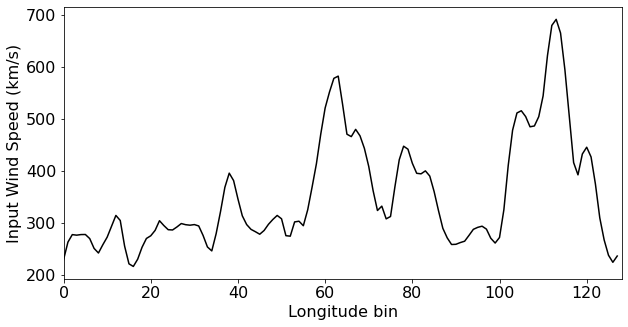

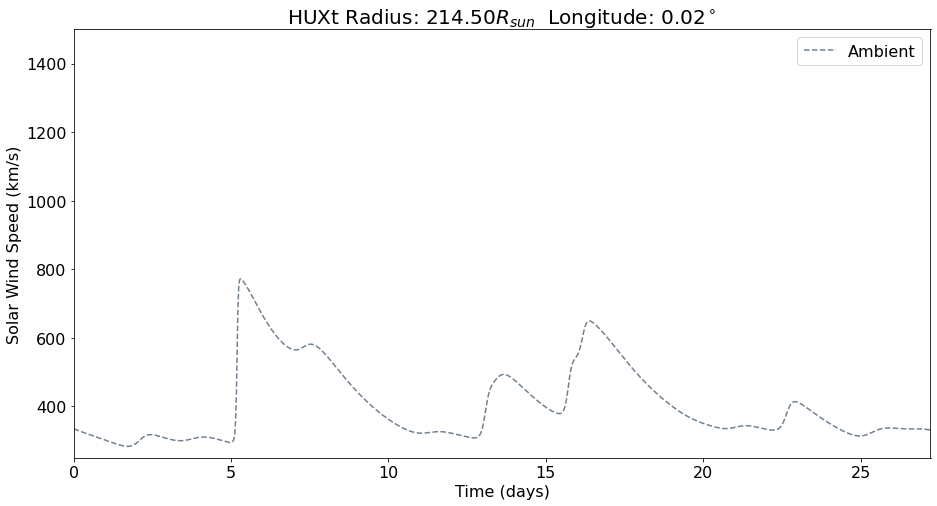

In [2]:
#Solar wind check
# View the difference between DA solar wind array and HelioMAS

cme_list = []
r = 1*u.AU

# DA array
v_boundary =np.flip([2.361374481276616564e+02, 2.240716540668226173e+02, 2.376358249750887524e+02, 2.672482825902510513e+02, 3.096930808344839647e+02, 3.746892075320072308e+02, 4.268668006326229829e+02, 4.456230409562588761e+02, 4.325098393596861115e+02, 3.923976427092088670e+02, 4.160318741275664820e+02, 5.042482225194921739e+02, 5.947393810828092455e+02, 6.654072046028741170e+02, 6.917310550116643526e+02, 6.800427872609535598e+02, 6.219320569550533264e+02, 5.444059259203741021e+02, 5.043734613245545120e+02, 4.865263506790949464e+02, 4.849001221974726263e+02, 5.045156599835149223e+02, 5.157868414718000167e+02, 5.115173862842027006e+02, 4.783484024373857437e+02, 4.105433314643044014e+02, 3.252113536761797832e+02, 2.718381068427589753e+02, 2.611473445493025451e+02, 2.703445822983272251e+02, 2.879318070637758638e+02, 2.935649302292242169e+02, 2.913420114766625488e+02, 2.875243364183726271e+02, 2.758837083349550880e+02, 2.646586033040824191e+02, 2.620296606197267693e+02, 2.587181867060620561e+02, 2.583143812807093127e+02, 2.711622648112132197e+02, 2.895073025814325547e+02, 3.236093677154411807e+02, 3.602300486613148678e+02, 3.901021949691497639e+02, 4.000613537591571003e+02, 3.943689844061491954e+02, 3.953941447719399775e+02, 4.148021072583192677e+02, 4.417805902433387359e+02, 4.475472602689640098e+02, 4.214612344162281943e+02, 3.691015029453656098e+02, 3.122498162083122111e+02, 3.076938832484911472e+02, 3.321704537666684587e+02, 3.237507334340671150e+02, 3.621217972086897703e+02, 4.086377362649376437e+02, 4.435046064447465142e+02, 4.674792239491621331e+02, 4.799666692694719927e+02, 4.660162447073083172e+02, 4.706506215244046416e+02, 5.282817264033329820e+02, 5.824612174466126362e+02, 5.781493288632007079e+02, 5.519533093062667604e+02, 5.210893551054840600e+02, 4.711116992875964797e+02, 4.139039864812964993e+02, 3.685148444664304748e+02, 3.251115004054694282e+02, 2.944497484406588228e+02, 3.031728641854660964e+02, 3.017908650651369271e+02, 2.743621772706765114e+02, 2.753093603743015478e+02, 3.077932819486480867e+02, 3.142715901784403059e+02, 3.064569671412821776e+02, 2.972113560702332506e+02, 2.853275333911390703e+02, 2.781041597484824592e+02, 2.829676208301811471e+02, 2.874501592038274111e+02, 2.966814584993215362e+02, 3.135194107222907860e+02, 3.460091136549031603e+02, 3.814157744293487440e+02, 3.956749772192871433e+02, 3.684143935201673230e+02, 3.216986131456232556e+02, 2.792803446540552841e+02, 2.460060315632212564e+02, 2.535853141438094838e+02, 2.757920731764543234e+02, 2.940431313281729899e+02, 2.966822515328578334e+02, 2.954926028486351584e+02, 2.964600448988716721e+02, 2.986598892164937524e+02, 2.920602210256048465e+02, 2.862971285267943813e+02, 2.868135105926763799e+02, 2.948319974536670998e+02, 3.041351166652279971e+02, 2.854976713451857790e+02, 2.751327922228102238e+02, 2.699486953595605314e+02, 2.530033160147730484e+02, 2.300846477066176874e+02, 2.160876697185309183e+02, 2.211210117332515495e+02, 2.552383171466590284e+02, 3.045731933828458864e+02, 3.142951676630700035e+02, 2.933001971616943706e+02, 2.724793215158809971e+02, 2.577975418023809198e+02, 2.419712959689771878e+02, 2.507924724446661173e+02, 2.696897715708585679e+02, 2.776005233833919306e+02, 2.774424641305166119e+02, 2.763144001268291845e+02, 2.773574489888984544e+02, 2.629291468608762443e+02, 2.292533503180667935e+02], axis=0)* (u.km/u.s)

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(v_boundary,'k-')
ax.set_xlabel('Longitude bin')
ax.set_ylabel('Input Wind Speed (km/s)')
ax.set_xlim(0,128)


model = H.HUXt(v_boundary=v_boundary, cr_num=2077, lon_out=0.0*u.deg, simtime=27.27*u.day, dt_scale=4)
model.solve(cme_list)
model.plot_timeseries(r, lon=0.0*u.deg,field='ambient')

# HelioMAS\
# model = H.HUXt(cr_num=2077, lon_out=0.0*u.deg, simtime=27.27*u.day, dt_scale=4)
# model.solve(cme_list)
# model.plot_timeseries(r, lon=0.0*u.deg,field='ambient',save=False,tag='init_sw')
# # plt.plot(df_ace.time, df_ace.speed)



Demo: ___Inner boundary moved inwards___

In [ ]:
H.map_v_boundary_inwards(v_boundary, 30*u.au, 8*u.au)

***
### **Single event run** 
*(i.e. deterministic)*

Set-up coronal mass ejection event and HUXt conditions. 
Solve (& save) the model, frame of propogation two-days into propogation, 5-day time series at Earth, and movie of propogation.

(<Figure size 720x720 with 2 Axes>,
 <matplotlib.axes._subplots.PolarAxesSubplot at 0x7f7cb95d1f90>)

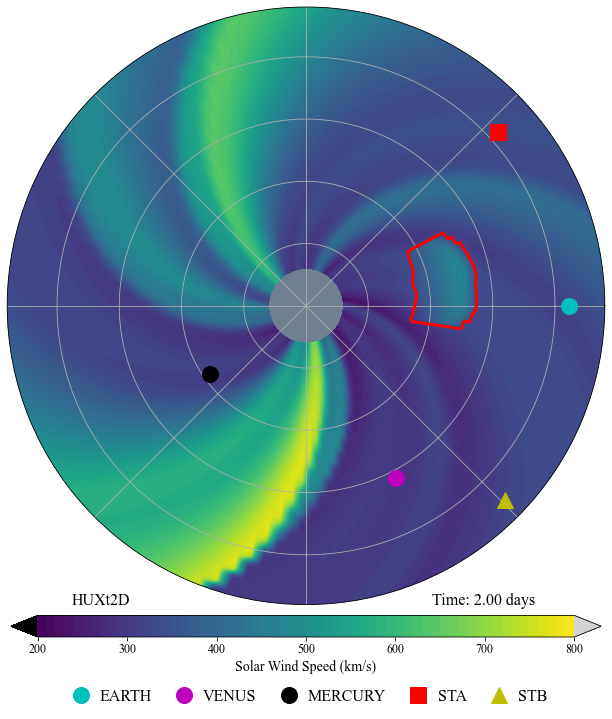

In [40]:
# Tag for file management. Event: 12 December 2008
event = '12Dec08_TEST'

# # CME conditions
# t_launch = 0.0 * u.day
# longitude = 6.384 * u.deg
# latitude = 9.991 * u.deg
# width = 44.680 * u .deg
# v = 516.757 * (u.km/u.s)
# thickness = 6.035 * u.solRad

# CME conditions
t_launch = 0.0 * u.day
longitude = 10.0 * u.deg
latitude = 9.0 * u.deg
width = 42 * u .deg
v = 497 * (u.km/u.s)
thickness = 5 * u.solRad

# HUXt conditions
v_boundary = np.flip([2.361374481276616564e+02, 2.240716540668226173e+02, 2.376358249750887524e+02, 2.672482825902510513e+02, 3.096930808344839647e+02, 3.746892075320072308e+02, 4.268668006326229829e+02, 4.456230409562588761e+02, 4.325098393596861115e+02, 3.923976427092088670e+02, 4.160318741275664820e+02, 5.042482225194921739e+02, 5.947393810828092455e+02, 6.654072046028741170e+02, 6.917310550116643526e+02, 6.800427872609535598e+02, 6.219320569550533264e+02, 5.444059259203741021e+02, 5.043734613245545120e+02, 4.865263506790949464e+02, 4.849001221974726263e+02, 5.045156599835149223e+02, 5.157868414718000167e+02, 5.115173862842027006e+02, 4.783484024373857437e+02, 4.105433314643044014e+02, 3.252113536761797832e+02, 2.718381068427589753e+02, 2.611473445493025451e+02, 2.703445822983272251e+02, 2.879318070637758638e+02, 2.935649302292242169e+02, 2.913420114766625488e+02, 2.875243364183726271e+02, 2.758837083349550880e+02, 2.646586033040824191e+02, 2.620296606197267693e+02, 2.587181867060620561e+02, 2.583143812807093127e+02, 2.711622648112132197e+02, 2.895073025814325547e+02, 3.236093677154411807e+02, 3.602300486613148678e+02, 3.901021949691497639e+02, 4.000613537591571003e+02, 3.943689844061491954e+02, 3.953941447719399775e+02, 4.148021072583192677e+02, 4.417805902433387359e+02, 4.475472602689640098e+02, 4.214612344162281943e+02, 3.691015029453656098e+02, 3.122498162083122111e+02, 3.076938832484911472e+02, 3.321704537666684587e+02, 3.237507334340671150e+02, 3.621217972086897703e+02, 4.086377362649376437e+02, 4.435046064447465142e+02, 4.674792239491621331e+02, 4.799666692694719927e+02, 4.660162447073083172e+02, 4.706506215244046416e+02, 5.282817264033329820e+02, 5.824612174466126362e+02, 5.781493288632007079e+02, 5.519533093062667604e+02, 5.210893551054840600e+02, 4.711116992875964797e+02, 4.139039864812964993e+02, 3.685148444664304748e+02, 3.251115004054694282e+02, 2.944497484406588228e+02, 3.031728641854660964e+02, 3.017908650651369271e+02, 2.743621772706765114e+02, 2.753093603743015478e+02, 3.077932819486480867e+02, 3.142715901784403059e+02, 3.064569671412821776e+02, 2.972113560702332506e+02, 2.853275333911390703e+02, 2.781041597484824592e+02, 2.829676208301811471e+02, 2.874501592038274111e+02, 2.966814584993215362e+02, 3.135194107222907860e+02, 3.460091136549031603e+02, 3.814157744293487440e+02, 3.956749772192871433e+02, 3.684143935201673230e+02, 3.216986131456232556e+02, 2.792803446540552841e+02, 2.460060315632212564e+02, 2.535853141438094838e+02, 2.757920731764543234e+02, 2.940431313281729899e+02, 2.966822515328578334e+02, 2.954926028486351584e+02, 2.964600448988716721e+02, 2.986598892164937524e+02, 2.920602210256048465e+02, 2.862971285267943813e+02, 2.868135105926763799e+02, 2.948319974536670998e+02, 3.041351166652279971e+02, 2.854976713451857790e+02, 2.751327922228102238e+02, 2.699486953595605314e+02, 2.530033160147730484e+02, 2.300846477066176874e+02, 2.160876697185309183e+02, 2.211210117332515495e+02, 2.552383171466590284e+02, 3.045731933828458864e+02, 3.142951676630700035e+02, 2.933001971616943706e+02, 2.724793215158809971e+02, 2.577975418023809198e+02, 2.419712959689771878e+02, 2.507924724446661173e+02, 2.696897715708585679e+02, 2.776005233833919306e+02, 2.774424641305166119e+02, 2.763144001268291845e+02, 2.773574489888984544e+02, 2.629291468608762443e+02, 2.292533503180667935e+02], axis=0)* (u.km/u.s)
cr_num = 2077
cr_lon_init = 63.363 * u.deg 
simtime = 5 * u.day

cme = H.ConeCME(t_launch=t_launch, longitude=longitude, latitude = latitude, width=width, v=v, thickness=thickness)
cme_list = [cme]
model = H.HUXt(v_boundary=v_boundary, cr_num=cr_num, cr_lon_init=cr_lon_init, simtime=simtime, dt_scale=4)
model.solve(cme_list, save=False, tag=event)
model.plot(2*u.d, field='cme', save=False, tag=event)
# model.plot_timeseries(1*u.AU, lon=0.0*u.deg,field='both')
# model.animate('cme', tag=event)
# animate_schematic(model,cme, tag=event) 
# elongation_plot(cme,'HI1',"landscape", thirdfront=False, save=False, tag=event)
# deterministic_residuals(plot=True, save=False, tag=event)

Warning, multiple matches found, selecting match with greatest target overlap


NameError: name 'elongation_plot_temp' is not defined

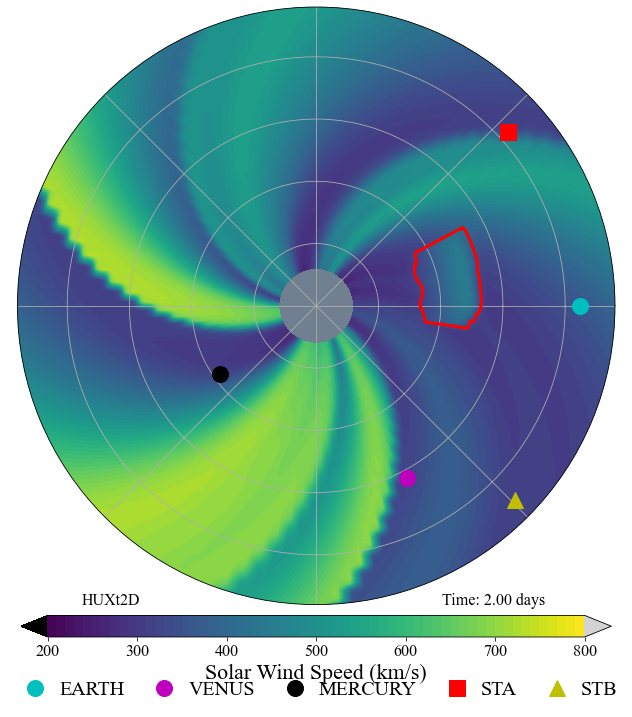

In [337]:
# Set up model using MAS
tag="12Dec2008_MAS"

# By assigning cr_num and cr_lon_init, the MAS solar wind solution is retrived
model = H.HUXt(cr_num=2077, cr_lon_init=63.363*u.deg, simtime=6*u.day, dt_scale=4)
cme = H.ConeCME(t_launch=0.0*u.day, latitude = 9.0*u.deg, longitude=10.0*u.deg, width=42*u.deg, v=497*(u.km/u.s), thickness=5*u.solRad)
model.solve([cme])
# model.animate('cme', tag=event)

cr_tag = 'cr2077_MASsolution'
model.plot(2*u.day, 'cme', save=True, tag=cr_tag)

# elongation_plot(cme,'HI1',"landscape", thirdfront=False, save=True, tag=cr_tag)
elongation_plot_temp(cme,'HI1', "landscape", thirdfront=False, save=True, tag=cr_tag)
compute_earth_arrival(cme, print_values=True, plot=False)
errorA, errorB = deterministic_error(cme, print_RMSE=True, plot=True, save=False)

***
### ** "Manual" Variable sensitivity test** 
By using the single event run, the width sensitivity is tested out over a range of 2˚ interval steps.
Dateframes of the feature residuals and width are created for both spacecrafts
Files are not saved as this is only for testing 
MESSED AROUNG WITH THIS SO NOW IT DOES NOT WORK


In [998]:
def manual_test():
    # Testing width sensitivity by adjudting the width in set intervals

    # HUXt conditions
    v_boundary = np.flip([.361374481276616564e+02, 2.240716540668226173e+02, 2.376358249750887524e+02, 2.672482825902510513e+02, 3.096930808344839647e+02, 3.746892075320072308e+02, 4.268668006326229829e+02, 4.456230409562588761e+02, 4.325098393596861115e+02, 3.923976427092088670e+02, 4.160318741275664820e+02, 5.042482225194921739e+02, 5.947393810828092455e+02, 6.654072046028741170e+02, 6.917310550116643526e+02, 6.800427872609535598e+02, 6.219320569550533264e+02, 5.444059259203741021e+02, 5.043734613245545120e+02, 4.865263506790949464e+02, 4.849001221974726263e+02, 5.045156599835149223e+02, 5.157868414718000167e+02, 5.115173862842027006e+02, 4.783484024373857437e+02, 4.105433314643044014e+02, 3.252113536761797832e+02, 2.718381068427589753e+02, 2.611473445493025451e+02, 2.703445822983272251e+02, 2.879318070637758638e+02, 2.935649302292242169e+02, 2.913420114766625488e+02, 2.875243364183726271e+02, 2.758837083349550880e+02, 2.646586033040824191e+02, 2.620296606197267693e+02, 2.587181867060620561e+02, 2.583143812807093127e+02, 2.711622648112132197e+02, 2.895073025814325547e+02, 3.236093677154411807e+02, 3.602300486613148678e+02, 3.901021949691497639e+02, 4.000613537591571003e+02, 3.943689844061491954e+02, 3.953941447719399775e+02, 4.148021072583192677e+02, 4.417805902433387359e+02, 4.475472602689640098e+02, 4.214612344162281943e+02, 3.691015029453656098e+02, 3.122498162083122111e+02, 3.076938832484911472e+02, 3.321704537666684587e+02, 3.237507334340671150e+02, 3.621217972086897703e+02, 4.086377362649376437e+02, 4.435046064447465142e+02, 4.674792239491621331e+02, 4.799666692694719927e+02, 4.660162447073083172e+02, 4.706506215244046416e+02, 5.282817264033329820e+02, 5.824612174466126362e+02, 5.781493288632007079e+02, 5.519533093062667604e+02, 5.210893551054840600e+02, 4.711116992875964797e+02, 4.139039864812964993e+02, 3.685148444664304748e+02, 3.251115004054694282e+02, 2.944497484406588228e+02, 3.031728641854660964e+02, 3.017908650651369271e+02, 2.743621772706765114e+02, 2.753093603743015478e+02, 3.077932819486480867e+02, 3.142715901784403059e+02, 3.064569671412821776e+02, 2.972113560702332506e+02, 2.853275333911390703e+02, 2.781041597484824592e+02, 2.829676208301811471e+02, 2.874501592038274111e+02, 2.966814584993215362e+02, 3.135194107222907860e+02, 3.460091136549031603e+02, 3.814157744293487440e+02, 3.956749772192871433e+02, 3.684143935201673230e+02, 3.216986131456232556e+02, 2.792803446540552841e+02, 2.460060315632212564e+02, 2.535853141438094838e+02, 2.757920731764543234e+02, 2.940431313281729899e+02, 2.966822515328578334e+02, 2.954926028486351584e+02, 2.964600448988716721e+02, 2.986598892164937524e+02, 2.920602210256048465e+02, 2.862971285267943813e+02, 2.868135105926763799e+02, 2.948319974536670998e+02, 3.041351166652279971e+02, 2.854976713451857790e+02, 2.751327922228102238e+02, 2.699486953595605314e+02, 2.530033160147730484e+02, 2.300846477066176874e+02, 2.160876697185309183e+02, 2.211210117332515495e+02, 2.552383171466590284e+02, 3.045731933828458864e+02, 3.142951676630700035e+02, 2.933001971616943706e+02, 2.724793215158809971e+02, 2.577975418023809198e+02, 2.419712959689771878e+02, 2.507924724446661173e+02, 2.696897715708585679e+02, 2.776005233833919306e+02, 2.774424641305166119e+02, 2.763144001268291845e+02, 2.773574489888984544e+02, 2.629291468608762443e+02, 2.292533503180667935e+02], axis=0)* (u.km/u.s)
    vr_inner = H.map_v_boundary_inwards(v_outer=v_boundary, r_outer=30*u.solRad, r_inner=8*u.solRad)
    cr_num = 2077
    cr_lon_init = 63.363 * u.deg 
    simtime = 5 * u.day
        
    speed_list = [350,380,410,450,500,550,600,650,700,1400]
    
    
    
    # Plot figure
    fig, ax = plt.subplots(1, 2, figsize = [12,7.5])
    
    plt.rcParams.update({'font.size': 22, 'axes.labelsize':20, 'legend.fontsize':20,'xtick.labelsize': 16.0,'ytick.labelsize': 20.0,})

    # Plot figure
    fig, ax = plt.subplots(1, 2, figsize = [12,7.5])
    

    
    for i in range(len(speed_list)):
        # Tag for file management. Event: 12 December 2008
        event = '12Dec08{}'.format(i)

        # CME conditions
        t_launch = 0.0 * u.day
        longitude = 10.0 * u.deg
        latitude = 10.0 * u.deg
        width = 46 *u .deg
        v = speed_list[i] * (u.km/u.s)
        thickness = 5 * u.solRad

        cme1 = H.ConeCME(t_launch=t_launch, longitude=longitude, latitude=latitude, width=width, v=v, thickness=thickness)
        cme_list = [cme1]
        model = H.HUXt(v_boundary=vr_inner , cr_num=cr_num, cr_lon_init=cr_lon_init, simtime=5*u.day, dt_scale=4, r_min=8*u.solRad)       # The same model run as I had coded originally
        model.solve(cme_list, save=False, tag=event)
        
        # Create profile
        sta_profile, stb_profile = huxt_t_e_profile_fast(cme)
        
        
        ymax = 25.0
        for i in range(len(sta_profile)):
            if sta_profile.el_n[i] < 30:
                FOVlimit_a = i
            if stb_profile.el_n[i] < 30:
                FOVlimit_b = i

        time_a = Time(sta_profile.time, format = 'jd').datetime[0:FOVlimit_a]
        time_b = Time(stb_profile.time, format = 'jd').datetime[0:FOVlimit_b]
    
        for nn, axs in enumerate(ax):
            locator = mdates.AutoDateLocator(minticks=12, maxticks=12)
            formatter = mdates.ConciseDateFormatter(locator)
            axs.xaxis.set_major_locator(locator)
            axs.xaxis.set_major_formatter(formatter)
    
        #ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%y %H:%M'))
        ax[0].set_title('STEREO-A')
        ax[0].set_xlabel('Time', labelpad=30)
        ax[0].set_ylabel('Elongation (˚)')
        ax[0].set_ylim(top=ymax)                                 
        #axA.set_xlim(right=xmax)                                # Change to time
        ax[0].errorbar(HItimeA,front1a['el'],yerr=(front1a['el_lo_error'], front1a['el_hi_error']),
                    fmt='.',color='pink', label='HI-1 front 1')
        ax[0].errorbar(HItimeA,front2a['el'],yerr=(front2a['el_lo_error'], front2a['el_hi_error']),
                    fmt='.',color='skyblue', label='HI-1 front 2')
        #axA.errorbar(HItimeA,front3a['el'],yerr=(front3a['el_lo_error'], front3a['el_hi_error']),
        #             fmt='.',color='lightgreen', label='HI-1 front 3')
        ax[0].plot(time_a, sta_profile.el[0:FOVlimit_a],'k', label='Initial Flank')
        ax[0].plot(time_a, sta_profile.el_n[0:FOVlimit_a], 'k--', label='Nose')
        # axA.plot(time_a, sta_profile.el_sec_flank[0:FOVlimit_a], 'darkgrey', label='Secondary Flank')
    #     ax[0].plot(HItimeA,interp_elA[0:FOVlimit_a],'k.')
    #     ax[0].plot(HItimeA,interp_el_nA[0:FOVlimit_a],'k.')
        #axA.plot(HItimeA,interp_el_sec_flankaA,'.',color='darkgrey')

        #ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%y %H:%M'))
        ax[1].set_title('STEREO-B')
        ax[1].set_xlabel('Time', labelpad=30)
        ax[1].set_ylabel('Elongation (˚)')
        ax[1].set_ylim(top=ymax)                                 
        #ax[1].set_xlim(right=60)                                # Change to time
        ax[1].errorbar(HItimeB,front1b['el'],yerr=(front1b['el_lo_error'], front1b['el_hi_error']),
                     fmt='.',color='pink', label='HI-1 front 1 (OUTER)')
        ax[1].errorbar(HItimeB,front2b['el'],yerr=(front2b['el_lo_error'], front2b['el_hi_error']),
                     fmt='.',color='skyblue', label='HI-1 front 2 (INNER)')
        ax[1].errorbar(HItimeB,front3b['el'],yerr=(front3b['el_lo_error'], front3b['el_hi_error']),
                     fmt='.',color='lightgreen', label='HI-1 front 3')
        ax[1].plot(time_b, stb_profile.el[0:FOVlimit_b], 'k', label='Initial Flank')
        ax[1].plot(time_b, stb_profile.el_n[0:FOVlimit_b], 'k--', label='Nose')
        ax[1].plot(time_b, stb_profile.el_sec_flank[0:FOVlimit_b], 'darkgrey', label='Secondary Flank')
    #     ax[1].plot(HItimeB,interp_elB,'k.')
    #     ax[1].plot(HItimeB,interp_el_nB,'k.')
    #     ax[1].plot(HItimeB,interp_el_sec_flankB,'.',color='darkgrey')
        plt.setp( ax[0].xaxis.get_majorticklabels(), rotation=60 ) 
        plt.setp( ax[1].xaxis.get_majorticklabels(), rotation=60 )   
        #axB.legend(loc='best', bbox_to_anchor=[1.6,0.5])
    #     ax[1].legend(loc=[1.1,0.35], frameon=False)
        fig.tight_layout()

        
        
        
        
        
        
        #model.plot(2*u.d, field='cme', save=False, tag=event)
        #model.plot_timeseries(1*u.AU, lon=0.0*u.deg,field='both')
        #model.animate('cme', tag=event)
        # animate_schematic(cr_num = cr_num) 
        #elongation_plot('HI1',save=False, tag=event)
        #residualA, residualB, deter_residualsA, deter_residualsB = deterministic_residuals(plot=False, save=False, tag=event)
        errorA, errorB = deterministic_error(cme1, print_RMSE=False, plot=False, save=False)
        
#         id_r = np.argmin(abs(model.r - 30*u.solRad))
#         id_lon = np.argmin(abs(model.lon - 10*u.deg))
#         model.v_grid_cme[,id_r,id_lon]

#         info = info.append({'Speed':speed_list[i],
#                            'Speed @ 30Rs': speed_30})
        
        
        
        
#         if i == 0:
#             dfA = errorA
#             dfB = errorB
#         else:
#             dfA = dfA.append(errorA)
#             dfB = dfB.append(errorB)

#     dfA['speed'] = speed_list
#     dfB['speed'] = speed_list

#     # Plot variable sensitivity on same plots 
#     plt.rcParams.update({'font.size': 14, 'axes.labelsize':14, 'legend.fontsize':14,'xtick.labelsize': 12.0,'ytick.labelsize':12,})
#     fig, ax = plt.subplots(2, 1, figsize=(8,8))

#     # Nose
#     ax[0].set_title('STEREO-A Nose')
#     ax[0].set_xlabel('Speed (km/s)')
#     ax[0].set_ylabel('Total R$^2$ Error')
#     ax[0].plot(dfA['speed'], dfA['nose'],'b', label = 'nose')
#     ax[0].plot(dfA['speed'], dfA['flank'],'r', label = 'flank')
#     ax[0].axvline(x = 380, color = 'k', linestyle = ':')
# #     ax[0].axvline(x = 56, color = 'k', linestyle = ':')
#     ax[0].set_xticks(np.arange(min(dfA['speed']), max(dfA['speed'])+5,50))

#     ax[1].set_title('STEREO-B Nose')
#     ax[1].set_xlabel('Speed (km/s)')
#     ax[1].set_ylabel('Total R$^2$ Error')
#     ax[1].plot(dfB['speed'], dfB['nose'], 'b', label = 'nose')
#     ax[1].plot(dfB['speed'], dfB['flank'], 'r', label = 'flank')
#     ax[1].plot(dfB['speed'], dfB['sec flank'], 'g', label = 'sec. flank')
#     ax[1].axvline(x = 380, color = 'k', linestyle = ':')
# #     ax[1].axvline(x = 56, color = 'k', linestyle = ':')
#     ax[1].set_xticks(np.arange(min(dfA['speed']), max(dfA['speed'])+5,50))

#     fig.tight_layout()
    
#     #===========================================================================
    
#     # Plot variable sensitivity on seperate subplots
#     plt.rcParams.update({'font.size': 14, 'axes.labelsize':14, 'legend.fontsize':14,'xtick.labelsize': 12.0,'ytick.labelsize':12,})

#     fig, ax = plt.subplots(3, 2, figsize=(10,10))

#     # Nose
#     ax[0,0].set_title('STEREO-A Nose')
#     ax[0,0].set_xlabel('Speed (km/s)')
#     ax[0,0].set_ylabel('Total R$^2$ Error')
#     ax[0,0].plot(dfA['speed'], dfA['nose'],'b', label = 'nose')
#     ax[0,0].axvline(x = 380, color = 'k', linestyle = ':')
# #     ax[0,0].axvline(x = 56, color = 'k', linestyle = ':')
#     ax[0,0].set_xticks(np.arange(min(dfA['speed']), max(dfA['speed'])+5,50))

#     ax[0,1].set_title('STEREO-B Nose')
#     ax[0,1].set_xlabel('Speed (km/s)')
#     ax[0,1].set_ylabel('Total R$^2$ Error')
#     ax[0,1].plot(dfB['speed'], dfB['nose'], 'b', label = 'nose')
#     ax[0,1].axvline(x = 380, color = 'k', linestyle = ':')
# #     ax[0,1].axvline(x = 56, color = 'k', linestyle = ':')
#     ax[0,1].set_xticks(np.arange(min(dfA['speed']), max(dfA['speed'])+5,50))

#     # Flank
#     ax[1,0].set_title('STEREO-A Flank')
#     ax[1,0].set_xlabel('Width (˚)')
#     ax[1,0].set_ylabel('Total R$^2$ Error')
#     ax[1,0].plot(dfA['speed'], dfA['flank'], 'r', label = 'flank')
#     ax[1,0].axvline(x = 380, color = 'k', linestyle = ':')
# #     ax[1,0].axvline(x = 56, color = 'k', linestyle = ':')
#     ax[1,0].set_xticks(np.arange(min(dfA['speed']), max(dfA['speed'])+5,50))

#     ax[1,1].set_title('STEREO-B Flank')
#     ax[1,1].set_xlabel('Width (˚)')
#     ax[1,1].set_ylabel('Total R$^2$ Error')
#     ax[1,1].plot(dfB['speed'], dfB['flank'],'r', label = 'flank')
#     ax[1,1].axvline(x = 380, color = 'k', linestyle = ':')
# #     ax[1,1].axvline(x = 56, color = 'k', linestyle = ':')
#     ax[1,1].set_xticks(np.arange(min(dfA['speed']), max(dfA['speed'])+5,50))

#     # Secondary Flank
#     ax[2,0].axis("off")

#     ax[2,1].set_title('STEREO-B Secondary Flank')
#     ax[2,1].set_xlabel('Width (˚)')
#     ax[2,1].set_ylabel('Total R$^2$ Error')
#     ax[2,1].plot(dfB['speed'], dfB['sec flank'],'g', label = 'flank')
#     ax[2,1].axvline(x = 380, color = 'k', linestyle = ':')
# #     ax[2,1].axvline(x = 56, color = 'k', linestyle = ':')
#     ax[2,1].set_xticks(np.arange(min(dfA['speed']), max(dfA['speed'])+5,50))

#     fig.tight_layout()
    
    return dfA, dfB

In [ ]:
dfA, dfB = manual_test()

In [ ]:
# Plot variable sensitivity on seperate subplots
plt.rcParams.update({'font.size': 14, 'axes.labelsize':14, 'legend.fontsize':14,'xtick.labelsize': 12.0,'ytick.labelsize':12,})
    
fig, ax = plt.subplots(3, 2, figsize=(10,10))

# Nose
ax[0,0].set_title('STEREO-A Nose')
ax[0,0].set_xlabel('Width (˚)')
ax[0,0].set_ylabel('Total R$^2$ Error')
ax[0,0].plot(dfA['width'], dfA['nose'],'b', label = 'nose')
ax[0,0].axvline(x = 36, color = 'k', linestyle = ':')
ax[0,0].axvline(x = 56, color = 'k', linestyle = ':')
ax[0,0].set_xticks(np.arange(min(dfA['width']), max(dfA['width'])+5, 10.0))

ax[0,1].set_title('STEREO-B Nose')
ax[0,1].set_xlabel('Width (˚)')
ax[0,1].set_ylabel('Total R$^2$ Error')
ax[0,1].plot(dfB['width'], dfB['nose'], 'b', label = 'nose')
ax[0,1].axvline(x = 36, color = 'k', linestyle = ':')
ax[0,1].axvline(x = 56, color = 'k', linestyle = ':')
ax[0,1].set_xticks(np.arange(min(dfA['width']), max(dfA['width'])+5, 10.0))

# Flank
ax[1,0].set_title('STEREO-A Flank')
ax[1,0].set_xlabel('Width (˚)')
ax[1,0].set_ylabel('Total R$^2$ Error')
ax[1,0].plot(dfA['width'], dfA['flank'], 'r', label = 'flank')
ax[1,0].axvline(x = 36, color = 'k', linestyle = ':')
ax[1,0].axvline(x = 56, color = 'k', linestyle = ':')
ax[1,0].set_xticks(np.arange(min(dfA['width']), max(dfA['width'])+5, 10.0))

ax[1,1].set_title('STEREO-B Flank')
ax[1,1].set_xlabel('Width (˚)')
ax[1,1].set_ylabel('Total R$^2$ Error')
ax[1,1].plot(dfB['width'], dfB['flank'],'r', label = 'flank')
ax[1,1].axvline(x = 36, color = 'k', linestyle = ':')
ax[1,1].axvline(x = 56, color = 'k', linestyle = ':')
ax[1,1].set_xticks(np.arange(min(dfA['width']), max(dfA['width'])+5, 10.0))

# Secondary Flank
ax[2,0].axis("off")

ax[2,1].set_title('STEREO-B Secondary Flank')
ax[2,1].set_xlabel('Width (˚)')
ax[2,1].set_ylabel('Total R$^2$ Error')
ax[2,1].plot(dfB['width'], dfB['sec flank'],'g', label = 'flank')
ax[2,1].axvline(x = 36, color = 'k', linestyle = ':')
ax[2,1].axvline(x = 56, color = 'k', linestyle = ':')
ax[2,1].set_xticks(np.arange(min(dfA['width']), max(dfA['width'])+5, 10.0))

fig.tight_layout()

In [ ]:
# # Testing width sensitivity by adjudting the width in set intervals with A MOVED INNER BOUNDARY at 8Rs

# v_boundary = np.flip([.361374481276616564e+02, 2.240716540668226173e+02, 2.376358249750887524e+02, 2.672482825902510513e+02, 3.096930808344839647e+02, 3.746892075320072308e+02, 4.268668006326229829e+02, 4.456230409562588761e+02, 4.325098393596861115e+02, 3.923976427092088670e+02, 4.160318741275664820e+02, 5.042482225194921739e+02, 5.947393810828092455e+02, 6.654072046028741170e+02, 6.917310550116643526e+02, 6.800427872609535598e+02, 6.219320569550533264e+02, 5.444059259203741021e+02, 5.043734613245545120e+02, 4.865263506790949464e+02, 4.849001221974726263e+02, 5.045156599835149223e+02, 5.157868414718000167e+02, 5.115173862842027006e+02, 4.783484024373857437e+02, 4.105433314643044014e+02, 3.252113536761797832e+02, 2.718381068427589753e+02, 2.611473445493025451e+02, 2.703445822983272251e+02, 2.879318070637758638e+02, 2.935649302292242169e+02, 2.913420114766625488e+02, 2.875243364183726271e+02, 2.758837083349550880e+02, 2.646586033040824191e+02, 2.620296606197267693e+02, 2.587181867060620561e+02, 2.583143812807093127e+02, 2.711622648112132197e+02, 2.895073025814325547e+02, 3.236093677154411807e+02, 3.602300486613148678e+02, 3.901021949691497639e+02, 4.000613537591571003e+02, 3.943689844061491954e+02, 3.953941447719399775e+02, 4.148021072583192677e+02, 4.417805902433387359e+02, 4.475472602689640098e+02, 4.214612344162281943e+02, 3.691015029453656098e+02, 3.122498162083122111e+02, 3.076938832484911472e+02, 3.321704537666684587e+02, 3.237507334340671150e+02, 3.621217972086897703e+02, 4.086377362649376437e+02, 4.435046064447465142e+02, 4.674792239491621331e+02, 4.799666692694719927e+02, 4.660162447073083172e+02, 4.706506215244046416e+02, 5.282817264033329820e+02, 5.824612174466126362e+02, 5.781493288632007079e+02, 5.519533093062667604e+02, 5.210893551054840600e+02, 4.711116992875964797e+02, 4.139039864812964993e+02, 3.685148444664304748e+02, 3.251115004054694282e+02, 2.944497484406588228e+02, 3.031728641854660964e+02, 3.017908650651369271e+02, 2.743621772706765114e+02, 2.753093603743015478e+02, 3.077932819486480867e+02, 3.142715901784403059e+02, 3.064569671412821776e+02, 2.972113560702332506e+02, 2.853275333911390703e+02, 2.781041597484824592e+02, 2.829676208301811471e+02, 2.874501592038274111e+02, 2.966814584993215362e+02, 3.135194107222907860e+02, 3.460091136549031603e+02, 3.814157744293487440e+02, 3.956749772192871433e+02, 3.684143935201673230e+02, 3.216986131456232556e+02, 2.792803446540552841e+02, 2.460060315632212564e+02, 2.535853141438094838e+02, 2.757920731764543234e+02, 2.940431313281729899e+02, 2.966822515328578334e+02, 2.954926028486351584e+02, 2.964600448988716721e+02, 2.986598892164937524e+02, 2.920602210256048465e+02, 2.862971285267943813e+02, 2.868135105926763799e+02, 2.948319974536670998e+02, 3.041351166652279971e+02, 2.854976713451857790e+02, 2.751327922228102238e+02, 2.699486953595605314e+02, 2.530033160147730484e+02, 2.300846477066176874e+02, 2.160876697185309183e+02, 2.211210117332515495e+02, 2.552383171466590284e+02, 3.045731933828458864e+02, 3.142951676630700035e+02, 2.933001971616943706e+02, 2.724793215158809971e+02, 2.577975418023809198e+02, 2.419712959689771878e+02, 2.507924724446661173e+02, 2.696897715708585679e+02, 2.776005233833919306e+02, 2.774424641305166119e+02, 2.763144001268291845e+02, 2.773574489888984544e+02, 2.629291468608762443e+02, 2.292533503180667935e+02], axis=0)* (u.km/u.s)
# v_bound = H.map_v_boundary_inwards(v_boundary, 30*u.au, 8*u.au)  

# width_list = np.arange(30,90, 2)

# for i in range(len(width_list)):
#     # Tag for file management. Event: 12 December 2008
#     event = '12Dec08{}'.format(i)
    
#     # CME conditions
#     t_launch = 0.0 * u.day
#     longitude = 10.0 * u.deg
#     width = width_list[i] *u .deg
#     v = 380 * (u.km/u.s)
#     thickness = 5 * u.solRad

#     # HUXt conditions
# #     v_boundary = np.flip([.361374481276616564e+02, 2.240716540668226173e+02, 2.376358249750887524e+02, 2.672482825902510513e+02, 3.096930808344839647e+02, 3.746892075320072308e+02, 4.268668006326229829e+02, 4.456230409562588761e+02, 4.325098393596861115e+02, 3.923976427092088670e+02, 4.160318741275664820e+02, 5.042482225194921739e+02, 5.947393810828092455e+02, 6.654072046028741170e+02, 6.917310550116643526e+02, 6.800427872609535598e+02, 6.219320569550533264e+02, 5.444059259203741021e+02, 5.043734613245545120e+02, 4.865263506790949464e+02, 4.849001221974726263e+02, 5.045156599835149223e+02, 5.157868414718000167e+02, 5.115173862842027006e+02, 4.783484024373857437e+02, 4.105433314643044014e+02, 3.252113536761797832e+02, 2.718381068427589753e+02, 2.611473445493025451e+02, 2.703445822983272251e+02, 2.879318070637758638e+02, 2.935649302292242169e+02, 2.913420114766625488e+02, 2.875243364183726271e+02, 2.758837083349550880e+02, 2.646586033040824191e+02, 2.620296606197267693e+02, 2.587181867060620561e+02, 2.583143812807093127e+02, 2.711622648112132197e+02, 2.895073025814325547e+02, 3.236093677154411807e+02, 3.602300486613148678e+02, 3.901021949691497639e+02, 4.000613537591571003e+02, 3.943689844061491954e+02, 3.953941447719399775e+02, 4.148021072583192677e+02, 4.417805902433387359e+02, 4.475472602689640098e+02, 4.214612344162281943e+02, 3.691015029453656098e+02, 3.122498162083122111e+02, 3.076938832484911472e+02, 3.321704537666684587e+02, 3.237507334340671150e+02, 3.621217972086897703e+02, 4.086377362649376437e+02, 4.435046064447465142e+02, 4.674792239491621331e+02, 4.799666692694719927e+02, 4.660162447073083172e+02, 4.706506215244046416e+02, 5.282817264033329820e+02, 5.824612174466126362e+02, 5.781493288632007079e+02, 5.519533093062667604e+02, 5.210893551054840600e+02, 4.711116992875964797e+02, 4.139039864812964993e+02, 3.685148444664304748e+02, 3.251115004054694282e+02, 2.944497484406588228e+02, 3.031728641854660964e+02, 3.017908650651369271e+02, 2.743621772706765114e+02, 2.753093603743015478e+02, 3.077932819486480867e+02, 3.142715901784403059e+02, 3.064569671412821776e+02, 2.972113560702332506e+02, 2.853275333911390703e+02, 2.781041597484824592e+02, 2.829676208301811471e+02, 2.874501592038274111e+02, 2.966814584993215362e+02, 3.135194107222907860e+02, 3.460091136549031603e+02, 3.814157744293487440e+02, 3.956749772192871433e+02, 3.684143935201673230e+02, 3.216986131456232556e+02, 2.792803446540552841e+02, 2.460060315632212564e+02, 2.535853141438094838e+02, 2.757920731764543234e+02, 2.940431313281729899e+02, 2.966822515328578334e+02, 2.954926028486351584e+02, 2.964600448988716721e+02, 2.986598892164937524e+02, 2.920602210256048465e+02, 2.862971285267943813e+02, 2.868135105926763799e+02, 2.948319974536670998e+02, 3.041351166652279971e+02, 2.854976713451857790e+02, 2.751327922228102238e+02, 2.699486953595605314e+02, 2.530033160147730484e+02, 2.300846477066176874e+02, 2.160876697185309183e+02, 2.211210117332515495e+02, 2.552383171466590284e+02, 3.045731933828458864e+02, 3.142951676630700035e+02, 2.933001971616943706e+02, 2.724793215158809971e+02, 2.577975418023809198e+02, 2.419712959689771878e+02, 2.507924724446661173e+02, 2.696897715708585679e+02, 2.776005233833919306e+02, 2.774424641305166119e+02, 2.763144001268291845e+02, 2.773574489888984544e+02, 2.629291468608762443e+02, 2.292533503180667935e+02], axis=0)* (u.km/u.s)
#     v_boundary = v_bound
#     cr_num = 2077
#     cr_lon_init = 63.363 * u.deg 
#     simtime = 5 * u.day

#     cme = H.ConeCME(t_launch=t_launch, longitude=longitude, width=width, v=v, thickness=thickness)
#     cme_list = [cme]
#     model = H.HUXt(v_boundary=v_boundary, cr_num=cr_num, cr_lon_init=cr_lon_init, simtime=simtime, dt_scale=4)
#     model.solve(cme_list, save=False, tag=event)
#     #model.plot(2*u.d, field='cme', save=False, tag=event)
#     #model.plot_timeseries(1*u.AU, lon=0.0*u.deg,field='both')
#     #model.animate('cme', tag=event)
#     # animate_schematic(cr_num = cr_num) 
#     #elongation_plot('HI1',save=False, tag=event)
#     residualA, residualB, deter_residualsA, deter_residualsB = deterministic_residuals(plot=False, save=False, tag=event)
    
#     if i == 0:
#         dfA = deter_residualsA
#         dfB = deter_residualsB
#     else:
#         dfA = dfA.append(deter_residualsA)
#         dfB = dfB.append(deter_residualsB)

# dfA['width'] = width_list
# dfB['width'] = width_list

# plt.figure()
# plt.plot(dfA['width'], dfA['nose'], label = 'nose')
# plt.plot(dfA['width'], dfA['flank'], label = 'flank')
# #plt.plot(dfA['width'], dfA['2 feature'])
# plt.axvline(x = 36, color = 'k', linestyle = ':')
# plt.axvline(x = 56, color = 'k', linestyle = ':')
# plt.legend(loc=[1.1,0.35], frameon=False)

# plt.figure()
# plt.plot(dfB['width'], dfB['nose'], label = 'nose')
# plt.plot(dfB['width'], dfB['flank'], label = 'flank')
# plt.plot(dfB['width'], dfB['sec flank'], label = 'sec flank')
# plt.axvline(x = 36, color = 'k', linestyle = ':')
# plt.axvline(x = 56, color = 'k', linestyle = ':')
# plt.legend(loc=[1.1,0.35], frameon=False)

__Load in HI observations__
***

Reads a csv file into a dataframe and creates subset of data for each front identified. 


In [4]:
# Read in HI .csv files 

# STEREO-A
df_a = pd.read_csv(r"ghost_data_stereo_a_dec2008.csv")
                                                        # df_a = df_a.drop(columns=['Unnamed: 0'])
df_a['time'] = pd.to_datetime(df_a['time'])
                                                        # # Add error bar columns to dataframe
                                                        # df_a["el_lo_error"] = df_a["el"] - df_a["el_lo"]
                                                        # df_a["el_hi_error"] = df_a["el_hi"] - df_a["el"]

                                                        # # Create subset of dataframes for each front
                                                        # front1a_df = df_a[df_a['front'] == "Draw INNER front"]
                                                        # front2a_df = df_a[df_a['front'] == "Draw OUTER front"]
                                                        # front3a_df = df_a[df_a['front'] == "Draw THIRD front"]
                                                        # timeA_df = df_a['time'][df_a['front'] == "Draw INNER front"]

                                                        # # Delete columns that contain no new information
                                                        # front1a_df = front1a_df.drop(columns=['front'])
                                                        # front2a_df = front2a_df.drop(columns=['front'])
                                                        # front3a_df = front3a_df.drop(columns=['front'])

front1a = pd.DataFrame({'time':df_a['time'],'el':df_a['front1_el'],'el_lo_error':df_a['front1_el_lo'],
                           'el_hi_error':df_a['front1_el_hi']})
front2a = pd.DataFrame({'time':df_a['time'],'el':df_a['front2_el'],'el_lo_error':df_a['front2_el_lo'],
                           'el_hi_error':df_a['front2_el_hi']})
HItimeA = df_a['time']

# STEREO-B
df_b = pd.read_csv(r"HCME_B__20081212_01_pa_slice_264_degrees.csv")
df_b = df_b.drop(columns=['Unnamed: 0'])
df_b['time'] = pd.to_datetime(df_b['time'])
# Add error bar columns to dataframe
df_b["el_lo_error"] = df_b["el"] - df_b["el_lo"]
df_b["el_hi_error"] = df_b["el_hi"] - df_b["el"]

# Create subset of dataframes for each front
front1b = df_b[df_b['front'] == "Draw OUTER front"]
front2b = df_b[df_b['front'] == "Draw INNER front"]
front3b = df_b[df_b['front'] == "Draw THIRD front"]
HItimeB = df_b['time'][df_b['front'] == "Draw INNER front"]

# Delete columns that contain no new information
front1b = front1b.drop(columns=['front'])
front2b = front2b.drop(columns=['front'])
front3b = front3b.drop(columns=['front'])

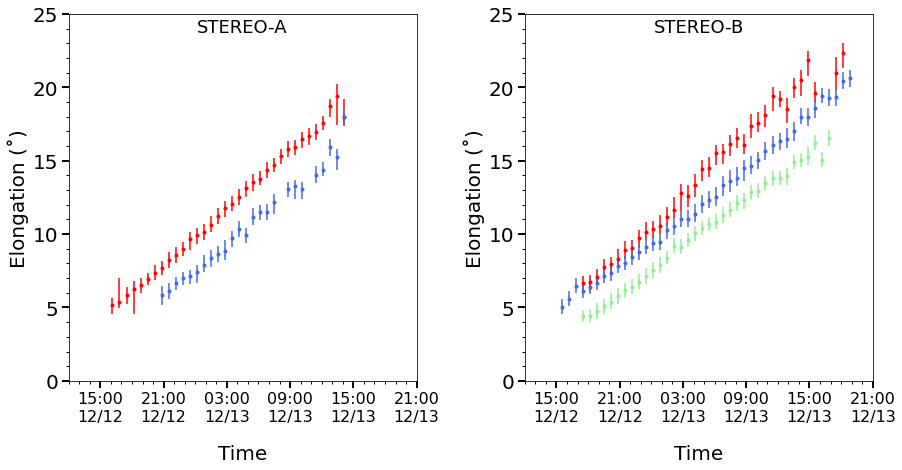

In [5]:
plt.rcParams.update({'font.size': 22, 'axes.labelsize':20, 'legend.fontsize':20,'xtick.labelsize': 16.0,'ytick.labelsize': 20.0,})

HItimeA = Time(HItimeA).datetime

# Plot figure
fig, ax = plt.subplots(1, 2, figsize = [13,7],sharex=True, sharey=False, constrained_layout=True)

for nn, axs in enumerate(ax):
#     locator = mdates.AutoDateLocator(minticks=12, maxticks=12)
#     formatter = mdates.ConciseDateFormatter(locator)
#     axs.xaxis.set_major_locator(locator)
#     axs.xaxis.set_major_formatter(formatter)
    axs.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M\n%m/%d'))
    axs.xaxis.set_major_locator(mdates.HourLocator(interval=6))
    axs.xaxis.set_minor_locator(mdates.HourLocator(interval=1))
    axs.yaxis.set_major_locator(MultipleLocator(5))
    axs.yaxis.set_minor_locator(MultipleLocator(1))
    
    axs.tick_params(axis= 'y', which='major', direction="out", width=2, length=7)
    axs.tick_params(axis= 'x', which='major', direction="out", width=2, length=7)
    axs.tick_params(axis= 'y', which='minor', direction="out", width=1, length=3)
    axs.tick_params(axis= 'x', which='minor', direction="out", width=1, length=3)

    
# ax[0].set_title('STEREO-A')
ax[0].set_xlabel('Time', labelpad=20)
ax[0].set_ylabel('Elongation (˚)')
ax[0].set_ylim(top=25, bottom=0)                                 
ax[0].set_xlim(Time('2008-12-12T12:00:00',format='isot').datetime,
               Time('2008-12-13T21:00:00',format='isot').datetime)                               # Change to time
ax[0].errorbar(HItimeA,front1a['el'],yerr=(front1a['el_lo_error'], front1a['el_hi_error']),
            fmt='.',color='red', label='HI-1 front 1')
ax[0].errorbar(HItimeA,front2a['el'],yerr=(front2a['el_lo_error'], front2a['el_hi_error']),
            fmt='.',color='royalblue', label='HI-1 front 2')


# ax[1].set_title('STEREO-B')
ax[1].set_xlabel('Time', labelpad=20)
ax[1].set_ylabel('Elongation (˚)')
ax[1].set_ylim(top=25, bottom=0)                                 
ax[1].set_xlim(Time('2008-12-12T12:00:00',format='isot').datetime,
               Time('2008-12-13T21:00:00',format='isot').datetime)
ax[1].errorbar(HItimeB,front1b['el'],yerr=(front1b['el_lo_error'], front1b['el_hi_error']),
             fmt='.',color='red', label='HI-1 front 1 (OUTER)')
ax[1].errorbar(HItimeB,front2b['el'],yerr=(front2b['el_lo_error'], front2b['el_hi_error']),
             fmt='.',color='royalblue', label='HI-1 front 2 (INNER)')
ax[1].errorbar(HItimeB,front3b['el'],yerr=(front3b['el_lo_error'], front3b['el_hi_error']),
             fmt='.',color='lightgreen', label='HI-1 front 3')

#axB.legend(loc='best', bbox_to_anchor=[1.6,0.5])
# ax[1].legend(loc=[1.1,0.35], frameon=False)


ax[0].annotate("STEREO-A", xy=(0.5, 0.95), ha='center' ,xycoords="axes fraction", fontsize=18)
ax[1].annotate("STEREO-B", xy=(0.5, 0.95), ha='center' ,xycoords="axes fraction", fontsize=18)
fig.tight_layout()
fig.show()

filename = "HUXt_CR{:03d}_{}_HI-1_fronts.png".format(cr_num,'12Dec08')
filepath = os.path.join(model._figure_dir_, filename)            
fig.savefig(filepath,dpi=300, bbox_inches='tight')

filename = "HUXt_CR{:03d}_{}_HI-1_fronts.pdf".format(cr_num,'12Dec08')
filepath = os.path.join(model._figure_dir_, filename)            
fig.savefig(filepath,dpi=300, bbox_inches='tight')

__Calculating elongation angle at each model timestep__
***
    huxt_t_e_profile_fast(cme):

        Compute the time elongation profile of the flank of a ConeCME in HUXt, from both the STEREO-A or STEREO-B
        perspective. A faster, but less reliable, version of computing the CME flank with huxt_t_e_profile. Rather than
        using stereo_spice for the full calculation, which is a bit slow, this function does it's own calculation of the
        flank elongation, and then uses stereo_spice to compute the flank position angle. This might fail for some
        geometries where the elongation is technically larger along PA angles not visible to either STA or STB. However,
        this agrees with huxt_t_e_profile for the deterministic runs, so I think is safe for the events in this study.
        Parameters
        ----------
        cme: A ConeCME object from a completed HUXt run (i.e the ConeCME.coords dictionary has been populated).
        Returns
        -------
        sta_profile: Pandas dataframe giving the coordinates of the ConeCME flank from STA's perspective, including the
                    time, elongation, position angle, and HEEQ radius and longitude.
        stb_profile: Pandas dataframe giving the coordinates of the ConeCME flank from STB's perspective, including the
                    time, elongation, position angle, and HEEQ radius and longitude.



In [6]:
# Calculate elongation angle at each model timestep.
def huxt_t_e_profile_fast(cme):
    """
    Bases of Luke's code. Added the identifcation of the nose and the secondary flank.
    
    "Compute the time elongation profile of the flank of a ConeCME in HUXt, from both the STEREO-A or STEREO-B
    perspective. A faster, but less reliable, version of computing the CME flank with huxt_t_e_profile. Rather than
    using stereo_spice for the full calculation, which is a bit slow, this function does it's own calculation of the
    flank elongation, and then uses stereo_spice to compute the flank position angle. This might fail for some
    geometries where the elongation is technically larger along PA angles not visible to either STA or STB. However,
    this agrees with huxt_t_e_profile for the deterministic runs, so I think is safe for the events in this study.
    Parameters
    ----------
    cme: A ConeCME object from a completed HUXt run (i.e the ConeCME.coords dictionary has been populated).
    Returns
    -------
    sta_profile: Pandas dataframe giving the coordinates of the ConeCME flank from STA's perspective, including the
                time, elongation, position angle, and HEEQ radius and longitude.
    stb_profile: Pandas dataframe giving the coordinates of the ConeCME flank from STB's perspective, including the
                time, elongation, position angle, and HEEQ radius and longitude."" 
    """
    # Gather information of body positions at each timestep
    earth = model.get_observer('earth')
    sta = model.get_observer('sta')
    stb = model.get_observer('stb')

    # Create dataframe for storing the elogation profiles 
    sta_profile = pd.DataFrame(index=np.arange(earth.time.size), columns=['time', 'lon', 'r', 'el', 'lon_n', 'r_n','el_n' ,'lon_sec_flank', 'r_sec_flank','el_sec_flank'])
    stb_profile = pd.DataFrame(index=np.arange(earth.time.size), columns=['time', 'lon', 'r', 'el', 'lon_n', 'r_n','el_n' ,'lon_sec_flank', 'r_sec_flank','el_sec_flank'])
    # format time 
    sta_profile['time'] = sta.time.jd
    stb_profile['time'] = stb.time.jd

    # Loop through all the boundary cooridinate points to work out the elongation angle from both STEREO-A and STEREO-B point of view
    for i, coord in cme.coords.items():

            if len(coord['r'])==0:
                continue

            r_sta = sta.r[i]
            x_sta = sta.r[i] * np.cos(sta.lat[i]) * np.cos(sta.lon[i])
            y_sta = sta.r[i] * np.cos(sta.lat[i]) * np.sin(sta.lon[i])
            z_sta = sta.r[i] * np.sin(sta.lat[i])

            r_stb = stb.r[i]
            x_stb = stb.r[i] * np.cos(stb.lat[i]) * np.cos(stb.lon[i])
            y_stb = stb.r[i] * np.cos(stb.lat[i]) * np.sin(stb.lon[i])
            z_stb = stb.r[i] * np.sin(stb.lat[i])

            lon_cme = coord['lon']
            lat_cme = 0 * u.deg
            r_cme = coord['r']

            x_cme = r_cme * np.cos(lat_cme) * np.cos(lon_cme)
            y_cme = r_cme * np.cos(lat_cme) * np.sin(lon_cme)
            z_cme = r_cme * np.sin(lat_cme)
            #############
            # Compute the observer CME distance, S, and elongation

            x_cme_s = x_cme - x_sta
            y_cme_s = y_cme - y_sta
            z_cme_s = z_cme - z_sta
            s = np.sqrt(x_cme_s**2 + y_cme_s**2 + z_cme_s**2)

            numer = (r_sta**2 + s**2 -r_cme**2).value
            denom = (2.0 * r_sta * s).value
            e_sta_list  = np.arccos(numer / denom )

            x_cme_s = x_cme - x_stb
            y_cme_s = y_cme - y_stb
            z_cme_s = z_cme - z_stb
            s = np.sqrt(x_cme_s**2 + y_cme_s**2 + z_cme_s**2)

            numer = (r_stb**2 + s**2 -r_cme**2).value
            denom = (2.0 * r_stb * s).value
            e_stb_list  = np.arccos(numer / denom )

            # Find the flank coordinate
            id_sta_flank = np.argmax(e_sta_list)
            id_stb_flank = np.argmax(e_stb_list)

            e_sta = e_sta_list[id_sta_flank]
            e_stb = e_stb_list[id_stb_flank]

            sta_profile.loc[i, 'lon'] = lon_cme[id_sta_flank].value
            sta_profile.loc[i, 'r'] = r_cme[id_sta_flank].value
            sta_profile.loc[i, 'el'] = np.rad2deg(e_sta)

            stb_profile.loc[i, 'lon'] = lon_cme[id_stb_flank].value
            stb_profile.loc[i, 'r'] = r_cme[id_stb_flank].value
            stb_profile.loc[i, 'el'] = np.rad2deg(e_stb)

            # Find the nose coordinate (inc. identifying the front of the CME)
            lon_error = lon_cme.value - cme.longitude.value

            # Ensuring the correct boundary point is identifed for the nose by 1)sorting the error list in ascending order then 2)by using
            # the radius, ensuring the boundary point is on the leading edge of the CME rather than the back end of the event.
            # Here we use a radius difference greater than 10% to identify the boundary point is not on the front edge.
            idx = np.argsort(abs(lon_error)) 
            if r_cme[idx[0]] < r_cme[idx[1]]*0.9:
                id_nose = idx[1]
            # in the case in which three boundary points are identified to have nose like longtudinal errors, take the point with greastest radius 
            elif r_cme[idx[1]] < r_cme[idx[2]]*0.9 and r_cme[idx[0]] < r_cme[idx[2]]*0.9:      
                id_nose = idx[2]
            else:
                id_nose = idx[0]
            
            e_sta_nose = e_sta_list[id_nose]
            e_stb_nose = e_stb_list[id_nose]

            sta_profile.loc[i, 'lon_n'] = lon_cme[id_nose].value
            sta_profile.loc[i, 'r_n'] = r_cme[id_nose].value
            sta_profile.loc[i, 'el_n'] = np.rad2deg(e_sta_nose)

            stb_profile.loc[i, 'lon_n'] = lon_cme[id_nose].value
            stb_profile.loc[i, 'r_n'] = r_cme[id_nose].value
            stb_profile.loc[i, 'el_n'] = np.rad2deg(e_stb_nose)

            # Find the secondary flank coordinate 
            e_sta = e_sta_list[id_stb_flank]
            e_stb = e_stb_list[id_sta_flank]

            sta_profile.loc[i, 'lon_sec_flank'] = lon_cme[id_stb_flank].value
            sta_profile.loc[i, 'r_sec_flank'] = r_cme[id_stb_flank].value
            sta_profile.loc[i, 'el_sec_flank'] = np.rad2deg(e_sta)

            stb_profile.loc[i, 'lon_sec_flank'] = lon_cme[id_sta_flank].value
            stb_profile.loc[i, 'r_sec_flank'] = r_cme[id_sta_flank].value
            stb_profile.loc[i, 'el_sec_flank'] = np.rad2deg(e_stb)

    keys = ['lon', 'r', 'el', 'lon_n', 'r_n','el_n' ,'lon_sec_flank', 'r_sec_flank','el_sec_flank']
    sta_profile[keys] = sta_profile[keys].astype(np.float64)

    keys = ['lon', 'r', 'el', 'lon_n', 'r_n','el_n' ,'lon_sec_flank', 'r_sec_flank','el_sec_flank']
    stb_profile[keys] = stb_profile[keys].astype(np.float64)
            
    return sta_profile, stb_profile

In [41]:
sta_profile, stb_profile = huxt_t_e_profile_fast(cme)

In [ ]:
# TEST CELL
# Testing the nose idenitification point when defining the nose point.

sta_profile, stb_profile = huxt_t_e_profile_fast(cme)
earth = model.get_observer('earth')
sta = model.get_observer('sta')
stb = model.get_observer('stb')

sta.time.iso [0:5]
print(cme.longitude)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = [22,6])
ax1.plot(sta_profile["r_n"])
ax1.set_title("Nose Radius")
ax2.plot(sta_profile["el_n"])
ax2.set_title("Nose Elongation")
ax3.plot(sta_profile["lon_n"])
ax3.set_title("Nose Longitude")


for i in range(1,len(sta_profile)):
    if sta_profile.r_n[i] < sta_profile.r_n[i-1]*0.95:
        print(i-1, sta_profile.r_n[i-1],sta_profile.lon_n[i-1],sta_profile.el_n[i-1])
        print(i, sta_profile.r_n[i],sta_profile.lon_n[i],sta_profile.el_n[i])
        print(i+1, sta_profile.r_n[i+1],sta_profile.lon_n[i+1],sta_profile.el_n[i+1])
        print('\n')

__Plot elongation-time profiles__
***
    elongation_plot(FOV,save=False, tag=''):
    
        Plot elongation-time profiles from STEREO POV, inc observations.
        Paramaters:
        FOV: either 'HI1' or 'HI2'
        save: if Ture, figure is saved to files
        tag: tag for file names

        Return:
        A 2x1 plot of the elongation-time profile for all the features from the viewpoint of 1) STEREO-A and 2) STEREO-B

    

In [9]:
def elongation_plot(cme,FOV,orientation='landscape',thirdfront=False, save=False, tag='', saveformat='pdf'):
    """
    Plot elongation-time profiles from STEREO POV, inc HI observations.
    Paramaters
    FOV: either 'HI1' or 'HI2'
    save: if Ture, figure is saved to files
    tag: tag for file names
    
    Return:
    A 2x1 plot of the elongation-time profile for all the features from the viewpoint of 1) STEREO-A and 2) STEREO-B
    """
   
    # Create profile
    sta_profile, stb_profile = huxt_t_e_profile_fast(cme)
    
    # Find plotting limits
    # HI-1: maximum elongation of 25˚
    if FOV == 'HI1':
        ymax = 25.0
        for i in range(len(sta_profile)):
            if sta_profile.el_n[i] < 30:
                FOVlimit_a = i
            if stb_profile.el_n[i] < 30:
                FOVlimit_b = i

    # HI-2: maximum elongation of ?˚
    elif FOV == 'HI2':
        ymax = np.max(sta_profile.el)
        FOVlimit_a = len(sta_profile)
        FOVlimit_b = len(stb_profile)
        
    else:
        print ("Field of view is not valid. Please use HI1 or HI2.")
    # this may need a try command.    

    # Format time  -  Here I am using the output from the model.getobserver() command. Would be simplier if I used sta_profile.time
                                                                        #     time_a = sta.time.to_value('datetime')[0:FOVlimit_a]
                                                                        #     time_b = stb.time.to_value('datetime')[0:FOVlimit_b]
    time_a = Time(sta_profile.time, format = 'jd').datetime[0:FOVlimit_a]
    time_b = Time(stb_profile.time, format = 'jd').datetime[0:FOVlimit_b]


    plt.rcParams.update({'font.size': 22, 'axes.labelsize':20, 'legend.fontsize':20, 'xtick.labelsize': 16.0, 'ytick.labelsize': 16.0, "font.family":"Times New Roman"})

    # Plot figure
    if orientation == "landscape":
        fig, ax = plt.subplots(1, 2, figsize = [12,7.5], )
    elif orientation == "portrait":
        fig, ax = plt.subplots(2, 1, figsize = [7,15])
    else:
        print('Figure orientation needs to be "landscape" or "portrait".')
        
    for nn, axs in enumerate(ax):
        locator = mdates.AutoDateLocator(minticks=12, maxticks=12)
        formatter = mdates.ConciseDateFormatter(locator)
        axs.xaxis.set_major_locator(locator)
        axs.xaxis.set_major_formatter(formatter)
    
    #ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%y %H:%M'))
    ax[0].set_title('STEREO-A')
    ax[0].set_xlabel('Time', labelpad=30)
    ax[0].set_ylabel('Elongation (˚)')
    ax[0].set_ylim(top=ymax)                                 
#     ax[0].set_xlim(Time('2008-12-12T12:00:00',format='isot').datetime,
#                Time('2008-12-13T21:00:00',format='isot').datetime)
    ax[0].errorbar(HItimeA,front1a['el'],yerr=(front1a['el_lo_error'], front1a['el_hi_error']),
                fmt='.',color='pink', label='HI-1 front 1')
    ax[0].errorbar(HItimeA,front2a['el'],yerr=(front2a['el_lo_error'], front2a['el_hi_error']),
                fmt='.',color='skyblue', label='HI-1 front 2')
    #axA.errorbar(HItimeA,front3a['el'],yerr=(front3a['el_lo_error'], front3a['el_hi_error']),
    #             fmt='.',color='lightgreen', label='HI-1 front 3')
    ax[0].plot(time_a, sta_profile.el[0:FOVlimit_a],'k', label='Initial Flank')
    ax[0].plot(time_a, sta_profile.el_n[0:FOVlimit_a], 'k--', label='Nose')
    # axA.plot(time_a, sta_profile.el_sec_flank[0:FOVlimit_a], 'darkgrey', label='Secondary Flank')
#     ax[0].plot(HItimeA,interp_elA[0:FOVlimit_a],'k.')
#     ax[0].plot(HItimeA,interp_el_nA[0:FOVlimit_a],'k.')
    #axA.plot(HItimeA,interp_el_sec_flankaA,'.',color='darkgrey')
    
    #ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%y %H:%M'))
    ax[1].set_title('STEREO-B')
    ax[1].set_xlabel('Time', labelpad=30)
    ax[1].set_ylabel('Elongation (˚)')
    ax[1].set_ylim(top=ymax)                                 
#     ax[1].set_xlim(Time('2008-12-12T12:00:00',format='isot').datetime,
#                Time('2008-12-13T21:00:00',format='isot').datetime)
    ax[1].errorbar(HItimeB,front1b['el'],yerr=(front1b['el_lo_error'], front1b['el_hi_error']),
                 fmt='.',color='pink', label='HI-1 front 1 (OUTER)')
    ax[1].errorbar(HItimeB,front2b['el'],yerr=(front2b['el_lo_error'], front2b['el_hi_error']),
                 fmt='.',color='skyblue', label='HI-1 front 2 (INNER)')
    ax[1].errorbar(HItimeB,front3b['el'],yerr=(front3b['el_lo_error'], front3b['el_hi_error']),
                 fmt='.',color='lightgreen', label='HI-1 front 3')
    ax[1].plot(time_b, stb_profile.el[0:FOVlimit_b], 'k', label='Initial Flank')
    ax[1].plot(time_b, stb_profile.el_n[0:FOVlimit_b], 'k--', label='Nose')
    if thirdfront == True:
        ax[1].plot(time_b, stb_profile.el_sec_flank[0:FOVlimit_b], 'darkgrey', label='Secondary Flank')
        
#     ax[1].plot(HItimeB,interp_elB,'k.')
#     ax[1].plot(HItimeB,interp_el_nB,'k.')
#     ax[1].plot(HItimeB,interp_el_sec_flankB,'.',color='darkgrey')
    plt.setp( ax[0].xaxis.get_majorticklabels(), rotation=60 ) 
    plt.setp( ax[1].xaxis.get_majorticklabels(), rotation=60 )   
    #axB.legend(loc='best', bbox_to_anchor=[1.6,0.5])
#     ax[1].legend(loc=[1.1,0.35], frameon=False)
    fig.tight_layout()

    if save:
        cr_num = np.int32(model.cr_num.value)
        filename = "HUXt_CR{:03d}_{}_{}_elongation_profile.{}".format(cr_num, tag, FOV,saveformat)
        filepath = os.path.join(model._figure_dir_, filename)            
        fig.savefig(filepath)
        
    return


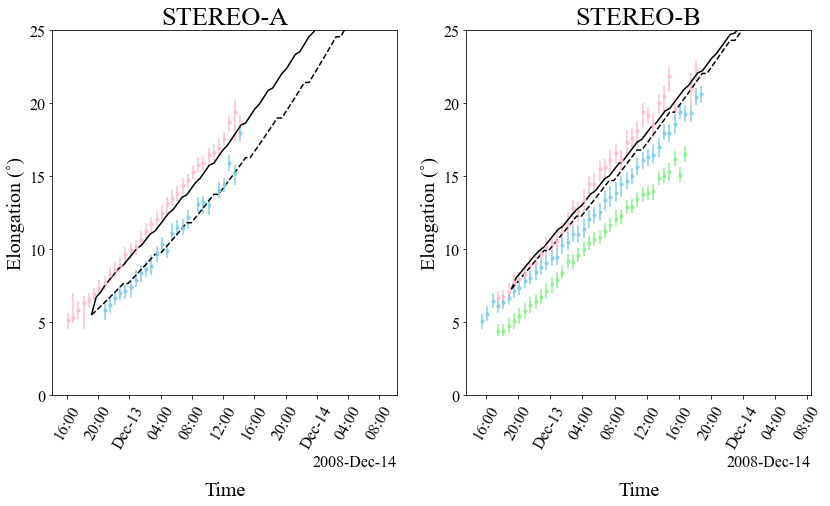

In [10]:
elongation_plot(cme,'HI1', "landscape", thirdfront=False, save=True, tag=event, saveformat='pdf')

In [12]:
def elongation_plot_temp(cme,FOV,orientation="landscape",thirdfront=False, save=False, tag=''):
    """
    Plot elongation-time profiles from STEREO POV, inc HI observations.
    Paramaters
    FOV: either 'HI1' or 'HI2'
    save: if Ture, figure is saved to files
    tag: tag for file names
    
    Return:
    A 2x1 plot of the elongation-time profile for all the features from the viewpoint of 1) STEREO-A and 2) STEREO-B
    """
   
    # Create profile
    sta_profile, stb_profile = huxt_t_e_profile_fast(cme)
    
    # Find plotting limits
    # HI-1: maximum elongation of 25˚
    if FOV == 'HI1':
        ymax = 25.0
        for i in range(len(sta_profile)):
            if sta_profile.el_n[i] < 30:
                FOVlimit_a = i
            if stb_profile.el_n[i] < 30:
                FOVlimit_b = i

    # HI-2: maximum elongation of ?˚
    elif FOV == 'HI2':
        ymax = np.max(sta_profile.el)
        FOVlimit_a = len(sta_profile)
        FOVlimit_b = len(stb_profile)
        
    else:
        print ("Field of view is not valid. Please use HI1 or HI2.")
    # this may need a try command.    

    # Format time  -  Here I am using the output from the model.getobserver() command. Would be simplier if I used sta_profile.time
                                                                        #     time_a = sta.time.to_value('datetime')[0:FOVlimit_a]
                                                                        #     time_b = stb.time.to_value('datetime')[0:FOVlimit_b]
    time_a = Time(sta_profile.time, format = 'jd').datetime[0:FOVlimit_a]
    time_b = Time(stb_profile.time, format = 'jd').datetime[0:FOVlimit_b]

    
    # Plot figure

    plt.rcParams.update({'font.size': 22, 'axes.labelsize':26, 'legend.fontsize':26, 'xtick.labelsize': 24.0, 'ytick.labelsize': 24.0, "font.family":"Times New Roman"})

    # Set Orientation of figure
    if orientation == "landscape":
        fig, ax = plt.subplots(1,2, figsize = [11,8], sharex=False, sharey=True)
    elif orientation == "portrait": 
        fig, ax = plt.subplots(2,1, figsize = [7,15], sharex=True, sharey=False,)
    else:
        print('Figure orientation needs to be "landscape" or "portrait".')
        
    # Set plot axis
    for nn,axs in enumerate(ax):
            axs.yaxis.set_major_locator(MultipleLocator(5))
            axs.yaxis.set_minor_locator(MultipleLocator(1))
            
            axs.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M\n%m/%d'))
            axs.xaxis.set_major_locator(mdates.HourLocator(interval=12))
            axs.xaxis.set_minor_locator(mdates.HourLocator(interval=3))
    
            axs.set_xlabel('Time')
            axs.set_ylim(top=ymax) 
            axs.set_xlim(Time('2008-12-12T12:00:00',format='isot').datetime,Time('2008-12-13T21:00:00', format='isot').datetime)
    
    ax[0].set_title('STEREO-A')
    ax[0].set_ylabel('Elongation (˚)')   
    ax[0].set_xlim(Time('2008-12-12T12:00:00',format='isot').datetime,Time('2008-12-13T21:00:00', format='isot').datetime)
    ax[1].set_title('STEREO-B')
    plt.setp(ax[1].get_yticklabels(), visible=False)
    
    ax[0].tick_params(axis= 'y', which='major', direction="inout", width=2, length=7)
    ax[0].tick_params(axis= 'x', which='major', direction="out", width=2, length=7)
    ax[0].tick_params(axis= 'y', which='minor', direction="inout", width=1, length=7)
    ax[0].tick_params(axis= 'x', which='minor', direction="out", width=1, length=7)
    
    ax[1].tick_params(axis= 'y', which='major', direction="in", width=2, length=7)
    ax[1].tick_params(axis= 'x', which='major', direction="out", width=2, length=7)
    ax[1].tick_params(axis= 'y', which='minor', direction="in", width=1, length=7)
    ax[1].tick_params(axis= 'x', which='minor', direction="out", width=1, length=7)
    
    # Plot figures
    ax[0].errorbar(HItimeA,front1a['el'],yerr=(front1a['el_lo_error'], front1a['el_hi_error']), fmt='.',color='red', alpha=0.7)
    ax[0].errorbar(HItimeA,front2a['el'],yerr=(front2a['el_lo_error'], front2a['el_hi_error']), fmt='.',color='blue', alpha=0.7)
    ax[0].plot(time_a, sta_profile.el[0:FOVlimit_a],'k', lw=2)
    ax[0].plot(time_a, sta_profile.el_n[0:FOVlimit_a], 'k--', lw=2)

    ax[1].errorbar(HItimeB,front1b['el'],yerr=(front1b['el_lo_error'], front1b['el_hi_error']), fmt='.',color='red', alpha=0.7, label='HI-1 Outer Front')
    ax[1].errorbar(HItimeB,front2b['el'],yerr=(front2b['el_lo_error'], front2b['el_hi_error']), fmt='.',color='blue', alpha=0.7, label='HI-1 Inner Front')
    ax[1].errorbar(HItimeB,front3b['el'],yerr=(front3b['el_lo_error'], front3b['el_hi_error']), fmt='.',color='green', alpha=0.7, label='HI-1 front 3')
    ax[1].plot(time_b, stb_profile.el[0:FOVlimit_b], 'k', label='Flank', lw=2)
    ax[1].plot(time_b, stb_profile.el_n[0:FOVlimit_b], 'k--', label='Nose', lw=2)
    if thirdfront == True:
        ax[1].plot(time_b, stb_profile.el_sec_flank[0:FOVlimit_b], 'darkgrey', label='Secondary Flank')
        
    # More figure adjustmemts
    fig.legend(bbox_to_anchor=(0.5, 0.06), loc='center', ncol=3, frameon=False)
    plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.3, hspace=0.4, wspace=0.0)

    if save:
        cr_num = np.int32(model.cr_num.value)
        filename = "HUXt_CR{:03d}_{}_{}_elongation_profile.png".format(cr_num, tag, FOV)
        filepath = os.path.join(model._figure_dir_, filename)            
        fig.savefig(filepath, dpi=300, bbox_inches='tight')
        
        filename = "HUXt_CR{:03d}_{}_{}_elongation_profile.pdf".format(cr_num, tag, FOV)
        filepath = os.path.join(model._figure_dir_, filename)            
        fig.savefig(filepath, dpi=300, bbox_inches='tight')
        
    plt.show()
        
    return


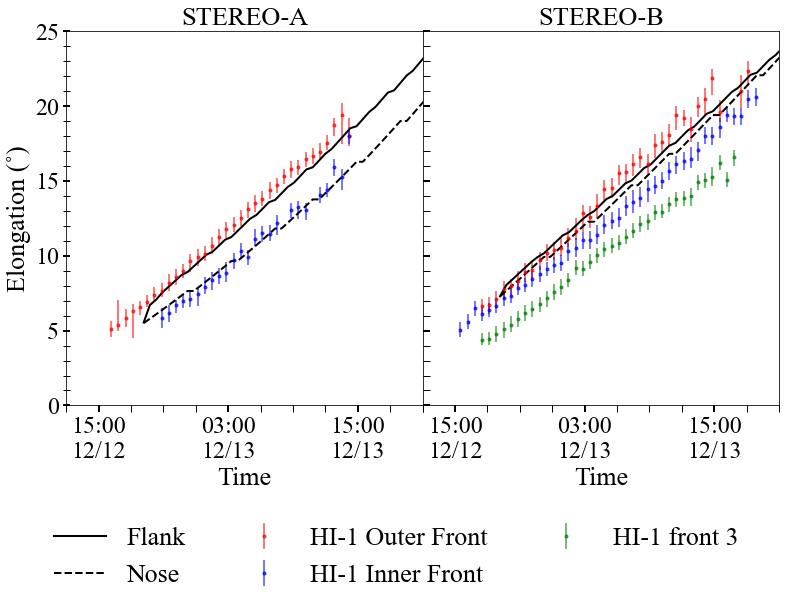

In [13]:
elongation_plot_temp(cme,'HI1', "landscape", thirdfront=False, save=True, tag=event)

In [ ]:
# # Location of Earth, STA and STB
# earthR = np.average(earth.r).to(u.AU)
# staR = np.average(sta.r).to(u.AU)
# stbR = np.average(stb.r).to(u.AU)

# earthLon = np.average(earth.lon).to(u.deg)
# staLon = np.average(sta.lon).to(u.deg)
# stbLon = np.average(stb.lon).to(u.deg)

# print ('STA: ',staR, staLon,)
# print ('Earth: ', earthR, earthLon)
# print ('STB: ',stbR, stbLon, 360*u.deg-stbLon)
# print ('0˚ in model = ',360*(1-0.801), '˚ in carringtion rotation')


__Arrival Time__
***
Based upon HIEnsembeHindcast/HUXt.py, define a funtion to compute the arrivial time and speed of the CME leading edge at Earth. For persision, these values are interpreted, therefore, as plot shows the model's timeseries at Earth along with the point of leading edge arrival to ensure the value is fesible.

    compute_earth_arrival(self):
       
        Function to compute arrival time at a set longitude and radius of the CME front.
        Tracks radial distance of front along a given longitude out past specified longitude.
        Then interpolates the r-t profile to find t_arr at arr_rad. And now this does the same for speed.
        
        Returns the transit time, arrival time, and arrival speed of the leading edge at Earth.
        If plot, returns a timeseries of the CME propogation that indicated the point of arrivial
       


In [11]:
 def compute_earth_arrival(self, print_values=False, plot=False):
        """
        Function to compute arrival time at a set longitude and radius of the CME front.
        Tracks radial distance of front along a given longitude out past specified longitude.
        Then interpolates the r-t profile to find t_arr at arr_rad. And now this does the same for speed.
        
        Returns the transit time, arrival time, and arrival speed of the leading edge at Earth.
        If plot, returns a timeseries of the CME propogation that indicated the point of arrivial
        """

        # Uses elongation-profile to assign the time at which Earth's location is be calculated
                                                                    #times = Time([coord['time'] for i, coord in self.coords.items()])
        times = Time(sta_profile.time, format = 'jd')                
        ert = H.Observer('EARTH', times)
        
        # Need to force units to be the same to make interpolations work 
        arr_lon = 0*u.rad
        arr_rad = np.mean(ert.r)
        
        # Check if hit or miss.
        # Put longitude between -180 - 180, centered on CME lon.
        lon_diff = arr_lon - self.longitude
        if lon_diff < -180*u.deg:
            lon_diff += 360*u.deg
        elif lon_diff > 180*u.deg:
            lon_diff -= 360*u.deg
            
        cme_hw = self.width/2.0
        if (lon_diff >= -cme_hw) & (lon_diff <= cme_hw):
            # HIT, so get t-r profile along lon of interest.
            t_front = []
            r_front = []
            v_front = []
            
            # earth
#             radius = 1.0 * u.au 
#             lon = 0.0 * u.deg
            
            # ACE
            radius = (1.0 * u.au) - (1400000 * u.km) 
            lon = 0.0 * u.deg
            id_r = np.argmin(np.abs(model.r - radius))
            id_lon = np.argmin(np.abs(model.lon - lon))

            for i, coord in self.coords.items():
                               
                if len(coord['r'])==0:
                    continue

                #t_front.append(coord['model_time'].to('d').value)
                t_front.append(model.time_out[i].to(u.day).value)       # different to Luke's version
                v_front.append(model.v_grid_cme[i,id_r,id_lon].value)

                # Lookup radial coord at earth lon
                r = coord['r'].value
                lon = coord['lon'].value

                # Only keep front of cme
                id_front = r > np.mean(r)
                r = r[id_front]
                lon = lon[id_front]

                r_ans = np.interp(arr_lon.value, lon, r, period=2*np.pi)
                r_front.append(r_ans)
                # Stop when max r 
                if r_ans > arr_rad.value:
                    break

            t_front = np.array(t_front)
            r_front = np.array(r_front)
            v_front = np.array(v_front)
            try:
                t_transit = np.interp(arr_rad.value, r_front, t_front)
                self.earth_transit_time = t_transit * u.d
#                 self.earth_arrival_time = times[0] + self.earth_transit_time
                self.earth_arrival_time = model.time_init + self.earth_transit_time
                v_atarrivial = np.interp(arr_rad.value, r_front, v_front)
                self.earth_arrival_speed = v_atarrivial * u.km/u.s
            except:
                self.earth_transit_time = np.NaN*u.d
                self.earth_arrival_time = Time('0000-01-01T00:00:00')
                self.earth_arrival_speed = np.NaN *u.km/u.s
        else:
            self.earth_transit_time = np.NaN*u.d
            self.earth_arrival_time = Time('0000-01-01T00:00:00')
            self.earth_arrival_speed = np.NaN *u.km/u.s
        
        if print_values:
            print("Model inital time: ", model.time_init.iso)
            print("Leading edge transit time:", "%.4f" %self.earth_transit_time.value *u.d)
            print("Leading edge arrival time at Earth:", self.earth_arrival_time.iso)
            print("Leading edge arrival speed at Earth:", "%.4f" %self.earth_arrival_speed.value *u.km/u.s)
        
        if plot:
            model.plot_timeseries(1.0*u.AU, lon=0.0*u.deg,field='both', save=True, tag='1d_cone_test_radial')
            plt.plot(self.earth_transit_time,self.earth_arrival_speed,'rx',label="Leading Edge Arrival")
            plt.legend()
        return
    


In [12]:
compute_earth_arrival(cme, print_values=True, plot=False)

Model inital time:  2008-12-12 19:09:53.490
Leading edge transit time: 3.5296 d
Leading edge arrival time at Earth: 2008-12-16 07:52:30.316
Leading edge arrival speed at Earth: 353.394 km / s


***
#### ACE Data ####

In [13]:
# Load in ACE observation
df_ace = pd.read_csv(r"ACE_SWBulk_201108_171208.csv")
df_ace = df_ace.rename(columns={'EPOCH_yyyy-mm-ddThh:mm:ss.sssZ' : 'time','SW_H_SPEED_km/s':'speed' })
df_ace['time'] = pd.to_datetime(df_ace['time'])

ace_time = Time(df_ace['time'])

# Set observtional arrival of CME at ACE, and the speed at the precise moment.
obs_arrival_time = Time("2008-12-16T07:00:00")
obs_arrival_speed = np.interp(obs_arrival_time.jd,ace_time.jd,df_ace['speed']) * u.km/u.s
print('Using observed TOA, arrival speed is:', obs_arrival_speed)

# # Interp. CME arrival speed based upon model arrival time.
ace_time = Time(df_ace['time'])
# ace_arrival = np.interp(cme.earth_arrival_time.jd,ace_time.jd,df_ace['speed']) * u.km/u.s
# print('Using model TOA, arrival speed is:', ace_arrival)


# the impact of ACE's distance from Earth.
aedis = 1500000 * u.km
aspeed = obs_arrival_speed
#ACE - Earth distance / Speed of CME at ACE
aetime = aedis/aspeed
earth_arrival_time = obs_arrival_time + TimeDelta(aetime)
print("ACE to Earth time:", "%.2f" %aetime.to_value('h'),'hours')
print("TOA of CME at Earth:", earth_arrival_time.iso)


Using observed TOA, arrival speed is: 333.43 km / s
ACE to Earth time: 1.25 hours
TOA of CME at Earth: 2008-12-16 08:14:58.695


22.502777777777776
22.148611111111112


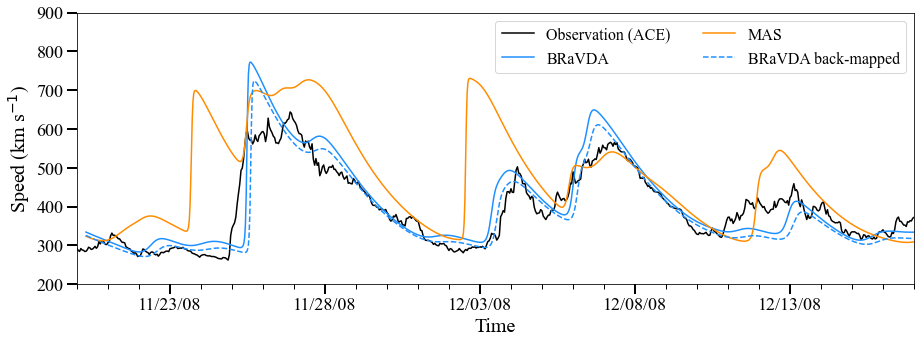

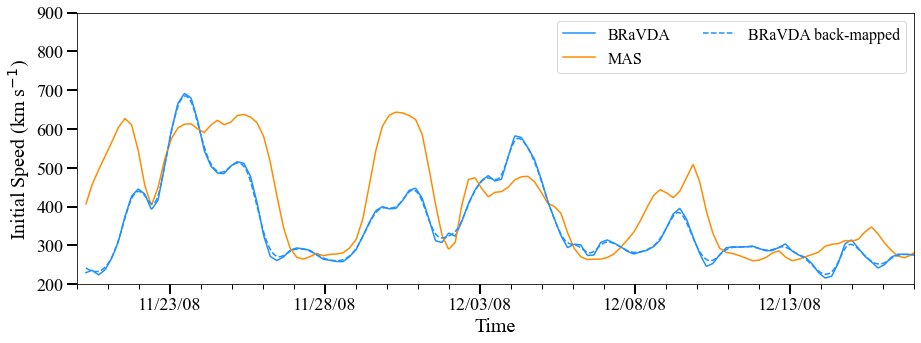

In [20]:
# Formate ACE data
dface = pd.DataFrame()
dface = df_ace[df_ace.speed > 0]               # get rid of invalid data points
dface['time'] = Time(dface['time']).datetime


launch = (Time("2008-12-12 19:00:00", format='iso') - Time("2008-11-20 06:56:00", format='iso'))
print(launch)

#-----------------------
# load BRaVDA deterministic model run
model = H.HUXt(v_boundary=v_boundary, cr_num=2077, lon_out=0.0*u.deg, simtime=31*u.day, dt_scale=4)
cme = H.ConeCME(t_launch=launch.value*u.day, latitude = 9.0*u.deg, longitude=10.0*u.deg, width=42*u.deg, v=497*(u.km/u.s), thickness=5*u.solRad)
cme_list=[cme]
model.solve(cme_list)

# Format data for plotting
time_mod = model.time_init + model.time_out
time_mod = time_mod.datetime

id_r = np.argmin(np.abs(model.r - 1*u.au))
id_lon = np.argmin(np.abs(model.lon - 0.0*u.deg))

#-----------------------
# load HelioMAS deterministic model run
modelMAS = H.HUXt(cr_num=2077, lon_out=0.0*u.deg, simtime=31*u.day, dt_scale=4)
modelMAS.solve(cme_list)

# Format data for plotting
time_mod_mas = modelMAS.time_init + modelMAS.time_out
time_mod_mas = time_mod_mas.datetime

id_r_mas = np.argmin(np.abs(modelMAS.r - 1*u.au))
id_lon_mas = np.argmin(np.abs(modelMAS.lon - 0.0*u.deg))

#-----------------------
# load BRaVDA backmapping deterministic model run
launchI = (Time("2008-12-12 10:30:00", format='iso') - Time("2008-11-20 06:56:00", format='iso'))
print(launchI)
v_inner = H.map_v_boundary_inwards(v_boundary, 30*u.solRad, 8*u.solRad)
modelI = H.HUXt(v_boundary=v_inner, cr_num=2077, lon_out=0.0*u.deg, simtime=31*u.day, dt_scale=4, r_min = 8*u.solRad)
cmeI = H.ConeCME(t_launch=launchI.value*u.day, latitude = 9.0*u.deg, longitude=10.0*u.deg, width=42*u.deg, v=600*(u.km/u.s), thickness=16.9*u.solRad)
cme_listI=[cmeI]
modelI.solve(cme_listI)

# Format data for plotting
time_modI = modelI.time_init + modelI.time_out
time_modI = time_modI.datetime

id_rI = np.argmin(np.abs(modelI.r - 1*u.au))
id_lonI = np.argmin(np.abs(modelI.lon - 0.0*u.deg))

#-----------------------
# # load tomography 8Rs determinisitc model run
# tomographySW = pd.read_csv(r"CorTom_CR2077.csv", header=None)
# tomoboundary = tomographySW[0].to_numpy()
# v_inner = tomoboundary * (u.km/u.s)
# modelK = H.HUXt(v_boundary=v_inner, cr_num=2077, lon_out=0.0*u.deg, simtime=31*u.day, dt_scale=4, r_min = 8*u.solRad)
# modelK.solve(cme_listI)    # cme_listI is unchanged for the tomography run

# # Format data for plotting
# time_modK = modelK.time_init + modelK.time_out
# time_modK = time_modK.datetime

# id_rK = np.argmin(np.abs(modelK.r - 1*u.au))
# id_lonK = np.argmin(np.abs(modelK.lon - 0.0*u.deg))

# #--------------------------------------
# modelT = H.HUXt(v_boundary=v_boundaryTHREE, cr_num=2077, lon_out=0.0*u.deg, simtime=31*u.day, dt_scale=4)
# cmeT = H.ConeCME(t_launch=launch.value*u.day, latitude = 9.0*u.deg, longitude=10.0*u.deg, width=42*u.deg, v=497*(u.km/u.s), thickness=5*u.solRad)
# cme_list=[cmeT]
# modelT.solve(cme_list)

# # Format data for plotting
# time_modT = modelT.time_init + modelT.time_out
# time_modT = time_modT.datetime

# id_rT = np.argmin(np.abs(modelT.r - 1*u.au))
# id_lonT = np.argmin(np.abs(modelT.lon - 0.0*u.deg))



plt.rcParams.update({'font.size': 22, 'axes.labelsize':20, 'legend.fontsize':16, 'xtick.labelsize': 18.0, 'ytick.labelsize': 18.0, "font.family":"Times New Roman"})

fig,ax = plt.subplots(figsize = [15,5])

ax.plot(dface.time, dface.speed, 'k', label='Observation (ACE)')
ax.plot(time_mod, model.v_grid_amb[:,id_r,id_lon],'dodgerblue', label='BRaVDA')
ax.plot(time_mod_mas, modelMAS.v_grid_amb[:,id_r_mas,id_lon_mas],'darkorange', label='MAS')
ax.plot(time_modI, modelI.v_grid_amb[:,id_rI,id_lonI],'--',color='dodgerblue', label='BRaVDA back-mapped')
# ax.plot(time_modK, modelK.v_grid_amb[:,id_rK,id_lonK],'--',color='green', label='Tomography')
# ax.plot(time_modT, modelT.v_grid_amb[:,id_rT,id_lonT],'M', label='BRaVDA V.3')


# ax.plot(time_mod, model.v_grid_cme[:,id_r,id_lon],'dodgerblue',ls=':', label='BRaVDA (CME)')
# ax.plot(time_mod_mas, modelMAS.v_grid_cme[:,id_r_mas,id_lon_mas],'darkorange',ls=':', label='MAS (CME)')
# ax.plot(time_modI, modelI.v_grid_cme[:,id_rI,id_lonI],'m',ls=':', label='BRaVDA back-mapped (CME)')
# ax.plot(time_modK, modelK.v_grid_cme[:,id_rK,id_lonK],'green',ls=':', label='Tomography (CME)')

# plt.title('1 AU AMBIENT SOLAR WIND SPEED')
ax.set_xlabel('Time')
# ax.xticks(rotation=60)
ax.set_xlim(dface.time.min(),dface.time.max())
ax.set_ylabel('Speed (km s$^{-1}$)')
ax.set_ylim(bottom=200, top=900)
ax.legend(loc='best', ncol=2)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%y'))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))

ax.tick_params(axis= 'y', which='major', direction="out", width=2, length=10)
ax.tick_params(axis= 'x', which='major', direction="out", width=2, length=10)
ax.tick_params(axis= 'y', which='minor', direction="out", width=1, length=5)
ax.tick_params(axis= 'x', which='minor', direction="out", width=1, length=5)


cr_num = np.int32(model.cr_num.value)
# filename = "HUXt_CR{:03d}_SWSchemeComparison.pdf".format(cr_num)
# filepath = os.path.join(model._figure_dir_, filename)            
# plt.savefig(filepath, dpi=150, bbox_inches='tight')
filename = "HUXt_CR{:03d}_SWSchemeComparison.png".format(cr_num)
filepath = os.path.join(model._figure_dir_, filename)            
plt.savefig(filepath, dpi=150, bbox_inches='tight')

#----- 30Rs SOLAR WIND SPEED -----

id_r = np.argmin(np.abs(model.r - 30*u.solRad))
id_lon = np.argmin(np.abs(model.lon - 0.0*u.deg))

id_r_mas = np.argmin(np.abs(modelMAS.r - 30*u.solRad))
id_lon_mas = np.argmin(np.abs(modelMAS.lon - 0.0*u.deg))

id_rI = np.argmin(np.abs(modelI.r - 30*u.solRad))
id_lonI = np.argmin(np.abs(modelI.lon - 0.0*u.deg))

id_rK = np.argmin(np.abs(modelK.r - 30*u.solRad))
id_lonK = np.argmin(np.abs(modelK.lon - 0.0*u.deg))

fig,ax = plt.subplots(figsize = [15,5])

ax.plot(time_mod, model.v_grid_amb[:,id_r,id_lon],'dodgerblue', label='BRaVDA')
ax.plot(time_mod_mas, modelMAS.v_grid_amb[:,id_r_mas,id_lon_mas],'darkorange', label='MAS')
ax.plot(time_modI, modelI.v_grid_amb[:,id_rI,id_lonI],'--',color='dodgerblue', label='BRaVDA back-mapped')
# ax.plot(time_modK, modelK.v_grid_amb[:,id_rK,id_lonK],'--',color='green', label='Tomography')

# ax.plot(time_mod, model.v_grid_cme[:,id_r,id_lon],'dodgerblue',ls=':', label='BRaVDA (CME)')
# ax.plot(time_mod_mas, modelMAS.v_grid_cme[:,id_r_mas,id_lon_mas],'darkorange',ls=':', label='MAS (CME)')
# ax.plot(time_modI, modelI.v_grid_cme[:,id_rI,id_lonI],'m',ls=':', label='BRaVDA back-mapped (CME)')

# plt.title('1 AU AMBIENT SOLAR WIND SPEED')
ax.set_xlabel('Time')
# ax.xticks(rotation=60)
ax.set_xlim(dface.time.min(),dface.time.max())
ax.set_ylabel('Initial Speed (km s$^{-1}$)')
ax.set_ylim(bottom=200, top=900)
ax.legend(loc='best', ncol=2)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%y'))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))

ax.tick_params(axis= 'y', which='major', direction="out", width=2, length=10)
ax.tick_params(axis= 'x', which='major', direction="out", width=2, length=10)
ax.tick_params(axis= 'y', which='minor', direction="out", width=1, length=5)
ax.tick_params(axis= 'x', which='minor', direction="out", width=1, length=5)

***
__Residual Errors__

     deterministic_residuals(plot=False, save=False, tag=''):

        By interpolating the model results to match the observation time of HI data, residual errors beween model and observation are calculated. When observational 
        time exceeded the start time of the model, the interpreted values return 'NaN'. Where model exceeds results beyond HI-1 observations, the interpreted values return 'NaN'.
        Values of observational time, observed elongation angle, interpreted elongation angle, residual squared error are stored in dataframes for each STEREO spacecaraft.
        Prints values of the average error of each feature, to 4 d.p.
        Two plots returned are 1) elongation-time profile of obs and interpreted profiles, and 2) a error-time plot.
        Params:
        -------
        plot: True or False
        save: True or False
        print_average: True or False. Will print the average error per combination. Set automatically as False
        tag: Tag name of saved files
        Return:
        -------
        residualA: DataFrame of the elongation angles of the features as seen from STEREO-A
        residualB: DataFrame of the elongation angles of the features as seen from STEREO-B
        deter_residualsA: Dateframe of the total residual-squared error for each feature and combination from STEREO-A
        deter_resdiualsB: Dateframe of the total residual-squared error for each feature and combination from STEREO-B
    


In [15]:
# Residual plot
def deterministic_residuals(plot=False, save=False, print_average=False, tag=''):
    """
    By interpolating the model results to match the observation time of HI data, residual errors beween model and observation are calculated. When observational 
    time exceeded the start time of the model, the interpreted values return 'NaN'. Where model exceeds results beyond HI-1 observations, the interpreted values return 'NaN'.
    Values of observational time, observed elongation angle, interpreted elongation angle, residual squared error are stored in dataframes for each STEREO spacecaraft.
    Prints values of the average error of each feature, to 4 d.p.
    Two plots returned are 1) elongation-time profile of obs and interpreted profiles, and 2) a error-time plot.
    Params:
    -------
    plot: True or False. Pre-set as False.
    save: True or False. Pre-set as False. 
    tag: Tag name of saved files
    Return:
    -------
    residualA: DataFrame of the elongation angles of the features as seen from STEREO-A
    residualB: DataFrame of the elongation angles of the features as seen from STEREO-B
    deter_residualsA: Dateframe of the total residual-squared error for each feature and combination from STEREO-A
    deter_resdiualsB: Dateframe of the total residual-squared error for each feature and combination from STEREO-B
    
    """
    
    sta_profile, stb_profile = huxt_t_e_profile_fast(cme)
    
    residualA = pd.DataFrame()
    residualB = pd.DataFrame()
    
    # np.interp(x: where to interp., xp: x-coord. points of data, fp: y-coord. point of data)
    timeA = Time(HItimeA)
    interp_elA = np.interp(timeA.jd, sta_profile['time'], sta_profile['el'], left=float("NaN"), right=float("NaN"))
    interp_el_nA = np.interp(timeA.jd, sta_profile['time'], sta_profile['el_n'], left=float("NaN"), right=float("NaN"))
    #interp_el_sec_flankA = np.interp(timeA.jd, sta_profile['time'], sta_profile['el_sec_flank'], left=float("NaN"), right=float("NaN"))

    timeB = Time(HItimeB)

    time1b = Time(front1b.time)
    time2b = Time(front2b.time)
    time3b = Time(front3b.time)
    interp_elB = np.interp(time1b.jd, stb_profile['time'], stb_profile['el'], left=float("NaN"), right=float("NaN"))
    interp_el_nB = np.interp(time2b.jd, stb_profile['time'], stb_profile['el_n'], left=float("NaN"), right=float("NaN"))
    interp_el_sec_flankB = np.interp(time3b.jd, stb_profile['time'], stb_profile['el_sec_flank'], left=float("NaN"), right=float("NaN"))
    
    # Make interpolated values NaN when obs. angle is NaN. This is to ensure residual error is calculated using the right values.
    frt1a=front1a.el.tolist()
    for i in range(len(frt1a)):
        if math.isnan(frt1a[i]):
            interp_elA[i] = float('NaN')

    frt2a=front2a.el.tolist()
    for i in range(len(frt2a)):
        if math.isnan(frt2a[i]):
            interp_el_nA[i] = float('NaN')

    # frt3a=front3a.el.tolist()
    # for i in range(len(frt3a)):
    #     if math.isnan(frt3a[i]):
    #         interp_el_sec_flankA[i] = float('NaN')

    frt1b=front1b.el.tolist()
    for i in range(len(frt1b)):
        if math.isnan(frt1b[i]):
            interp_elB[i] = float('NaN')

    frt2b=front2b.el.tolist()
    for i in range(len(frt2b)):
        if math.isnan(frt2b[i]):
            interp_el_nB[i] = float('NaN')

    frt3b=front3b.el.tolist()
    for i in range(len(frt3b)):
        if math.isnan(frt3b[i]):
            interp_el_sec_flankB[i] = float('NaN')
            
            
    # Save to dataframe
    residualA = pd.DataFrame()
    residualA['time'] = timeA
    residualA['obs flank'] = front1a.el
    residualA['interp flank'] = interp_elA
    residualA['R2 flank'] = (residualA['obs flank'] - residualA['interp flank'])**2
    residualA['obs nose'] = front2a.el
    residualA['interp nose'] = interp_el_nA
    residualA['R2 nose'] = (residualA['obs nose'] - residualA['interp nose'])**2
    residualA['2 features'] = residualA['R2 flank'] + residualA['R2 nose']
    
    residualB = pd.DataFrame()
    residualB['time'] = front1b.time
    residualB['obs flank'] = front1b.el
    residualB['interp flank'] = interp_elB
    residualB['R2 flank'] = (residualB['obs flank'] - residualB['interp flank'])**2
    residualB['obs nose'] = frt2b
    residualB['interp nose'] = interp_el_nB
    residualB['R2 nose'] = (residualB['obs nose'] - residualB['interp nose'])**2
    residualB['obs sec flank'] = frt3b
    residualB['interp sec flank'] = interp_el_sec_flankB
    residualB['R2 sec flank'] = (residualB['obs sec flank'] - residualB['interp sec flank'])**2
    residualB['2 features'] = residualB['R2 flank'] + residualB['R2 nose']
    residualB['3 features'] = residualB['R2 flank'] + residualB['R2 nose'] + residualB['R2 sec flank']
    
    # Total residual error -  saved as variable 
    tot_R2_flankA = np.nansum(residualA['R2 flank'] )
    tot_R2_noseA = np.nansum(residualA['R2 nose'] )
    #tot_R2_sec_flankA = np.nansum(R2_sec_flankA)

    tot_R2_flankB = np.nansum(residualB['R2 flank'])
    tot_R2_noseB = np.nansum(residualB['R2 nose'])
    tot_R2_sec_flankB = np.nansum(residualB['R2 sec flank'])
    
    # Average residual for the run
    avg_error_flankA = tot_R2_flankA / (residualA["interp flank"].count())
    avg_error_noseA = tot_R2_noseA / (residualA["interp nose"].count())
    
    avg_error_flankB = tot_R2_flankB / (residualB["interp flank"].count())
    avg_error_noseB = tot_R2_noseB / (residualB["interp nose"].count())
    avg_error_sec_flankB = tot_R2_sec_flankB / (residualB["interp sec flank"].count())
    
    rmse_flankA = np.sqrt(avg_error_flankA)
    rmse_noseA = np.sqrt(avg_error_noseA)
    rmse_flankB = np.sqrt(avg_error_flankB)
    rmse_noseB = np.sqrt(avg_error_noseB)
    rmse_sec_flankB = np.sqrt(avg_error_sec_flankB)
    
    if print_average:
        print('Average error flankA = ',"%.4f"%avg_error_flankA, '\n', 'Average error noseA = ',"%.4f"%avg_error_noseA, '\n',
              'Average error flankB = ',"%.4f"%avg_error_flankB, '\n', 'Average error noseB = ',"%.4f"%avg_error_noseB, '\n', 'Average error sec. flankB = ',"%.4f"%avg_error_sec_flankB)
        print('RMSE flankA = ',"%.4f"%rmse_flankA, '\n', 'RMSE noseA = ',"%.4f"%rmse_noseA, '\n',
              'RMSE flankB = ',"%.4f"%rmse_flankB, '\n', 'RMSE noseB = ',"%.4f"%rmse_noseB, '\n', 'RMSE sec. flankB = ',"%.4f"%rmse_sec_flankB)
    
                                                                              
    # dataframe of total residuals 
    deter_residualsA = pd.DataFrame()
    deter_residualsA = deter_residualsA.append({'flank':tot_R2_flankA, 'nose':tot_R2_noseA,
                                               '2 feature': tot_R2_flankA + tot_R2_noseA,
                                               'avg flank': avg_error_flankA, 'avg nose': avg_error_noseA }, ignore_index=True)
    
    deter_residualsB = pd.DataFrame()
    deter_residualsB = deter_residualsB.append({'flank':tot_R2_flankB, 'nose':tot_R2_noseB, 'sec flank': tot_R2_sec_flankB,
                                               '2 feature': tot_R2_flankB + tot_R2_noseB, 
                                                '3 feature': tot_R2_flankB + tot_R2_noseB + tot_R2_sec_flankB, 
                                               'avg flank': avg_error_flankB, 'avg nose': avg_error_noseB, 
                                               'avg sec flank': avg_error_sec_flankB}, ignore_index=True)

    if plot:
        
        # Plot a figure of the interp. values and the HI obs.
        fig, ((axA,axB)) = plt.subplots(1, 2, figsize = [15,6])
        
        axA.errorbar(HItimeA,front1a['el'],yerr=(front1a['el_lo_error'], front1a['el_hi_error']), fmt='.',color='pink', label='HI-1 front 1')
        axA.errorbar(HItimeA,front2a['el'],yerr=(front2a['el_lo_error'], front2a['el_hi_error']), fmt='.',color='skyblue', label='HI-1 front 2')
        axA.plot(HItimeA, residualA['interp flank'], 'rx', label='flank')
        axA.plot(HItimeA, residualA['interp nose'], 'bx', label='nose')
        axA.set_title('STEREO-A')
        axA.set_xlabel('Time', labelpad=30)
        
        axB.errorbar(time1b.datetime,front1b['el'],yerr=(front1b['el_lo_error'], front1b['el_hi_error']), fmt='.',color='pink', label='HI-1 front 1 (OUTER)')
        axB.errorbar(time2b.datetime,front2b['el'],yerr=(front2b['el_lo_error'], front2b['el_hi_error']), fmt='.',color='skyblue', label='HI-1 front 2 (INNER)')
        axB.errorbar(time3b.datetime,front3b['el'],yerr=(front3b['el_lo_error'], front3b['el_hi_error']), fmt='.',color='lightgreen', label='HI-1 front 3')
        axB.plot(time1b.datetime, residualB['interp flank'], 'rx', label='flank')
        axB.plot(time2b.datetime, residualB['interp nose'], 'bx', label='nose')
        axB.plot(time3b.datetime, residualB['interp sec flank'], 'gx', label='Sec. flank')
        axB.set_title('STEREO-B')
        axB.set_xlabel('Time', labelpad=30)
        
        plt.setp(axA.xaxis.get_majorticklabels(), rotation=60 ) 
        plt.setp(axB.xaxis.get_majorticklabels(), rotation=60 )   
        axB.legend(loc=[1.1,0.35], frameon=False)
        
        plt.show()
        #=======================================================================
        
        #Plot figure of the residual squared error with time
        
#        fig, ((axA,axB),(axC,axD)) = plt.subplots(2, 2, figsize = [18,12])
        fig, ((axA,axB)) = plt.subplots(1, 2, figsize = [15,6])
        
                                                                                            #         for nn, axs in enumerate(ax):
                                                                                            #             locator = mdates.AutoDateLocator(minticks=12, maxticks=12)
                                                                                            #             formatter = mdates.ConciseDateFormatter(locator)
                                                                                            #             axs.xaxis.set_major_locator(locator)
                                                                                            #             axs.xaxis.set_major_formatter(formatter)

                                                                                            #         axA.set_title('STEREO-A')
                                                                                            #         axA.set_xlabel('Changed parameter')
                                                                                            #         axA.set_ylabel('$Residual^ 2$')
                                                                                            #         axA.plot(tot_R2_flankA,'r.', label = "Flank")
                                                                                            #         axA.plot(tot_R2_noseA,'b.', label= "Nose")
                                                                                            #         axA.plot(tot_R2_flankA + tot_R2_noseA,'k.', label = "Flank & Nose")
                                                                                            #         # axA.plot(tot_R2_sec_flankA,'g.', label= "Secondary Flank")
                                                                                            #         # axA.plot(tot_R2_flankA + tot_R2_noseA + tot_R2_sec_flankA,'y.', label = "Flank & Nose & Sec. Flank")

                                                                                            #         axB.set_title('STEREO-B')
                                                                                            #         axB.set_xlabel('Changed parameter')
                                                                                            #         axB.set_ylabel('$Residual^ 2$')
                                                                                            #         axB.plot(tot_R2_flankB,'r.', label = "Flank")
                                                                                            #         axB.plot(tot_R2_noseB,'b.', label= "Nose")
                                                                                            #         axB.plot(tot_R2_flankB + tot_R2_noseB,'k.', label = "Flank & Nose")
                                                                                            #         axB.plot(tot_R2_sec_flankB,'g.', label= "Secondary Flank")
                                                                                            #         axB.plot(tot_R2_flankB + tot_R2_noseB + tot_R2_sec_flankB,'c.', label = "Flank & Nose & Sec. Flank")
                                                                                            #         axB.legend(loc=[1.1,0.35], frameon=False)
        
        axA.set_title('STEREO-A')
        axA.set_xlabel('Time', labelpad=30)
        axA.set_ylabel('$Residual^ 2$')
        axA.plot(timeA.datetime, residualA['R2 flank'],'r-', label = "Flank")
        axA.plot(timeA.datetime, residualA['R2 nose'],'b-', label= "Nose")
#         axA.plot(timeA.datetime, residualA['2 features'],'k-', label = "Flank & Nose")
        # axA.plot(tot_R2_sec_flankA,'g.', label= "Secondary Flank")
        # axA.plot(tot_R2_flankA + tot_R2_noseA + tot_R2_sec_flankA,'y.', label = "Flank & Nose & Sec. Flank")
        axA.set_yticks(np.arange(0, 8, 1))

        axB.set_title('STEREO-B')
        axB.set_xlabel('Time', labelpad=30)
        axB.set_ylabel('$Residual^ 2$')
        axB.plot(time1b.datetime, residualB['R2 flank'],'r-', label = "Flank")
        axB.plot(time2b.datetime, residualB['R2 nose'],'b-', label= "Nose")
#         axB.plot(time1b.datetime, residualB['2 features'],'k-', label = "Flank & Nose")
        axB.plot(time3b.datetime, residualB['R2 sec flank'],'-',color='limegreen', label= "Secondary Flank")
#         axB.plot(time1b.datetime, residualB['3 features'],'-',color='orange', label = "Flank & Nose & Sec. Flank")
        axB.set_yticks(np.arange(0, 8, 1))
        axB.legend(loc=[1.1,0.35], frameon=False)
        
        plt.setp(axA.xaxis.get_majorticklabels(), rotation=60 ) 
        plt.setp(axB.xaxis.get_majorticklabels(), rotation=60 )   

#         axC.set_title ('Estimate Arrivial Time')
#         axC.set_xlabel('Changed parameter')
#         axC.set_ylabel('Time')
#         #axC.set_xlim([cme.earth_arrival_time.datetime,cme.earth_arrival_time.datetime+timedelta(days=5)])
#         axC.plot(cme.earth_arrival_time.datetime,'kx', label='Model')
#         axC.axhline(obs_arrival_time.datetime,ls='--',color='grey',lw=2, label='Observation')

#         axD.set_title ('Estimate Arrivial Speed')
#         axD.set_xlabel('Changed parameter')
#         axD.set_ylabel('Speed $(kms^{-1})$')
#         axD.plot(cme.earth_arrival_speed,'kx', label='Model')
#         axD.axhline(obs_arrival_speed.value,ls='--',color='grey',lw=2, label='Observation')
#         axD.legend(loc=[1.1,0.35], frameon=False)

        fig.tight_layout()

        if save:
            cr_num = np.int32(model.cr_num.value)
            filename = "HUXt_CR{:03d}_{}_residual_plot.png".format(cr_num, tag)
            filepath = os.path.join(model._figure_dir_, filename)
            fig.savefig(filepath)

    return residualA, residualB, deter_residualsA, deter_residualsB

In [ ]:
# OLD VERSION OF ERROR CALCULATIONS
residualA, residualB, deter_residualsA, deter_residualsB = deterministic_residuals(plot=True, save=False, print_average=True, tag=event)

    def calculate_error()
    
    def determinisitic_error()

In [14]:
def calculate_error(sta_profile, stb_profile):
    """
    This will calcuate the total residual error and RMSE of the model run in comparions to the 
    HI observations. To do this, the model results are interpolated to have the same time-stamp
    as the observations. 
    Params:
    --------
    sta_profile: The elongation profile of the features as seen from STEREO-A
    stb_profile: The elongation profile of the features as seen from STEREO-B
    
    Return:
    --------
    
    """
    # Check for HI data. Ensure it has been read in.
    
    # create dataframes to store error information for each timestep
    ts_errorA = pd.DataFrame()
    ts_errorB = pd.DataFrame()
    
    # create dataframes to store error information for the whole model run
    errorA = pd.DataFrame()
    errorB = pd.DataFrame()
    
    # interpret model values to have the same timestep as the HI observations
    # np.interp(x: where to interp., xp: x-coord. points of data, fp: y-coord. point of data)
    timeA = Time(HItimeA)
    interp_elA = np.interp(timeA.jd, sta_profile['time'], sta_profile['el'], left=float("NaN"), right=float("NaN"))
    interp_el_nA = np.interp(timeA.jd, sta_profile['time'], sta_profile['el_n'], left=float("NaN"), right=float("NaN"))
    #interp_el_sec_flankA = np.interp(timeA.jd, sta_profile['time'], sta_profile['el_sec_flank'], left=float("NaN"), right=float("NaN"))

    #timeB = Time(HItimeB)
    
    timeB = Time(front1b.time)
#     time2b = Time(front2b.time)
#     time3b = Time(front3b.time)
    interp_elB = np.interp(timeB.jd, stb_profile['time'], stb_profile['el'], left=float("NaN"), right=float("NaN"))
    interp_el_nB = np.interp(timeB.jd, stb_profile['time'], stb_profile['el_n'], left=float("NaN"), right=float("NaN"))
    interp_el_sec_flankB = np.interp(timeB.jd, stb_profile['time'], stb_profile['el_sec_flank'], left=float("NaN"), right=float("NaN"))
    
    # Make interpolated values NaN when obs. angle is NaN. This is to ensure residual error is calculated using the right values.
    frt1a=front1a.el.tolist()
    for i in range(len(frt1a)):
        if math.isnan(frt1a[i]):
            interp_elA[i] = float('NaN')

    frt2a=front2a.el.tolist()
    for i in range(len(frt2a)):
        if math.isnan(frt2a[i]):
            interp_el_nA[i] = float('NaN')

    # frt3a=front3a.el.tolist()
    # for i in range(len(frt3a)):
    #     if math.isnan(frt3a[i]):
    #         interp_el_sec_flankA[i] = float('NaN')

    frt1b=front1b.el.tolist()
    for i in range(len(frt1b)):
        if math.isnan(frt1b[i]):
            interp_elB[i] = float('NaN')

    frt2b=front2b.el.tolist()
    for i in range(len(frt2b)):
        if math.isnan(frt2b[i]):
            interp_el_nB[i] = float('NaN')

    frt3b=front3b.el.tolist()
    for i in range(len(frt3b)):
        if math.isnan(frt3b[i]):
            interp_el_sec_flankB[i] = float('NaN')
            
            
    # Save to dataframe
    ts_errorA['time'] = timeA
    ts_errorA['obs flank'] = front1a.el
    ts_errorA['interp flank'] = interp_elA
    ts_errorA['R2 flank'] = (ts_errorA['obs flank'] - ts_errorA['interp flank'])**2
    ts_errorA['obs nose'] = front2a.el
    ts_errorA['interp nose'] = interp_el_nA
    ts_errorA['R2 nose'] = (ts_errorA['obs nose'] - ts_errorA['interp nose'])**2
    ts_errorA['R2 two features'] = ts_errorA['R2 flank'] + ts_errorA['R2 nose']
    
    
    #residualB['time'] = front1b.time
    ts_errorB['time'] = front1b.time
    ts_errorB['obs flank'] = front1b.el
    ts_errorB['interp flank'] = interp_elB
    ts_errorB['R2 flank'] = (ts_errorB['obs flank'] - ts_errorB['interp flank'])**2
    ts_errorB['obs nose'] = frt2b
    ts_errorB['interp nose'] = interp_el_nB
    ts_errorB['R2 nose'] = (ts_errorB['obs nose'] - ts_errorB['interp nose'])**2
    ts_errorB['obs sec flank'] = frt3b
    ts_errorB['interp sec flank'] = interp_el_sec_flankB
    ts_errorB['R2 sec flank'] = (ts_errorB['obs sec flank'] - ts_errorB['interp sec flank'])**2
    ts_errorB['R2 two features'] = ts_errorB['R2 flank'] + ts_errorB['R2 nose']
#     ts_errorB['3 features'] = ts_errorB['R2 flank'] + ts_errorB['R2 nose'] + ts_errorB['R2 sec flank']
    
    # Total residual error -  saved as variable 
    tot_R2_flankA = np.nansum(ts_errorA['R2 flank'] )
    tot_R2_noseA = np.nansum(ts_errorA['R2 nose'] )
    #tot_R2_sec_flankA = np.nansum(R2_sec_flankA)
    tot_R2_two_featuresA = np.nansum(ts_errorA['R2 two features'])

    tot_R2_flankB = np.nansum(ts_errorB['R2 flank'])
    tot_R2_noseB = np.nansum(ts_errorB['R2 nose'])
    tot_R2_sec_flankB = np.nansum(ts_errorB['R2 sec flank'])
    tot_R2_two_featuresB = np.nansum(ts_errorB['R2 two features'])

    
    # Average residual for the run
    avg_error_flankA = tot_R2_flankA / (ts_errorA["interp flank"].count())
    avg_error_noseA = tot_R2_noseA / (ts_errorA["interp nose"].count())
    avg_error_two_featuresA = tot_R2_two_featuresA / (ts_errorA["R2 two features"].count())    # Double check this method. Is the length correct?
    
    avg_error_flankB = tot_R2_flankB / (ts_errorB["interp flank"].count())
    avg_error_noseB = tot_R2_noseB / (ts_errorB["interp nose"].count())
    avg_error_sec_flankB = tot_R2_sec_flankB / (ts_errorB["interp sec flank"].count())
    avg_error_two_featuresB = tot_R2_two_featuresB / (ts_errorB["R2 two features"].count())    # Double check this method. Is the length correct?
    
    rmse_flankA = np.sqrt(avg_error_flankA)
    rmse_noseA = np.sqrt(avg_error_noseA)
    rmse_two_featuresA = np.sqrt(avg_error_two_featuresA)
    
    rmse_flankB = np.sqrt(avg_error_flankB)
    rmse_noseB = np.sqrt(avg_error_noseB)
    rmse_sec_flankB = np.sqrt(avg_error_sec_flankB)
    rmse_two_featuresB = np.sqrt(avg_error_two_featuresB)
    
                                                                              
    # Store error values for whole model run in dataframe
    errorA = errorA.append({'flank':tot_R2_flankA, 
                            'nose':tot_R2_noseA,
                            'N & F': tot_R2_two_featuresA,
                            'RMSE flank': rmse_flankA, 
                            'RMSE nose': rmse_noseA,
                            'RMSE N & F': rmse_two_featuresA}, ignore_index=True)
    
    errorB = errorB.append({'flank':tot_R2_flankB, 
                            'nose':tot_R2_noseB, 
                            'sec flank': tot_R2_sec_flankB,
                            'N & F': tot_R2_two_featuresB,
                            'RMSE flank': rmse_flankB, 
                            'RMSE nose': rmse_noseB, 
                            'RMSE sec flank': rmse_sec_flankB,
                            'RMSE N & F': rmse_two_featuresB}, ignore_index=True)
    

    return ts_errorA, ts_errorB, errorA, errorB

In [15]:
def calculate_error_new(sta_profile, stb_profile):
    """
    This will calcuate the total residual error and RMSE of the model run in comparions to the 
    HI observations. To do this, the model results are interpolated to have the same time-stampnt
    as the observations. 
    Params:
    --------
    sta_profile: The elongation profile of the features as seen from STEREO-A
    stb_profile: The elongation profile of the features as seen from STEREO-B
    
    Return:
    --------
    
    """
    # Check for HI data. Ensure it has been read in.
    
    # create dataframes to store error information for each timestep
    ts_errorA = pd.DataFrame()
    ts_errorB = pd.DataFrame()
    
    # create dataframes to store error information for the whole model run
    errorA = pd.DataFrame()
    errorB = pd.DataFrame()
    
    # interpret model values to have the same timestep as the HI observations
    # np.interp(x: where to interp., xp: x-coord. points of data, fp: y-coord. point of data)
    timeA = Time(HItimeA)
    interp_elA = np.interp(timeA.jd, sta_profile['time'], sta_profile['el'], left=float("NaN"), right=float("NaN"))
    interp_el_nA = np.interp(timeA.jd, sta_profile['time'], sta_profile['el_n'], left=float("NaN"), right=float("NaN"))
    #interp_el_sec_flankA = np.interp(timeA.jd, sta_profile['time'], sta_profile['el_sec_flank'], left=float("NaN"), right=float("NaN"))

    #timeB = Time(HItimeB)
    
    timeB = Time(front1b.time)
#     time2b = Time(front2b.time)
#     time3b = Time(front3b.time)
    interp_elB = np.interp(timeB.jd, stb_profile['time'], stb_profile['el'], left=float("NaN"), right=float("NaN"))
    interp_el_nB = np.interp(timeB.jd, stb_profile['time'], stb_profile['el_n'], left=float("NaN"), right=float("NaN"))
    interp_el_sec_flankB = np.interp(timeB.jd, stb_profile['time'], stb_profile['el_sec_flank'], left=float("NaN"), right=float("NaN"))
    
    # Make interpolated values NaN when obs. angle is NaN. This is to ensure residual error is calculated using the right values.
    frt1a=front1a.el.tolist()
    for i in range(len(frt1a)):
        if math.isnan(frt1a[i]):
            interp_elA[i] = float('NaN')

    frt2a=front2a.el.tolist()
    for i in range(len(frt2a)):
        if math.isnan(frt2a[i]):
            interp_el_nA[i] = float('NaN')

    # frt3a=front3a.el.tolist()
    # for i in range(len(frt3a)):
    #     if math.isnan(frt3a[i]):
    #         interp_el_sec_flankA[i] = float('NaN')

    frt1b=front1b.el.tolist()
    for i in range(len(frt1b)):
        if math.isnan(frt1b[i]):
            interp_elB[i] = float('NaN')

    frt2b=front2b.el.tolist()
    for i in range(len(frt2b)):
        if math.isnan(frt2b[i]):
            interp_el_nB[i] = float('NaN')

    frt3b=front3b.el.tolist()
    for i in range(len(frt3b)):
        if math.isnan(frt3b[i]):
            interp_el_sec_flankB[i] = float('NaN')
            
            
    # Save to timestep dataframe
    ts_errorA['time'] = timeA
    ts_errorA['obs flank'] = front1a.el
    ts_errorA['interp flank'] = interp_elA
    ts_errorA['R2 flank'] = (ts_errorA['obs flank'] - ts_errorA['interp flank'])**2
    ts_errorA['obs nose'] = front2a.el
    ts_errorA['interp nose'] = interp_el_nA
    ts_errorA['R2 nose'] = (ts_errorA['obs nose'] - ts_errorA['interp nose'])**2
   
    #residualB['time'] = front1b.time
    ts_errorB['time'] = front1b.time
    ts_errorB['obs flank'] = front1b.el
    ts_errorB['interp flank'] = interp_elB
    ts_errorB['R2 flank'] = (ts_errorB['obs flank'] - ts_errorB['interp flank'])**2
    ts_errorB['obs nose'] = frt2b
    ts_errorB['interp nose'] = interp_el_nB
    ts_errorB['R2 nose'] = (ts_errorB['obs nose'] - ts_errorB['interp nose'])**2
    ts_errorB['obs sec flank'] = frt3b
    ts_errorB['interp sec flank'] = interp_el_sec_flankB
    ts_errorB['R2 sec flank'] = (ts_errorB['obs sec flank'] - ts_errorB['interp sec flank'])**2

# Calculate the RMSE error of the model run
    
    # Sum of residual squared  error 
    tot_R2_flankA = np.nansum(ts_errorA['R2 flank'] )
    tot_R2_noseA = np.nansum(ts_errorA['R2 nose'] )
    #tot_R2_sec_flankA = np.nansum(R2_sec_flankA)
    tot_R2_two_featuresA =  tot_R2_flankA +  tot_R2_noseA 

    tot_R2_flankB = np.nansum(ts_errorB['R2 flank'])
    tot_R2_noseB = np.nansum(ts_errorB['R2 nose'])
    tot_R2_sec_flankB = np.nansum(ts_errorB['R2 sec flank'])
    tot_R2_two_featuresB = tot_R2_flankB +  tot_R2_noseB

    # Average residual for the run
    avg_error_flankA = tot_R2_flankA / (ts_errorA["interp flank"].count())
    avg_error_noseA = tot_R2_noseA / (ts_errorA["interp nose"].count())
    datacountA = ts_errorA["interp flank"].count()+ts_errorA["interp nose"].count()
    avg_error_two_featuresA = tot_R2_two_featuresA / datacountA
    
    avg_error_flankB = tot_R2_flankB / (ts_errorB["interp flank"].count())
    avg_error_noseB = tot_R2_noseB / (ts_errorB["interp nose"].count())
    avg_error_sec_flankB = tot_R2_sec_flankB / (ts_errorB["interp sec flank"].count())
    datacountB = ts_errorB["interp flank"].count()+ts_errorB["interp nose"].count()
    avg_error_two_featuresB = tot_R2_two_featuresB / datacountB
    
    # Square root of  average for the run
    rmse_flankA = np.sqrt(avg_error_flankA)
    rmse_noseA = np.sqrt(avg_error_noseA)
    rmse_two_featuresA = np.sqrt(avg_error_two_featuresA)
    
    rmse_flankB = np.sqrt(avg_error_flankB)
    rmse_noseB = np.sqrt(avg_error_noseB)
    rmse_sec_flankB = np.sqrt(avg_error_sec_flankB)
    rmse_two_featuresB = np.sqrt(avg_error_two_featuresB)

    # Combining the RMSE for the whole run
    totalerror = tot_R2_two_featuresA + tot_R2_two_featuresB
    datacount = datacountA + datacountB
    rmse_combined = np.sqrt(totalerror/datacount)
                                                             
    # Store error values for whole model run in dataframe
    errorA = errorA.append({'flank':tot_R2_flankA, 
                            'nose':tot_R2_noseA,
                            'N & F': tot_R2_two_featuresA,
                            'RMSE flank': rmse_flankA, 
                            'RMSE nose': rmse_noseA,
                            'RMSE N & F': rmse_two_featuresA}, ignore_index=True)
    
    errorB = errorB.append({'flank':tot_R2_flankB, 
                            'nose':tot_R2_noseB, 
                            'sec flank': tot_R2_sec_flankB,
                            'N & F': tot_R2_two_featuresB,
                            'RMSE flank': rmse_flankB, 
                            'RMSE nose': rmse_noseB, 
                            'RMSE sec flank': rmse_sec_flankB,
                            'RMSE N & F': rmse_two_featuresB}, ignore_index=True)

    return ts_errorA, ts_errorB, errorA, errorB


In [16]:
def deterministic_error(cme,print_RMSE=True, plot=False, save=False):
    """
    
    """
    # Find the elongation profiles for the model run
    sta_profile, stb_profile = huxt_t_e_profile_fast(cme)
    
    # Find the error of the model run
    ts_errorA, ts_errorB, errorA, errorB = calculate_error_new(sta_profile, stb_profile)
    
#     # -----------------------
#     # Testing an unusual case. 
#     if cme.width.value == 37.4065736506236:
#         project_dirs = H._setup_dirs_()
#         out_path = project_dirs['HUXt_data']
#         out_nameA = 'TSerrorA_37.406_det.csv'
#         ts_errorA.to_csv(os.path.join(out_path, out_nameA))
#         out_nameB = '_TSerrorB_37.406_det.csv'
#         ts_errorB.to_csv(os.path.join(out_path, out_nameB))
        
#         out_nameC = 'ST-B_profile_37.406.csv'
#         stb_profile.to_csv(os.path.join(out_path, out_nameC))
#     # -----------------------
    
    if print_RMSE:
        display(errorA, errorB)
            
    if plot:
        # Plot a figure of the interp. values and the HI obs.
        fig, ((axA,axB)) = plt.subplots(1, 2, figsize = [15,6])
        
        axA.errorbar(HItimeA,front1a['el'],yerr=(front1a['el_lo_error'], front1a['el_hi_error']), fmt='.',color='pink', label='HI-1 front 1')
        axA.errorbar(HItimeA,front2a['el'],yerr=(front2a['el_lo_error'], front2a['el_hi_error']), fmt='.',color='skyblue', label='HI-1 front 2')
        axA.plot(HItimeA, ts_errorA['interp flank'], 'rx', label='flank')
        axA.plot(HItimeA, ts_errorA['interp nose'], 'bx', label='nose')
        axA.set_title('STEREO-A')
        axA.set_xlabel('Time', labelpad=30)
        
        timeB = front1b.time
        axB.errorbar(timeB,front1b['el'],yerr=(front1b['el_lo_error'], front1b['el_hi_error']), fmt='.',color='pink', label='HI-1 front 1 (OUTER)')
        axB.errorbar(timeB,front2b['el'],yerr=(front2b['el_lo_error'], front2b['el_hi_error']), fmt='.',color='skyblue', label='HI-1 front 2 (INNER)')
        axB.errorbar(timeB,front3b['el'],yerr=(front3b['el_lo_error'], front3b['el_hi_error']), fmt='.',color='lightgreen', label='HI-1 front 3')
        axB.plot(timeB, ts_errorB['interp flank'], 'rx', label='flank')
        axB.plot(timeB, ts_errorB['interp nose'], 'bx', label='nose')
        axB.plot(timeB, ts_errorB['interp sec flank'], 'gx', label='Sec. flank')
        axB.set_title('STEREO-B')
        axB.set_xlabel('Time', labelpad=30)
        
        axA.set_xlim(Time('2008-12-12T12:00:00',format='isot').datetime, Time('2008-12-13T21:00:00',format='isot').datetime)
        axB.set_xlim(Time('2008-12-12T12:00:00',format='isot').datetime, Time('2008-12-13T21:00:00',format='isot').datetime)
        
        plt.setp(axA.xaxis.get_majorticklabels(), rotation=60) 
        plt.setp(axB.xaxis.get_majorticklabels(), rotation=60)   
        axB.legend(loc=[1.1,0.35], frameon=False)
        
        plt.show()
        #=================
        #Plot figure of the residual squared error with time
        
        fig, ((axA,axB)) = plt.subplots(1, 2, figsize = [15,6])
                                                                                                                                                  
        axA.set_title('STEREO-A')
        axA.set_xlabel('Time', labelpad=30)
        axA.set_ylabel('$Residual^ 2$')
        axA.plot(HItimeA, ts_errorA['R2 flank'],'r-', label = "Flank")
        axA.plot(HItimeA, ts_errorA['R2 nose'],'b-', label= "Nose")
        #axA.plot(HItimeA, residualA['2 features'],'k-', label = "Flank & Nose")
        # axA.plot(tot_R2_sec_flankA,'g.', label= "Secondary Flank")
        # axA.plot(tot_R2_flankA + tot_R2_noseA + tot_R2_sec_flankA,'y.', label = "Flank & Nose & Sec. Flank")
        axA.set_yticks(np.arange(0, 8, 1))

        axB.set_title('STEREO-B')
        axB.set_xlabel('Time', labelpad=30)
        axB.set_ylabel('$Residual^ 2$')
        axB.plot(timeB, ts_errorB['R2 flank'],'r-', label = "Flank")
        axB.plot(timeB, ts_errorB['R2 nose'],'b-', label= "Nose")
        #axB.plot(timeB, ts_errorB['2 features'],'k-', label = "Flank & Nose")
        axB.plot(timeB, ts_errorB['R2 sec flank'],'-',color='limegreen', label= "Secondary Flank")
       #axB.plot(timeB, ts_errorB['3 features'],'-',color='orange', label = "Flank & Nose & Sec. Flank")
        axB.set_yticks(np.arange(0, 8, 1))
        
        plt.setp(axA.xaxis.get_majorticklabels(), rotation=60) 
        plt.setp(axB.xaxis.get_majorticklabels(), rotation=60) 
        axB.legend(loc=[1.1,0.35], frameon=False)

        fig.tight_layout()
        
    return errorA, errorB 
    

,N & F,RMSE N & F,RMSE flank,RMSE nose,flank,nose
0,25.269747,0.684075,0.726324,0.631535,15.298851,9.970896


,N & F,RMSE N & F,RMSE flank,RMSE nose,RMSE sec flank,flank,nose,sec flank
0,59.535924,0.928892,0.807255,1.027823,0.87559,21.504812,38.031112,25.299725


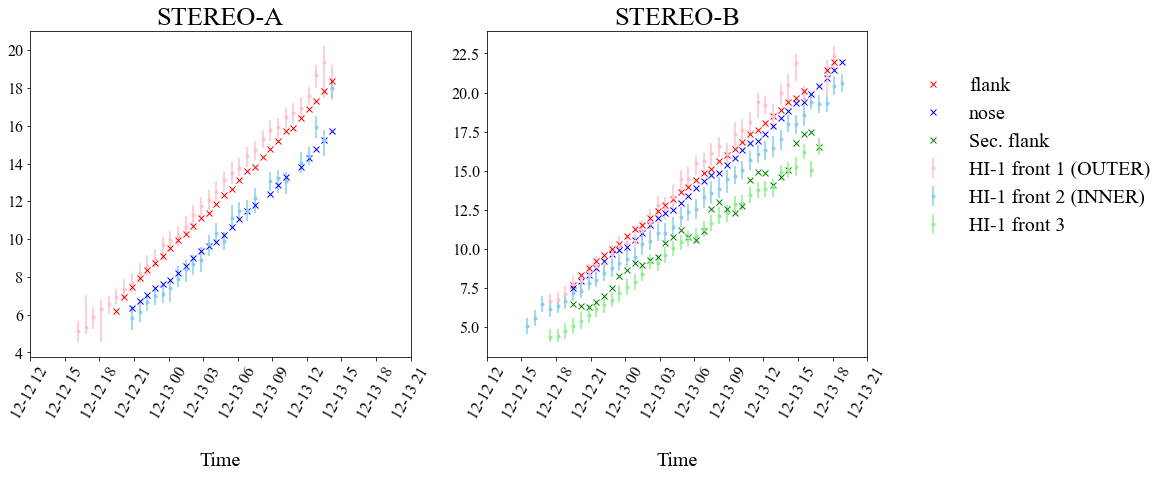

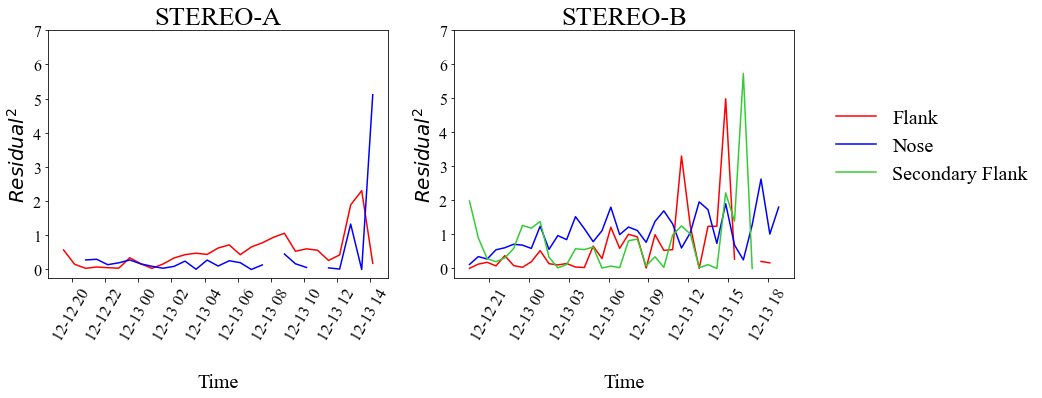

In [17]:
errorA, errorB = deterministic_error(cme, print_RMSE=True, plot=True, save=False)

In [59]:
def cumulativeRMSE(cme, figure=False, savefig=False):
    """
    Compute the cumulative RMSE for each observational timestep.
    Returns dataframe of the cumulative RMSE for number of obervations used from both STEREO spacecraft.
    """
   
    # Find the elongation profiles for the model run
    sta_profile, stb_profile = huxt_t_e_profile_fast(cme)
    
    # Find the error of the model run
    ts_errorA, ts_errorB, errorA, errorB = calculate_error_new(sta_profile, stb_profile)
    
    ts_errorA.time = ts_errorA.time.astype(str)
    ts_errorA.time = pd.to_datetime(ts_errorA.time, format="%Y%m%dT%H:%M:%S.%f")

    dftest = pd.DataFrame()
    dftest2 = pd.DataFrame()

    for ind,timevalueA in enumerate(ts_errorA.time):
        
        # STEREO A is missing a inital observation which STEREO-B sees. Here we insert an row first showing NaNs
        if ind == 0:
            dftest = dftest.append({"TIME A":pd.to_datetime(np.NaN),
                                "# obs": 0,
                                "RMSE flank A": np.NaN,
                                "RMSE nose A": np.NaN, 
                                "RMSE two A": np.NaN,
                                "total error A": np.NaN,
                                "count A": np.NaN }, ignore_index=True)
        
        # compute errors
        sumupflankA = np.nansum(ts_errorA["R2 flank"][0:ind+1])
        countflankA = ts_errorA["interp flank"][0:ind+1].count()
        avflankA = sumupflankA / countflankA
        ansflankA = np.sqrt(avflankA)

        sumupnoseA = np.nansum(ts_errorA["R2 nose"][0:ind+1])
        countnoseA = ts_errorA["interp nose"][0:ind+1].count()
        avnoseA = sumupnoseA / countnoseA
        ansnoseA = np.sqrt(avnoseA)

        sumuptwoA = sumupflankA + sumupnoseA
        numberA = ts_errorA["interp flank"][0:ind+1].count() + ts_errorA["interp nose"][0:ind+1].count()
        avtwoA = sumuptwoA / numberA
        anstwoA = np.sqrt(avtwoA)
        
        if ind == 0:
            obsnoA = 0
        # compute number of observation (ensure inital NANs do not get counted)
        if math.isnan(anstwoA):
            obsnoA = 0
        else:
            obsnoA = obsnoA+1

        # Add to dataframe
        dftest = dftest.append({"TIME A":timevalueA,
                                "# obs": obsnoA,
                                "RMSE flank A": ansflankA,
                                "RMSE nose A": ansnoseA, 
                                "RMSE two A": anstwoA,
                                "total error A": sumuptwoA,
                                "count A": numberA }, ignore_index=True)
  
    for ind, timevalueB in enumerate(ts_errorB.time):

        sumupflankB = np.nansum(ts_errorB["R2 flank"][0:ind + 1])
        avflankB = sumupflankB / ts_errorB["interp flank"][0:ind + 1].count()
        ansflankB = np.sqrt(avflankB)

        sumupnoseB = np.nansum(ts_errorB["R2 nose"][0:ind + 1])
        avnoseB = sumupnoseB / ts_errorB["interp nose"][0:ind + 1].count()
        ansnoseB = np.sqrt(avnoseB)

        sumuptwoB = sumupflankB + sumupnoseB
        numberB = ts_errorB["interp flank"][0:ind + 1].count() + ts_errorB["interp nose"][0:ind + 1].count()
        avtwoB = sumuptwoB / numberB
        anstwoB = np.sqrt(avtwoB)
        
        if ind == 0:
            obsnoB = 0
        # compute number of observation (ensure inital NANs do not get counted)
        if math.isnan(anstwoB):
            pass
        else:
            obsnoB = obsnoB+1

        dftest2 = dftest2.append({"TIME B":timevalueB, 
                                  "# obs": obsnoB,
                                  "RMSE flank B": ansflankB,
                                  "RMSE nose B": ansnoseB,
                                  "RMSE two B": anstwoB,
                                  "total error B": sumuptwoB,
                                  "count B": numberB}, ignore_index=True)

    # Merge the two dataframes together and reorder columns
    dftest2["RMSE flank A"] = dftest["RMSE flank A"]
    dftest2["RMSE nose A"] = dftest["RMSE nose A"]
    dftest2["RMSE two A"] = dftest["RMSE two A"]
    dftest2["TIME A"] = dftest["TIME A"]
#     dftest2["ind A"] = dftest["ind A"]
#     dftest2["# obs A"] = dftest["# obs"]
    dftest2["total error A"] = dftest["total error A"]
    dftest2["count A"] = dftest["count A"]
#     dftest2 = pd.merge(dftest, dftest2, how="outer", on=["# obs"])
    dftest2 = dftest2[["# obs", "TIME A", "RMSE flank A", "RMSE nose A", "RMSE two A", "TIME B", "RMSE flank B", "RMSE nose B", "RMSE two B", "total error A", "count A", "total error B", "count B"]]
    
    # Replace NaN values for STEREO-A, where there is less observations then STEREO-B
    dftest2["RMSE flank A"][len(dftest)-1:len(dftest2)+1].fillna(method='pad', inplace=True)
    dftest2["RMSE nose A"][len(dftest)-1:len(dftest2)+1].fillna(method='pad', inplace=True)
    dftest2["RMSE two A"][len(dftest)-1:len(dftest2)+1].fillna(method='pad', inplace=True)
#     dftest2["# obs A"][len(dftest)-1:len(dftest2)+1].fillna(method='pad', inplace=True)
    dftest2["total error A"][len(dftest)-1:len(dftest2)+1].fillna(method='pad', inplace=True)
    dftest2["count A"][len(dftest)-1:len(dftest2)+1].fillna(method='pad', inplace=True)
#     dftest2["ind A"][len(dftest)-1:len(dftest2)+1].fillna(method='pad', inplace=True)
    
    # Calculate the joint RMSE for each observation
    totalerror = dftest2["total error A"] + dftest2["total error B"]
    totalcount = dftest2["count A"] + dftest2["count B"]
    totalaverage = totalerror/totalcount
    totalRMSE = np.sqrt(totalaverage)
    dftest2["error combined"] = totalerror
    dftest2["count combined"] = totalcount
    dftest2["RMSE combined"] = totalRMSE
    dftest2.drop(columns=["total error A","count A","total error B","count B"])
    
    
    
    
    # Make vertical markers for every 5 timestamp observations points
    verticalA = []
    for ind, val in enumerate(dftest["TIME A"]):
        if dftest["# obs"][ind] == 0:
            pass
        elif dftest["# obs"][ind] % 5 == 0:
            verticalA.append(val)

    verticalB = []
    for ind, val in enumerate(dftest2["TIME B"]):
        if dftest2["# obs"][ind] == 0:
            pass
        elif dftest2["# obs"][ind] % 5 == 0:
            verticalB.append(val)

    if figure==True:

        plt.rcParams.update({'font.size': 22, 'axes.labelsize':14, 'legend.fontsize':16,'xtick.labelsize': 12.0,'ytick.labelsize': 12.0,"font.family":"Times New Roman"})
        fig, ax = plt.subplots(3,1, figsize = [8,10], sharex=True, sharey=False,)

        ax[0].plot(dftest["TIME A"], dftest["RMSE flank A"], ':', color='orange', label="STA flank", zorder=3)
        ax[0].plot(dftest["TIME A"], dftest["RMSE nose A"], '--', color='orange', label="STA nose", zorder=3)
        ax[0].plot(dftest["TIME A"], dftest["RMSE two A"], '-', color='orange', label="STA two", zorder=5)
        
        ax[1].plot(dftest2["TIME B"], dftest2["RMSE flank B"], ':', color='dodgerblue', label="STB flank", zorder=3)
        ax[1].plot(dftest2["TIME B"], dftest2["RMSE nose B"], '--', color='dodgerblue', label="STB nose", zorder=3)
        ax[1].plot(dftest2["TIME B"], dftest2["RMSE two B"], '-', color='dodgerblue', label="STA two", zorder=5)
        
        ax[2].plot(dftest2["TIME A"], dftest2["RMSE two A"], '-', color='orange', label="STA", zorder=3)
        ax[2].plot(dftest2["TIME B"], dftest2["RMSE two B"], '-', color='dodgerblue', label="STB", zorder=3)
        ax[2].plot(dftest2["TIME B"], dftest2["RMSE combined"], '-k', label="STEREO", zorder=5)

        for nn,axs in enumerate(ax):
            axs.yaxis.set_major_locator(MultipleLocator(0.5))
            axs.yaxis.set_minor_locator(MultipleLocator(0.1))
#             axs.xaxis.set_major_locator(MultipleLocator(5))
#             axs.xaxis.set_minor_locator(MultipleLocator(1))
            
            axs.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M\n%m/%d'))
            axs.xaxis.set_major_locator(mdates.HourLocator(interval=6))
            axs.xaxis.set_minor_locator(mdates.HourLocator(interval=1))

            axs.set_ylim(bottom = 0, top=1.2)
            axs.set_xlim(left = Time('2008-12-12T15:00:00',format='isot').datetime, 
                         right = Time('2008-12-13T21:00:00',format='isot').datetime)
            axs.set_ylabel("RMSE")
            axs.set_xlabel("Observation Time")

        black_line = mlines.Line2D([], [], color='black',linestyle="--",markersize=0, label="Nose")
        black_line2 = mlines.Line2D([], [], color='black',linestyle=":", markersize=0, label="Flank")
        black_line3 = mlines.Line2D([], [], color='black',linestyle="-", markersize=0, label="Both")
        fig.legend(["flank", "nose", "both"],bbox_to_anchor=(0.5, 0.06), loc='center', ncol=3, frameon=True, fontsize=14,title="Leading Edge Feature:", title_fontsize=14,handles=[black_line,black_line2, black_line3])
        plt.subplots_adjust(hspace=0.0, bottom=0.22)

        ax[0].annotate("STEREO-A", xy=(0.02, 0.9), xycoords="axes fraction", fontsize=10)
        ax[1].annotate("STEREO-B", xy=(0.02, 0.9), xycoords="axes fraction", fontsize=10)
        ax[2].annotate("COMBINED", xy=(0.02, 0.9), xycoords="axes fraction", fontsize=10)
        
        # Plotting markers  to count number of obs. timestep.
#         for i in range(len(verticalA)):
#             timestepNO = (i+1)*5
#             observationNO = timestepNO
#             ax[0].vlines(x=verticalA[i], ymin=0, ymax=2, color="gray", zorder=1, lw=0.3)
#             ti = Time(verticalA[i]).datetime
#             ax[0].annotate(observationNO, xy=(mdates.date2num(ti), 0.1), xycoords="data",xytext=(-10,0), textcoords='offset points', fontsize=10, color='gray')
#         for i in range(len(verticalB)):
#             timestepNO = (i+1)*5
#             observationNO = timestepNO
#             ax[1].vlines(x=verticalB[i], ymin=0, ymax=2, color="gray", zorder=1, lw=0.3)
#             ax[2].vlines(x=verticalB[i], ymin=0, ymax=2, color="gray", zorder=1, lw=0.3)
#             ti = Time(verticalB[i]).datetime
#             ax[1].annotate(observationNO, xy=(mdates.date2num(ti), 0.1), xycoords="data", xytext=(-10,0), textcoords='offset points', fontsize=10, color='gray')
#             ax[2].annotate(observationNO, xy=(mdates.date2num(ti), 0.1), xycoords="data", xytext=(-10,0), textcoords='offset points', fontsize=10, color='gray')
            
        if savefig==True:
            project_dirs = H._setup_dirs_()
            filename = "cumulativeRMSE.png"
            filepath = os.path.join(project_dirs['HUXt_figures'], filename)            
            fig.savefig(filepath, dpi=300, bbox_inches='tight')

            filename = "cumulativeRMSE.pdf"
            filepath = os.path.join(project_dirs['HUXt_figures'], filename)
            fig.savefig(filepath, dpi=300, bbox_inches='tight')
        # end savefig
    # end figure
    
    return dftest2

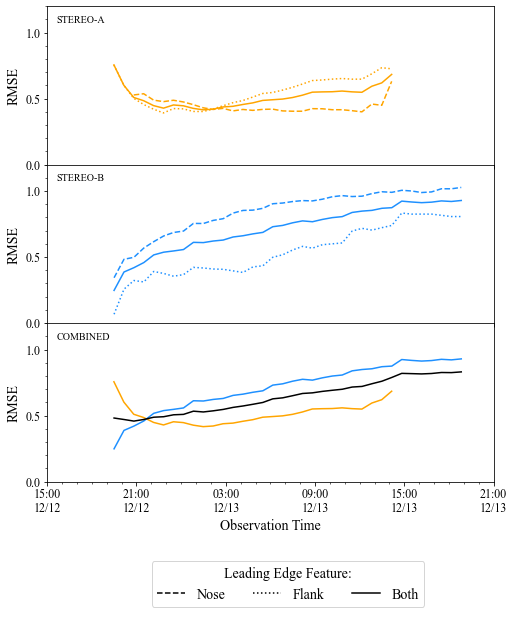

In [60]:
df = cumulativeRMSE(cme, figure=True, savefig=True)

In [ ]:
display(df)


***
***
# __Ensemble run__ #

#### __Running ensemble and retreving data__ ####

Fuctions in this section:
* run_huxt_ensemble( )
* run_huxt_ensemble_new( )
* track_cme_flanks( )
* ensemble_cme_dataframes( )
* residual_errors( )  
* ensemble_error( )
    

#### __Loading File__ ####

Functions in this section:
* load_cme_file( )
* load_elongation_data( )
* load_cme_file( )
* load_csv_file( )

#### __Analysis__ ####

Functions in this section:
* locate_bestfit_fun( )
* cme_init_param( )
* cme_param_df( )
* bestfit_cme_init_param( )
* best_fit_runs( )

#### __Plotting__ ####

Functions in this section:
* ensemble_elongation_plot( )
* plot_resdiual_errors( )
* plot_ensemble_errors( )
* variable_plots( )
* elongation_time_plot( )
* plot_bestfit_runs( )

In [ ]:
# earth = model.get_observer('earth')
# earth.time.jd[0]

***
#### _Running ensemble and retreving data_ ####


* __run_huxt_ensemble__
|OLD - fixed parameters|

In [25]:
def run_huxt_ensemble(v_boundary, cr_num, cr_lon_init, n_ensemble=100, variable_test = False, variable='',param_space=0, event=''):
    """
    Produce a determinisitc and ensemble of HUXt runs for a specified solar stormwatch event. For the deterministic run,
    both the full model solution, and the CME profile are saved in data>HUXt. For the ensemble, only the CME profiles
    are saved in data>HUXt, as this reduces the storage requirements significantly.
    
    Parameters
    ----------
    v_boundary: the list of solar wind speed at inner boundary
    n_ensemble: Number of ensemble memebers, defaults to 100
    variable_test: True or False. Indicates whether you're only changing one variable.
    variable: If variable_test is True, assign the variable you want to change. Only "Width", "Longitude", "Latitude", "Speed", or "Thickness" are accepted.
    param_space: If variable_test is True, assign the parameter space of the variable including the units.
    event: Tag name
    
    Returns
    -------
    A set of files in data>HUXt for the specified event.
    """

    # Get the carrington rotation number, and Earth's coordinates, at SWPCs initial observation time.
                                                                    #     cr_num = np.fix(sn.carrington_rotation_number(swpc_cme['t_obs']))
                                                                    #     ert = H.Observer('EARTH', swpc_cme['t_obs'])
#     cr_num = np.fix(sn.carrington_rotation_number(earth.time[0]))
#     ert = H.Observer('EARTH', earth.time[0])
#     # This may currently need an inital run for the variables needed the above lines. 

#     print("Carrington rotation: {}".format(cr_num))
#     print("Earth Carrington Lon at init: {:3.2f}".format(ert.lon_c.to(u.deg)))
#     print("Earth HEEQ Lat at init: {:3.2f}".format(ert.lat.to(u.deg)))
    
    # Set up HUXt for a 5 day simulation
    vr_in = v_boundary
    #model = H.HUXt(v_boundary=vr_in, cr_num=cr_num, cr_lon_init=ert.lon_c.to(u.deg), simtime=5*u.day, dt_scale=4)       # The same model run as I had coded originally
    model = H.HUXt(v_boundary=vr_in, cr_num=cr_num, cr_lon_init=cr_lon_init, simtime=5*u.day, dt_scale=4)       # The same model run as I had coded originally


    # Deterministic run first:
#   ---------------------------
    # Get time of CME at inner boundary, assuming fixed speed.
#     r_ib = model.r.min()
#     dt = ((r_ib - swpc_cme['r_obs']) / cme.v).to('s')
#     thickness = 5 * u.solRad
    
    # Setup a ConeCME with these parameters
    conecme = H.ConeCME(t_launch=0.0*u.day, longitude=10.0*u.deg, latitude=0.0*u.deg,  width=46*u.deg, v=498*(u.km/u.s), thickness=5*u.solRad)

    # Run HUXt with this ConeCME
    TAG = "{}_{}".format(event , 'deterministic')
    model.solve([conecme], save=True, tag=TAG)
    
    
    # Ensemble run:
#   ---------------------------    
    # Now produce ensemble of HUXt runs with perturbed ConeCME parameters
    np.random.seed(1987)
    
                                                #     lon_spread = 20 * u.deg
                                                #     lat_spread = 20 * u.deg
                                                #     width_spread = 20 * u.deg
                                                #     v_spread = 200 * model.kms
                                                #     thickness_spread = 2 * u.solRad
                                                #     r_init_spread = 3 * u.solRad

    lon_spread = 15 * u.deg
    lat_spread = 15 * u.deg
    width_spread = 20 * u.deg
    v_spread = 100 * model.kms
    thickness_spread = 2 * u.solRad
    r_init_spread = 0 * u.solRad
   
    # Testing an ensemble with changing parameter
    if variable_test:
        lon_spread = 0 * u.deg
        lat_spread = 0 * u.deg
        width_spread = 0 * u.deg
        v_spread = 0 * model.kms
        thickness_spread = 0 * u.solRad
        r_init_spread = 0 * u.solRad
        
        if variable == "Longitude":
            lon_spread = param_space
        elif variable == 'Latitude':
            lat_spread = param_space
        elif variable == 'Width':
            width_spread = param_space
        elif variable == 'Speed':
            v_spread = param_space
        elif variable == 'Thickness':
            thickness_spread = param_space
            
        # should put in a unit check here
    
    for i in range(n_ensemble):
        
        lon = 10.0*u.deg + np.random.uniform(-1, 1, 1)[0] * lon_spread
        lat = 0.0 *u.deg + np.random.uniform(-1, 1, 1)[0] * lat_spread
        width = 46*u.deg + np.random.uniform(-1, 1, 1)[0] * width_spread
        v = 498*(u.km/u.s) + np.random.uniform(-1, 1, 1)[0] * v_spread
        thickness = 5.0*u.solRad + np.random.uniform(-1, 1, 1)[0] * thickness_spread

        # Workout time of CME at inner boundary, assuming fixed speed.
#         r_init = 0*u.solRad + np.random.uniform(-1, 1, 1)[0] * r_init_spread
#         r_ib = model.r.min()
#         dt = ((r_ib - r_init) / v).to('s')
        dt=0*u.s
        
        # Setup the ConeCME and run the model.
        conecme = H.ConeCME(t_launch=dt, longitude=lon, latitude=lat, width=width, v=v, thickness=thickness)
        tag = "{}_ensemble_{:02d}".format(event, i)
        model.solve([conecme],save=True, tag=tag)
    
    return

* __run_huxt_ensemble_new__
|Changed for moving the inner boundary inwards|

In [30]:
def run_huxt_ensemble_new(v_boundary, cr_num, cr_lon_init, n_ensemble=100, longitude=0*u.deg, latitude=0*u.deg, width=0*u.deg, v=0*u.km/u.s, thickness=5*u.solRad, t_launch=0.0*u.day,
                          lon_spread=0*u.deg, lat_spread=0*u.deg, width_spread=10*u.deg, v_spread=0*model.kms, thickness_spread=0*u.solRad,
                          map_inwards=False, r_outer=30*u.solRad, r_inner= 30*u.solRad, 
                          variable_test = False, variable='', param_space=0, event=''):
    """
    Produce a determinisitc and ensemble of HUXt runs for a specified solar stormwatch event. For the deterministic run,
    both the full model solution, and the CME profile are saved in data>HUXt. For the ensemble, only the CME profiles
    are saved in data>HUXt, as this reduces the storage requirements significantly.
    
    Parameters
    ----------
    v_boundary: the list of solar wind speed at inner boundary
    n_ensemble: Number of ensemble memebers, defaults to 100
    variable_test: True or False. Indicates whether you're only changing one variable.
    variable: If variable_test is True, assign the variable you want to change. Only "Width", "Longitude", "Latitude", "Speed", or "Thickness" are accepted.
    param_space: If variable_test is True, assign the parameter space of the variable including the units.
    event: Tag name
    
    Returns
    -------
    A set of files in data>HUXt for the specified event.
    """

                                                                                            # Get the carrington rotation number, and Earth's coordinates, at SWPCs initial observation time.
                                                                                            #     cr_num = np.fix(sn.carrington_rotation_number(swpc_cme['t_obs']))
                                                                                            #     ert = H.Observer('EARTH', swpc_cme['t_obs'])
                                                                                            #     cr_num = np.fix(sn.carrington_rotation_number(earth.time[0]))
                                                                                            #     ert = H.Observer('EARTH', earth.time[0])
                                                                                                # This may currently need an inital run for the variables needed the above lines. 

                                                                                            #     print("Carrington rotation: {}".format(cr_num))
                                                                                            #     print("Earth Carrington Lon at init: {:3.2f}".format(ert.lon_c.to(u.deg)))
                                                                                            #     print("Earth HEEQ Lat at init: {:3.2f}".format(ert.lat.to(u.deg)))

    # Set up HUXt for a 5 day simulation1010
    if map_inwards == True:
        vr_inner = H.map_v_boundary_inwards(v_outer=v_boundary, r_outer=r_outer, r_inner=r_inner)
        model = H.HUXt(v_boundary=vr_inner , cr_num=cr_num, cr_lon_init=cr_lon_init, simtime=5*u.day, dt_scale=4, r_min=r_inner)       # The same model run as I had coded originally
    else:
        model = H.HUXt(v_boundary=v_boundary , cr_num=cr_num, cr_lon_init=cr_lon_init, simtime=5*u.day, dt_scale=4)
        
    # Deterministic run first:
#   ---------------------------
                                                                                                # Get time of CME at inner boundary, assuming fixed speed.
                                                                                            #     r_ib = model.r.min()
                                                                                            #     dt = ((r_ib - swpc_cme['r_obs']) / cme.v).to('s')
                                                                                            #     thickness = 5 * u.solRad
    
    # Setup a ConeCME with these parameters
    conecme = H.ConeCME(t_launch=t_launch, longitude=longitude, latitude=latitude, width=width, v=v, thickness=thickness, initial_height = r_inner)

    # Run HUXt with this ConeCME
    TAG = "{}_{}".format(event , 'deterministic')
    model.solve([conecme], save=True, tag=TAG)
    
    
    # Ensemble run:
#   ---------------------------    
    # Now produce ensemble of HUXt runs with perturbed ConeCME parameters
    np.random.seed(1987)
    
    lon_spread = lon_spread
    lat_spread = lat_spread 
    width_spread = width_spread
    v_spread = v_spread
    thickness_spread = thickness_spread
    r_init_spread = 0 * u.solRad
                                                
    # Testing an ensemble with changing parameter
    if variable_test:
        lon_spread = 0 * u.deg
        lat_spread = 0 * u.deg
        width_spread = 0 * u.deg
        v_spread = 0 * model.kms
        thickness_spread = 0 * u.solRad
        r_init_spread = 0 * u.solRad
        
        if variable == "Longitude":
            lon_spread = param_space
        elif variable == 'Latitude':
            lat_spread = param_space
        elif variable == 'Width':
            width_spread = param_space
        elif variable == 'Speed':
            v_spread = param_space
        elif variable == 'Thickness':
            thickness_spread = param_space
            
        # should put in a unit check here
    
    for i in range(n_ensemble):
        
        lon = longitude + np.random.uniform(-1, 1, 1)[0] * lon_spread
        lat = latitude + np.random.uniform(-1, 1, 1)[0] * lat_spread
        width_ens = width + np.random.uniform(-1, 1, 1)[0] * width_spread
        v_ens = v + np.random.uniform(-1, 1, 1)[0] * v_spread
        thickness_ens = thickness + np.random.uniform(-1, 1, 1)[0] * thickness_spread

        # Workout time of CME at inner boundary, assuming fixed speed.
#         r_init = 0*u.solRad + np.random.uniform(-1, 1, 1)[0] * r_init_spread
#         r_ib = model.r.min()
#         dt = ((r_ib - r_init) / v).to('s')
        dt=0*u.s
        
       
        # Setup the ConeCME and run the model.
        conecme = H.ConeCME(t_launch=dt, longitude=lon, latitude=lat, width=width_ens, v=v_ens, thickness=thickness_ens, initial_height = r_inner)
        tag = "{}_ensemble_{:02d}".format(event, i)
        model.solve([conecme],save=True, tag=tag)
    
    return

In [52]:
def run_huxt_ensemble_new_noda(cr_num, cr_lon_init, n_ensemble=100, longitude=0*u.deg, latitude=0*u.deg, width=0*u.deg, v=0*u.km/u.s, thickness=5*u.solRad, t_launch=0.0*u.day,
                          lon_spread=0*u.deg, lat_spread=0*u.deg, width_spread=10*u.deg, v_spread=0*model.kms, thickness_spread=0*u.solRad,
                          map_inwards=False, r_outer=30*u.solRad, r_inner=30*u.solRad, 
                          variable_test = False, variable='', param_space=0, event=''):
    """
    Produce a determinisitc and ensemble of HUXt runs for a specified solar stormwatch event. For the deterministic run,
    both the full model solution, and the CME profile are saved in data>HUXt. For the ensemble, only the CME profiles
    are saved in data>HUXt, as this reduces the storage requirements significantly.
    
    Parameters
    ----------
    n_ensemble: Number of ensemble memebers, defaults to 100
    variable_test: True or False. Indicates whether you're only changing one variable.
    variable: If variable_test is True, assign the variable you want to change. Only "Width", "Longitude", "Latitude", "Speed", or "Thickness" are accepted.
    param_space: If variable_test is True, assign the parameter space of the variable including the units.
    event: Tag name
    
    Returns
    -------
    A set of files in data>HUXt for the specified event.
    """

                                                                                            # Get the carrington rotation number, and Earth's coordinates, at SWPCs initial observation time.
                                                                                            #     cr_num = np.fix(sn.carrington_rotation_number(swpc_cme['t_obs']))
                                                                                            #     ert = H.Observer('EARTH', swpc_cme['t_obs'])
                                                                                            #     cr_num = np.fix(sn.carrington_rotation_number(earth.time[0]))
                                                                                            #     ert = H.Observer('EARTH', earth.time[0])
                                                                                                # This may currently need an inital run for the variables needed the above lines. 

                                                                                            #     print("Carrington rotation: {}".format(cr_num))
                                                                                            #     print("Earth Carrington Lon at init: {:3.2f}".format(ert.lon_c.to(u.deg)))
                                                                                            #     print("Earth HEEQ Lat at init: {:3.2f}".format(ert.lat.to(u.deg)))

    # Set up HUXt for a 5 day simulation1010
    if map_inwards == True:
#         vr_inner = H.map_v_boundary_inwards(v_outer=v_boundary, r_outer=r_outer, r_inner=r_inner)
#         model = H.HUXt(cr_num=cr_num, cr_lon_init=cr_lon_init, simtime=5*u.day, dt_scale=4, r_min=r_inner)       # The same model run as I had coded originally
       print("Cannot use HelioMAS solar wind solution to track CME evolution from lower inner boundary currently.")
    else:
        model = H.HUXt(cr_num=cr_num, cr_lon_init=cr_lon_init, simtime=5*u.day, dt_scale=4)
        
    # Deterministic run first:
#   ---------------------------
                                                                                                # Get time of CME at inner boundary, assuming fixed speed.
                                                                                            #     r_ib = model.r.min()
                                                                                            #     dt = ((r_ib - swpc_cme['r_obs']) / cme.v).to('s')
                                                                                            #     thickness = 5 * u.solRad
    
    # Setup a ConeCME with these parameters
    conecme = H.ConeCME(t_launch=t_launch, longitude=longitude, latitude=latitude, width=width, v=v, thickness=thickness, initial_height = r_inner)

    # Run HUXt with this ConeCME
    TAG = "{}_{}".format(event , 'deterministic')
    model.solve([conecme], save=True, tag=TAG)
    
    
    # Ensemble run:
#   ---------------------------    
    # Now produce ensemble of HUXt runs with perturbed ConeCME parameters
    np.random.seed(1987)
    
    lon_spread = lon_spread
    lat_spread = lat_spread 
    width_spread = width_spread
    v_spread = v_spread
    thickness_spread = thickness_spread
    r_init_spread = 0 * u.solRad
                                                #     lon_spread = 20 * u.deg
                                                #     lat_spread = 20 * u.deg
                                                #     width_spread = 20 * u.deg
                                                #     v_spread = 200 * model.kms
                                                #     thickness_spread = 2 * u.solRad
                                                #     r_init_spread = 3 * u.solRad

                                                #     lon_spread = 15 * u.deg
                                                #     lat_spread = 15 * u.deg
                                                #     width_spread = 20 * u.deg
                                                #     v_spread = 100 * model.kms
                                                #     thickness_spread = 2 * u.solRad
                                                #     r_init_spread = 0 * u.solRad

                                                #     # 1x error
                                                #     lon_spread = 4 * u.deg
                                                #     lat_spread = 3 * u.deg
                                                #     width_spread = 6 * u.deg
                                                #     v_spread = 150 * model.kms
                                                #     thickness_spread = 2 * u.solRad
                                                #     r_init_spread = 0 * u.solRad
    
                                                #      # 2x error
                                                #     lon_spread = 8 * u.deg
                                                #     lat_spread = 6 * u.deg
                                                #     width_spread = 12 * u.deg
                                                #     v_spread = 150 * model.kms
                                                #     thickness_spread = 2 * u.solRad
                                                #     r_init_spread = 0 * u.solRad
   
    # Testing an ensemble with changing parameter
    if variable_test:
        lon_spread = 0 * u.deg
        lat_spread = 0 * u.deg
        width_spread = 0 * u.deg
        v_spread = 0 * model.kms
        thickness_spread = 0 * u.solRad
        r_init_spread = 0 * u.solRad
        
        if variable == "Longitude":
            lon_spread = param_space
        elif variable == 'Latitude':
            lat_spread = param_space
        elif variable == 'Width':
            width_spread = param_space
        elif variable == 'Speed':
            v_spread = param_space
        elif variable == 'Thickness':
            thickness_spread = param_space
            
        # should put in a unit check here
    
    for i in range(n_ensemble):
        
        lon = longitude + np.random.uniform(-1, 1, 1)[0] * lon_spread
        lat = latitude + np.random.uniform(-1, 1, 1)[0] * lat_spread
        width_ens = width + np.random.uniform(-1, 1, 1)[0] * width_spread
        v_ens = v + np.random.uniform(-1, 1, 1)[0] * v_spread
        thickness_ens = thickness + np.random.uniform(-1, 1, 1)[0] * thickness_spread

        # Workout time of CME at inner boundary, assuming fixed speed.
#         r_init = 0*u.solRad + np.random.uniform(-1, 1, 1)[0] * r_init_spread
#         r_ib = model.r.min()
#         dt = ((r_ib - r_init) / v).to('s')
        dt=0*u.s
        
       
        # Setup the ConeCME and run the model.
        conecme = H.ConeCME(t_launch=dt, longitude=lon, latitude=lat, width=width_ens, v=v_ens, thickness=thickness_ens, initial_height = r_inner)
        tag = "{}_ensemble_{:02d}".format(event, i)
        model.solve([conecme],save=True, tag=tag)
    
    return

* __track_cme_flanks( )__
|Track the features thought the model run|

In [23]:
def track_cme_flanks(fast=True, tag=''):
    """
    Compute the CME flank elongation for each ensemble member and save to file.
    Parameters
    ----------
    fast: Boolean, default True, of whether to use a faster version of the flank tracking algorithm. Saves a
          significant amount of time, and works for the events studied here. Might not generalise well to other events.
    Returns
    -------
    arrivial_info: global. Dataframe of the arrival time, speed, and transit time of the ensemble CMEs
    Files in data>out_data, with name format ssw_event_ensemble_sta.csv and ssw_event_ensemble_stb.csv
    """
    
    print("Now processing: track_cme_flanks(...)")  # Process message
    
    # Find file path of ensemble files 
    project_dirs = H._setup_dirs_()
    path = os.path.join(project_dirs['HUXt_data'], "HUXt_CR2077_{}_ensemble*.hdf5".format(tag))
    ensemble_files = glob.glob(path)
    n_ens = len(ensemble_files)
    print("Files found: {}. Now processing their data.".format(n_ens))  # Process message

    # Produce a dictionary of keys of column headings for the dataframes 
    # storing the ensemble of time elonation profiles
    keys = []
    parameters = ['lon', 'r', 'el', 'lon_n', 'r_n','el_n' ,'lon_sec_flank', 'r_sec_flank','el_sec_flank']
    for param in parameters:
        for i in range(n_ens):
            keys.append("{}_{:02d}".format(param, i))       

    keys = {k: 0 for k in keys}   # I don't know what this line does

    # Loop over the ensemble files, pull out the elongation profiles.
    for i, file in enumerate(ensemble_files):
        
        print(i)
        
        cme_list = load_cme_file(file)
        cme = cme_list[0] 

        # Compute the time-elongation profiles of the CME features from STA and STB,
        # and store into dataframes for each set of ensembles
        
        if fast:
            hxta, hxtb = huxt_t_e_profile_fast(cme)
        else:
            hxta, hxtb = huxt_t_e_profile(cme)       # Don't have this module
     
        if i == 0:    
            # Make pandas array to store all ensemble t_e_profiles.
            keys['time'] = hxta['time']
            ensemble_sta = pd.DataFrame(keys)
            ensemble_stb = pd.DataFrame(keys)

        # Update the ensemble dataframes
        for key in ['lon', 'r', 'el', 'lon_n', 'r_n','el_n' ,'lon_sec_flank', 'r_sec_flank','el_sec_flank']:
            e_key = "{}_{:02d}".format(key, i)
            ensemble_sta[e_key] = hxta[key]
            ensemble_stb[e_key] = hxtb[key]
            
    # ----------        
    # Add deterministic profile to the dataframe
    print("determinisitic")  # Process message
    path = os.path.join(project_dirs['HUXt_data'], "HUXt_CR2077_{}_deterministic.hdf5".format(tag))
    deterministic_file = glob.glob(path)
    
    cme_list = load_cme_file(deterministic_file[0])
    cme = cme_list[0] 

    if fast:
        hxta, hxtb = huxt_t_e_profile_fast(cme)
    else:
        hxta, hxtb = huxt_t_e_profile(cme)       # Don't have this module
        
    for key in ['lon', 'r', 'el', 'lon_n', 'r_n','el_n' ,'lon_sec_flank', 'r_sec_flank','el_sec_flank']:
            e_key = "{}_deter".format(key)
            ensemble_sta[e_key] = hxta[key]
            ensemble_stb[e_key] = hxtb[key]
    # ---------- 
            
    out_path = project_dirs['HUXt_data']
    out_name = tag + '_ensemble_sta.csv'
    ensemble_sta.to_csv(os.path.join(out_path, out_name))
    out_name = tag + '_ensemble_stb.csv'
    ensemble_stb.to_csv(os.path.join(out_path, out_name))
    
    print("Finished processing: track_cme_flanks(...)")  # Process message

    return 


* __ensemble_cme_dataframes( )__
|Create dataframes required for analysis|

In [22]:
def ensemble_cme_dataframes(n_ens=100, fast=True, tag=''):
    """
    Produces .csv files for information needed for CME ensemble analysis. Loops through .hdf5 files -- first deterministic, and then 
    ensemble runs chronalogically -- to pull out the cme.
    Datasets:
    ---------
    cme_params: Dictonary of the initial parameters used to define the CME at the model's inner boundary 
    {Keys: Ensemble Run; Time of Launch; Longitude (˚);Latitude (˚); Speed (km/s); Width (˚); Thickness (Rs)}
    ensemble_errorA/ ensemble_errorB: the total residual errors and root mean square errors from the model run
    {Keys: }
    arrival_info: Dictonary with the arrival information of the CME and Earth for each ensmeble run.
    {keys: file; Transit Time; Arrival Time; Arrival Speed, Arrival Time Error, Arrival Speed Error}
    
    """
    
    print("Now processing: ensemble_cme_dataframes(...)")  # Process message
    
    # Produce data-frames to store information
    #----------------------------------------------
    
    # CME INITIAL PARAMETERS
    cme_params = pd.DataFrame()
    
    # ERROR INFORMATION
    ensemble_errorA = pd.DataFrame()
    ensemble_errorB = pd.DataFrame()
    
    # ARRIVAL INFORMATION
    arrival_info = pd.DataFrame()
    
    
    # Deterministic event
    #----------------------------------------------
    # Find file path 
    runtag = "deterministic"
    project_dirs = H._setup_dirs_()
    path = os.path.join(project_dirs['HUXt_data'], "HUXt_CR2077_{}_deterministic.hdf5".format(tag))
    filepath = glob.glob(path)[0]
    cme_list = load_cme_file(filepath)
    cme = cme_list[0]
    
    print("deterministic")   # Process message
    
    # Store init params
    cme_params = cme_params.append({"Ensemble Run":runtag, 
                                    "Time of launch": cme.t_launch, 
                                    "Longitude (˚)":cme.longitude.to(u.deg).value,
                                    "Latitude (˚)":cme.latitude.to(u.deg).value, 
                                    "Speed (km/s)": cme.v.value,
                                    "Width (˚)": cme.width.value,
                                    "Thickness (Rs)":cme.thickness.value,
                                    "Initial Radial Height (Rs)": cme.initial_height.value}, ignore_index=True)
    
    # error calculations
    if fast:
        hxta, hxtb = huxt_t_e_profile_fast(cme)
    else:
        hxta, hxtb = huxt_t_e_profile(cme)       # Don't have this module
    
    
    ts_errorA, ts_errorB, errorA, errorB = calculate_error_new(hxta, hxtb)
    
    # Find error the nose and flank when seen from A and B
    total_NandF = errorA["N & F"] + errorB["N & F"]
    datacountA = ts_errorA["interp flank"].count()+ts_errorA["interp nose"].count()
    datacountB = ts_errorB["interp flank"].count()+ts_errorB["interp nose"].count()
    datacount = datacountA + datacountB
    RMSE_NandF = np.sqrt(total_NandF /datacount)
    
    ensemble_errorA =  ensemble_errorA.append({'file': runtag, 
                                                'total flank error':errorA['flank'][0],
                                                'total nose error':errorA['nose'][0],
                                                'total sec flank error': float('NaN'),
                                                'total N & F error': errorA['N & F'][0],
                                                'RMSE flank error': errorA['RMSE flank'][0],
                                                'RMSE nose error': errorA['RMSE nose'][0],
                                                'RMSE sec flank error': float('NaN'),
                                                'RMSE N & F error': errorA['RMSE N & F'][0],
                                                'total error w/ ST-B': total_NandF[0],
                                                'RMSE error w/ ST-B': RMSE_NandF[0]},ignore_index = True)
    ensemble_errorB =  ensemble_errorB.append({'file': runtag, 
                                                'total flank error':errorB['flank'][0],
                                                'total nose error':errorB['nose'][0],
                                                'total sec flank error': errorB['sec flank'][0],
                                                'total N & F error': errorB['N & F'][0],
                                                'RMSE flank error': errorB['RMSE flank'][0],
                                                'RMSE nose error': errorB['RMSE nose'][0],
                                                'RMSE sec flank error': errorB['RMSE sec flank'][0],
                                                'RMSE N & F error': errorB['RMSE N & F'][0],
                                                'total error w/ ST-A': total_NandF[0],
                                                'RMSE error w/ ST-A': RMSE_NandF[0]},ignore_index = True)

    # arrival information
    compute_earth_arrival(cme, print_values=False, plot=False)
    if cme.earth_transit_time == np.NaN*u.d or cme.earth_arrival_time == Time('0000-01-01T00:00:00') or cme.earth_arrival_speed == np.NaN *u.km/u.s:
        time_error = np.NaN 
        speed_error = np.NaN *u.km/u.s
        arrival_info = arrival_info.append({"file": runtag,
                                        "Transit Time" : np.NaN, 
                                        "Arrival Time" : Time('3000-01-01T00:00:00').jd,
                                        "Arrival Speed" : np.NaN,
                                        "Arrival Time Error (seconds)" : np.NaN,
                                        "Arrival Speed Error (km/s)" : np.NaN}, ignore_index=True)
        
    else:
        time_error, speed_error = arrival_error(cme)
        arrival_info = arrival_info.append({"file": runtag,
                                            "Transit Time" : cme.earth_transit_time.value, 
                                            "Arrival Time" : cme.earth_arrival_time.jd,
                                            "Arrival Speed" : cme.earth_arrival_speed.value,
                                            "Arrival Time Error (seconds)" : time_error,
                                            "Arrival Speed Error (km/s)" : speed_error.value}, ignore_index=True)
        
    # error per observation
    tempsumRMSEdf = cumulativeRMSE(cme, figure=False, savefig=False)
    sumRMSEdf = tempsumRMSEdf
    sumRMSEdf["model tag"] = runtag
    
    
    
    # Ensemble events
    #----------------------------------------------
    for i in range(n_ens):
        runtag = "ensemble_{:02d}".format(i)
        path = os.path.join(project_dirs['HUXt_data'], "HUXt_CR2077_{}_{}.hdf5".format(tag,runtag))
        filepath = glob.glob(path)[0]
        cme_list = load_cme_file(filepath)
        cme = cme_list[0]
        
        print(i)  # Process message

        # Store init params
        cme_params = cme_params.append({"Ensemble Run":runtag, 
                                        "Time of launch": cme.t_launch, 
                                        "Longitude (˚)":cme.longitude.to(u.deg).value,
                                        "Latitude (˚)":cme.latitude.to(u.deg).value, 
                                        "Speed (km/s)": cme.v.value,
                                        "Width (˚)": cme.width.value,
                                        "Thickness (Rs)":cme.thickness.value,"Initial Radial Height (Rs)": cme.initial_height.value}, ignore_index=True)
        # error calculations
        if fast:
            hxta, hxtb = huxt_t_e_profile_fast(cme)
        else:
            hxta, hxtb = huxt_t_e_profile(cme)       # Don't have this module
            
        
    
        ts_errorA, ts_errorB, errorA, errorB = calculate_error_new(hxta, hxtb)
        
        # Find error the nose and flank when seen from A and B
        total_NandF = errorA["N & F"] + errorB["N & F"]
        datacountA = ts_errorA["interp flank"].count()+ts_errorA["interp nose"].count()
        datacountB = ts_errorB["interp flank"].count()+ts_errorB["interp nose"].count()
        datacount = datacountA + datacountB
        RMSE_NandF = np.sqrt(total_NandF /datacount)
    
        ensemble_errorA =  ensemble_errorA.append({'file': runtag, 
                                                    'total flank error':errorA['flank'][0],
                                                    'total nose error':errorA['nose'][0],
                                                    'total sec flank error': float('NaN'),
                                                    'total N & F error': errorA['N & F'][0],
                                                    'RMSE flank error': errorA['RMSE flank'][0],
                                                    'RMSE nose error': errorA['RMSE nose'][0],
                                                    'RMSE sec flank error': float('NaN'),
                                                    'RMSE N & F error': errorA['RMSE N & F'][0],
                                                    'total error w/ ST-B': total_NandF[0],
                                                    'RMSE error w/ ST-B': RMSE_NandF[0]},ignore_index = True)
        ensemble_errorB =  ensemble_errorB.append({'file': runtag, 
                                                    'total flank error':errorB['flank'][0],
                                                    'total nose error':errorB['nose'][0],
                                                    'total sec flank error': errorB['sec flank'][0],
                                                    'total N & F error': errorB['N & F'][0],
                                                    'RMSE flank error': errorB['RMSE flank'][0],
                                                    'RMSE nose error': errorB['RMSE nose'][0],
                                                    'RMSE sec flank error': errorB['RMSE sec flank'][0],
                                                    'RMSE N & F error': errorB['RMSE N & F'][0],
                                                    'total error w/ ST-A': total_NandF[0],
                                                    'RMSE error w/ ST-A': RMSE_NandF[0]},ignore_index = True)

        # arrival information
        compute_earth_arrival(cme, print_values=False, plot=False)
        if cme.earth_transit_time == np.NaN*u.d or cme.earth_arrival_time == Time('0000-01-01T00:00:00') or cme.earth_arrival_speed == np.NaN *u.km/u.s:
            time_error = np.NaN 
            speed_error = np.NaN *u.km/u.s
            arrival_info = arrival_info.append({"file": runtag,
                                            "Transit Time" : np.NaN, 
                                            "Arrival Time" : Time('3000-01-01T00:00:00').jd,
                                            "Arrival Speed" : np.NaN,
                                            "Arrival Time Error (seconds)" : np.NaN,
                                            "Arrival Speed Error (km/s)" : np.NaN}, ignore_index=True)
        
        else:
            time_error, speed_error = arrival_error(cme)
            arrival_info = arrival_info.append({"file": runtag,
                                                "Transit Time" : cme.earth_transit_time.value, 
                                                "Arrival Time" : cme.earth_arrival_time.jd,
                                                "Arrival Speed" : cme.earth_arrival_speed.value,
                                                "Arrival Time Error (seconds)" : time_error,
                                                "Arrival Speed Error (km/s)" : speed_error.value}, ignore_index=True)
            
        # error per observation
        tempsumRMSEdf = cumulativeRMSE(cme, figure=False, savefig=False)
        tempsumRMSEdf["model tag"] = runtag
        sumRMSEdf = pd.concat([sumRMSEdf,tempsumRMSEdf], axis='rows')
        

    # End of ensemble loop
    
    
    # Check files for NaN run. NaN elongation runs can occur due to the combination in inital parameters. 
    # If the nose and flank elongtion is NaN, add the index value to a list. Then, drop these values from the dataframe. 
    NaN_runA = []
    is_NaN_flanka = ensemble_errorA["RMSE flank error"].isnull()
    is_NaN_nosea = ensemble_errorA["RMSE nose error"].isnull()
    for i in range(len(ensemble_errorA)):
        if is_NaN_flanka[i]==True & is_NaN_nosea[i]==True:
            NaN_runA.append(i)
            
    NaN_runB = []       
    is_NaN_flankb = ensemble_errorB["RMSE flank error"].isnull()
    is_NaN_noseb = ensemble_errorB["RMSE nose error"].isnull()
    for j in range(len(ensemble_errorB)):
        if is_NaN_flankb[j]==True & is_NaN_noseb[j]==True:
            NaN_runB.append(j)
    
    for k in range(len(NaN_runA)):
        if NaN_runA[k] == NaN_runB[k]:
            ensemble_errorA = ensemble_errorA.drop([NaN_runA[k]])
            ensemble_errorB = ensemble_errorB.drop([NaN_runA[k]])
            arrival_info = arrival_info.drop([NaN_runA[k]])
    


    # Save files
    out_path = project_dirs['HUXt_data']

    out_name = tag + '_cme_params.csv'
    cme_params.to_csv(os.path.join(out_path, out_name))
    
    out_name = tag + '_ensemble_errorA.csv'
    ensemble_errorA.to_csv(os.path.join(out_path, out_name))
    out_name = tag + '_ensemble_errorB.csv'
    ensemble_errorB.to_csv(os.path.join(out_path, out_name))
    
    out_name = tag + '_arrival_info.csv'
    arrival_info.to_csv(os.path.join(out_path, out_name))
    
    out_name = tag + '_cumulativeRMSE.csv'
    sumRMSEdf.to_csv(os.path.join(out_path, out_name))
    
    print("Finished processing: ensemble_cme_dataframes(...)")  # Process message
    
    return 


* __residual_errors( )__
| OLD|

In [185]:
def residual_errors(n_ens=100, tag=''):
    """
    Creates a dataframe of residual error information for the ensemble runs (inc. deterministic). Whilst the deterministic resdiuals
    are loaded in from a previous module, the ensemble runs are calculated here: interpolated profiles to match the observation times, make 
    missed observations read 'NaN', and calculate the error measurements. Store in two dataframes (one for each STEREO spacecraft).
    Params:
    --------
    n_ens: Number of ensemble memebers. If not defined, set to 100.
    tag: Tag name 
    Returns:
    --------
    residuals_sta/ residuals_stb: Dataframe of file, total error, & average error for each a feature
    """
    # Create dataframe for storing residual information
    residuals_sta = pd.DataFrame()
    residuals_stb = pd.DataFrame()

    # Load in data
    residualA, residualB, deter_residualsA, deter_residualsB = deterministic_residuals(plot=False, save=True, tag=tag)
    df_ensembleA, df_ensembleB, ens_timeA, ens_timeB = load_elongation_data(tag=tag)
    
    # HI observations -  if this becomes modular, input here.

    # For each ensemble run, calculate the total residual error
    for i in range(n_ens+1):
        if i == 0:
            run = 'deterministic'
            residuals_sta = residuals_sta.append({'file': run, 'total flank error':deter_residualsA['flank'][0],
                                                  'total nose error':deter_residualsA['nose'][0],
                                                  'total sec flank error': float('NaN'),
                                                  'average flank error': deter_residualsA['avg flank'][0],
                                                  'average nose error': deter_residualsA['avg nose'][0],
                                                  'average sec flank error': float('NaN')},ignore_index = True)
            
            residuals_stb = residuals_stb.append({'file':run, 
                                                  'total flank error':deter_residualsB['flank'][0],
                                                  'total nose error':deter_residualsB['nose'][0],
                                                  'total sec flank error': deter_residualsB['sec flank'][0], 
                                                  'average flank error': deter_residualsB['avg flank'][0],
                                                  'average nose error': deter_residualsB['avg nose'][0],
                                                  'average sec flank error': deter_residualsB['avg sec flank']}, ignore_index=True)
        elif i > 0:
            run = "_{:02d}".format(i-1)        # ensemble run labelling starts at 0
            
            # np.interp(x: where to interp., xp: x-coord. points of data, fp: y-coord. point of data)
            timeA = Time(HItimeA)
            interp_elA = np.interp(timeA.jd, ens_timeA.jd, df_ensembleA["el"+run], left=float("NaN"), right=float("NaN"))
            interp_el_nA = np.interp(timeA.jd,  ens_timeA.jd, df_ensembleA["el_n"+run], left=float("NaN"), right=float("NaN"))
            #interp_el_sec_flankA = np.interp(timeA.jd,  ens_timeA, df_ensembleA["el_sec_flank"+run], left=float("NaN"), right=float("NaN"))

            timeB = Time(HItimeB)
            interp_elB = np.interp(timeB.jd,  ens_timeB.jd, df_ensembleB["el"+run], left=float("NaN"), right=float("NaN"))
            interp_el_nB = np.interp(timeB.jd, ens_timeB.jd, df_ensembleB["el_n"+run], left=float("NaN"), right=float("NaN"))
            interp_el_sec_flankB = np.interp(timeB.jd, ens_timeB.jd, df_ensembleB["el_sec_flank"+run], left=float("NaN"), right=float("NaN"))

            
            # Make interpolated values NaN when obs. angle is NaN. This is to ensure residual error is calculated using the right values.
            frt1a=front1a.el.tolist()
            for j in range(len(frt1a)):
                if math.isnan(frt1a[j]):
                    interp_elA[j] = float('NaN')

            frt2a=front2a.el.tolist()
            for j in range(len(frt2a)):
                if math.isnan(frt2a[j]):
                    interp_el_nA[j] = float('NaN')

            # frt3a=front3a.el.tolist()
            # for j in range(len(frt3a)):
            #     if math.isnan(frt3a[j]):
            #         interp_el_sec_flankA[j] = float('NaN')

            frt1b=front1b.el.tolist()
            for j in range(len(frt1b)):
                if math.isnan(frt1b[j]):
                    interp_elB[j] = float('NaN')

            frt2b=front2b.el.tolist()
            for j in range(len(frt2b)):
                if math.isnan(frt2b[j]):
                    interp_el_nB[j] = float('NaN')

            frt3b=front3b.el.tolist()
            for j in range(len(frt3b)):
                if math.isnan(frt3b[j]):
                    interp_el_sec_flankB[j] = float('NaN')

            
            # Save to dataframe
            residualA = pd.DataFrame()
            residualA['time'] = timeA
            residualA['obs flank'] = front1a.el
            residualA['interp flank'] = interp_elA
            residualA['R2 flank'] = (residualA['obs flank'] - residualA['interp flank'])**2
            residualA['obs nose'] = front2a.el
            residualA['interp nose'] = interp_el_nA
            residualA['R2 nose'] = (residualA['obs nose'] - residualA['interp nose'])**2
            residualA['2 features'] = residualA['R2 flank'] + residualA['R2 nose']

            residualB = pd.DataFrame()
            residualB['time'] = front1b.time
            residualB['obs flank'] = front1b.el
            residualB['interp flank'] = interp_elB
            residualB['R2 flank'] = (residualB['obs flank'] - residualB['interp flank'])**2
            residualB['obs nose'] = frt2b
            residualB['interp nose'] = interp_el_nB
            residualB['R2 nose'] = (residualB['obs nose'] - residualB['interp nose'])**2
            residualB['obs sec flank'] = frt3b
            residualB['interp sec flank'] = interp_el_sec_flankB
            residualB['R2 sec flank'] = (residualB['obs sec flank'] - residualB['interp sec flank'])**2
                                                                                        #             residualB['2 features'] = residualB['R2 flank'] + residualB['R2 nose']
                                                                                        #             residualB['3 features'] = residualB['R2 flank'] + residualB['R2 nose'] + residualB['R2 sec flank']

            
            # Total residual error -  saved as variable 
            tot_R2_flankA = np.nansum(residualA['R2 flank'] )
            tot_R2_noseA = np.nansum(residualA['R2 nose'] )
            #tot_R2_sec_flankA = np.nansum(R2_sec_flankA)

            tot_R2_flankB = np.nansum(residualB['R2 flank'])
            tot_R2_noseB = np.nansum(residualB['R2 nose'])
            tot_R2_sec_flankB = np.nansum(residualB['R2 sec flank'])

            
            # Average residual for the run: total error ÷ number of non-NaN data point.
            avg_error_flankA = tot_R2_flankA / (residualA["interp flank"].count())
            avg_error_noseA = tot_R2_noseA / (residualA["interp nose"].count())

            avg_error_flankB = tot_R2_flankB / (residualB["interp flank"].count())
            avg_error_noseB = tot_R2_noseB / (residualB["interp nose"].count())
            avg_error_sec_flankB = tot_R2_sec_flankB / (residualB["interp sec flank"].count())
            
            # RMSE
            
                                                                                        #             # calculate residual squared
                                                                                        #             flankA = []
                                                                                        #             noseA = []
                                                                                        #             #sec_flankA = []
                                                                                        #             flankB = []
                                                                                        #             noseB = []
                                                                                        #             sec_flankB = []

                                                                                        #             for i in range(len(timeA)):
                                                                                        #                 flankA.append((frt1a[i] - interp_elA[i])**2)
                                                                                        #                 noseA.append((frt2a[i] - interp_el_nA[i])**2)
                                                                                        #                 #R2_sec_flankA.append((frt3a[i] - interp_el_sec_flankA[i])**2)

                                                                                        #             for i in range(len(timeB)):
                                                                                        #                 flankB.append((frt1b[i] - interp_elB[i])**2)
                                                                                        #                 noseB.append((frt2b[i] - interp_el_nB[i])**2)
                                                                                        #                 sec_flankB.append((frt3b[i] - interp_el_sec_flankB[i])**2)

                                                                                        #             # Turn list to arrays
                                                                                        #             R2_flankA = np.array(flankA)
                                                                                        #             R2_noseA = np.array(noseA)
                                                                                        #         #     R2_sec_flank = np.array(sec_flankA)

                                                                                        #             R2_flankB = np.array(flankB)
                                                                                        #             R2_noseB = np.array(noseB)
                                                                                        #             R2_sec_flankB = np.array(sec_flankB)


                                                                                        #     # Total residual error 
                                                                                        #     tot_res_flankA = np.nansum(R2_flankA)
                                                                                        #     tot_res_noseA = np.nansum(R2_noseA)
                                                                                        #     #tot_res_sec_flankA = np.nansum(R2_sec_flankA)
                                                                                        #     twofeature_res = tot_res_flankA + tot_res_noseA

                                                                                        #     tot_res_flankB = np.nansum(R2_flankB)
                                                                                        #     tot_res_noseB = np.nansum(R2_noseB)
                                                                                        #     tot_res_sec_flankB = np.nansum(R2_sec_flankB)
                                                                                    
                                                                                        #             # Total residual error 
                                                                                        #             tot_R2_flankA = np.nansum(R2_flankA)
                                                                                        #             tot_R2_noseA = np.nansum(R2_noseA)
                                                                                        #             #tot_R2_sec_flankA = np.nansum(R2_sec_flankA)

                                                                                        #             tot_R2_flankB = np.nansum(R2_flankB)
                                                                                        #             tot_R2_noseB = np.nansum(R2_noseB)
                                                                                        #             tot_R2_sec_flankB = np.nansum(R2_sec_flankB)         


                                                                                        #             # calculate residual squared
                                                                                        #             R2_flankA = []
                                                                                        #             R2_noseA = []
                                                                                        #             #R2_sec_flankA = []
                                                                                        #             R2_flankB = []
                                                                                        #             R2_noseB = []
                                                                                        #             R2_sec_flankB = []

                                                                                        #             for j in range(len(timeA)):
                                                                                        #                 R2_flankA.append((frt1a[j] - interp_elA[j])**2)
                                                                                        #                 R2_noseA.append((frt2a[j] - interp_el_nA[j])**2)
                                                                                        #                 #R2_sec_flankA.append((frt3a[j] - interp_el_sec_flankA[j])**2)

                                                                                        #             for j in range(len(timeB)):
                                                                                        #                 R2_flankB.append((frt1b[j] - interp_elB[j])**2)
                                                                                        #                 R2_noseB.append((frt2b[j] - interp_el_nB[j])**2)
                                                                                        #                 R2_sec_flankB.append((frt3b[j] - interp_el_sec_flankB[j])**2)

                                                                                        #             # Total residual error 
                                                                                        #             tot_res_flankA = np.nansum(R2_flankA)
                                                                                        #             tot_res_noseA = np.nansum(R2_noseA)
                                                                                        #             #tot_res_sec_flankA = np.nansum(R2_sec_flankA)

                                                                                        #             tot_res_flankB = np.nansum(R2_flankB)
                                                                                        #             tot_res_noseB = np.nansum(R2_noseB)
                                                                                        #             tot_res_sec_flankB = np.nansum(R2_sec_flankB)
                                                                                        
                                                                


             # Store the total residial as a new row of data in the dictonary
            residuals_sta = residuals_sta.append({'file':'ensemble_'+run,
                                                    'total flank error':tot_R2_flankA,
                                                    'total nose error':tot_R2_noseA,
                                                    'total sec flank error': float('NaN'), 
                                                    'average flank error': avg_error_flankA,
                                                    'average nose error': avg_error_noseA,
                                                    'average sec flank error': float('NaN')},ignore_index = True)
            residuals_stb = residuals_stb.append({'file':'ensemble_'+run,
                                                    'total flank error':tot_R2_flankB,
                                                    'total nose error':tot_R2_noseB,
                                                    'total sec flank error': tot_R2_sec_flankB,
                                                    'average flank error': avg_error_flankB,
                                                    'average nose error': avg_error_noseB,
                                                    'average sec flank error': avg_error_sec_flankB}, ignore_index=True)


            
    residuals_sta["total 2 feature error"] = residuals_sta["total flank error"]+residuals_sta["total nose error"]
   # residuals_sta["total 3 feature error"] = residuals_sta["total flank error"]+residuals_sta["total nose error"] + residuals_sta["total sec flank error"]
    residuals_sta["total 3 feature error"] = float('NaN')
    
    residuals_stb["total 2 feature error"] = residuals_stb["total flank error"]+residuals_stb["total nose error"]
    residuals_stb["total 3 feature error"] = residuals_stb["total flank error"]+residuals_stb["total nose error"] + residuals_stb["total sec flank error"]
    
    
    
    # Save dataframe as a csv file in the correct file
    out_path = project_dirs['HUXt_data']
    out_name = tag + '_residuals_sta.csv'
    residuals_sta.to_csv(os.path.join(out_path, out_name))
    out_name = tag + '_residuals_stb.csv'
    residuals_stb.to_csv(os.path.join(out_path, out_name))
    
    return residuals_sta, residuals_stb
    

* __ensemble_error( )__
|Create dataframe of the errors (total/ RMSE) for the whole model run|

In [24]:
def ensemble_error(n_ens=100, save=False, tag=''):
    """
    Calculates the error between the ensemble runs and the HI observations. 
    
    Params:
    --------
    n_ens: Number of ensemble members
    save: True or False. Saves dataframes to local files.
    tag: Tag name of event
    
    Return:
    ------
    ensemble_errorA : Dataframe of the total residual-squared error and RMSE of each features, as seen from STEREO-A
    ensemble_errorB : Dataframe of the total residual-squared error and RMSE of each features, as seen from STEREO-B
    
    """
    
    # load in elongation profiles for the ensemble runs 
    #df_ensembleA, df_ensembleB, ens_timeA, ens_timeB = load_elongation_data(tag=tag)
    
    # Create dataframe for storing residual information
    ensemble_errorA = pd.DataFrame()
    ensemble_errorB = pd.DataFrame()
    
                                                                                                    # Attempt One!
                                                                                                    # --------------
                                                                                                    # Loop over range of ensemble files, inc. deterministic.
                                                                                                #     for i in range(n_ens+1):
                                                                                                #         if i == 0:
                                                                                                #             run = 'deterministic'
                                                                                                #             print('deterministic width: ',cme.width)
                                                                                                #             sta_profile, stb_profile = huxt_t_e_profile_fast(cme)
                                                                                                #             ts_errorA, ts_errorB, errorA, errorB = calculate_error(sta_profile, stb_profile)

                                                                                                #         elif i > 0:
                                                                                                #             run = "_{:02d}".format(i-1)        # ensemble run labelling starts at 0

                                                                                                #             # Create the elongation datafiles for A and B
                                                                                                #             sta_profile = pd.DataFrame()
                                                                                                #             sta_profile['time'] = ens_timeA.jd
                                                                                                #             sta_profile['lon'] = df_ensembleA['lon'+run]
                                                                                                #             sta_profile['r'] = df_ensembleA['r'+run]
                                                                                                #             sta_profile['el'] = df_ensembleA['el'+run]
                                                                                                #             sta_profile['lon_n'] = df_ensembleA['lon_n'+run]
                                                                                                #             sta_profile['r_n'] = df_ensembleA['r_n'+run]
                                                                                                #             sta_profile['el_n'] = df_ensembleA['el_n'+run]
                                                                                                #             sta_profile['lon_sec_flank'] = df_ensembleA['lon_sec_flank'+run]
                                                                                                #             sta_profile['r_sec_flank'] = df_ensembleA['r_sec_flank'+run]
                                                                                                #             sta_profile['el_sec_flank'] = df_ensembleA['el_sec_flank'+run]

                                                                                                #             stb_profile = pd.DataFrame()
                                                                                                #             stb_profile['time'] = ens_timeB.jd
                                                                                                #             stb_profile['lon'] = df_ensembleB['lon'+run]
                                                                                                #             stb_profile['r'] = df_ensembleB['r'+run]
                                                                                                #             stb_profile['el'] = df_ensembleB['el'+run]
                                                                                                #             stb_profile['lon_n'] = df_ensembleB['lon_n'+run]
                                                                                                #             stb_profile['r_n'] = df_ensembleB['r_n'+run]
                                                                                                #             stb_profile['el_n'] = df_ensembleB['el_n'+run]
                                                                                                #             stb_profile['lon_sec_flank'] = df_ensembleB['lon_sec_flank'+run]
                                                                                                #             stb_profile['r_sec_flank'] = df_ensembleB['r_sec_flank'+run]
                                                                                                #             stb_profile['el_sec_flank'] = df_ensembleB['el_sec_flank'+run]

                                                                                                #             # Calculate the error
                                                                                                #             ts_errorA, ts_errorB, errorA, errorB = calculate_error(sta_profile, stb_profile)
    
    # Attempt Two!
    # --------------
    project_dirs = H._setup_dirs_()
    for i in range(n_ens+1):
        if i == 0:
            ens_run = "deterministic"
            filename = "HUXt_CR2077_{}_deterministic.hdf5".format(tag)
            path = os.path.join(project_dirs['HUXt_data'], filename)
            filepath = glob.glob(path)[0]
            cme_list = load_cme_file(filepath)
            cme = cme_list[0] 
        else:
            # use i-1 as the first ensemble run is "ensemble_00"
            ens_run = "ensemble_{:02d}".format(i-1)
            filename = "HUXt_CR2077_{}_ensemble_{:02d}.hdf5".format(tag,i-1)
            path = os.path.join(project_dirs['HUXt_data'], filename)
            filepath = glob.glob(path)[0]
            cme_list = load_cme_file(filepath)
            cme = cme_list[0] 

        profileA, profileB = huxt_t_e_profile_fast(cme)
        ts_errorA, ts_errorB, errorA, errorB = calculate_error(profileA, profileB)
    # ------------------
 
            
        ensemble_errorA =  ensemble_errorA.append({'file': ens_run, 
                                                    'total flank error':errorA['flank'][0],
                                                    'total nose error':errorA['nose'][0],
                                                    'total sec flank error': float('NaN'),
                                                    'RMSE flank error': errorA['RMSE flank'][0],
                                                    'RMSE nose error': errorA['RMSE nose'][0],
                                                    'RMSE sec flank error': float('NaN')},ignore_index = True)
            
        ensemble_errorB =  ensemble_errorB.append({'file': ens_run, 
                                                    'total flank error':errorB['flank'][0],
                                                    'total nose error':errorB['nose'][0],
                                                    'total sec flank error': errorB['sec flank'][0],
                                                    'RMSE flank error': errorB['RMSE flank'][0],
                                                    'RMSE nose error': errorB['RMSE nose'][0],
                                                    'RMSE sec flank error': errorB['RMSE sec flank'][0]},ignore_index = True)
        
    # add a two-feature (nose & flank) error values
    ensemble_errorA["total two feature error"] = ensemble_errorA["total flank error"] + ensemble_errorA["total nose error"]
    ensemble_errorA["RMSE two feature error"] = ensemble_errorA["RMSE flank error"] + ensemble_errorA["RMSE nose error"]
        
    ensemble_errorB["total two feature error "] = ensemble_errorB["total flank error"] + ensemble_errorB["total nose error"]
    ensemble_errorB["RMSE two feature error"] = ensemble_errorB["RMSE flank error"] + ensemble_errorB["RMSE nose error"]
    
    if save:
        # Save dataframe as a csv file in the correct file
        out_path = project_dirs['HUXt_data']
        out_name = tag + '_errors_sta.csv'
        ensemble_errorB.to_csv(os.path.join(out_path, out_name))
        out_name = tag + '_errors_stb.csv'
        ensemble_errorB.to_csv(os.path.join(out_path, out_name))
        
    return ensemble_errorA, ensemble_errorB
            
              
        

* __arrival_error( )__
|Arrival time and speed error|

In [25]:
def arrival_error(cme):
    """
    Calculates the residual error (model - observation) for the arrival of the CME at EARTH.
    Return:
    -------
    time_error: timedelta of the arrival time
    speed_error: difference in arrival speed, in km/s
    """
    
    # Check that arrival information exists as a global parameter
    if 'obs_arrival_time' in globals():
        # Variable exists
        pass
    else:
        print('No variable called "obs_arrival_time".')
        
    if 'obs_arrival_speed' in globals():
       # Variable exists
        pass
    else:
        print('No variable called "obs_arrival_speed".')
        
    if cme.earth_transit_time == np.NaN*u.d or cme.earth_arrival_time == Time('0000-01-01T00:00:00') or cme.earth_arrival_speed == np.NaN *u.km/u.s:
        time_error = 99999999 
        speed_error = 99999999 *u.km/u.s
    else:
        # Calculate error with observation  (model - observation)
        time_error =  (cme.earth_arrival_time.datetime - obs_arrival_time.datetime).total_seconds()
        speed_error = (cme.earth_arrival_speed - obs_arrival_speed)
    
    return time_error, speed_error
    
    

***
#### _Loading File_ ####


* __load_cme_file( )__
| |

In [26]:
def load_cme_file(filepath):
    """
    Load in data from a saved HUXt run.
    :param filepath: The full path to a HDF5 file containing the output from HUXt.save()
    :return: cme_list: A list of instances of ConeCME
    :return: model: An instance of HUXt containing loaded results.
    """
    if os.path.isfile(filepath):

        data = h5py.File(filepath, 'r')

        # Create list of the ConeCMEs
        cme_list = []
        all_cmes = data['ConeCMEs']
        for k in all_cmes.keys():
            cme_data = all_cmes[k]
            t_launch = cme_data['t_launch'][()] * u.Unit(cme_data['t_launch'].attrs['unit'])
            lon = cme_data['longitude'][()] * u.Unit(cme_data['longitude'].attrs['unit'])
            lat = cme_data['latitude'][()] * u.Unit(cme_data['latitude'].attrs['unit'])
            width = cme_data['width'][()] * u.Unit(cme_data['width'].attrs['unit'])
            thickness = cme_data['thickness'][()] * u.Unit(cme_data['thickness'].attrs['unit'])
            thickness = thickness.to('solRad')
            v = cme_data['v'][()] * u.Unit(cme_data['v'].attrs['unit'])
            cme = H.ConeCME(t_launch=t_launch, longitude=lon, latitude=lat, v=v, width=width, thickness=thickness)

            # Now sort out coordinates.
            # Use the same dictionary structure as defined in ConeCME._track_2d_
            coords_group = cme_data['coords']
            coords_data = {j: {'time':np.array([]), 'model_time': np.array([]) * u.s,
                               'lon_pix': np.array([]) * u.pix, 'r_pix': np.array([]) * u.pix,
                               'lon': np.array([]) * u.rad, 'r': np.array([]) * u.solRad,
                              'lat': np.array([]) * u.rad}
                               for j in range(len(coords_group))}

            for time_key, pos in coords_group.items():
                t = np.int(time_key.split("_")[2])
                #coords_data[t]['time'] = Time(pos['time'][()], format="isot")
                coords_data[t]['time'] = Time(model.time_init + model.time_out[t])
                #coords_data[t]['model_time'] = pos['model_time'][()] * u.Unit(pos['model_time'].attrs['unit'])
                coords_data[t]['model_time'] = model.time_out[t] * u.s
                coords_data[t]['lon_pix'] = pos['lon_pix'][()] * u.Unit(pos['lon_pix'].attrs['unit'])
                coords_data[t]['r_pix'] = pos['r_pix'][()] * u.Unit(pos['r_pix'].attrs['unit'])
                coords_data[t]['lon'] = pos['lon'][()] * u.Unit(pos['lon'].attrs['unit'])
                coords_data[t]['r'] = pos['r'][()] * u.Unit(pos['r'].attrs['unit'])
                #coords_data[t]['lat'] = pos['lat'][()] * u.Unit(pos['lat'].attrs['unit'])
                
            cme.coords = coords_data
            
            #cme.compute_earth_arrival()
            cme_list.append(cme)

    else:
        # File doesnt exist return nothing
        print("Warning: {} doesnt exist.".format(filepath))
        cme_list = []

    return cme_list

* __load_elongation_data( )__
| |

In [27]:
# Reading in ensemble elongation data --  DONT THINK THIS YET INCLUDES DETERMINISTIC RUN THEREFORE IMPLICATIONS MAY COME WHEN TIDYING THIS UP. BE WARNED.
def load_elongation_data(tag=''):
    """
    Load .csv file of ensemble elongation data. Time in astropy format is assigined to its own varible.
    Return
    -------
    Dateframe fo the ensemble elongation data,
    The time of ensemble runs    - But this should be the same as model.time_out / sta_profile.time/ etc.
    """
    project_dirs = H._setup_dirs_()

    pathA = os.path.join(project_dirs['HUXt_data'], tag+"_ensemble_sta.csv")
    df_ensembleA = pd.read_csv(r"{}".format(pathA))
    ens_timeA= Time(df_ensembleA["time"],format = 'jd')

    pathB = os.path.join(project_dirs['HUXt_data'], tag+"_ensemble_stb.csv")
    df_ensembleB = pd.read_csv(r"{}".format(pathB))
    ens_timeB = Time(df_ensembleB["time"],format = 'jd')
    
    return df_ensembleA, df_ensembleB, ens_timeA, ens_timeB


* __load_cme_file( )__
| |

* __load_csv_file( )__
| |

In [28]:
def load_csv_file(file, tag=''):
    """
    Load data files with important values for ananysis of ensembe forecasting 
    Params:
    -------
    file: Name of file that need to be uploaded. Use one of the following : elongation profiles; errors; initial parameters; arrival information; best fit run.
    tag: tag name of the ensemble.
    
    Return:
    --------
    data :  dataframes of the .csv file. Some files return two dataframes and require two varibale names to be assigned. 
    """
    
    project_dirs = H._setup_dirs_()
    
    if file == "elongation profiles":
        pathA = os.path.join(project_dirs['HUXt_data'], tag+"_ensemble_sta.csv")
        ens_profileA = pd.read_csv(r"{}".format(pathA))
        ens_profileA = ens_profileA.drop(columns=['Unnamed: 0'])

        pathB = os.path.join(project_dirs['HUXt_data'], tag+"_ensemble_stb.csv")
        ens_profileB = pd.read_csv(r"{}".format(pathB))
        ens_profileB = ens_profileB.drop(columns=['Unnamed: 0'])
        
        data = ens_profileA, ens_profileB
        
    if file == "errors":
        pathA = os.path.join(project_dirs['HUXt_data'], tag+"_ensemble_errorA.csv")
        ens_errorA = pd.read_csv(r"{}".format(pathA))
        ens_errorA = ens_errorA.drop(columns=['Unnamed: 0'])
        pathB = os.path.join(project_dirs['HUXt_data'], tag+"_ensemble_errorB.csv")
        ens_errorB = pd.read_csv(r"{}".format(pathB))
        ens_errorB = ens_errorB.drop(columns=['Unnamed: 0'])
        
        data = ens_errorA, ens_errorB

    if file == "initial parameters":
        path = os.path.join(project_dirs['HUXt_data'], tag+"_cme_params.csv")
        cme_parameters = pd.read_csv(r"{}".format(path))
        cme_parameters = cme_parameters.drop(columns=['Unnamed: 0'])
        
        data = cme_parameters
        
    if file == "arrival information":
        path = os.path.join(project_dirs['HUXt_data'], tag+"_arrival_info.csv")
        arrival_info = pd.read_csv(r"{}".format(path))
        arrival_info = arrival_info.drop(columns=['Unnamed: 0'])
        
        data = arrival_info
        
    if file == "best fit run":
        path = os.path.join(project_dirs['HUXt_data'], tag+"_bestfitA.csv")
        best_fit_runA = pd.read_csv(r"{}".format(path))
        best_fit_runA = best_fit_runA.drop(columns=['Unnamed: 0'])
        
        path = os.path.join(project_dirs['HUXt_data'], tag+"_bestfitB.csv")
        best_fit_runB = pd.read_csv(r"{}".format(path))
        best_fit_runB = best_fit_runB.drop(columns=['Unnamed: 0'])
        
        path = os.path.join(project_dirs['HUXt_data'], tag+"_bestfitMISC.csv")
        best_fit_runMISC = pd.read_csv(r"{}".format(path))
        best_fit_runMISC = best_fit_runMISC.drop(columns=['Unnamed: 0'])
        
        data = best_fit_runA, best_fit_runB, best_fit_runMISC
    

    return data

***
#### _Analysis_ ####

* __locate_bestfit_run( )__
| |

In [30]:
def locate_bestfit_run(tag=''):
    """
    
    """
    # Read in .csv file for the ensemble errors
    ens_errorA, ens_errorB = load_csv_file(file = "errors", tag=tag)
    arrival_info = load_csv_file(file = "arrival information", tag=tag)
    
    # ================
    # Minimum error with HI observations
    # ================
    
    # Find the minimum residuals -  this will identify the best fit ensemble run
    flank_minA_arg = np.argmin(ens_errorA["RMSE flank error"])
    flank_minA = ens_errorA["total flank error"][flank_minA_arg]
    flank_min_rmseA = np.min(ens_errorA["RMSE flank error"])
    flankA_TOA = Time(arrival_info["Arrival Time"][flank_minA_arg:flank_minA_arg+1], format='jd')[0]
    flankA_SOA = arrival_info["Arrival Speed"][flank_minA_arg:flank_minA_arg+1].values[0]
    
    nose_minA_arg = np.argmin(ens_errorA["RMSE nose error"])
    nose_minA = ens_errorA["total nose error"][nose_minA_arg]
    nose_min_rmseA = np.min(ens_errorA["RMSE nose error"])
    noseA_TOA = Time(arrival_info["Arrival Time"][nose_minA_arg:nose_minA_arg+1], format='jd')[0]
    noseA_SOA = arrival_info["Arrival Speed"][nose_minA_arg:nose_minA_arg+1].values[0]
    
    twofeature_minA_arg = np.argmin(ens_errorA["RMSE N & F error"])
    twofeature_minA = ens_errorA["total N & F error"][twofeature_minA_arg]
    twofeature_min_rmseA = np.min(ens_errorA["RMSE N & F error"])
    twofeatureA_TOA = Time(arrival_info["Arrival Time"][twofeature_minA_arg:twofeature_minA_arg+1], format='jd')[0]
    twofeatureA_SOA = arrival_info["Arrival Speed"][twofeature_minA_arg:twofeature_minA_arg+1].values[0]
    
    flank_minB_arg = np.argmin(ens_errorB["RMSE flank error"])
    flank_minB = ens_errorB["total flank error"][flank_minB_arg]
    flank_min_rmseB = np.min(ens_errorB["RMSE flank error"])
    flankB_TOA = Time(arrival_info["Arrival Time"][flank_minB_arg:flank_minB_arg+1], format='jd')[0]
    flankB_SOA = arrival_info["Arrival Speed"][flank_minB_arg:flank_minB_arg+1].values[0]
        
    nose_minB_arg = np.argmin(ens_errorB["RMSE nose error"])
    nose_minB = ens_errorB["total nose error"][nose_minB_arg]
    nose_min_rmseB = np.min(ens_errorB["RMSE nose error"])
    noseB_TOA = Time(arrival_info["Arrival Time"][nose_minB_arg:nose_minB_arg+1], format='jd')[0]
    noseB_SOA = arrival_info["Arrival Speed"][nose_minB_arg:nose_minB_arg+1].values[0]
    
    sec_flank_minB_arg = np.argmin(ens_errorB["RMSE sec flank error"])
    sec_flank_minB = ens_errorB["total sec flank error"][sec_flank_minB_arg]
    sec_flank_min_rmseB = np.min(ens_errorB["RMSE sec flank error"])
    sec_flankB_TOA = Time(arrival_info["Arrival Time"][sec_flank_minB_arg:sec_flank_minB_arg+1], format='jd')[0]
    sec_flankB_SOA = arrival_info["Arrival Speed"][sec_flank_minB_arg:sec_flank_minB_arg+1].values[0]
        
    twofeature_minB_arg = np.argmin(ens_errorB["RMSE N & F error"])
    twofeature_minB = ens_errorB["total N & F error"][twofeature_minB_arg]
    twofeature_min_rmseB = np.min(ens_errorB["RMSE N & F error"])
    twofeatureB_TOA = Time(arrival_info["Arrival Time"][twofeature_minB_arg:twofeature_minB_arg+1], format='jd')[0]
    twofeatureB_SOA = arrival_info["Arrival Speed"][twofeature_minB_arg:twofeature_minB_arg+1].values[0]

    # Flank and nose from both STEREO A and B
    NandF_min_arg = np.argmin(ens_errorB["RMSE error w/ ST-A"])
    NandF_min = ens_errorB["total error w/ ST-A"][NandF_min_arg]
    NandF_min_rmse = np.min(ens_errorB["RMSE error w/ ST-A"])
    NandF_TOA = Time(arrival_info["Arrival Time"][NandF_min_arg:NandF_min_arg+1], format='jd')[0]
    NandF_SOA = arrival_info["Arrival Speed"][NandF_min_arg:NandF_min_arg+1].values[0]
    
    # Put check in that these values are the same if determined from the ens_errorA dataframe.
    
    # ================
    # Minimum error with ACE arrival information
    # ================
    time_min = np.min(abs(arrival_info["Arrival Time Error (seconds)"]))
#     time_min_arg = np.argmin(abs(arrival_info["Arrival Time Error (seconds)"]))
    time_min_arg = np.where(abs(arrival_info["Arrival Time Error (seconds)"]) == time_min)[0]
    
    speed_min = np.min(abs(arrival_info["Arrival Speed Error (km/s)"]))
#     speed_min_arg = np.argmin(abs(arrival_info["Arrival Speed Error (km/s)"]))
    speed_min_arg = np.where(abs(arrival_info["Arrival Speed Error (km/s)"]) == speed_min)[0]
    
    
    
    # Save bestfit file runs to a dataframe and save
    global bestfitA, bestfitB, bestfitMISC
    bestfitA = pd.DataFrame({'Feature':['flank', 'nose', 'N & F'],
                             'Total Minimum Error':[flank_minA, nose_minA, twofeature_minA],
                             'RMSE Minimum Error':[flank_min_rmseA, nose_min_rmseA, twofeature_min_rmseA],
                             'File arg.':[flank_minA_arg, nose_minA_arg, twofeature_minA_arg],
                             'Arrival Time':[flankA_TOA, noseA_TOA, twofeatureA_TOA],
                             'Arrival Time (iso)':[flankA_TOA.iso, noseA_TOA.iso, twofeatureA_TOA.iso],
                             'Arrival Speed':[flankA_SOA, noseA_SOA, twofeatureA_SOA]
                            })
                            
    bestfitB = pd.DataFrame({'Feature':['flank','nose','sec flank', 'N & F'],
                             'Total Minimum Error':[flank_minB, nose_minB, sec_flank_minB, twofeature_minB],
                             'RMSE Minimum Error':[flank_min_rmseB, nose_min_rmseB, sec_flank_min_rmseB, twofeature_min_rmseB],
                             'File arg.':[flank_minB_arg, nose_minB_arg, sec_flank_minB_arg, twofeature_minB_arg],
                             'Arrival Time':[flankB_TOA, noseB_TOA, sec_flankB_TOA ,twofeatureB_TOA],
                             'Arrival Time (iso)':[flankB_TOA.iso, noseB_TOA.iso, sec_flankB_TOA.iso,twofeatureB_TOA.iso],
                             'Arrival Speed':[flankB_SOA, noseB_SOA, sec_flankB_SOA, twofeatureB_SOA]
                            })

    bestfitMISC = pd.DataFrame({'Feature':[ 'Both Spacecrafts', 'arrival time', 'arrival speed'],
                             'Total Minimum Error':[NandF_min, time_min, speed_min],
                             'RMSE Minimum Error':[NandF_min_rmse, float('NaN'), float('NaN')],
                             'File arg.':[NandF_min_arg, time_min_arg, speed_min_arg],
                             'Arrival Time':[NandF_TOA, float('NaN'), float('NaN')],
                             'Arrival Time':[NandF_TOA.iso, float('NaN'), float('NaN')],
                             'Arrival Speed':[NandF_SOA, float('NaN'), float('NaN')]
                            })
    
    
    project_dirs = H._setup_dirs_()
    out_path = project_dirs['HUXt_data']
    out_name = tag + '_bestfitA.csv'
    bestfitA.to_csv(os.path.join(out_path, out_name))
    out_name = tag + '_bestfitB.csv'
    bestfitB.to_csv(os.path.join(out_path, out_name))
    out_name = tag + '_bestfitMISC.csv'
    bestfitMISC.to_csv(os.path.join(out_path, out_name))
    
    return bestfitA, bestfitB, bestfitMISC

* __cme_init_param( )__
| |

In [29]:
def cme_init_param(filepath):
    """
    Load in initial parameter values from filepath.
    Params:
    ---------
    filepath: The full path to a HDF5 file containing the output from HUXt.save()
    Return:
    ---------
    cme
    """
    if os.path.isfile(filepath):

        data = h5py.File(filepath, 'r')

        # Create list of the ConeCMEs
        cme_list = []
        all_cmes = data['ConeCMEs']
        for k in all_cmes.keys():
            cme_data = all_cmes[k]
            t_launch = cme_data['t_launch'][()] * u.Unit(cme_data['t_launch'].attrs['unit'])
            lon = cme_data['longitude'][()] * u.Unit(cme_data['longitude'].attrs['unit'])
            lat = cme_data['latitude'][()] * u.Unit(cme_data['latitude'].attrs['unit'])
            width = cme_data['width'][()] * u.Unit(cme_data['width'].attrs['unit'])
            thickness = cme_data['thickness'][()] * u.Unit(cme_data['thickness'].attrs['unit'])
            thickness = thickness.to('solRad')
            v = cme_data['v'][()] * u.Unit(cme_data['v'].attrs['unit'])
            cme = H.ConeCME(t_launch=t_launch, longitude=lon, latitude=lat, v=v, width=width, thickness=thickness)
            
    else:
        # File doesnt exist return nothing
        print("Warning: {} doesnt exist.".format(filepath))
        

    return cme

* __cme_param_df( )__
| |

In [31]:
def cme_param_df(n_ens = 100, tag = ''):
    """
    Loop through deterministic and ensemble files to pull out initial conditions of the runs. Store in a dataframe.
    Saved to HUXt>data as .csv file.
    Params:
    --------
    n_ens: Number of ensemble members
    tag: Tag name
    Return:
    --------
    cme_params: DataFrame of intial parameters of ConeCME used to run HUXt model.
    """
    project_dirs = H._setup_dirs_()
    
    cme_params = pd.DataFrame()
    
    for i in range(n_ens+1):
        if i == 0:
            ens_run = "deterministic"
            filename = "HUXt_CR2077_{}_deterministic.hdf5".format(tag)
            path = os.path.join(project_dirs['HUXt_data'], filename)
            filepath = glob.glob(path)[0]
            cme = cme_init_param(filepath)
        else:
            # use i-1 as the first ensemble run is "ensemble_00"
            ens_run = "ensemble_{:02d}".format(i-1)
            filename = "HUXt_CR2077_{}_ensemble_{:02d}.hdf5".format(tag,i-1)
            path = os.path.join(project_dirs['HUXt_data'], filename)
            filepath = glob.glob(path)[0]
            cme = cme_init_param(filepath)
         
        # Add shortened file name and initial parameters to the dateframe
        cme_params = cme_params.append({"Ensemble Run":ens_run, 
                                        "Time of launch": cme.t_launch, 
                                        "Longitude":cme.longitude.to(u.deg),
                                        "Latitude":cme.latitude.to(u.deg), 
                                        "Speed": cme.v,
                                        "Width": cme.width,
                                        "Thickness":cme.thickness}, ignore_index=True)
        
    # Save dataframe as a .csv file in the correct file
    out_path = project_dirs['HUXt_data']
    out_name = tag + '_cme_ensemble_init_parameters.csv'
    cme_params.to_csv(os.path.join(out_path, out_name))
    
    return cme_params

* __bestfit_cme_init_param( )__
| |

In [32]:
def bestfit_cme_init_param(STEREO, tag=''):
    """
    Store the best fit ensemble initial parameters in a dataframe for each feature. Here, best fit refers to the run in
    which the total resiual error was the smallest of all runs.
    Params:
    --------
    STEREO: Indicate which spacecraft your want to find information for. Either 'A' or'B'.
    tag: Tag name for files
    Return:
    --------
    bestfit_param: Dataframe of the cme initial parameters for the best fit run.
    """
    project_dirs = H._setup_dirs_()
    
    if STEREO == 'A':
        bestfit_param = pd.DataFrame()
        
        for i in range(len(bestfitA)):
            feature = bestfitA["Feature"][i]
            file_arg = bestfitA["File arg."][i]
            if bestfitA["File arg."][i] == 0:
                ens_run = "deterministic"
                filename = "HUXt_CR2077_{}_deterministic.hdf5".format(tag)
                path = os.path.join(project_dirs['HUXt_data'], filename)
                filepath = glob.glob(path)[0]
                cme_list = load_cme_file(filepath)
                cme = cme_list[0]
                
            else:
                ens_run = file_arg-1
                filename = "HUXt_CR2077_{}_ensemble_{:02d}.hdf5".format(tag,file_arg-1)
                path = os.path.join(project_dirs['HUXt_data'], filename)
                filepath = glob.glob(path)[0]
                cme_list = load_cme_file(filepath)
                cme = cme_list[0]
        
            
    if STEREO == 'B':
        bestfit_param = pd.DataFrame()
    
        for i in range(len(bestfitB)):
            feature = bestfitB["Feature"][i]
            file_arg = bestfitB["File arg."][i]
            if bestfitB["File arg."][i] == 0:
                ens_run = "deterministic"
                filename = "HUXt_CR2077_{}_deterministic.hdf5".format(tag)
                path = os.path.join(project_dirs['HUXt_data'], filename)
                filepath = glob.glob(path)[0]
                cme_list = load_cme_file(filepath)
                cme = cme_list[0]
                
            else:
                ens_run = file_arg-1
                filename = "HUXt_CR2077_{}_ensemble_{:02d}.hdf5".format(tag,ens_run)
                path = os.path.join(project_dirs['HUXt_data'], filename)
                filepath = glob.glob(path)[0]
                cme_list = load_cme_file(filepath)
                cme = cme_list[0]

    bestfit_param = bestfit_param.append({"Feature":feature, 
                                                  "Ensemble Run":ens_run, 
                                                  "Time of launch": cme.t_launch, 
                                                  'Longitude':cme.longitude,
                                                  'Latitude':cme.latitude, 
                                                  'Speed': cme.v,
                                                  'Width': cme.width,
                                                  'Thickness':cme.thickness}, ignore_index=True)
        
    # Save dataframe as a csv file in the correct file
    out_path = project_dirs['HUXt_data']
    out_name = tag + '_bestfit_parameters' + STEREO +'.csv'
    bestfit_param.to_csv(os.path.join(out_path, out_name))

    return bestfit_param

In [ ]:
# Test cell
bestfitA = bestfit_cme_init_param(STEREO='A', tag='12Dec08_n=50')
bestfitB = bestfit_cme_init_param(STEREO='B', tag='12Dec08_n=50')

* __best_fit_runs( )__
| |

In [33]:
def best_fit_runs(inner_boundary_r, ETplot=True, animate=True, tracking=True, tag=''):
    """
    
    Return
    ------
    Displays of the minimum error for each feature as seen from each spacecraft, and the elongation-time profile and animation for each feature (if true)
    
    """
    # Load dataframes
    a, b, misc = locate_bestfit_run(tag=tag)
    cme_init_params = load_csv_file(file = "initial parameters", tag=tag)
    ens_profilesA, ens_profilesB = load_csv_file(file = "elongation profiles", tag=tag)
    
    # Display the minimum error for each feature
    a.columns.name = "Best Fit Run STEREO-A"
    b.columns.name = "Best Fit Run STEREO-B"
    misc.columns.name = "Best Fit Run BOTH"
    display(a,b,misc)
    
    # create dataframe for the best fit initial parameters 
    bf_cme_param = pd.DataFrame()
    
    project_dirs = H._setup_dirs_()
    
        
                                                                                            #     for i,arg in enumerate(a['File arg.']):
    # Pull all values that are arguements from A and B
    # ----------------------------------------
    arg_list = list()
    for arg in (a['File arg.']):
        arg_list.append(arg)
                                                                                            #         if isinstance(arg,np.int64)==True:
                                                                                            #             arg_list.append(arg)
                                                                                            #         elif arg.size > 1:
                                                                                            #             for j in range(arg.size):
                                                                                            #                 arg_list.append(arg[j])
                                                                                            #         else:
                                                                                            #             arg_list.append(arg[0])
            
    for arg in (b['File arg.']):
        arg_list.append(arg)
                                                                                            #         if isinstance(arg,np.int64)==True:
                                                                                            #             arg_list.append(arg)
                                                                                            #         elif arg.size > 1:
                                                                                            #             for j in range(arg.size):
                                                                                            #                 arg_list.append(arg[j])
                                                                                            #         else:
                                                                                            #             arg_list.append(arg[0])
            
    for arg in (misc['File arg.']):
        if isinstance(arg,np.int64)==True:
            arg_list.append(arg)
        elif arg.size > 1:
            for j in range(arg.size):
                arg_list.append(arg[j])
        else:
            arg_list.append(arg[0])
        
    # --------------- end loop ---------------
    
    
    
    # Loop through argument list to make the elongation-time profiles and     
    for arg in (arg_list):
        # Tag name 
        t = tag+'_ensemble_{:02d}'.format(arg-1)      
        
        # Add the slice of cme parameters to the df 
        bf_cme_param = bf_cme_param.append(cme_init_params[arg:arg+1])

                                                                                            # load .hdf5 file for the model run
                                                                                            #         if arg == 0:
                                                                                            #             path = os.path.join(project_dirs['HUXt_data'], "HUXt_CR2077_{}_deterministic.hdf5".format(tag))
                                                                                            #         else:
                                                                                            #             path = os.path.join(project_dirs['HUXt_data'], "HUXt_CR2077_{}_ensemble_{:02d}.hdf5".format(tag,arg-1))
                                                                                            #         file = glob.glob(path)
                                                                                            #         print(file)
                                                                                            #         model, cme_list = H.load_HUXt_run(file[0])
                                                                                            #         cme = cme_list[0]
                                            
                                                                                            # ==================
                                                                                            # OLD METHOD
                                                                                            # ===================

                                                                                            # Create elongation-time dataframe for run
#                                                                                             cme_profile = pd.DataFrame()
#                                                                                             if arg == 0:
#                                                                                                 cme_profile['time']=ens_profilesA['time']
#                                                                                                 cme_profile['el_f_a'] = ens_profilesA['el_deter']
#                                                                                                 cme_profile['el_n_a'] = ens_profilesA['el_n_deter']
#                                                                                                 cme_profile['el_secf_a'] = ens_profilesA['el_sec_flank_deter']
#                                                                                                 cme_profile['el_f_b'] = ens_profilesB['el_deter']
#                                                                                                 cme_profile['el_n_b'] = ens_profilesB['el_n_deter']
#                                                                                                 cme_profile['el_secf_b'] = ens_profilesB['el_sec_flank_deter']

#                                                                                             else:
#                                                                                                 cme_profile['time']=ens_profilesA['time']
#                                                                                                 cme_profile['el_f_a'] = ens_profilesA['el_{:02d}'.format(arg-1)]
#                                                                                                 cme_profile['el_n_a'] = ens_profilesA['el_n_{:02d}'.format(arg-1)]
#                                                                                                 cme_profile['el_secf_a'] = ens_profilesA['el_sec_flank_{:02d}'.format(arg-1)]
#                                                                                                 cme_profile['el_f_b'] = ens_profilesB['el_{:02d}'.format(arg-1)]
#                                                                                                 cme_profile['el_n_b'] = ens_profilesB['el_n_{:02d}'.format(arg-1)]
#                                                                                                 cme_profile['el_secf_b'] = ens_profilesB['el_sec_flank_{:02d}'.format(arg-1)]

                                                                                            # ===================
        
        # Load cme file and rerun HUXt
        if arg == 0:
            path = os.path.join(project_dirs['HUXt_data'], "HUXt_CR2077_{}_deterministic.hdf5".format(tag))
        else:
            path = os.path.join(project_dirs['HUXt_data'], "HUXt_CR2077_{}_ensemble_{:02d}.hdf5".format(tag,arg-1))
        filepath = glob.glob(path)[0]
        cme_list = load_cme_file(filepath)
        cme = cme_list[0]
      
   
        if ETplot==True:
            # run the elongation-time plot function
            #elongation_time_plot(cme_profile, 'HI1',save=True, tag=t)
            elongation_plot(cme,'HI1',save=True, tag=t)
            
        if animate == True:
            # run the animation function 
            if tracking == True:
                animate_schematic(cme=cme, model=model, tag=t)
            else:
                model.animate('cme',tag=t)
            

                                                                                                    #     # Loop through STEREO-B minimised runs 
                                                                                                    #                                                                                 #     feature = ["Flank","Nose","S.Flank","N&F", "Both", "TOA", "SOA"]
                                                                                                    #     # Pull all values that are arguements 
                                                                                                    # #     arg_listB = list()
                                                                                                    # #     for arg in (b['File arg.']):
                                                                                                    # #         if isinstance(arg,np.int64)==True:
                                                                                                    # #             arg_listB.append(arg)
                                                                                                    # #         elif arg.size > 1:
                                                                                                    # #             for j in range(arg.size):
                                                                                                    # #                 arg_listB.append(arg[j])
                                                                                                    # #         else:
                                                                                                    # #             arg_listB.append(arg[0])
                                                                                                    #     # end loop

                                                                                                    # #     for arg in (arg_listB):
                                                                                                    #     for i,arg in enumerate(arg_listB):
                                                                                                    #         # Tag name 
                                                                                                    #         t = tag+'_ensemble_{:02d}'.format(arg-1)  
                                                                                                    #                                                                                 #     
                                                                                                    #                                                                                 #         t = tag+feature[i]+'B'

                                                                                                    #         bf_cme_param = bf_cme_param.append(cme_init_params[arg:arg+1])

                                                                                                    #         # Create elongation-time dataframe for run
                                                                                                    #         cme_profile = pd.DataFrame()
                                                                                                    #         if arg == 0:
                                                                                                    #             cme_profile['time']=ens_profilesA['time']
                                                                                                    #             cme_profile['el_f_a'] = ens_profilesA['el_deter']
                                                                                                    #             cme_profile['el_n_a'] = ens_profilesA['el_n_deter']
                                                                                                    #             cme_profile['el_secf_a'] = ens_profilesA['el_sec_flank_deter']
                                                                                                    #             cme_profile['el_f_b'] = ens_profilesB['el_deter']
                                                                                                    #             cme_profile['el_n_b'] = ens_profilesB['el_n_deter']
                                                                                                    #             cme_profile['el_secf_b'] = ens_profilesB['el_sec_flank_deter']

                                                                                                    #         else:
                                                                                                    #             cme_profile['time']=ens_profilesA['time']
                                                                                                    #             cme_profile['el_f_a'] = ens_profilesA['el_{:02d}'.format(arg-1)]
                                                                                                    #             cme_profile['el_n_a'] = ens_profilesA['el_n_{:02d}'.format(arg-1)]
                                                                                                    #             cme_profile['el_secf_a'] = ens_profilesA['el_sec_flank_{:02d}'.format(arg-1)]
                                                                                                    #             cme_profile['el_f_b'] = ens_profilesB['el_{:02d}'.format(arg-1)]
                                                                                                    #             cme_profile['el_n_b'] = ens_profilesB['el_n_{:02d}'.format(arg-1)]
                                                                                                    #             cme_profile['el_secf_b'] = ens_profilesB['el_sec_flank_{:02d}'.format(arg-1)]

                                                                                                    #         if ETplot==True:
                                                                                                    #             # run the elongation-time plot function
                                                                                                    #             elongation_time_plot(cme_profile, 'HI1',save=True, tag=t)

                                                                                                    #         if animate == True:
                                                                                                    #             # run the animation function 
                                                                                                    #             if tracking == True:
                                                                                                    #                 animate_schematic(cme=cme, model=model, tag=t)
                                                                                                    #             else:
                                                                                                    #                 model.animate('cme',tag=t)

                                                                                                    #  #     bf_cme_param['Feature'] = ["Flank A","Nose A", "N&F A", "Flank B","Nose B", "Sec. Flank B", "N&F B"]


    display (bf_cme_param)
    return

***
#### _Plotting_ ####

* __ensemble_elongation_plot( )__
| |

In [44]:
def ensemble_elongation_plot(FOV,feature, n_ens = 100, save=False, tag=''):
    """
    Produces elongation-time plots of the identified feature with deterministic run in black, ensemble runs in grey, and 
    HI observation in coloured error-bars. 
    Params:
    ---------
    FOV: Either "HI1" or "HI2"
    feature: Either "initial flank", "nose", "secondary flank"
    n_ens: Number of ensemble memebers.
    save: False. Saves figure to HUXt>figures.
    tag: Tag names of files
    Returns:
    ---------
    Single figure of 2x1 suplots of elongation-time profiles for one feature.
    
    """
    # Plot elongation-time profiles from STEREO POV, inc observations.
    
    # load elongation data
                                                        #     sta_profile, stb_profile = huxt_t_e_profile_fast(cme)      # cme refers to the cme idenitified in the single run at the begining of this scipt. 
                                                        #     df_ensembleA, df_ensembleB, ens_timeA, ens_timeB = load_elongation_data(tag=tag)
    ens_profileA, ens_profileB = load_csv_file(file = "elongation profiles", tag=TAG)
    

    # Find plotting limits using ther deterministic run
    
    # HI-1: maximum elongation of 25˚
    if FOV == 'HI1':
        ymax = 25.0
        for i in range(len(ens_profileA)):
            if ens_profileA.el_n_deter[i] < 30:    # this run is equal to the huxta output from "HUXt_CR2077_12Dec08.hdf5" file, which has not yet been read into the script
                FOVlimit_a = i
            if ens_profileB.el_n_deter[i] < 30:    # this run is equal to the huxtb output from "HUXt_CR2077_12Dec08.hdf5" file, which has not yet been read into the script
                FOVlimit_b = i

    # HI-2: maximum elongation of ?˚
    elif FOV == 'HI2':
        ymax = np.max(ens_profileA.el)
        FOVlimit_a = len(ens_profileA)
        FOVlimit_b = len(ens_profileB)
        
    else:
        print ("Field of view is not valid. Please use HI1 or HI2.")
    # this may need a try command.    

    # Format time
                                            #     time_a = sta.time.to_value('datetime')[0:FOVlimit_a]
                                            #     time_b = stb.time.to_value('datetime')[0:FOVlimit_b]
                                            #     myFmt = mdates.DateFormatter('%d-%m-%y %H:%M')
    time_a = Time(ens_profileA.time, format = 'jd').datetime[0:FOVlimit_a]
    time_b = Time(ens_profileB.time, format = 'jd').datetime[0:FOVlimit_b]
    

    # Plot figure
    plt.rcParams.update({'font.size': 22, 'axes.labelsize':22, 'legend.fontsize':20,'xtick.labelsize': 16.0,'ytick.labelsize': 20.0,})
    fig, ax = plt.subplots(1, 2, figsize = [12,6])
    
    for nn, axs in enumerate(ax):
        locator = mdates.AutoDateLocator(minticks=12, maxticks=12)
        formatter = mdates.ConciseDateFormatter(locator)
        axs.xaxis.set_major_locator(locator)
        axs.xaxis.set_major_formatter(formatter)

    ax[0].set_title('STEREO-A')
    ax[0].set_xlabel('Time')
    ax[0].set_ylabel('Elongation (˚)')
    ax[0].set_ylim(top=ymax)                                 

    # plot ensemble runs of the feature
    if feature == "initial flank":
        for i in range(n_ens):
            yaxisplot = "el_{:02d}".format(i)
            ax[0].plot(time_a, ens_profileA[yaxisplot][0:FOVlimit_a], 'lightgrey', linewidth=1, zorder=0)
        
        ax[0].errorbar(HItimeA,front1a['el'],yerr=(front1a['el_lo_error'], front1a['el_hi_error']),
                fmt='.',color='lightcoral', label='HI-1 front 1', linewidth=1, zorder=5)
        ax[0].plot(time_a, ens_profileA.el_deter[0:FOVlimit_a],'k', label='Initial Flank', linewidth=1, zorder=1)
        
    elif feature == "nose":
        for i in range(n_ens):
            yaxisplot = "el_n_{:02d}".format(i)
            ax[0].plot(time_a, ens_profileA[yaxisplot][0:FOVlimit_a], 'lightgrey', linewidth=1, zorder=0)
        
        ax[0].errorbar(HItimeA,front2a['el'],yerr=(front2a['el_lo_error'], front2a['el_hi_error']),
                fmt='.',color='deepskyblue', label='HI-1 front 2', linewidth=1, zorder=5)
        ax[0].plot(time_a, ens_profileA.el_n_deter[0:FOVlimit_a], 'k', label='Nose', linewidth=1, zorder=1)   
        
    elif feature == "secondary flank":
        try:
            front3a
        except NameError:
            print ("Secondary flank not identified in STEREO-A data.")
#             ax[0].axes.get_xaxis().set_ticks([])
            ax[0].plot(time_a, ens_profileA.el_deter[0:FOVlimit_a],'w', linewidth=1, zorder=1)     # Fake a plot 
        else:
            for i in range(n_ens):
                yaxisplot = "el_sec_flank_{:02d}".format(i)
                ax[0].plot(time_a, ens_profileA[yaxisplot][0:FOVlimit_a], 'lightgrey', linewidth=1, zorder=0)
                
            ax[0].errorbar(HItimeA,front3a['el'],yerr=(front3a['el_lo_error'], front3a['el_hi_error']),
                 fmt='.',color='limegreen', label='HI-1 front 3', linewidth=1, zorder=0)
            ax[0].plot(time_a, ens_profileA.el_sec_flank_deter[0:FOVlimit_a], 'k', label='Secondary Flank', linewidth=1, zorder=1)
    
    
    ax[1].set_title('STEREO-B')
    ax[1].set_xlabel('Time')
    ax[1].set_ylabel('Elongation (˚)')
    ax[1].set_ylim(top=ymax)                                 
    
    # plot ensemble runs of the feature
    if feature == "initial flank":
        for i in range(n_ens):
            yaxisplot = "el_{:02d}".format(i)
            ax[1].plot(time_b, ens_profileB[yaxisplot][0:FOVlimit_b], 'lightgrey', linewidth=1, zorder=0)
        
        ax[1].errorbar(HItimeB,front1b['el'],yerr=(front1b['el_lo_error'], front1b['el_hi_error']),
                 fmt='.',color='lightcoral', label='HI-1 front 1 (OUTER)', linewidth=1, zorder=5)
        ax[1].plot(time_b, ens_profileB.el_deter[0:FOVlimit_b], 'k', label='Initial Flank', linewidth=1, zorder=1)
        
    elif feature == "nose":
        for i in range(n_ens):
            yaxisplot = "el_n_{:02d}".format(i)
            ax[1].plot(time_b, ens_profileB[yaxisplot][0:FOVlimit_b], 'lightgrey', linewidth=1, zorder=0)
        
        ax[1].errorbar(HItimeB,front2b['el'],yerr=(front2b['el_lo_error'], front2b['el_hi_error']),
                 fmt='.',color='deepskyblue', label='HI-1 front 2 (INNER)', linewidth=1, zorder=5)
        ax[1].plot(time_b, ens_profileB.el_n_deter[0:FOVlimit_b], 'k', label='Nose', linewidth=1, zorder=1)   
        
    elif feature == "secondary flank":
        try:
            front3b
        except NameError:
            print ("Secondary flank not identified in STEREO-B data.")
        else:
            for i in range(n_ens):
                yaxisplot = "el_sec_flank_{:02d}".format(i)
                ax[1].plot(time_b, ens_profileB[yaxisplot][0:FOVlimit_b], 'lightgrey', linewidth=1, zorder=0)
                
            ax[1].errorbar(HItimeB,front3b['el'],yerr=(front3b['el_lo_error'], front3b['el_hi_error']),
                 fmt='.',color='limegreen', label='HI-1 front 3', linewidth=1, zorder=5)
            ax[1].plot(time_b, ens_profileB.el_sec_flank_deter[0:FOVlimit_b], 'k', label='Secondary Flank', linewidth=1, zorder=1)

            
    ax[0].set_xlim(Time('2008-12-12T12:00:00',format='isot').datetime, Time('2008-12-13T21:00:00',format='isot').datetime)
    ax[1].set_xlim(Time('2008-12-12T12:00:00',format='isot').datetime, Time('2008-12-13T21:00:00',format='isot').datetime)
                
    #axB.legend(loc='best', bbox_to_anchor=[1.6,0.5])
    ax[1].legend(loc=[1.1,0.35], frameon=False)
#     fig.tight_layout()
    plt.setp(ax[0].xaxis.get_majorticklabels(), rotation=60 ) 
    plt.setp(ax[1].xaxis.get_majorticklabels(), rotation=60 ) 

    if save:
        cr_num = np.int32(model.cr_num.value)
        filename = "HUXt_CR{:03d}_{}_{}_elongation_profile_{}.png".format(cr_num, tag, FOV, feature)
        filepath = os.path.join(model._figure_dir_, filename)            
        fig.savefig(filepath, dpi=150, bbox_inches='tight')
        
    return

In [ ]:
# Plot ensemble elongation-time plots
taag = '12Dec08_n=200_r=30_PS=1'
ensemble_elongation_plot(FOV = 'HI1',feature = "initial flank", n_ens = 200, save=True, tag=taag)
ensemble_elongation_plot(FOV = 'HI1',feature = "nose", n_ens = 200, save=True, tag=taag)
ensemble_elongation_plot(FOV = 'HI1',feature = "secondary flank", n_ens = 200, save=True, tag=taag)

In [45]:
def ensemble_elongation_plot_nandf(FOV, n_ens = 100, save=False, tag=''):
    """
    Produces elongation-time plots of the identified feature with deterministic run in black, ensemble runs in grey, and 
    HI observation in coloured error-bars. 
    Params:
    ---------
    FOV: Either "HI1" or "HI2"
    feature: Either "initial flank", "nose", "secondary flank"
    n_ens: Number of ensemble memebers.
    save: False. Saves figure to HUXt>figures.
    tag: Tag names of files
    Returns:
    ---------
    Single figure of 2x1 suplots of elongation-time profiles for one feature.
    
    """
    # Plot elongation-time profiles from STEREO POV, inc observations.
    
    # load elongation data
                                                        #     sta_profile, stb_profile = huxt_t_e_profile_fast(cme)      # cme refers to the cme idenitified in the single run at the begining of this scipt. 
                                                        #     df_ensembleA, df_ensembleB, ens_timeA, ens_timeB = load_elongation_data(tag=tag)
    ens_profileA, ens_profileB = load_csv_file(file = "elongation profiles", tag=tag)
    

    # Find plotting limits using ther deterministic run
    
    # HI-1: maximum elongation of 25˚
    if FOV == 'HI1':
        ymax = 25.0
        for i in range(len(ens_profileA)):
            if ens_profileA.el_n_deter[i] < 30:    # this run is equal to the huxta output from "HUXt_CR2077_12Dec08.hdf5" file, which has not yet been read into the script
                FOVlimit_a = i
            if ens_profileB.el_n_deter[i] < 30:    # this run is equal to the huxtb output from "HUXt_CR2077_12Dec08.hdf5" file, which has not yet been read into the script
                FOVlimit_b = i

    # HI-2: maximum elongation of ?˚
    elif FOV == 'HI2':
        ymax = np.max(ens_profileA.el)
        FOVlimit_a = len(ens_profileA)
        FOVlimit_b = len(ens_profileB)
        
    else:
        print ("Field of view is not valid. Please use HI1 or HI2.")
    # this may need a try command.    

    # Format time
                                            #     time_a = sta.time.to_value('datetime')[0:FOVlimit_a]
                                            #     time_b = stb.time.to_value('datetime')[0:FOVlimit_b]
                                            #     myFmt = mdates.DateFormatter('%d-%m-%y %H:%M')
    time_a = Time(ens_profileA.time, format = 'jd').datetime[0:FOVlimit_a]
    time_b = Time(ens_profileB.time, format = 'jd').datetime[0:FOVlimit_b]
    

    # Plot figure
    plt.rcParams.update({'font.size': 22, 'axes.labelsize':22, 'legend.fontsize':20,'xtick.labelsize': 16.0,'ytick.labelsize': 20.0,})
    fig, ax = plt.subplots(1, 2, figsize = [12,6])
    
    for nn, axs in enumerate(ax):
        locator = mdates.AutoDateLocator(minticks=12, maxticks=12)
        formatter = mdates.ConciseDateFormatter(locator)
        axs.xaxis.set_major_locator(locator)
        axs.xaxis.set_major_formatter(formatter)

#     ax[0].set_title('STEREO-A')
    ax[0].set_xlabel('Time')
    ax[0].set_ylabel('Elongation (˚)')
    ax[0].set_ylim(top=ymax)   

    # plot ensemble runs of the feature
    # flank
    for i in range(n_ens):
        yaxisplot = "el_{:02d}".format(i)
        ax[0].plot(time_a, ens_profileA[yaxisplot][0:FOVlimit_a], 'lightpink', linewidth=1, zorder=0,alpha=0.2)

    ax[0].errorbar(HItimeA,front1a['el'],yerr=(front1a['el_lo_error'], front1a['el_hi_error']),
            fmt='.',color='k', label='HI-1 front 1', markersize=1.5, linewidth=.5, zorder=5)
    ax[0].plot(time_a, ens_profileA.el_deter[0:FOVlimit_a],'red', label='Initial Flank', linewidth=1, zorder=1)
        
    # nose
    for i in range(n_ens):
        yaxisplot = "el_n_{:02d}".format(i)
        ax[0].plot(time_a, ens_profileA[yaxisplot][0:FOVlimit_a], 'lightskyblue', linewidth=1, zorder=0,alpha=0.2)

    ax[0].errorbar(HItimeA,front2a['el'],yerr=(front2a['el_lo_error'], front2a['el_hi_error']),
            fmt='.',color='k', label='HI-1 front 2', markersize=1.5, linewidth=.5, zorder=5)
    ax[0].plot(time_a, ens_profileA.el_n_deter[0:FOVlimit_a], 'blue', label='Nose', linewidth=1, zorder=1)   
        
#     elif feature == "secondary flank":
#         try:
#             front3a
#         except NameError:
#             print ("Secondary flank not identified in STEREO-A data.")
# #             ax[0].axes.get_xaxis().set_ticks([])
#             ax[0].plot(time_a, ens_profileA.el_deter[0:FOVlimit_a],'w', linewidth=1, zorder=1)     # Fake a plot 
#         else:
#             for i in range(n_ens):
#                 yaxisplot = "el_sec_flank_{:02d}".format(i)
#                 ax[0].plot(time_a, ens_profileA[yaxisplot][0:FOVlimit_a], 'lightgrey', linewidth=1, zorder=0)
                
#             ax[0].errorbar(HItimeA,front3a['el'],yerr=(front3a['el_lo_error'], front3a['el_hi_error']),
#                  fmt='.',color='limegreen', label='HI-1 front 3', linewidth=1, zorder=0)
#             ax[0].plot(time_a, ens_profileA.el_sec_flank_deter[0:FOVlimit_a], 'k', label='Secondary Flank', linewidth=1, zorder=1)
    
    
#     ax[1].set_title('STEREO-B')
    ax[1].set_xlabel('Time')
    ax[1].set_ylabel('Elongation (˚)')
    ax[1].set_ylim(top=ymax)                                 
    
    # plot ensemble runs of the feature
    # flank
    for i in range(n_ens):
        yaxisplot = "el_{:02d}".format(i)
        ax[1].plot(time_b, ens_profileB[yaxisplot][0:FOVlimit_b], 'lightpink', linewidth=1, zorder=0, alpha=0.2)

    ax[1].errorbar(HItimeB,front1b['el'],yerr=(front1b['el_lo_error'], front1b['el_hi_error']),
             fmt='.',color='k', label='HI-1 front 1 (OUTER)',markersize=1.5, linewidth=.5, zorder=5)
    ax[1].plot(time_b, ens_profileB.el_deter[0:FOVlimit_b], 'red', label='Initial Flank', linewidth=1, zorder=1)
        
    # nose
    for i in range(n_ens):
        yaxisplot = "el_n_{:02d}".format(i)
        ax[1].plot(time_b, ens_profileB[yaxisplot][0:FOVlimit_b], 'lightskyblue', linewidth=1, zorder=0, alpha=0.2)

    ax[1].errorbar(HItimeB,front2b['el'],yerr=(front2b['el_lo_error'], front2b['el_hi_error']),
             fmt='.',color='k', label='HI-1 front 2 (INNER)', markersize=1.5, linewidth=.5, zorder=5)
    ax[1].plot(time_b, ens_profileB.el_n_deter[0:FOVlimit_b], 'blue', label='Nose', linewidth=1, zorder=1)   
        
#     elif feature == "secondary flank":
#         try:
#             front3b
#         except NameError:
#             print ("Secondary flank not identified in STEREO-B data.")
#         else:
#             for i in range(n_ens):
#                 yaxisplot = "el_sec_flank_{:02d}".format(i)
#                 ax[1].plot(time_b, ens_profileB[yaxisplot][0:FOVlimit_b], 'lightgrey', linewidth=1, zorder=0)
                
#             ax[1].errorbar(HItimeB,front3b['el'],yerr=(front3b['el_lo_error'], front3b['el_hi_error']),
#                  fmt='.',color='limegreen', label='HI-1 front 3', linewidth=1, zorder=5)
#             ax[1].plot(time_b, ens_profileB.el_sec_flank_deter[0:FOVlimit_b], 'k', label='Secondary Flank', linewidth=1, zorder=1)

    #axB.legend(loc='best', bbox_to_anchor=[1.6,0.5])
#     ax[1].legend(loc=[1.1,0.35], frameon=False)

    ax[0].set_xlim(Time('2008-12-12T12:00:00',format='isot').datetime, Time('2008-12-13T21:00:00',format='isot').datetime)
    ax[1].set_xlim(Time('2008-12-12T12:00:00',format='isot').datetime, Time('2008-12-13T21:00:00',format='isot').datetime)
        
    fig.tight_layout()
    plt.setp(ax[0].xaxis.get_majorticklabels(), rotation=60 ) 
    plt.setp(ax[1].xaxis.get_majorticklabels(), rotation=60 ) 

    if save:
        cr_num = np.int32(model.cr_num.value)
        filename = "HUXt_CR{:03d}_{}_{}_elongation_profile_N&F.png".format(cr_num, tag, FOV)
        filepath = os.path.join(model._figure_dir_, filename)            
        fig.savefig(filepath, dpi=150, bbox_inches='tight')
        
    return

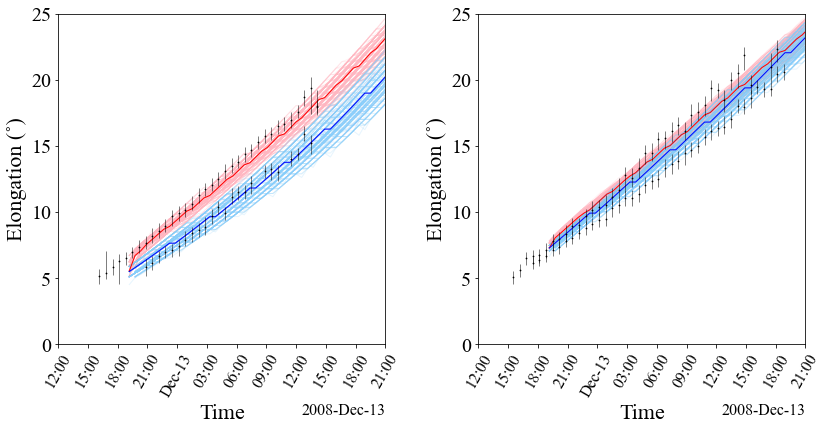

In [50]:
ensemble_elongation_plot_nandf(FOV='HI1', n_ens = 200, save=False, tag='12Dec08_n=200_r=30_ps=1')

* __plot_resdiual_errors( )__
| |

In [46]:
def plot_residual_errors(n_ens=100, plot = True, save=False, tag=''):
    """
    Upon computing the residual errors of the ensemble model runs, this funtion will find the minimum error (i.e. best fit run) for each 
    feature combination and store in HUXt > data file. If plot, a figure of two subplots will show the total residual 
    Params:
    --------
    n_ens: Number of ensemble memebers. Pre-set to 1000
    plot: True or False. Pre-set as True.
    save: True or False. Pre-set as False.
    tag: Tag names of files
    Return:
    --------
    bestfitA/ bestfitB: Dataframe storing the minimum residal error and file argument of the best-fit ensemble run for each feature.
    """
    
    # Compute residual errors of the ensemble run. Return dataframes used here.
    #residuals_sta, residuals_stb = residual_errors(n_ens=n_ens, tag=tag)
    residuals_sta, residuals_stb = ensemble_error(n_ens=n_ens, save=False, tag=tag)
    
    # Find the minimum residuals -  this will identify the best fit ensemble run
    flank_minA_arg = np.argmin(residuals_sta["total flank error"])
    flank_minA = np.min(residuals_sta["total flank error"])
    
    nose_minA_arg = np.argmin(residuals_sta["total nose error"])
    nose_minA = np.min(residuals_sta["total nose error"])

    twofeature_minA_arg = np.argmin(residuals_sta["total two feature error"])
    twofeature_minA = np.min(residuals_sta["total two feature error"])
    
    flank_minB_arg = np.argmin(residuals_stb["total flank error"])
    flank_minB = np.min(residuals_stb["total flank error"])
            
    nose_minB_arg = np.argmin(residuals_stb["total nose error"])
    nose_minB = np.min(residuals_stb["total nose error"])
            
    sec_flank_minB_arg = np.argmin(residuals_stb["total sec flank error"])
    sec_flank_minB = np.min(residuals_stb["total sec flank error"])
        
    twofeature_minB_arg = np.argmin(residuals_stb["total two feature error"])
    twofeature_minB = np.min(residuals_stb["total two feature error"])

#     threefeature_minB_arg = np.argmin(residuals_stb["total 3 feature error"])
#     threefeature_minB = np.min(residuals_stb["total 3 feature error"])
    
    # Save bestfit file runs to a dataframe and save
    global bestfitA, bestfitB
    bestfitA = pd.DataFrame({'Feature':['flank','nose','2 feature'],'Minimum Error':[flank_minA, nose_minA,twofeature_minA],
                            'File arg.':[flank_minA_arg, nose_minA_arg,twofeature_minA_arg]})
                            
    bestfitB = pd.DataFrame({'Feature':['flank','nose','sec flank','2 feature'],
                             'Minimum Error':[flank_minB, nose_minB, sec_flank_minB, twofeature_minB],
                             'File arg.':[flank_minB_arg, nose_minB_arg, sec_flank_minB_arg, twofeature_minB_arg]})
    
    out_path = project_dirs['HUXt_data']
    out_name = tag + '_bestfitA.csv'
    bestfitA.to_csv(os.path.join(out_path, out_name))
    out_name = tag + '_bestfitB.csv'
    bestfitB.to_csv(os.path.join(out_path, out_name))
    
    if plot:
        
        # Make list of x-axis labels.
        xlabels = []
        xlabels.append("deterministic")
        for i in range(n_ens):
            xlabels.append("run {}".format(i))
       
        fig, (axA, axB) = plt.subplots(2,1, figsize = [16,25])
        
        # Format x-axis labels
        plt.setp(axA, xticks=range(n_ens+1), xticklabels=xlabels)
        plt.setp(axB, xticks=range(n_ens+1), xticklabels=xlabels)
        plt.setp(axA.xaxis.get_majorticklabels(), rotation=90)
        plt.setp(axB.xaxis.get_majorticklabels(), rotation=90)

        axA.set_title('STEREO-A')
        axA.set_xlabel('Ensemble run')
        axA.set_ylabel('$Residual^ 2$')
        axA.plot(residuals_sta["total flank error"],'lightcoral', label = "Flank")
        axA.plot(residuals_sta["total nose error"],'deepskyblue', label= "Nose")
        axA.plot(residuals_sta["total two feature error"],'k', label = "Flank & Nose")
#         axA.plot(residuals_sta["total sec flank error"],'limegreen', label= "Secondary Flank")
#         axA.plot(residuals_sta["total 3 feature error"],'k--', label = "Flank & Nose & Sec. Flank")
        
        # Mark best fit run
        axA.plot(flank_minA_arg, flank_minA,'r.', markersize = 10)
        axA.plot(nose_minA_arg , nose_minA,'b.', markersize = 10)
        axA.plot(twofeature_minA_arg, twofeature_minA,'k.', markersize = 10)
        
        axB.set_title('STEREO-B')
        axB.set_xlabel('Ensemble run')
        axB.set_ylabel('$Residual^ 2$')
        axB.plot(residuals_stb["total flank error"],'lightcoral', label = "Flank")
        axB.plot(residuals_stb["total nose error"],'deepskyblue', label= "Nose")
        axB.plot(residuals_stb["total sec flank error"],'limegreen', label= "Secondary Flank")
        axB.plot(residuals_stb["total two feature error"],'k', label = "Flank & Nose")
#         axB.plot(residuals_stb["total 3 feature error"],'k--', label = "Flank & Nose & Sec. Flank")
        
        # Mark best fit run
        axB.plot(flank_minB_arg, flank_minB,'r.', markersize = 10)
        axB.plot(nose_minB_arg, nose_minB,'b.', markersize = 10)
        axB.plot(twofeature_minB_arg, twofeature_minB,'k.', markersize = 10)
        axB.plot(sec_flank_minB_arg, sec_flank_minB,'g.', markersize = 10)
#         axB.plot(threefeature_minB_arg, threefeature_minB,'.', color='orange', markersize = 10)

        axB.legend(loc=[1.1,0.35], frameon=False)
        
        if save:
            filename = "HUXt_{}_residual_plot.png".format(tag)
            filepath = os.path.join(model._figure_dir_, filename)            
            fig.savefig(filepath,dpi=150, bbox_inches='tight')
    
    return 


In [ ]:
# x-axis in order of ensemble runs, therefore not very informative.
plot_residual_errors(n_ens=50, plot = True, save = True, tag='12Dec08_n=50')

* __plot_ensemble_errors( )__
| |

In [47]:
 def plot_ensemble_errors ():
        """
        
        """
        # Load csv files
        # error
        # best-fit

        # Make list of x-axis labels.
        xlabels = []
        xlabels.append("deterministic")
        for i in range(n_ens):
            xlabels.append("run {}".format(i))
       
        fig, (axA, axB) = plt.subplots(2,1, figsize = [16,25])
        
        # Format x-axis labels
        plt.setp(axA, xticks=range(n_ens+1), xticklabels=xlabels)
        plt.setp(axB, xticks=range(n_ens+1), xticklabels=xlabels)
        plt.setp(axA.xaxis.get_majorticklabels(), rotation=90)
        plt.setp(axB.xaxis.get_majorticklabels(), rotation=90)

        axA.set_title('STEREO-A')
        axA.set_xlabel('Ensemble run')
        axA.set_ylabel('$Residual^ 2$')
        axA.plot(residuals_sta["total flank error"],'lightcoral', label = "Flank")
        axA.plot(residuals_sta["total nose error"],'deepskyblue', label= "Nose")
        axA.plot(residuals_sta["total two feature error"],'k', label = "Flank & Nose")
#         axA.plot(residuals_sta["total sec flank error"],'limegreen', label= "Secondary Flank")
#         axA.plot(residuals_sta["total 3 feature error"],'k--', label = "Flank & Nose & Sec. Flank")
        
        # Mark best fit run
        axA.plot(flank_minA_arg, flank_minA,'r.', markersize = 10)
        axA.plot(nose_minA_arg , nose_minA,'b.', markersize = 10)
        axA.plot(twofeature_minA_arg, twofeature_minA,'k.', markersize = 10)
        
        axB.set_title('STEREO-B')
        axB.set_xlabel('Ensemble run')
        axB.set_ylabel('$Residual^ 2$')
        axB.plot(residuals_stb["total flank error"],'lightcoral', label = "Flank")
        axB.plot(residuals_stb["total nose error"],'deepskyblue', label= "Nose")
        axB.plot(residuals_stb["total sec flank error"],'limegreen', label= "Secondary Flank")
        axB.plot(residuals_stb["total two feature error"],'k', label = "Flank & Nose")
#         axB.plot(residuals_stb["total 3 feature error"],'k--', label = "Flank & Nose & Sec. Flank")
        
        # Mark best fit run
        axB.plot(flank_minB_arg, flank_minB,'r.', markersize = 10)
        axB.plot(nose_minB_arg, nose_minB,'b.', markersize = 10)
        axB.plot(twofeature_minB_arg, twofeature_minB,'k.', markersize = 10)
        axB.plot(sec_flank_minB_arg, sec_flank_minB,'g.', markersize = 10)
#         axB.plot(threefeature_minB_arg, threefeature_minB,'.', color='orange', markersize = 10)

        axB.legend(loc=[1.1,0.35], frameon=False)
        
        if save:
            filename = "HUXt_{}_residual_plot.png".format(tag)
            filepath = os.path.join(model._figure_dir_, filename)            
            fig.savefig(filepath,dpi=150, bbox_inches='tight')
    
        return 

* __variable_plots( )__
| |

In [48]:
def variable_plots(variable,n_ens=100, save=False, tag=''):
    """
    Creates a combined dataframe of cme initial parameters and residual errors for every ensemble run (inc. deterministic).
    Then, by sorting the dataframe in acending order by assigned variable, returns a figure displaying this information. 
    Params:
    --------
    variable: the inital variable in which the ensemble model is changing. Must be one of these: "Width", "Longitide", 
                "Latitude", "Speed", or "Thickness"
    n_ens: Number of ensemble members. Pre-set as 100
    save: True or False. Pre-set as False
    tag: Tag name of files. 
    Return:
    --------
    Figure of resdiual error by ascending variable for each STEREO spacecraft.
    """
    
    # Compute a dataframe of inital CME parameters from the ensemble runs (inc. deterministic)
    cme_params = cme_param_df(n_ens=n_ens, tag=tag)
    
    # Compute a dataframe of residuals from the ensemble runs (inc. deterministic)
#     residuals_sta, residuals_stb = residual_errors(n_ens=n_ens, tag=tag)
    ensemble_errorA, ensemble_errorB = ensemble_error(n_ens=n_ens, save=False, tag=tag)
    
    residuals_sta = ensemble_errorA
    residuals_stb = ensemble_errorB 
    # Create dataframe of initial params and residual errors
    global ens_info
    ens_info = pd.DataFrame()
    
    ens_info["Ensemble run"] = cme_params["Ensemble Run"]
    ens_info["Latitude"] = cme_params["Latitude"]
    ens_info["Longitude"] = cme_params["Longitude"]
    ens_info["Speed"] = cme_params["Speed"]
    ens_info["Width"] = cme_params["Width"]
    ens_info["Thickness"] = cme_params["Thickness"]
    #ens_info["Time of Launch"] = cme_params["Time of Launch"]
    
    ens_info["Flank error A"] = residuals_sta['total flank error']
    ens_info["Nose error A"] = residuals_sta['total nose error']
    ens_info["Sec flank error A"] = float('NaN')
#     ens_info["2 feature error A"] = residuals_sta['total 2 feature error']
#     ens_info["3 feature error A"] = float('NaN')
    
    ens_info["Flank error B"] = residuals_stb['total flank error']
    ens_info["Nose error B"] = residuals_stb['total nose error']
    ens_info["Sec flank error B"] = residuals_stb['total sec flank error']
#     ens_info["2 feature error B"] = residuals_stb['total 2 feature error']
#     ens_info["3 feature error B"] = residuals_stb['total 3 feature error']
    
                                                                                        #     Combine dataframes together
                                                                                        #     cme_params['flank error A'] = residuals_sta['total flank error']
                                                                                        #     cme_params['nose error A'] = residuals_sta['total nose error']
                                                                                        #     cme_params['sec flank error A'] = residuals_sta['total sec flank error']
                                                                                        #     cme_params['2 feature error A'] = residuals_sta['total 2 feature error']
                                                                                        #     cme_params['3 feature error A'] = residuals_sta['total 3 feature error']

                                                                                        #     cme_params['flank error B'] = residuals_stb['total flank error']
                                                                                        #     cme_params['nose error B'] = residuals_stb['total nose error']
                                                                                        #     cme_params['sec flank error B'] = residuals_stb['total sec flank error']
                                                                                        #     cme_params['2 feature error B'] = residuals_stb['total 2 feature error']
                                                                                        #     cme_params['3 feature error B'] = residuals_stb['total 3 feature error']
    
    
    # Since init params are stored with a unit attached, here we make the column unitless so that 
    # the variable can be sorted in ascending order. Also create x label for plots.
    if variable == 'Width':
        xlabel = 'Width ($˚$)'
        unit = u.deg
        for i in range(len(ens_info)):
            ens_info['Width'][i] = ens_info['Width'][i] / unit
    
    elif variable == "Latitude":
        xlabel = 'Latitude (˚)'
        unit = u.rad
        for i in range(len(ens_info)):
            ens_info['Latitude'][i] = ens_info['Latitude'][i] / unit 
    
    elif variable == "Longitude":
        xlabel = 'Longitude(˚)'
        unit = u.rad
        for i in range(len(ens_info)):
            # making - longitude angles be below 0 for plotting
            if ens_info['Longitude'][i] > 180*u.deg:
                ens_info['Longitude'][i] = ens_info['Longitude'][i]-360*u.deg
            ens_info['Longitude'][i] = ens_info['Longitude'][i] / unit
   
    elif variable == "Speed":
        xlabel = 'Speed ($kms^{-1}$)'
        unit = u.km/u.s
        for i in range(len(ens_info)):
            ens_info['Speed'][i] = ens_info['Speed'][i] / unit
    
    elif variable == "Thickness":
        xlabel = 'Thickness (solRad)'
        unit = u.solRad
        for i in range(len(ens_info)):
            ens_info['Thickness'][i] = ens_info['Thickness'][i] / unit
    
    # Sort dataframe so variable plotting will be in ascending order
    global sorted_df
    sorted_df =  ens_info.sort_values(by=variable)
   

    # Plot figure
    fig, (axA, axB) = plt.subplots(2, 1, figsize = [18,12])

    axA.set_title('STEREO-A')
    axA.set_xlabel(xlabel)
    axA.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    axA.set_ylabel('$Residual^ 2$')
    axA.plot(sorted_df[variable],sorted_df['Flank error A'], 'lightcoral')
    axA.plot(sorted_df[variable],sorted_df['Nose error A'], 'deepskyblue')
#     axA.plot(sorted_df[variable],sorted_df['2 feature error A'], 'k')
    
    axB.set_title('STEREO-B')
    axB.set_xlabel(xlabel)
    axB.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    axB.set_ylabel('$Residual^ 2$')
    axB.plot(sorted_df[variable],sorted_df['Flank error B'], 'lightcoral', label='Flank')
    axB.plot(sorted_df[variable],sorted_df['Nose error B'], 'deepskyblue', label='Nose')
    axB.plot(sorted_df[variable],sorted_df['Sec flank error B'], 'limegreen', label='Secondary Flank')
#     axB.plot(sorted_df[variable],sorted_df['2 feature error B'], 'k', label = 'Flank & Nose')
#     axB.plot(sorted_df[variable],sorted_df['3 feature error B'], 'orange', label = 'All Features')
    
    axB.legend(loc=[1.1,0.35], frameon=False)
    fig.tight_layout()
    
    if save:
        filename = "HUXt_{}_variable_sensitivity_{}.png".format( tag, variable)
        filepath = os.path.join(model._figure_dir_, filename)            
        fig.savefig(filepath, dpi=150, bbox_inches='tight')
        
    
    return
    
    



* __elongation_time_plot( )__
| |

In [49]:
def elongation_time_plot(profile,FOV,save=False, tag=''):
    """
    Plot elongation-time profiles from STEREO POV, inc HI observations.
    Paramaters
    FOV: either 'HI1' or 'HI2'
    save: if Ture, figure is saved to files
    tag: tag for file names
    
    Return:
    A 2x1 plot of the elongation-time profile for all the features from the viewpoint of 1) STEREO-A and 2) STEREO-B
    """
   
    
    # Find plotting limits
    # HI-1: maximum elongation of 25˚
    if FOV == 'HI1':
        ymax = 25.0
        for i in range(len(sta_profile)):
            if profile.el_n_a[i] < 30:
                FOVlimit_a = i
            if profile.el_n_b[i] < 30:
                FOVlimit_b = i

    # HI-2: maximum elongation of ?˚
    elif FOV == 'HI2':
        ymax = np.max(profile.el_f_a)
        FOVlimit_a = len(profile)
        FOVlimit_b = len(profile)
        
    else:
        print ("Field of view is not valid. Please use HI1 or HI2.")
    # this may need a try command.    

    # Format time  -  Here I am using the output from the model.getobserver() command. Would be simplier if I used sta_profile.time
                                                                        #     time_a = sta.time.to_value('datetime')[0:FOVlimit_a]
                                                                        #     time_b = stb.time.to_value('datetime')[0:FOVlimit_b]
    time_a = Time(profile.time, format = 'jd').datetime[0:FOVlimit_a]
    time_b = Time(profile.time, format = 'jd').datetime[0:FOVlimit_b]


    plt.rcParams.update({'font.size': 22, 'axes.labelsize':20, 'legend.fontsize':20,'xtick.labelsize': 16.0,'ytick.labelsize': 20.0,})

    # Plot figure
    fig, ax = plt.subplots(1, 2, figsize = [18,12])
    
    for nn, axs in enumerate(ax):
        locator = mdates.AutoDateLocator(minticks=12, maxticks=12)
        formatter = mdates.ConciseDateFormatter(locator)
        axs.xaxis.set_major_locator(locator)
        axs.xaxis.set_major_formatter(formatter)
    
    #ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%y %H:%M'))
    ax[0].set_title('STEREO-A')
    ax[0].set_xlabel('Time', labelpad=30)
    ax[0].set_ylabel('Elongation (˚)')
    ax[0].set_ylim(top=ymax)                                 

    ax[0].errorbar(HItimeA,front1a['el'],yerr=(front1a['el_lo_error'], front1a['el_hi_error']),
                fmt='.',color='pink', label='HI-1 front 1')
    ax[0].errorbar(HItimeA,front2a['el'],yerr=(front2a['el_lo_error'], front2a['el_hi_error']),
                fmt='.',color='skyblue', label='HI-1 front 2')
    #axA.errorbar(HItimeA,front3a['el'],yerr=(front3a['el_lo_error'], front3a['el_hi_error']),
    #             fmt='.',color='lightgreen', label='HI-1 front 3')
    ax[0].plot(time_a, profile.el_f_a[0:FOVlimit_a],'k', label='Initial Flank')
    ax[0].plot(time_a, profile.el_n_a[0:FOVlimit_a], 'k--', label='Nose')
    # axA.plot(time_a, sta_profile.el_sec_flank[0:FOVlimit_a], 'darkgrey', label='Secondary Flank')
#     ax[0].plot(HItimeA,interp_elA[0:FOVlimit_a],'k.')
#     ax[0].plot(HItimeA,interp_el_nA[0:FOVlimit_a],'k.')
    #axA.plot(HItimeA,interp_el_sec_flankaA,'.',color='darkgrey')
    
    #ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%y %H:%M'))
    ax[1].set_title('STEREO-B')
    ax[1].set_xlabel('Time', labelpad=30)
    ax[1].set_ylabel('Elongation (˚)')
    ax[1].set_ylim(top=ymax)                                 

    ax[1].errorbar(HItimeB,front1b['el'],yerr=(front1b['el_lo_error'], front1b['el_hi_error']),
                 fmt='.',color='pink', label='HI-1 front 1 (OUTER)')
    ax[1].errorbar(HItimeB,front2b['el'],yerr=(front2b['el_lo_error'], front2b['el_hi_error']),
                 fmt='.',color='skyblue', label='HI-1 front 2 (INNER)')
    ax[1].errorbar(HItimeB,front3b['el'],yerr=(front3b['el_lo_error'], front3b['el_hi_error']),
                 fmt='.',color='lightgreen', label='HI-1 front 3')
    ax[1].plot(time_b, profile.el_f_b[0:FOVlimit_b], 'k', label='Initial Flank')
    ax[1].plot(time_b,profile.el_n_b[0:FOVlimit_b], 'k--', label='Nose')
    ax[1].plot(time_b, profile.el_secf_b[0:FOVlimit_b], 'darkgrey', label='Secondary Flank')
#     ax[1].plot(HItimeB,interp_elB,'k.')
#     ax[1].plot(HItimeB,interp_el_nB,'k.')
#     ax[1].plot(HItimeB,interp_el_sec_flankB,'.',color='darkgrey')
    plt.setp( ax[0].xaxis.get_majorticklabels(), rotation=60 ) 
    plt.setp( ax[1].xaxis.get_majorticklabels(), rotation=60 )   
    #axB.legend(loc='best', bbox_to_anchor=[1.6,0.5])
    ax[1].legend(loc=[1.1,0.35], frameon=False)
    fig.tight_layout()

    if save:
        cr_num = np.int32(model.cr_num.value)
        filename = "HUXt_CR{:03d}_{}_{}_elongation_profile.png".format(cr_num, tag, FOV)
        filepath = os.path.join(model._figure_dir_, filename)            
        fig.savefig(filepath)
        
    return


* __plot_bestfit_runs( )__
| |

In [50]:
def plot_bestfit_runs(tag):    
    """
    
    """
    # Load in best-fit dataframe
    A, B, MISC = locate_bestfit_run(tag=tag)
    
    # Store file arguements in list
    arg_list = A['File arg.'].to_list()+ B['File arg.'].to_list()+ MISC['File arg.'][0].to_list
    
    # make list of tag names
    tag_list = ['flankA','noseA','n&fA','flankB','noseB','sec_flankB','n&fB', 'n&f_both']
    
    if len(arg_list)!=len(tag_list):
        print ("Length of tag name list doesn't equal the length of file arugements. Error may occur due to limited conditions met in function.")
    
    project_dirs = H._setup_dirs_()
    for index, arg in enumerate(arg_list):
        if arg == 'deterministic':
            path = os.path.join(project_dirs['HUXt_data'], "HUXt_CR{}_{}_deterministic.hdf5".format(cr_num,tag)) 
        else:
            path = os.path.join(project_dirs['HUXt_data'], "HUXt_CR{}_{}_ensemble_{}*.hdf5".format(cr_num,tag,arg-1))
        ensemble_run = glob.glob(path)[0]
        model, cme_list = H.load_HUXt_run(ensemble_run)
        model.animate('cme',tag_list[index])
        cme = cme_list[0]
        hxt_sta, hxt_stb = huxt_t_e_profile_fast(cme)
        elongation_plot('HI1',save=True, tag =tag_list[index])
        
    return
    

In [52]:
# Analysis of the arrival_info dataframe. Doesn't include deterministic run.
# ensemble runs used the cme name of "cme1" to do further calculations. This is to keep the name "cme" for the deterministic run.
arrival_info = load_csv_file("arrival information", tag='12Dec08_n=200_r=30_PS=1')

if len(arrival_info) == 200:         # Where 50 corresponds the the number of ensemble runs. Change this to N in the future.
    # Add deterministic arrival information 
    arrival_info = arrival_info.append({"Transit Time" : cme.earth_transit_time.value, 
                                        "Arrival Time" : cme.earth_arrival_time.jd,
                                        "Arrival Speed" : cme.earth_arrival_speed.value}, ignore_index=True)

# ------------------------ 
#arrival_info
display(arrival_info.describe())

print("MEAN")
e = arrival_info['Arrival Time'].mean()
f = Time(e, format='jd')
print(f.iso, '\n')

print("MEAN + 1SD")
print(arrival_info.mean() + arrival_info.std())
c = arrival_info['Arrival Time'].mean() + arrival_info['Arrival Time'].std()
d = Time(c, format='jd')
print(d.iso, '\n')

print("MEAN - 1SD")
print(arrival_info.mean() - arrival_info.std())
a = arrival_info['Arrival Time'].mean() - arrival_info['Arrival Time'].std()
b = Time(a, format='jd')
print(b.iso)


# arrival_info.boxplot(column=["Arrival Speed"])


,Arrival Speed,Arrival Speed Error (km/s),Arrival Time,Arrival Time Error (seconds),Transit Time
count,201.000000,201.000000,2.010000e+02,201.000000,201.000000
mean,363.666409,30.236409,2.454817e+06,4932.484325,3.550220
std,21.905532,21.905532,1.004761e-01,8681.136546,0.100476
min,338.409800,4.979800,2.454817e+06,-11519.440743,3.359804
25%,345.953727,12.523727,2.454817e+06,-1083.940743,3.480585
50%,354.492905,21.062905,2.454817e+06,3612.034257,3.534937
75%,379.622640,46.192640,2.454817e+06,11618.828494,3.627608
max,424.611855,91.181855,2.454817e+06,32831.434257,3.873124


MEAN
2008-12-16 08:22:12.484 

MEAN + 1SD
Arrival Speed                   3.855719e+02
Arrival Speed Error (km/s)      5.214194e+01
Arrival Time                    2.454817e+06
Arrival Time Error (seconds)    1.361362e+04
Transit Time                    3.650696e+00
dtype: float64
2008-12-16 10:46:53.621 

MEAN - 1SD
Arrival Speed                   3.417609e+02
Arrival Speed Error (km/s)      8.330877e+00
Arrival Time                    2.454817e+06
Arrival Time Error (seconds)   -3.748652e+03
Transit Time                    3.449744e+00
dtype: float64
2008-12-16 05:57:31.348


***
***
## Runs ##

__Set-up ensemble__

In [36]:
TAG = "12Dec08_n=200_r=30_PS=1_HelioMAS"
# TAG = "test_n=10_8"


# CME deterministic conditions
t_launch = 0.0 * u.day
longitude = 10.0 * u.deg
latitude = 9.0 * u.deg
width = 42 *u .deg
v = 497 * (u.km/u.s)                # 8rs = 600      # 30rs = 497
thickness = 5 * u.solRad             # 8rs = 16.9     # 30rs = 5

# HUXt conditions
v_boundary = np.flip([2.361374481276616564e+02, 2.240716540668226173e+02, 2.376358249750887524e+02, 2.672482825902510513e+02, 3.096930808344839647e+02, 3.746892075320072308e+02, 4.268668006326229829e+02, 4.456230409562588761e+02, 4.325098393596861115e+02, 3.923976427092088670e+02, 4.160318741275664820e+02, 5.042482225194921739e+02, 5.947393810828092455e+02, 6.654072046028741170e+02, 6.917310550116643526e+02, 6.800427872609535598e+02, 6.219320569550533264e+02, 5.444059259203741021e+02, 5.043734613245545120e+02, 4.865263506790949464e+02, 4.849001221974726263e+02, 5.045156599835149223e+02, 5.157868414718000167e+02, 5.115173862842027006e+02, 4.783484024373857437e+02, 4.105433314643044014e+02, 3.252113536761797832e+02, 2.718381068427589753e+02, 2.611473445493025451e+02, 2.703445822983272251e+02, 2.879318070637758638e+02, 2.935649302292242169e+02, 2.913420114766625488e+02, 2.875243364183726271e+02, 2.758837083349550880e+02, 2.646586033040824191e+02, 2.620296606197267693e+02, 2.587181867060620561e+02, 2.583143812807093127e+02, 2.711622648112132197e+02, 2.895073025814325547e+02, 3.236093677154411807e+02, 3.602300486613148678e+02, 3.901021949691497639e+02, 4.000613537591571003e+02, 3.943689844061491954e+02, 3.953941447719399775e+02, 4.148021072583192677e+02, 4.417805902433387359e+02, 4.475472602689640098e+02, 4.214612344162281943e+02, 3.691015029453656098e+02, 3.122498162083122111e+02, 3.076938832484911472e+02, 3.321704537666684587e+02, 3.237507334340671150e+02, 3.621217972086897703e+02, 4.086377362649376437e+02, 4.435046064447465142e+02, 4.674792239491621331e+02, 4.799666692694719927e+02, 4.660162447073083172e+02, 4.706506215244046416e+02, 5.282817264033329820e+02, 5.824612174466126362e+02, 5.781493288632007079e+02, 5.519533093062667604e+02, 5.210893551054840600e+02, 4.711116992875964797e+02, 4.139039864812964993e+02, 3.685148444664304748e+02, 3.251115004054694282e+02, 2.944497484406588228e+02, 3.031728641854660964e+02, 3.017908650651369271e+02, 2.743621772706765114e+02, 2.753093603743015478e+02, 3.077932819486480867e+02, 3.142715901784403059e+02, 3.064569671412821776e+02, 2.972113560702332506e+02, 2.853275333911390703e+02, 2.781041597484824592e+02, 2.829676208301811471e+02, 2.874501592038274111e+02, 2.966814584993215362e+02, 3.135194107222907860e+02, 3.460091136549031603e+02, 3.814157744293487440e+02, 3.956749772192871433e+02, 3.684143935201673230e+02, 3.216986131456232556e+02, 2.792803446540552841e+02, 2.460060315632212564e+02, 2.535853141438094838e+02, 2.757920731764543234e+02, 2.940431313281729899e+02, 2.966822515328578334e+02, 2.954926028486351584e+02, 2.964600448988716721e+02, 2.986598892164937524e+02, 2.920602210256048465e+02, 2.862971285267943813e+02, 2.868135105926763799e+02, 2.948319974536670998e+02, 3.041351166652279971e+02, 2.854976713451857790e+02, 2.751327922228102238e+02, 2.699486953595605314e+02, 2.530033160147730484e+02, 2.300846477066176874e+02, 2.160876697185309183e+02, 2.211210117332515495e+02, 2.552383171466590284e+02, 3.045731933828458864e+02, 3.142951676630700035e+02, 2.933001971616943706e+02, 2.724793215158809971e+02, 2.577975418023809198e+02, 2.419712959689771878e+02, 2.507924724446661173e+02, 2.696897715708585679e+02, 2.776005233833919306e+02, 2.774424641305166119e+02, 2.763144001268291845e+02, 2.773574489888984544e+02, 2.629291468608762443e+02, 2.292533503180667935e+02], axis=0)* (u.km/u.s)
# v_boundary = np.flip(tomoboundary, axis=0) * (u.km/u.s)
cr_num = 2077
cr_lon_init = 63.363  * u.deg       # 8rs = 67.966     # 30rs = 63.363
simtime = 6 * u.day
dt_scale = 4                                                                        # This shouldn't need changing frequently
inner_boundary_r = 30 * u.solRad

# Ensemble info
N = 200

lon_spread = 4 * u.deg
lat_spread = 2 * u.deg
width_spread = 6 * u.deg   
v_spread = 63 * model.kms          # 8rs = 150      # 30rs = 63
thickness_spread = 2 * u.solRad
r_init_spread = 0 * u.solRad

# lon_spread = 8 * u.deg
# lat_spread = 4 * u.deg
# width_spread = 12 * u.deg
# v_spread = 200 * model.kms
# thickness_spread = 4 * u.solRad
# r_init_spread = 0 * u.solRad

__Run Ensemble & Track Features__

In [37]:
# Run the model and track the CME features  -- NEW
#--------------------------------------------
# run_huxt_ensemble_new(v_boundary,cr_num, cr_lon_init, n_ensemble=N, 
#                       longitude=longitude, latitude=latitude, width=width, v=v, thickness=thickness, t_launch=t_launch, r_inner=inner_boundary_r,
#                       lon_spread = lon_spread, lat_spread = lat_spread, width_spread = width_spread, v_spread = v_spread, thickness_spread = thickness_spread,
#                       map_inwards=False,  variable_test = False, event=TAG)
# track_cme_flanks(fast=True, tag=TAG)
ensemble_cme_dataframes(n_ens = N, fast=True, tag=TAG)

Now processing: ensemble_cme_dataframes(...)
deterministic
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
Finished processing: ensemble_cme_dataframes(...)


__Analyse data__

In [77]:
# Analyse data 
#---------------
# Plot ensemble elongation profiles
feature_list = ['initial flank', 'nose', 'secondary flank']
for i in range(3):
    ensemble_elongation_plot('HI1',feature_list[i], n_ens = N, save=False, tag=TAG)
                                                                                   

best_fit_runs(inner_boundary_r, ETplot=False, animate=False, tracking=False, tag=TAG)

UnboundLocalError: local variable 'FOVlimit_a' referenced before assignment

In [372]:
compute_earth_arrival(cme, print_values=True, plot=False)

Model inital time:  2008-12-12 19:09:53.490
Leading edge transit time: 3.7221 d
Leading edge arrival time at Earth: 2008-12-16 12:29:47.059
Leading edge arrival speed at Earth: 328.074 km / s


In [351]:
def best_fit_runs(ETplot=True, animate=True, tracking=True, tag=''):
    """
    
    Return
    ------
    Displays of the minimum error for each feature as seen from each spacecraft, and the elongation-time profile and animation for each feature (if true)
    
    """
    # Load dataframes
    a, b = locate_bestfit_run(tag=tag)
    cme_init_params = load_csv_file(file = "initial parameters", tag=tag)
    
    # Display the minimum error for each feature
    a.columns.name = "Best Fit Run STEREO-A"
    b.columns.name = "Best Fit Run STEREO-B"
    display(a,b)
    
    # create dataframe for the best fit initial parameters 
    bf_cme_param = pd.DataFrame()
    
    project_dirs = H._setup_dirs_()
    
    # Loop through STEREO-A minimised runs 
    feature = ["Flank","Nose","N&F"]
    
    for i,arg in enumerate(a['File arg.']):
        t = tag+feature[i]+'A'          # Tag name 
        
        # Add the slice of cme parameters to the df 
        bf_cme_param = bf_cme_param.append(cme_init_params[arg:arg+1])

        # load .hdf5 file for the model run
        if arg == 0:
            path = os.path.join(project_dirs['HUXt_data'], "HUXt_CR2077_{}_deterministic.hdf5".format(tag))
        else:
            path = os.path.join(project_dirs['HUXt_data'], "HUXt_CR2077_{}_ensemble_{:02d}.hdf5".format(tag,arg-1))
        file = glob.glob(path)
        print(file)
        model, cme_list = H.load_HUXt_run(file[0])
        cme = cme_list[0]
        
        if ETplot==True:
            # run the elongation-time plot function
            elongation_plot(cme, 'HI1',save=True, tag=t)
            
        if animate == True:
            # run the animation function 
            if tracking == True:
                animate_schematic(cme=cme, model=model, tag=t)
            else:
                model.animate('cme',tag=t)
            

    # Loop through STEREO-B minimised runs 
    feature = ["Flank","Nose","S.Flank","N&F"]

    for i,arg in enumerate(b['File arg.']):
        t = tag+feature[i]+'B'

        bf_cme_param = bf_cme_param.append(cme_init_params[arg:arg+1])
        
        # load .hdf5 file for the model run
        if arg == 0:
            path = os.path.join(project_dirs['HUXt_data'], "HUXt_CR2077_{}_deterministic.hdf5".format(tag))
        else:
            path = os.path.join(project_dirs['HUXt_data'], "HUXt_CR2077_{}_ensemble_{:02d}.hdf5".format(tag,arg-1))
        file = glob.glob(path)
        print(file)
        model, cme_list = H.load_HUXt_run(file[0])
        cme = cme_list[0]
        
        if ETplot==True:
            # run the elongation-time plot function
            elongation_plot(cme, 'HI1',save=True, tag=t)
            
        if animate == True:
            # run the animation function 
            if tracking == True:
                animate_schematic(cme=cme, model=model, tag=t)
            else:
                model.animate('cme',tag=t)
     
    bf_cme_param['Feature'] = ["Flank A","Nose A", "N&F A", "Flank B","Nose B", "Sec. Flank B", "N&F B"]
    display (bf_cme_param)
    return

In [ ]:
plot_bestfit_runs(tag="12Dec08_n=200_r=30")

In [ ]:
# Set-up ensemble run
#------------------------
TAG = '12Dec08_n=200'
N = 200

# Run the model and track the CME features
#--------------------------------------------
# run_huxt_ensemble(v_boundary, n_ensemble=N, variable_test = False, event=TAG)
# track_cme_flanks(fast=True, tag=TAG)


# # Plots
# #-----------
# ensemble_elongation_plot(FOV = 'HI1',feature = "initial flank", n_ens = N, save=True, tag=TAG)
# ensemble_elongation_plot(FOV = 'HI1',feature = "nose", n_ens = N, save=True, tag=TAG)
# ensemble_elongation_plot(FOV = 'HI1',feature = "secondary flank", n_ens = N, save=True, tag=TAG)
#                                                                                                                     # plot_residual_errors(n_ens=N, plot = True, save = True, tag=TAG)
#                                                                                                                     #residuals_sta, residuals_stb = ensemble_error(n_ens=N, save=False, tag=TAG)

# Analyse data 
#---------------
# Analysing for cme initial parameters, error values, and arrival information
#ensemble_cme_dataframes(n_ens = N, fast=True, tag=TAG)

# Load dataframes
ens_profilesA, ens_profilesB = load_csv_file(file = "elongation profiles", tag=TAG)
ens_errorA, ens_errorB = load_csv_file(file = "errors", tag=TAG)
cme_init_params = load_csv_file(file = "initial parameters", tag=TAG)
arrival_info = load_csv_file(file = "arrival information", tag=TAG)

# Show lowest error Nose run from ST-A and ST-B
display(ens_errorA.sort_values(by="RMSE nose error")[0:2], ens_errorB.sort_values(by="RMSE nose error")[0:2])

# Find best fit run and error values for ecah feature from ST-A and ST-B
a, b = locate_bestfit_run(tag=TAG)
a.columns.name = "Best Fit Run STEREO-A"
b.columns.name = "Best Fit Run STEREO-B"
display(a,b)

In [ ]:
for i in range(len(a)):
    run_arg = a['File arg.'][i]
    if i ==0:
        df1 = cme_init_params[run_arg:run_arg+1]  
    else:
        df1 = df1.append(cme_init_params[run_arg:run_arg+1])
df1.columns.name = "ST-A"
display(df1)

for i in range(len(b)):
    run_arg = b['File arg.'][i]
    if i ==0:
        df2 = cme_init_params[run_arg:run_arg+1]
    else:
        df2 = df2.append(cme_init_params[run_arg:run_arg+1])
df2.columns.name = "ST-B"
display(df2)

In [ ]:
#arrival_info
display(arrival_info.describe())

print("MEAN")
e = arrival_info['Arrival Time'].mean()
f = Time(e, format='jd')
print(f.iso, '\n')

print("MEAN + 1SD")
print(arrival_info.mean() + arrival_info.std())
c = arrival_info['Arrival Time'].mean() + arrival_info['Arrival Time'].std()
d = Time(c, format='jd')
print(d.iso, '\n')

print("MEAN - 1SD")
print(arrival_info.mean() - arrival_info.std())
a = arrival_info['Arrival Time'].mean() - arrival_info['Arrival Time'].std()
b = Time(a, format='jd')
print(b.iso)



#### Inner boundary: 8Rs #### 

In [ ]:
# Set-up ensemble run
#------------------------
# Variables
TAG = "12Dec08_n=20_r=8"

# CME deterministic conditions
t_launch = 0.0 * u.day
longitude = 7.435475 * u.deg
latitude = 8.350908 * u.deg
width = 48.766004 *u .deg
v = 475.851399* (u.km/u.s)
thickness = 6.755402 * u.solRad
r_inner=8*u.solRad

# HUXt conditions
v_boundary = np.flip([.361374481276616564e+02, 2.240716540668226173e+02, 2.376358249750887524e+02, 2.672482825902510513e+02, 3.096930808344839647e+02, 3.746892075320072308e+02, 4.268668006326229829e+02, 4.456230409562588761e+02, 4.325098393596861115e+02, 3.923976427092088670e+02, 4.160318741275664820e+02, 5.042482225194921739e+02, 5.947393810828092455e+02, 6.654072046028741170e+02, 6.917310550116643526e+02, 6.800427872609535598e+02, 6.219320569550533264e+02, 5.444059259203741021e+02, 5.043734613245545120e+02, 4.865263506790949464e+02, 4.849001221974726263e+02, 5.045156599835149223e+02, 5.157868414718000167e+02, 5.115173862842027006e+02, 4.783484024373857437e+02, 4.105433314643044014e+02, 3.252113536761797832e+02, 2.718381068427589753e+02, 2.611473445493025451e+02, 2.703445822983272251e+02, 2.879318070637758638e+02, 2.935649302292242169e+02, 2.913420114766625488e+02, 2.875243364183726271e+02, 2.758837083349550880e+02, 2.646586033040824191e+02, 2.620296606197267693e+02, 2.587181867060620561e+02, 2.583143812807093127e+02, 2.711622648112132197e+02, 2.895073025814325547e+02, 3.236093677154411807e+02, 3.602300486613148678e+02, 3.901021949691497639e+02, 4.000613537591571003e+02, 3.943689844061491954e+02, 3.953941447719399775e+02, 4.148021072583192677e+02, 4.417805902433387359e+02, 4.475472602689640098e+02, 4.214612344162281943e+02, 3.691015029453656098e+02, 3.122498162083122111e+02, 3.076938832484911472e+02, 3.321704537666684587e+02, 3.237507334340671150e+02, 3.621217972086897703e+02, 4.086377362649376437e+02, 4.435046064447465142e+02, 4.674792239491621331e+02, 4.799666692694719927e+02, 4.660162447073083172e+02, 4.706506215244046416e+02, 5.282817264033329820e+02, 5.824612174466126362e+02, 5.781493288632007079e+02, 5.519533093062667604e+02, 5.210893551054840600e+02, 4.711116992875964797e+02, 4.139039864812964993e+02, 3.685148444664304748e+02, 3.251115004054694282e+02, 2.944497484406588228e+02, 3.031728641854660964e+02, 3.017908650651369271e+02, 2.743621772706765114e+02, 2.753093603743015478e+02, 3.077932819486480867e+02, 3.142715901784403059e+02, 3.064569671412821776e+02, 2.972113560702332506e+02, 2.853275333911390703e+02, 2.781041597484824592e+02, 2.829676208301811471e+02, 2.874501592038274111e+02, 2.966814584993215362e+02, 3.135194107222907860e+02, 3.460091136549031603e+02, 3.814157744293487440e+02, 3.956749772192871433e+02, 3.684143935201673230e+02, 3.216986131456232556e+02, 2.792803446540552841e+02, 2.460060315632212564e+02, 2.535853141438094838e+02, 2.757920731764543234e+02, 2.940431313281729899e+02, 2.966822515328578334e+02, 2.954926028486351584e+02, 2.964600448988716721e+02, 2.986598892164937524e+02, 2.920602210256048465e+02, 2.862971285267943813e+02, 2.868135105926763799e+02, 2.948319974536670998e+02, 3.041351166652279971e+02, 2.854976713451857790e+02, 2.751327922228102238e+02, 2.699486953595605314e+02, 2.530033160147730484e+02, 2.300846477066176874e+02, 2.160876697185309183e+02, 2.211210117332515495e+02, 2.552383171466590284e+02, 3.045731933828458864e+02, 3.142951676630700035e+02, 2.933001971616943706e+02, 2.724793215158809971e+02, 2.577975418023809198e+02, 2.419712959689771878e+02, 2.507924724446661173e+02, 2.696897715708585679e+02, 2.776005233833919306e+02, 2.774424641305166119e+02, 2.763144001268291845e+02, 2.773574489888984544e+02, 2.629291468608762443e+02, 2.292533503180667935e+02], axis=0)* (u.km/u.s)
cr_num = 2077
cr_lon_init = 63.363 * u.deg     # 67.966
simtime = 6 * u.day
dt_scale = 4                             # This shouldn't need changing frequently
r_innerbound = 30*u.solRad

# Ensemble info
N = 20

# Run deterministic
#--------------------
cme = H.ConeCME(t_launch=t_launch, longitude=longitude, latitude=latitude, width=width, v=v, thickness=thickness, initial_height = r_inner)
cme_list = [cme]
# v_inner = H.map_v_boundary_inwards(v_boundary, 30*u.solRad, 8*u.solRad)
model = H.HUXt(v_boundary, cr_num=cr_num, cr_lon_init=cr_lon_init, simtime=simtime, dt_scale=4,r_min=r_innerbound)
model.solve(cme_list, save=True, tag=TAG)
model.plot(2*u.d, field='cme', save=False, tag=TAG)
# model.animate('cme',tag=TAG)
#animate_schematic(model, cme, tag=TAG) 
# sta_profile, stb_profile = huxt_t_e_profile_fast(cme)
elongation_plot(cme, 'HI1',save=False, tag=TAG)
errorA, errorB = deterministic_error(cme, print_RMSE=True, plot=True, save=False)
#earth = model.get_observer('earth')


In [ ]:
# Set-up ensemble run
#------------------------
# Variables
TAG = "12Dec08_n=20_r=8"

# CME deterministic conditions
t_launch = 0.0 * u.day
longitude = 10.0 * u.deg
latitude = 0.0 * u.deg
width = 46 *u .deg
v = 600 * (u.km/u.s)
thickness = 5 * u.solRad

# HUXt conditions
v_boundary = np.flip([.361374481276616564e+02, 2.240716540668226173e+02, 2.376358249750887524e+02, 2.672482825902510513e+02, 3.096930808344839647e+02, 3.746892075320072308e+02, 4.268668006326229829e+02, 4.456230409562588761e+02, 4.325098393596861115e+02, 3.923976427092088670e+02, 4.160318741275664820e+02, 5.042482225194921739e+02, 5.947393810828092455e+02, 6.654072046028741170e+02, 6.917310550116643526e+02, 6.800427872609535598e+02, 6.219320569550533264e+02, 5.444059259203741021e+02, 5.043734613245545120e+02, 4.865263506790949464e+02, 4.849001221974726263e+02, 5.045156599835149223e+02, 5.157868414718000167e+02, 5.115173862842027006e+02, 4.783484024373857437e+02, 4.105433314643044014e+02, 3.252113536761797832e+02, 2.718381068427589753e+02, 2.611473445493025451e+02, 2.703445822983272251e+02, 2.879318070637758638e+02, 2.935649302292242169e+02, 2.913420114766625488e+02, 2.875243364183726271e+02, 2.758837083349550880e+02, 2.646586033040824191e+02, 2.620296606197267693e+02, 2.587181867060620561e+02, 2.583143812807093127e+02, 2.711622648112132197e+02, 2.895073025814325547e+02, 3.236093677154411807e+02, 3.602300486613148678e+02, 3.901021949691497639e+02, 4.000613537591571003e+02, 3.943689844061491954e+02, 3.953941447719399775e+02, 4.148021072583192677e+02, 4.417805902433387359e+02, 4.475472602689640098e+02, 4.214612344162281943e+02, 3.691015029453656098e+02, 3.122498162083122111e+02, 3.076938832484911472e+02, 3.321704537666684587e+02, 3.237507334340671150e+02, 3.621217972086897703e+02, 4.086377362649376437e+02, 4.435046064447465142e+02, 4.674792239491621331e+02, 4.799666692694719927e+02, 4.660162447073083172e+02, 4.706506215244046416e+02, 5.282817264033329820e+02, 5.824612174466126362e+02, 5.781493288632007079e+02, 5.519533093062667604e+02, 5.210893551054840600e+02, 4.711116992875964797e+02, 4.139039864812964993e+02, 3.685148444664304748e+02, 3.251115004054694282e+02, 2.944497484406588228e+02, 3.031728641854660964e+02, 3.017908650651369271e+02, 2.743621772706765114e+02, 2.753093603743015478e+02, 3.077932819486480867e+02, 3.142715901784403059e+02, 3.064569671412821776e+02, 2.972113560702332506e+02, 2.853275333911390703e+02, 2.781041597484824592e+02, 2.829676208301811471e+02, 2.874501592038274111e+02, 2.966814584993215362e+02, 3.135194107222907860e+02, 3.460091136549031603e+02, 3.814157744293487440e+02, 3.956749772192871433e+02, 3.684143935201673230e+02, 3.216986131456232556e+02, 2.792803446540552841e+02, 2.460060315632212564e+02, 2.535853141438094838e+02, 2.757920731764543234e+02, 2.940431313281729899e+02, 2.966822515328578334e+02, 2.954926028486351584e+02, 2.964600448988716721e+02, 2.986598892164937524e+02, 2.920602210256048465e+02, 2.862971285267943813e+02, 2.868135105926763799e+02, 2.948319974536670998e+02, 3.041351166652279971e+02, 2.854976713451857790e+02, 2.751327922228102238e+02, 2.699486953595605314e+02, 2.530033160147730484e+02, 2.300846477066176874e+02, 2.160876697185309183e+02, 2.211210117332515495e+02, 2.552383171466590284e+02, 3.045731933828458864e+02, 3.142951676630700035e+02, 2.933001971616943706e+02, 2.724793215158809971e+02, 2.577975418023809198e+02, 2.419712959689771878e+02, 2.507924724446661173e+02, 2.696897715708585679e+02, 2.776005233833919306e+02, 2.774424641305166119e+02, 2.763144001268291845e+02, 2.773574489888984544e+02, 2.629291468608762443e+02, 2.292533503180667935e+02], axis=0)* (u.km/u.s)
cr_num = 2077
cr_lon_init = 67.966 * u.deg 
simtime = 6 * u.day
dt_scale = 4                             # This shouldn't need changing frequently
r_innerbound = 8*u.solRad

# Ensemble info
N = 200


# Run the model and track the CME features
#--------------------------------------------
run_huxt_ensemble_new(v_boundary, n_ensemble=N, longitude=longitude, latitude=latitude, width=width, v=v, thickness=thickness, t_launch=t_launch, 
#                       map_inwards=True, r_outer=30*u.solRad, r_inner = 8*u.solRad,  variable_test = False, event=TAG)
vr_inner = H.map_v_boundary_inwards(v_outer=v_boundary, r_outer=30*u.solRad, r_inner=r_innerbound)
run_huxt_ensemble2(v_boundary, n_ensemble=N, variable_test = False, event=TAG)
track_cme_flanks(fast=True, tag=TAG)


# # Plots
# #-----------
# ensemble_elongation_plot(FOV = 'HI1',feature = "initial flank", n_ens = N, save=True, tag=TAG)
# ensemble_elongation_plot(FOV = 'HI1',feature = "nose", n_ens = N, save=True, tag=TAG)
# ensemble_elongation_plot(FOV = 'HI1',feature = "secondary flank", n_ens = N, save=True, tag=TAG)
                                                                                                                    # plot_residual_errors(n_ens=N, plot = True, save = True, tag=TAG)
                                                                                                                    #residuals_sta, residuals_stb = ensemble_error(n_ens=N, save=False, tag=TAG)

# Analyse data 
#---------------
# Analysing for cme initial parameters, error values, and arrival information
ensemble_cme_dataframes(n_ens = N, fast=True, tag=TAG)

# Load dataframes
ens_profilesA, ens_profilesB = load_csv_file(file = "elongation profiles", tag=TAG)
ens_errorA, ens_errorB = load_csv_file(file = "errors", tag=TAG)
cme_init_params = load_csv_file(file = "initial parameters", tag=TAG)
arrival_info = load_csv_file(file = "arrival information", tag=TAG)

# Find best fit run and error values for ecah feature from ST-A and ST-B
a, b = locate_bestfit_run(tag=TAG)
a.columns.name = "Best Fit Run STEREO-A"
b.columns.name = "Best Fit Run STEREO-B"
display(a,b)

In [ ]:
for i in range(len(a)):
    run_arg = a['File arg.'][i]
    if i ==0:
        df1 = cme_init_params[run_arg:run_arg+1]  
    else:
        df1 = df1.append(cme_init_params[run_arg:run_arg+1])
df1.columns.name = "ST-A"
display(df1)

for i in range(len(b)):
    run_arg = b['File arg.'][i]
    if i ==0:
        df2 = cme_init_params[run_arg:run_arg+1]
    else:
        df2 = df2.append(cme_init_params[run_arg:run_arg+1])
df2.columns.name = "ST-B"
display(df2)

***
***

## Variable Testing

Warning, multiple matches found, selecting match with greatest target overlap
Warning, multiple matches found, selecting match with greatest target overlap
Warning, multiple matches found, selecting match with greatest target overlap
Warning, multiple matches found, selecting match with greatest target overlap
Warning, multiple matches found, selecting match with greatest target overlap
Warning, multiple matches found, selecting match with greatest target overlap
Warning, multiple matches found, selecting match with greatest target overlap
Warning, multiple matches found, selecting match with greatest target overlap
Warning, multiple matches found, selecting match with greatest target overlap
Warning, multiple matches found, selecting match with greatest target overlap
Warning, multiple matches found, selecting match with greatest target overlap
Warning, multiple matches found, selecting match with greatest target overlap
Warning, multiple matches found, selecting match with greatest t

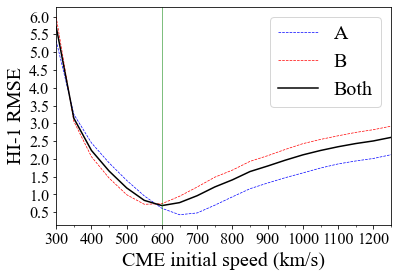

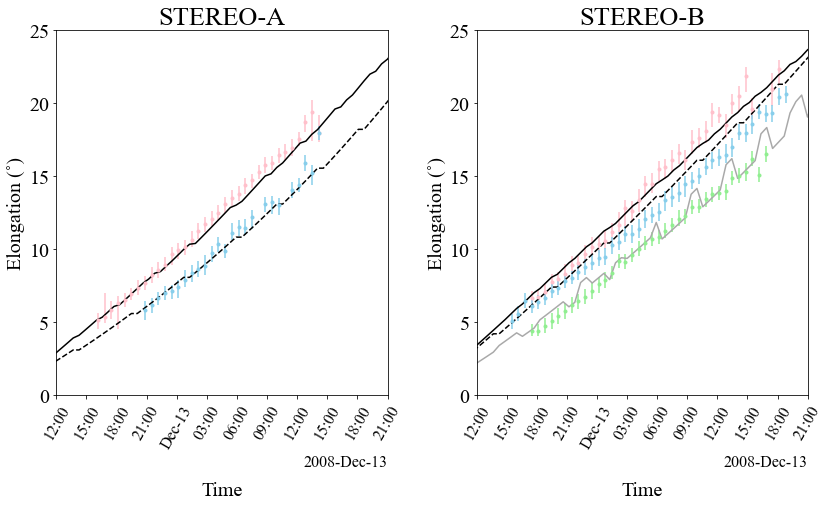

In [364]:
# What initial speed to give HUXt at an inner boundary of 8Rs

# Set up HUXt
event="velocity_test"
v_boundary = np.flip([2.361374481276616564e+02, 2.240716540668226173e+02, 2.376358249750887524e+02, 2.672482825902510513e+02, 3.096930808344839647e+02, 3.746892075320072308e+02, 4.268668006326229829e+02, 4.456230409562588761e+02, 4.325098393596861115e+02, 3.923976427092088670e+02, 4.160318741275664820e+02, 5.042482225194921739e+02, 5.947393810828092455e+02, 6.654072046028741170e+02, 6.917310550116643526e+02, 6.800427872609535598e+02, 6.219320569550533264e+02, 5.444059259203741021e+02, 5.043734613245545120e+02, 4.865263506790949464e+02, 4.849001221974726263e+02, 5.045156599835149223e+02, 5.157868414718000167e+02, 5.115173862842027006e+02, 4.783484024373857437e+02, 4.105433314643044014e+02, 3.252113536761797832e+02, 2.718381068427589753e+02, 2.611473445493025451e+02, 2.703445822983272251e+02, 2.879318070637758638e+02, 2.935649302292242169e+02, 2.913420114766625488e+02, 2.875243364183726271e+02, 2.758837083349550880e+02, 2.646586033040824191e+02, 2.620296606197267693e+02, 2.587181867060620561e+02, 2.583143812807093127e+02, 2.711622648112132197e+02, 2.895073025814325547e+02, 3.236093677154411807e+02, 3.602300486613148678e+02, 3.901021949691497639e+02, 4.000613537591571003e+02, 3.943689844061491954e+02, 3.953941447719399775e+02, 4.148021072583192677e+02, 4.417805902433387359e+02, 4.475472602689640098e+02, 4.214612344162281943e+02, 3.691015029453656098e+02, 3.122498162083122111e+02, 3.076938832484911472e+02, 3.321704537666684587e+02, 3.237507334340671150e+02, 3.621217972086897703e+02, 4.086377362649376437e+02, 4.435046064447465142e+02, 4.674792239491621331e+02, 4.799666692694719927e+02, 4.660162447073083172e+02, 4.706506215244046416e+02, 5.282817264033329820e+02, 5.824612174466126362e+02, 5.781493288632007079e+02, 5.519533093062667604e+02, 5.210893551054840600e+02, 4.711116992875964797e+02, 4.139039864812964993e+02, 3.685148444664304748e+02, 3.251115004054694282e+02, 2.944497484406588228e+02, 3.031728641854660964e+02, 3.017908650651369271e+02, 2.743621772706765114e+02, 2.753093603743015478e+02, 3.077932819486480867e+02, 3.142715901784403059e+02, 3.064569671412821776e+02, 2.972113560702332506e+02, 2.853275333911390703e+02, 2.781041597484824592e+02, 2.829676208301811471e+02, 2.874501592038274111e+02, 2.966814584993215362e+02, 3.135194107222907860e+02, 3.460091136549031603e+02, 3.814157744293487440e+02, 3.956749772192871433e+02, 3.684143935201673230e+02, 3.216986131456232556e+02, 2.792803446540552841e+02, 2.460060315632212564e+02, 2.535853141438094838e+02, 2.757920731764543234e+02, 2.940431313281729899e+02, 2.966822515328578334e+02, 2.954926028486351584e+02, 2.964600448988716721e+02, 2.986598892164937524e+02, 2.920602210256048465e+02, 2.862971285267943813e+02, 2.868135105926763799e+02, 2.948319974536670998e+02, 3.041351166652279971e+02, 2.854976713451857790e+02, 2.751327922228102238e+02, 2.699486953595605314e+02, 2.530033160147730484e+02, 2.300846477066176874e+02, 2.160876697185309183e+02, 2.211210117332515495e+02, 2.552383171466590284e+02, 3.045731933828458864e+02, 3.142951676630700035e+02, 2.933001971616943706e+02, 2.724793215158809971e+02, 2.577975418023809198e+02, 2.419712959689771878e+02, 2.507924724446661173e+02, 2.696897715708585679e+02, 2.776005233833919306e+02, 2.774424641305166119e+02, 2.763144001268291845e+02, 2.773574489888984544e+02, 2.629291468608762443e+02, 2.292533503180667935e+02], axis=0)* (u.km/u.s)
cr_num = 2077
cr_lon_init = 67.966  * u.deg       # 8rs = 67.966     # 30rs = 63.363
simtime = 10 * u.day
dt_scale = 4                                                                        # This shouldn't need changing frequently
inner_boundary_r = 8 * u.solRad
v_inner = H.map_v_boundary_inwards(v_boundary, 30*u.solRad, 8*u.solRad)
model = H.HUXt(v_boundary=v_inner, cr_num=cr_num, cr_lon_init=cr_lon_init, simtime=simtime, dt_scale=4, r_min = inner_boundary_r)

# Set up CME
t_launch = 0.0 * u.day
longitude = 10.0 * u.deg
latitude = 9.0 * u.deg
width = 42 *u .deg
thickness = 16.9 * u.solRad

# Set up speed values
speed_list = np.arange(300,1300,50)

# Set up dataframe
speed_df = pd.DataFrame()

for velocity in speed_list:
    # set up cme and solve
    cme = H.ConeCME(t_launch=t_launch, longitude=longitude, latitude=latitude, width=width, v=velocity*u.km/u.s, thickness=thickness, initial_height = inner_boundary_r)
    cme_list = [cme]
    
    model.solve(cme_list, save=False, tag=event)
    hxta, hxtb = huxt_t_e_profile_fast(cme)
#     elongation_plot(cme, 'HI1',save=False, tag=event)


#     errorA, errorB = deterministic_error(cme, print_RMSE=False, plot=False, save=False)
    
    
#     totalerrorA = errorA["nose"] + errorA["flank"]
#     totalerrorB = errorB["nose"] + errorB["flank"]
#     totalerror = totalerrorA + totalerrorB
#     datacountA = 29 + 25; datacountB = 33 + 36
#     datacount = datacountA + datacountB

#     RMSE = np.sqrt(totalerror[0]/datacount)

    ts_errorA, ts_errorB, errorA, errorB = calculate_error_new(hxta, hxtb)
    
    # Find error the nose and flank when seen from A and B
    total_NandF = errorA["N & F"] + errorB["N & F"]
    datacountA = ts_errorA["interp flank"].count()+ts_errorA["interp nose"].count()
    datacountB = ts_errorB["interp flank"].count()+ts_errorB["interp nose"].count()
    datacount = datacountA + datacountB
    RMSE = np.sqrt(total_NandF /datacount)

    
    # save in dataframe
    speed_df = speed_df.append({"speed":velocity,
                               "RMSE A":errorA['RMSE N & F'][0],
                               "RMSE B":errorB['RMSE N & F'][0],
                               "RMSE": RMSE[0]},ignore_index=True)
    

# Find minimum RMSE from dataframe
arg,val = np.argmin(speed_df["RMSE"]),np.min(speed_df["RMSE"])

# Create figure displaying information
plt.rcParams.update({'font.size': 22, 'axes.labelsize':20, 'legend.fontsize':20,'xtick.labelsize': 16.0,'ytick.labelsize': 16.0,"font.family":"Times New Roman"})

fig,ax1 = plt.subplots()
ax1.set_xlabel("CME initial speed (km/s)")
ax1.set_ylabel("HI-1 RMSE")
ax1.set_xlim(left=300, right=1250)
ax1.set_yticks(np.arange(0,np.max(speed_df["RMSE"])+0.5,0.5))
ax1.xaxis.set_major_locator(MultipleLocator(100))
ax1.xaxis.set_minor_locator(MultipleLocator(50))

plt.plot(speed_df["speed"],speed_df["RMSE A"],"--", color='blue', label="A", lw=0.7)
plt.plot(speed_df["speed"],speed_df["RMSE B"],"--", color='red', label="B", lw=0.7)
plt.plot(speed_df["speed"],speed_df["RMSE"], color='black', label="Both")

plt.legend()
plt.axvline(x=speed_df["speed"][arg], color="green", label="Minimim", lw=0.5)

# Rerun model for "best" velocity
bestspeed=speed_df["speed"][arg]
cme = H.ConeCME(t_launch=t_launch, longitude=longitude, latitude=latitude, width=width, v=bestspeed*u.km/u.s, thickness=thickness, initial_height = inner_boundary_r)
cme_list = [cme]
model.solve(cme_list, save=False, tag=event)
A,B = huxt_t_e_profile_fast(cme)
elongation_plot(cme, 'HI1',save=False, tag=event)


    

In [365]:
minarg = np.argmin(speed_df["RMSE"])
minRMSE = np.min(speed_df["RMSE"])
speedbest = speed_df["speed"][minarg]

print("The lowest RMSE is {:.3f}˚ found by an CME launching with an initial speed of {} kms-1.".format(minRMSE,speedbest))
percent = np.arange(1.1,2.0,0.05)
for i in percent:
    print('{:.3f}˚ is {:.0f}% bigger than the minimum.'.format(minRMSE*i, (i-1)*100))
    
display (speed_df)


The lowest RMSE is 0.688˚ found by an CME launching with an initial speed of 600.0 kms-1.
0.757˚ is 10% bigger than the minimum.
0.791˚ is 15% bigger than the minimum.
0.826˚ is 20% bigger than the minimum.
0.860˚ is 25% bigger than the minimum.
0.895˚ is 30% bigger than the minimum.
0.929˚ is 35% bigger than the minimum.
0.963˚ is 40% bigger than the minimum.
0.998˚ is 45% bigger than the minimum.
1.032˚ is 50% bigger than the minimum.
1.067˚ is 55% bigger than the minimum.
1.101˚ is 60% bigger than the minimum.
1.135˚ is 65% bigger than the minimum.
1.170˚ is 70% bigger than the minimum.
1.204˚ is 75% bigger than the minimum.
1.239˚ is 80% bigger than the minimum.
1.273˚ is 85% bigger than the minimum.
1.307˚ is 90% bigger than the minimum.
1.342˚ is 95% bigger than the minimum.


,RMSE,RMSE A,RMSE B,speed
0,5.709812,5.320997,5.987166,300.0
1,3.143740,3.254621,3.057198,350.0
2,2.238103,2.451482,2.062086,400.0
3,1.659643,1.889201,1.462256,450.0
4,1.184224,1.396972,0.993483,500.0
5,0.834387,0.960174,0.724883,550.0
6,0.688106,0.611365,0.740893,600.0
7,0.771438,0.431231,0.951109,650.0
8,0.966207,0.481264,1.210169,700.0
9,1.211919,0.699480,1.486484,750.0


In [352]:
# Rerun model for "best" velocity
bestspeed= 600
cme = H.ConeCME(t_launch=t_launch, longitude=longitude, latitude=latitude, width=width, v=bestspeed*u.km/u.s, thickness=16.9*u.solRad, initial_height = inner_boundary_r)
cme_list = [cme]
model.solve(cme_list, save=False, tag=event)
# A,B = huxt_t_e_profile_fast(cme)
# elongation_plot(cme, 'HI1',save=False, tag=event)




In [353]:
print("CME inital speed is {}.".format(cme.v))
print("CME inital thickness is {}.".format(cme.thickness))
compute_earth_arrival(cme, print_values=True, plot=False)

CME inital speed is 600.0 km / s.
CME inital thickness is 16.9 solRad.
Model inital time:  2008-12-12 10:46:49.895
Leading edge transit time: 3.9798 d
Leading edge arrival time at Earth: 2008-12-16 10:17:45.864
Leading edge arrival speed at Earth: 333.53 km / s


In [ ]:
TAG = '12Dec08_width'
N = 20
VAR = 'Width'
run_huxt_ensemble(v_boundary, n_ensemble=N, variable_test = True, variable=VAR, param_space=10*u.deg, event=TAG)
track_cme_flanks(fast=True, tag=TAG)
# ensemble_elongation_plot(FOV = 'HI1',feature = "initial flank", n_ens = N, save=True, tag=TAG)
# ensemble_elongation_plot(FOV = 'HI1',feature = "nose", n_ens = N, save=True, tag=TAG)
# ensemble_elongation_plot(FOV = 'HI1',feature = "secondary flank", n_ens = N, save=True, tag=TAG)
variable_plots(variable=VAR, n_ens=N, save=True, tag=TAG)

In [ ]:
ensemble_error(n_ens=10, save=False, tag='test_n10_ps20')

In [ ]:
# Testing ten-ensemble members to see if this lines up with the example curve

TAG = 'test_n10_ps20'
N = 10
VAR = 'Width'
# run_huxt_ensemble(v_boundary, n_ensemble=N, variable_test = True, variable=VAR, param_space=20*u.deg, event=TAG)
# track_cme_flanks(fast=True, tag=TAG)
# ensemble_elongation_plot(FOV = 'HI1',feature = "initial flank", n_ens = N, save=True, tag=TAG)
# ensemble_elongation_plot(FOV = 'HI1',feature = "nose", n_ens = N, save=True, tag=TAG)
# ensemble_elongation_plot(FOV = 'HI1',feature = "secondary flank", n_ens = N, save=True, tag=TAG)
variable_plots(variable=VAR, n_ens=N, save=True, tag=TAG)

display(ens_info)
display(sorted_df)

#### Looping over the deterministic with width values randomly created by the ensemble.

In [ ]:
# Testing width sensitivity by adjudting the width in set intervals

# Use the width values that were randomly used in the ensemble
width_list = sorted_df["Width"].tolist()

for i in range(len(width_list)):
    # Tag for file management. Event: 12 December 2008
    event = 'TEST12Dec08{}'.format(i)
    
    # CME conditions
    t_launch = 0.0 * u.day
    longitude = 10.0 * u.deg
    width = width_list[i] *u .deg
    v = 498 * (u.km/u.s)
    thickness = 5 * u.solRad

    # HUXt conditions
    v_boundary = np.flip([.361374481276616564e+02, 2.240716540668226173e+02, 2.376358249750887524e+02, 2.672482825902510513e+02, 3.096930808344839647e+02, 3.746892075320072308e+02, 4.268668006326229829e+02, 4.456230409562588761e+02, 4.325098393596861115e+02, 3.923976427092088670e+02, 4.160318741275664820e+02, 5.042482225194921739e+02, 5.947393810828092455e+02, 6.654072046028741170e+02, 6.917310550116643526e+02, 6.800427872609535598e+02, 6.219320569550533264e+02, 5.444059259203741021e+02, 5.043734613245545120e+02, 4.865263506790949464e+02, 4.849001221974726263e+02, 5.045156599835149223e+02, 5.157868414718000167e+02, 5.115173862842027006e+02, 4.783484024373857437e+02, 4.105433314643044014e+02, 3.252113536761797832e+02, 2.718381068427589753e+02, 2.611473445493025451e+02, 2.703445822983272251e+02, 2.879318070637758638e+02, 2.935649302292242169e+02, 2.913420114766625488e+02, 2.875243364183726271e+02, 2.758837083349550880e+02, 2.646586033040824191e+02, 2.620296606197267693e+02, 2.587181867060620561e+02, 2.583143812807093127e+02, 2.711622648112132197e+02, 2.895073025814325547e+02, 3.236093677154411807e+02, 3.602300486613148678e+02, 3.901021949691497639e+02, 4.000613537591571003e+02, 3.943689844061491954e+02, 3.953941447719399775e+02, 4.148021072583192677e+02, 4.417805902433387359e+02, 4.475472602689640098e+02, 4.214612344162281943e+02, 3.691015029453656098e+02, 3.122498162083122111e+02, 3.076938832484911472e+02, 3.321704537666684587e+02, 3.237507334340671150e+02, 3.621217972086897703e+02, 4.086377362649376437e+02, 4.435046064447465142e+02, 4.674792239491621331e+02, 4.799666692694719927e+02, 4.660162447073083172e+02, 4.706506215244046416e+02, 5.282817264033329820e+02, 5.824612174466126362e+02, 5.781493288632007079e+02, 5.519533093062667604e+02, 5.210893551054840600e+02, 4.711116992875964797e+02, 4.139039864812964993e+02, 3.685148444664304748e+02, 3.251115004054694282e+02, 2.944497484406588228e+02, 3.031728641854660964e+02, 3.017908650651369271e+02, 2.743621772706765114e+02, 2.753093603743015478e+02, 3.077932819486480867e+02, 3.142715901784403059e+02, 3.064569671412821776e+02, 2.972113560702332506e+02, 2.853275333911390703e+02, 2.781041597484824592e+02, 2.829676208301811471e+02, 2.874501592038274111e+02, 2.966814584993215362e+02, 3.135194107222907860e+02, 3.460091136549031603e+02, 3.814157744293487440e+02, 3.956749772192871433e+02, 3.684143935201673230e+02, 3.216986131456232556e+02, 2.792803446540552841e+02, 2.460060315632212564e+02, 2.535853141438094838e+02, 2.757920731764543234e+02, 2.940431313281729899e+02, 2.966822515328578334e+02, 2.954926028486351584e+02, 2.964600448988716721e+02, 2.986598892164937524e+02, 2.920602210256048465e+02, 2.862971285267943813e+02, 2.868135105926763799e+02, 2.948319974536670998e+02, 3.041351166652279971e+02, 2.854976713451857790e+02, 2.751327922228102238e+02, 2.699486953595605314e+02, 2.530033160147730484e+02, 2.300846477066176874e+02, 2.160876697185309183e+02, 2.211210117332515495e+02, 2.552383171466590284e+02, 3.045731933828458864e+02, 3.142951676630700035e+02, 2.933001971616943706e+02, 2.724793215158809971e+02, 2.577975418023809198e+02, 2.419712959689771878e+02, 2.507924724446661173e+02, 2.696897715708585679e+02, 2.776005233833919306e+02, 2.774424641305166119e+02, 2.763144001268291845e+02, 2.773574489888984544e+02, 2.629291468608762443e+02, 2.292533503180667935e+02], axis=0)* (u.km/u.s)
    cr_num = 2077
    cr_lon_init = 63.363 * u.deg 
    simtime = 5 * u.day

    # Run model, and calculate residual errors
    cme = H.ConeCME(t_launch=t_launch, longitude=longitude, width=width, v=v, thickness=thickness)
    cme_list = [cme]
    model = H.HUXt(v_boundary=v_boundary, cr_num=cr_num, cr_lon_init=cr_lon_init, simtime=simtime, dt_scale=4)
    model.solve(cme_list, save=False, tag=event)
    #model.plot(2*u.d, field='cme', save=False, tag=event)
    #model.plot_timeseries(1*u.AU, lon=0.0*u.deg,field='both')
    #model.animate('cme', tag=event)
    # animate_schematic(cr_num = cr_num) 
    #elongation_plot('HI1',save=False, tag=event)
    errorA, errorB = deterministic_error(cme, print_RMSE=False, plot=False, save=False)
    
    # Create dataframe of the residual errors of the model run
    if i == 0:
        dfA = errorA
        dfB = errorB
    else:
        dfA = dfA.append(errorA, ignore_index=True)
        dfB = dfB.append(errorB, ignore_index=True)

# Add width to the dataframe, for plotting purposes 
dfA['width'] = width_list
dfB['width'] = width_list

# Plot variable sensitivity on same plots 
plt.rcParams.update({'font.size': 14, 'axes.labelsize':14, 'legend.fontsize':14,'xtick.labelsize': 12.0,'ytick.labelsize':12,})
fig, ax = plt.subplots(2, 1, figsize=(8,8))

# Nose
ax[0].set_title('STEREO-A (Determ. Loop)')
ax[0].set_xlabel('Width (˚)')
ax[0].set_ylabel('Total R$^2$ Error')
ax[0].plot(dfA['width'], dfA['nose'],linestyle='-', marker='.', color='b', label = 'nose')
ax[0].plot(dfA['width'], dfA['flank'],linestyle='-', marker='.', color='r', label = 'flank')
ax[0].axvline(x = 36, color = 'k', linestyle = ':')
ax[0].axvline(x = 56, color = 'k', linestyle = ':')
#ax[0].set_xticks(np.arange(min(dfA['width']), max(dfA['width'])+5, 5.0))

ax[1].set_title('STEREO-B (Determ. Loop)')
ax[1].set_xlabel('Width (˚)')
ax[1].set_ylabel('Total R$^2$ Error')
ax[1].plot(dfB['width'], dfB['nose'], linestyle='-', marker='.', color='b', label = 'nose')
ax[1].plot(dfB['width'], dfB['flank'], linestyle='-', marker='.', color='r', label = 'flank')
ax[1].plot(dfB['width'], dfB['sec flank'], linestyle='-', marker='.', color='g', label = 'sec. flank')
ax[1].axvline(x = 36, color = 'k', linestyle = ':')
ax[1].axvline(x = 56, color = 'k', linestyle = ':')
#ax[1].set_xticks(np.arange(min(dfA['width']), max(dfA['width'])+5, 5.0))

fig.tight_layout()

#### Display the dataframes containing deterministic information 

In [ ]:
display(dfA)
display(dfB)

#### Find the difference between the dataframes (sorted_df - deterministic runs)

In [ ]:
# Plot variable sensitivity on same plot. You should see the difference in the two methods - if there is one... WHICH THERE SHOULDN'T BE!! 

plt.rcParams.update({'font.size': 14, 'axes.labelsize':14, 'legend.fontsize':14,'xtick.labelsize': 12.0,'ytick.labelsize':12,})
fig, ax = plt.subplots(2, 1, figsize=(8,8))

# Nose
ax[0].set_title('STEREO-A')
ax[0].set_xlabel('Width (˚)')
ax[0].set_ylabel('Total R$^2$ Error')
ax[0].plot(dfA['width'], dfA['nose'],linestyle='-', marker='.', color='b', label = 'nose')
ax[0].plot(dfA['width'], dfA['flank'],linestyle='-', marker='.', color='r', label = 'flank')
ax[0].plot(sorted_df['Width'], sorted_df['Nose error A'],linestyle='--', marker='x', color='lightblue', label = 'nose')
ax[0].plot(sorted_df['Width'], sorted_df['Flank error A'],linestyle='--', marker='x', color='coral', label = 'flank')
ax[0].axvline(x = 36, color = 'k', linestyle = ':')
ax[0].axvline(x = 56, color = 'k', linestyle = ':')
#ax[0].set_xticks(np.arange(min(dfA['width']), max(dfA['width'])+5, 5.0))

ax[1].set_title('STEREO-B')
ax[1].set_xlabel('Width (˚)')
ax[1].set_ylabel('Total R$^2$ Error')
ax[1].plot(dfB['width'], dfB['nose'], linestyle='-', marker='.', color='b', label = 'nose')
ax[1].plot(dfB['width'], dfB['flank'], linestyle='-', marker='.', color='r', label = 'flank')
ax[1].plot(dfB['width'], dfB['sec flank'], linestyle='-', marker='.', color='g', label = 'sec. flank')
ax[1].plot(sorted_df['Width'], sorted_df['Nose error B'],linestyle='--', marker='x', color='lightblue', label = 'nose')
ax[1].plot(sorted_df['Width'], sorted_df['Flank error B'],linestyle='--', marker='x', color='coral', label = 'flank')
ax[1].plot(sorted_df['Width'], sorted_df['Sec flank error B'],linestyle='--', marker='x', color='limegreen', label = 'sec flank')
ax[1].axvline(x = 36, color = 'k', linestyle = ':')
ax[1].axvline(x = 56, color = 'k', linestyle = ':')
#ax[1].set_xticks(np.arange(min(dfA['width']), max(dfA['width'])+5, 5.0))

fig.tight_layout()

In [ ]:
sorted_df = sorted_df.reset_index(drop=True)
difference = pd.DataFrame()
difference["Actual width"] = sorted_df["Width"]
difference["width"] = sorted_df["Width"] - dfA["width"]
difference["flank a"] = sorted_df["Flank error A"] - dfA["flank"]
difference["nose a"] = sorted_df["Nose error A"] - dfA["nose"]
difference["flank b"] = sorted_df["Flank error B"] - dfB["flank"]
difference["nose b"] = sorted_df["Nose error B"] - dfB["nose"]
difference["sec flank b"] = sorted_df["Sec flank error B"] - dfB["sec flank"]

print("If NEGATIVE value, then the ensemble is LESS than the deterministic.",'\n',
     "If POSITIVE vales, then the ensemble is GREATER than the deterministic.")
display(difference)


plt.figure()
plt.plot(width_list, difference["flank a"],'b')
plt.plot(width_list, difference["nose a"],'r')
plt.ylabel("Difference in TR$^2$Error")
plt.xlabel("Width (˚)")


plt.figure()
plt.plot(width_list, difference["flank b"],'b')
plt.plot(width_list, difference["nose b"],'r')
plt.plot(width_list, difference["sec flank b"],'g')
plt.ylabel("Difference in TR$^2$Error")
plt.xlabel("Width (˚)")


In [ ]:
TAG = '12Dec08_lat'
N = 10
VAR = 'Latitude'
# run_huxt_ensemble(v_boundary, n_ensemble=N, variable_test = True, variable=VAR, param_space=10*u.deg, event=TAG)
# track_cme_flanks(fast=True, tag=TAG)
ensemble_elongation_plot(FOV = 'HI1',feature = "initial flank", n_ens = N, save=True, tag=TAG)
ensemble_elongation_plot(FOV = 'HI1',feature = "nose", n_ens = N, save=True, tag=TAG)
ensemble_elongation_plot(FOV = 'HI1',feature = "secondary flank", n_ens = N, save=True, tag=TAG)
variable_plots(variable=VAR, n_ens=N, save=True, tag=TAG)

In [ ]:
TAG = '12Dec08_lon'
N = 20
VAR = 'Longitude'
# run_huxt_ensemble(v_boundary, n_ensemble=N, variable_test = True, variable=VAR, param_space=15*u.deg, event=TAG)
# track_cme_flanks(fast=True, tag=TAG)
# ensemble_elongation_plot(FOV = 'HI1',feature = "initial flank", n_ens = N, save=True, tag=TAG)
# ensemble_elongation_plot(FOV = 'HI1',feature = "nose", n_ens = N, save=True, tag=TAG)
# ensemble_elongation_plot(FOV = 'HI1',feature = "secondary flank", n_ens = N, save=True, tag=TAG)
variable_plots(variable=VAR, n_ens=N, save=True, tag=TAG)

In [ ]:
# # Testing longitude sensitivity by adjusting the long. in set intervals
# # -------------------------------------------------------------------

# # Use the width values that were randomly used in the ensemble
# lon_list = sorted_df["Longitude"].tolist()

# for i in range(len(lon_list)):
#     # Tag for file management. Event: 12 December 2008
#     event = 'TEST12Dec08_lon{}'.format(i)
    
#     # CME conditions
#     t_launch = 0.0 * u.day
#     longitude = lon_list[i] * u.deg
#     width = 46 * u.deg
#     v = 498 * (u.km/u.s)
#     thickness = 5 * u.solRad

#     # HUXt conditions
#     v_boundary = np.flip([.361374481276616564e+02, 2.240716540668226173e+02, 2.376358249750887524e+02, 2.672482825902510513e+02, 3.096930808344839647e+02, 3.746892075320072308e+02, 4.268668006326229829e+02, 4.456230409562588761e+02, 4.325098393596861115e+02, 3.923976427092088670e+02, 4.160318741275664820e+02, 5.042482225194921739e+02, 5.947393810828092455e+02, 6.654072046028741170e+02, 6.917310550116643526e+02, 6.800427872609535598e+02, 6.219320569550533264e+02, 5.444059259203741021e+02, 5.043734613245545120e+02, 4.865263506790949464e+02, 4.849001221974726263e+02, 5.045156599835149223e+02, 5.157868414718000167e+02, 5.115173862842027006e+02, 4.783484024373857437e+02, 4.105433314643044014e+02, 3.252113536761797832e+02, 2.718381068427589753e+02, 2.611473445493025451e+02, 2.703445822983272251e+02, 2.879318070637758638e+02, 2.935649302292242169e+02, 2.913420114766625488e+02, 2.875243364183726271e+02, 2.758837083349550880e+02, 2.646586033040824191e+02, 2.620296606197267693e+02, 2.587181867060620561e+02, 2.583143812807093127e+02, 2.711622648112132197e+02, 2.895073025814325547e+02, 3.236093677154411807e+02, 3.602300486613148678e+02, 3.901021949691497639e+02, 4.000613537591571003e+02, 3.943689844061491954e+02, 3.953941447719399775e+02, 4.148021072583192677e+02, 4.417805902433387359e+02, 4.475472602689640098e+02, 4.214612344162281943e+02, 3.691015029453656098e+02, 3.122498162083122111e+02, 3.076938832484911472e+02, 3.321704537666684587e+02, 3.237507334340671150e+02, 3.621217972086897703e+02, 4.086377362649376437e+02, 4.435046064447465142e+02, 4.674792239491621331e+02, 4.799666692694719927e+02, 4.660162447073083172e+02, 4.706506215244046416e+02, 5.282817264033329820e+02, 5.824612174466126362e+02, 5.781493288632007079e+02, 5.519533093062667604e+02, 5.210893551054840600e+02, 4.711116992875964797e+02, 4.139039864812964993e+02, 3.685148444664304748e+02, 3.251115004054694282e+02, 2.944497484406588228e+02, 3.031728641854660964e+02, 3.017908650651369271e+02, 2.743621772706765114e+02, 2.753093603743015478e+02, 3.077932819486480867e+02, 3.142715901784403059e+02, 3.064569671412821776e+02, 2.972113560702332506e+02, 2.853275333911390703e+02, 2.781041597484824592e+02, 2.829676208301811471e+02, 2.874501592038274111e+02, 2.966814584993215362e+02, 3.135194107222907860e+02, 3.460091136549031603e+02, 3.814157744293487440e+02, 3.956749772192871433e+02, 3.684143935201673230e+02, 3.216986131456232556e+02, 2.792803446540552841e+02, 2.460060315632212564e+02, 2.535853141438094838e+02, 2.757920731764543234e+02, 2.940431313281729899e+02, 2.966822515328578334e+02, 2.954926028486351584e+02, 2.964600448988716721e+02, 2.986598892164937524e+02, 2.920602210256048465e+02, 2.862971285267943813e+02, 2.868135105926763799e+02, 2.948319974536670998e+02, 3.041351166652279971e+02, 2.854976713451857790e+02, 2.751327922228102238e+02, 2.699486953595605314e+02, 2.530033160147730484e+02, 2.300846477066176874e+02, 2.160876697185309183e+02, 2.211210117332515495e+02, 2.552383171466590284e+02, 3.045731933828458864e+02, 3.142951676630700035e+02, 2.933001971616943706e+02, 2.724793215158809971e+02, 2.577975418023809198e+02, 2.419712959689771878e+02, 2.507924724446661173e+02, 2.696897715708585679e+02, 2.776005233833919306e+02, 2.774424641305166119e+02, 2.763144001268291845e+02, 2.773574489888984544e+02, 2.629291468608762443e+02, 2.292533503180667935e+02], axis=0)* (u.km/u.s)
#     cr_num = 2077
#     cr_lon_init = 63.363 * u.deg 
#     simtime = 5 * u.day

#     # Run model, and calculate residual errors
#     cme = H.ConeCME(t_launch=t_launch, longitude=longitude, width=width, v=v, thickness=thickness)
#     cme_list = [cme]
#     model = H.HUXt(v_boundary=v_boundary, cr_num=cr_num, cr_lon_init=cr_lon_init, simtime=simtime, dt_scale=4)
#     model.solve(cme_list, save=False, tag=event)
#     #model.plot(2*u.d, field='cme', save=False, tag=event)
#     #model.plot_timeseries(1*u.AU, lon=0.0*u.deg,field='both')
#     #model.animate('cme', tag=event)
#     # animate_schematic(cr_num = cr_num) 
#     #elongation_plot('HI1',save=False, tag=event)
#     errorA, errorB = deterministic_error(cme, print_RMSE=False, plot=False, save=False)
    
#     # Create dataframe of the residual errors of the model run
#     if i == 0:
#         dfA = errorA
#         dfB = errorB
#     else:
#         dfA = dfA.append(errorA, ignore_index=True)
#         dfB = dfB.append(errorB, ignore_index=True)

# # Add width to the dataframe, for plotting purposes 
# dfA['longitude'] = lon_list
# dfB['longitude'] = lon_list

# -----------------------------------
# Plot variable sensitivity on same plot. You should see the difference in the two methods - if there is one... WHICH THERE SHOULDN'T BE!! 

plt.rcParams.update({'font.size': 14, 'axes.labelsize':14, 'legend.fontsize':14,'xtick.labelsize': 12.0,'ytick.labelsize':12,})
fig, ax = plt.subplots(2, 1, figsize=(8,8))

# Nose
ax[0].set_title('STEREO-A')
ax[0].set_xlabel('Longitude (˚rad)')
ax[0].set_ylabel('Total R$^2$ Error')
ax[0].plot(dfA['longitude'], dfA['nose'],linestyle='-', marker='.', color='b', label = 'nose')
ax[0].plot(dfA['longitude'], dfA['flank'],linestyle='-', marker='.', color='r', label = 'flank')
ax[0].plot(sorted_df['Longitude'], sorted_df['Nose error A'],linestyle='--', marker='x', color='lightblue', label = 'nose')
ax[0].plot(sorted_df['Longitude'], sorted_df['Flank error A'],linestyle='--', marker='x', color='coral', label = 'flank')
# ax[0].axvline(x = 36, color = 'k', linestyle = ':')
# ax[0].axvline(x = 56, color = 'k', linestyle = ':')
#ax[0].set_xticks(np.arange(min(dfA['width']), max(dfA['width'])+5, 5.0))

ax[1].set_title('STEREO-B')
ax[1].set_xlabel('Longitude (˚rad)')
ax[1].set_ylabel('Total R$^2$ Error')
ax[1].plot(dfB['longitude'], dfB['nose'], linestyle='-', marker='.', color='b', label = 'nose')
ax[1].plot(dfB['longitude'], dfB['flank'], linestyle='-', marker='.', color='r', label = 'flank')
ax[1].plot(dfB['longitude'], dfB['sec flank'], linestyle='-', marker='.', color='g', label = 'sec. flank')
ax[1].plot(sorted_df['Longitude'], sorted_df['Nose error B'],linestyle='--', marker='x', color='lightblue', label = 'nose')
ax[1].plot(sorted_df['Longitude'], sorted_df['Flank error B'],linestyle='--', marker='x', color='coral', label = 'flank')
ax[1].plot(sorted_df['Longitude'], sorted_df['Sec flank error B'],linestyle='--', marker='x', color='limegreen', label = 'sec flank')
# ax[1].axvline(x = 36, color = 'k', linestyle = ':')
# ax[1].axvline(x = 56, color = 'k', linestyle = ':')
#ax[1].set_xticks(np.arange(min(dfA['width']), max(dfA['width'])+5, 5.0))

fig.tight_layout()


sorted_df = sorted_df.reset_index(drop=True)
difference = pd.DataFrame()
difference["Actual longitude"] = sorted_df["Longitude"]
difference["longitude"] = sorted_df["Longitude"] - dfA["longitude"]
difference["flank a"] = sorted_df["Flank error A"] - dfA["flank"]
difference["nose a"] = sorted_df["Nose error A"] - dfA["nose"]
difference["flank b"] = sorted_df["Flank error B"] - dfB["flank"]
difference["nose b"] = sorted_df["Nose error B"] - dfB["nose"]
difference["sec flank b"] = sorted_df["Sec flank error B"] - dfB["sec flank"]

print("If NEGATIVE value, then the ensemble is LESS than the deterministic.",'\n',
     "If POSITIVE vales, then the ensemble is GREATER than the deterministic.")
display(difference)

In [ ]:
TAG = '12Dec08_speed'
N = 30
VAR = 'Speed'
run_huxt_ensemble(v_boundary, n_ensemble=N, variable_test = True, variable=VAR, param_space=100*u.km/u.s, event=TAG)
track_cme_flanks(fast=True, tag=TAG)
ensemble_elongation_plot(FOV = 'HI1',feature = "initial flank", n_ens = N, save=True, tag=TAG)
ensemble_elongation_plot(FOV = 'HI1',feature = "nose", n_ens = N, save=True, tag=TAG)
ensemble_elongation_plot(FOV = 'HI1',feature = "secondary flank", n_ens = N, save=True, tag=TAG)
variable_plots(variable=VAR, n_ens=N, save=True, tag=TAG)

In [ ]:
TAG = '12Dec08_thickness'
N = 10
VAR = 'Thickness'
# run_huxt_ensemble(v_boundary, n_ensemble=N, variable_test = True, variable=VAR, param_space=2*u.solRad, event=TAG)
# track_cme_flanks(fast=True, tag=TAG)
ensemble_elongation_plot(FOV = 'HI1',feature = "initial flank", n_ens = N, save=True, tag=TAG)
ensemble_elongation_plot(FOV = 'HI1',feature = "nose", n_ens = N, save=True, tag=TAG)
ensemble_elongation_plot(FOV = 'HI1',feature = "secondary flank", n_ens = N, save=True, tag=TAG)
variable_plots(variable=VAR, n_ens=N, save=True, tag=TAG)

***
# Simulation Animation #


In [333]:
 def animate_schematic(model, cme, tag=''):
    """
    Animate the model solution, and save as an MP4.
    Parameters
    ----------
    ssw_event: String identifier of the SWPC event being analysed. Should be ssw_007, ssw_008, ssw_009, ssw_012.
    Returns
    -------
    An MP4 in the figures directory with name HUXt_CR{cr_num}_{ssw_event}_movie.mp4
    """
    # Set the duration of the movie
    # Scaled so a 5 day simulation with dt_scale=4 is a 10 second movie.
    sim_duration = (5*u.day).to(u.s)
    movie_duration = sim_duration.value * (20 / 432000)
    
#     # Load in the HUXT data and trace the flanks
    project_dirs = H._setup_dirs_()
#     path = os.path.join(project_dirs['HUXt_data'], "HUXt_*{}*_{}*.hdf5".format(cr_num,tag))
#     deterministic_run = glob.glob(path)[0]
#     model, cme_list = H.load_HUXt_run(deterministic_run)
#     cme = cme_list[0]
    hxt_sta, hxt_stb = huxt_t_e_profile_fast(cme)
    
                                                                        #     # LOAD IN THE CORRECT PA FROM THE SSW DATA FOR PLOTTING
                                                                        #     ssw_sta_name = ssw_event + "_sta.csv"
                                                                        #     ssw_sta_hxt = pd.read_csv(os.path.join(project_dirs['out_data'], ssw_sta_name))
                                                                        #     ssw_stb_name = ssw_event + "_stb.csv"
                                                                        #     ssw_stb_hxt = pd.read_csv(os.path.join(project_dirs['out_data'], ssw_stb_name))   

                                                                        #     sta_hxt_pa = ssw_sta_hxt.loc[0, 'pa']
                                                                        #     stb_hxt_pa = ssw_stb_hxt.loc[0, 'pa']
                                                                        #     print("{} STA PA of HUXt: {:3.2f}".format(ssw_event, sta_hxt_pa))
                                                                        #     print("{} STB PA of HUXt: {:3.2f}".format(ssw_event, stb_hxt_pa))
                                                                        #     del ssw_sta_hxt
                                                                        #     del ssw_stb_hxt
    
    times = model.time_init + model.time_out
    sta = H.Observer('STA', times)
    stb = H.Observer('STB', times)
    
    nt_end = np.sum(model.time_out <= sim_duration)
    
    def make_frame(t):
        """
        Produce the frame required by MoviePy.VideoClip.
        :param t: time through the movie
        """
        # Get the time index closest to this fraction of movie duration
        i = np.int32((nt_end - 1) * t / movie_duration)
        t_out = model.time_out[i]
        fig, ax = animation_frame(t_out, model, hxt_sta, hxt_stb, sta, stb)
        frame = mplfig_to_npimage(fig)
        plt.close('all')
        return frame
    
    cr_num = np.int32(model.cr_num.value)
    filename = "HUXt_CR{:03d}_{}_movie.mp4".format(cr_num, tag)
    filepath = os.path.join(project_dirs['HUXt_figures'], filename)
    animation = mpy.VideoClip(make_frame, duration=movie_duration)
    animation.write_videofile(filepath, fps=24, codec='libx264', logger=None)
    return

# def animation_frame(ssw_event, time, model, hxt_sta, hxt_stb, sta_hxt_pa, stb_hxt_pa, sta, stb):
def animation_frame(time, model, hxt_sta, hxt_stb, sta, stb):
    """
    Make a contour plot on polar axis of the solar wind solution at a specific time.
    Parameters
    ----------
    ssw_event: String identifier of the SWPC event being analysed. Should be ssw_007, ssw_008, ssw_009, ssw_012.
    time: Time to look up closet model time to (with an astropy.unit of time).
    model: An instance of the HUXt class with a model solution.
    hxt_sta: Pandas dataframe of the ConeCME flank profile from HUXt for STEREO-A.
    hxt_stb: Pandas dataframe of the ConeCME flank profile from HUXt for STEREO-B.
    sta_hxt_pa: Float value of the position angle of the ConeCME in the STEREO-A field of view.
    stb_hxt_pa: Float value of the position angle of the ConeCME in the STEREO-B field of view.
    sta: A HUXt.Observer object for STEREO-A for this event.
    stb: A HUXt.Observer object for STEREO-B for this event.
    Returns
    -------
    fig: Figure handle.
    ax: List of the three Axes handles.
    """
    # Load in the deterministic HUXt solution, SSW data, and HI images.
    project_dirs = H._setup_dirs_()
    
    id_time_out = np.argmin(np.abs(model.time_out - time))
    time_out = model.time_init + model.time_out[id_time_out] + (2*u.d)
    
                                                                                    #     # Load in the HI images
                                                                                    #     hi1a_fc, hi1a_fp = find_hi_files(ssw_event, 'sta', time_out)
                                                                                    #     hi1a_map = hip.get_image_diff(hi1a_fc, hi1a_fp, align=True, smoothing=True)
                                                                                    #     hi1b_fc, hi1b_fp = find_hi_files(ssw_event, 'stb', time_out)
                                                                                    #     hi1b_map = hip.get_image_diff(hi1b_fc, hi1b_fp, align=True, smoothing=True)

                                                                                    #     # Load the SSW classifications for the HI images.
                                                                                    #     img = 'diff'
                                                                                    #     # Open up the SSW data
                                                                                    #     ssw_out = tables.open_file(project_dirs['SSW_data'], mode="r")
                                                                                    #     PLOT_HI1A = True
                                                                                    #     PLOT_HI1B = True
                                                                                    #     for craft, hi_map in zip(['sta', 'stb'], [hi1a_map, hi1b_map]):

                                                                                    #         # Pull out event
                                                                                    #         ssw_path = "/".join(['', ssw_event, craft, img])
                                                                                    #         event = ssw_out.get_node(ssw_path)

                                                                                    #         key = hi_map.date.strftime('T%Y%m%d_%H%M')+'01'

                                                                                    #         # There is a bug in the naming/timing of the files. This is a workaround from sswanalysis   
                                                                                    #         split = key.split('_')
                                                                                    #         T_label = split[0]
                                                                                    #         hhmm = split[1]
                                                                                    #         if hhmm[2:] == '10':
                                                                                    #             hhmm = '0901'
                                                                                    #         if hhmm[2:] == '30':
                                                                                    #             hhmm = '2901'
                                                                                    #         if hhmm[2:] == '50':
                                                                                    #             hhmm = '4901'

                                                                                    #         key = T_label + '_' + hhmm

                                                                                    #         try:
                                                                                    #             cme_slice = event[key]

                                                                                    #             # Get the CME front data
                                                                                    #             cme = pd.DataFrame.from_records(cme_slice.cme_coords.read())
                                                                                    #             cme.replace(to_replace=[99999], value=np.NaN, inplace=True)

                                                                                    #             if craft == 'sta':
                                                                                    #                 ssw_sta = cme.copy()
                                                                                    #             elif craft == 'stb':
                                                                                    #                 ssw_stb = cme.copy()

                                                                                    #         except:
                                                                                    #             if craft == 'sta':
                                                                                    #                 ssw_sta = None
                                                                                    #                 PLOT_HI1A = False
                                                                                    #             elif craft == 'stb':
                                                                                    #                 ssw_stb = None
                                                                                    #                 PLOT_HI1B = False

                                                                                    #     ssw_out.close()
    
    #fig = plt.figure(figsize=(27, 10))
    fig, ax = plt.subplots(figsize=(10, 12), subplot_kw={"projection": "polar"})
    
    if (time < model.time_out.min()) | (time > (model.time_out.max())):
        print("Error, input time outside span of model times. Defaulting to closest time")
    
    id_t = np.argmin(np.abs(model.time_out - time))
    
    # Get plotting data
    lon = model.lon_grid.value.copy()
    rad = model.r_grid.value.copy()
    v = model.v_grid_cme.value[id_t, :, :].copy()
    
    # Pad out to fill the full 2pi of contouring
    pad = lon[:, 0].reshape((lon.shape[0], 1)) + model.twopi
    lon = np.concatenate((lon, pad), axis=1)
    pad = rad[:, 0].reshape((rad.shape[0], 1))
    rad = np.concatenate((rad, pad), axis=1)
    pad = v[:, 0].reshape((v.shape[0], 1))
    v = np.concatenate((v, pad), axis=1)
    
    mymap = mpl.cm.viridis
    mymap.set_over('lightgrey')
    mymap.set_under([0, 0, 0])
    dv = 10
    levels = np.arange(200, 800+dv, dv)
    
    #ax = plt.subplot(131, polar=True)
                                                                                                #     ax2 = plt.subplot(132, polar=False)
                                                                                                #     ax3 = plt.subplot(133, polar=False)
    cnt = ax.contourf(lon, rad, v, levels=levels, cmap=mymap, extend='both')
    
    # Add on CME boundaries
    cme = model.cmes[0]
    ax.plot(cme.coords[id_t]['lon'], cme.coords[id_t]['r'], '-', color='darkorange', linewidth=3, zorder=3)
    
    for body, style in zip(['EARTH', 'VENUS', 'MERCURY', 'STA', 'STB'], ['co', 'mo', 'ko', 'rs', 'y^']):
        obs = model.get_observer(body)
        if body != 'STB':
            ax.plot(obs.lon[id_t], obs.r[id_t], style, markersize=16, label=body)
        elif body == 'STB':
            ax.plot(obs.lon[id_t], obs.r[id_t], '^', color='fuchsia', markersize=16, label=body)
    
    
    #####################################################
    # Add on HI1A FOV, 4 to 25 
    rsa = np.mean(sta.r)
    lsa = np.mean(sta.lon)
    xsa = rsa * np.cos(lsa)
    ysa = rsa * np.sin(lsa)
    
    rsb = np.mean(stb.r)
    lsb = np.mean(stb.lon)
    xsb = rsb * np.cos(lsb)
    ysb = rsb * np.sin(lsb)
    
    sta_patch = [[lsa.value, rsa.value]]
    stb_patch = [[lsb.value, rsb.value]]
    
    # Get plane of sky coord of elon lims
    for el in [4.0, 24.0]:
        # STA
        rp = rsa * np.tan(el*u.deg)
        lp = lsa - 90*u.deg
        
        xp = rp * np.cos(lp)
        yp = rp * np.sin(lp)
        grad = (yp - ysa) / (xp - xsa)
        c = ysa - grad*xsa
        xf = -250 * u.solRad               # -250 because the viewpoint will extent to behind the Sun
        yf = grad*xf + c
        rf = np.sqrt(xf**2 + yf**2)
        lf = np.arctan2(yf, xf)
        sta_patch.append([lf.value, rf.value])
        
        # STB
        rp = rsb * np.tan(el*u.deg)
        lp = lsb + 90*u.deg
        
        xp = rp * np.cos(lp)
        yp = rp * np.sin(lp)
        grad = (yp - ysb) / (xp - xsb)
        c = ysb - grad*xsb
        xf = -250 * u.solRad
        yf = grad*xf + c
        rf = np.sqrt(xf**2 + yf**2)
        lf = np.arctan2(yf, xf)
        stb_patch.append([lf.value, rf.value])
    
    # commented out as a temp fix to remove HI view shadow
    sta_patch = mpl.patches.Polygon(np.array(sta_patch), color='r', alpha=0.15, zorder=1)
    ax.add_patch(sta_patch)
    stb_patch = mpl.patches.Polygon(np.array(stb_patch), color='fuchsia', alpha=0.15, zorder=1)
    ax.add_patch(stb_patch)
    
    # Add on the flanks.
    id_t = np.argmin(np.abs(model.time_out - time))
    ax.plot([lsa.value, sta_profile.loc[id_t, 'lon']], [rsa.value, sta_profile.loc[id_t, 'r']], 'r-', linewidth=2)
    ax.plot(sta_profile.loc[id_t,'lon'], sta_profile.loc[id_t,'r'], 'rX', markersize=10, zorder=4)
    ax.plot([lsb.value, stb_profile.loc[id_t, 'lon']], [rsb.value, stb_profile.loc[id_t, 'r']], '-', color='r', linewidth=2)
    ax.plot(stb_profile.loc[id_t, 'lon'], stb_profile.loc[id_t, 'r'], 'd', color='r', markersize=10, zorder=4)
    
    # Add on the nose
    ax.plot([lsa.value, sta_profile.loc[id_t, 'lon_n']], [rsa.value, sta_profile.loc[id_t, 'r_n']], 'b-', linewidth=2)
    ax.plot(sta_profile.loc[id_t,'lon_n'], sta_profile.loc[id_t,'r_n'], 'bX', markersize=10, zorder=4)
    ax.plot([lsb.value, stb_profile.loc[id_t, 'lon_n']], [rsb.value, stb_profile.loc[id_t, 'r_n']], '-', color='c', linewidth=2)
    ax.plot(stb_profile.loc[id_t, 'lon_n'], stb_profile.loc[id_t, 'r_n'], 'd', color='c', markersize=10, zorder=4)

#     # Add on the secondary flanks.
#     # ax.plot([lsa.value, sta_profile.loc[id_t, 'lon_sec_flank']], [rsa.value, sta_profile.loc[id_t, 'r_sec_flank']], 'y-', linewidth=2)
#     # ax.plot(sta_profile.loc[id_t,'lon_sec_flank'], sta_profile.loc[id_t,'r_sec_flank'], 'yX', markersize=15, zorder=4)
#     ax.plot([lsb.value, stb_profile.loc[id_t, 'lon_sec_flank']], [rsb.value, stb_profile.loc[id_t, 'r_sec_flank']], '-', color='green', linewidth=2)
#     ax.plot(stb_profile.loc[id_t, 'lon_sec_flank'], stb_profile.loc[id_t, 'r_sec_flank'], 'd', color='green', markersize=10, zorder=4)
    ####################################################
    
    # Add on a legend.
    fig.legend(ncol=5, loc='center', bbox_to_anchor=(0.5, 0.025), frameon=False, handletextpad=0.2, columnspacing=1.0, fontsize=22)
    
    ax.set_ylim(0, 240)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.patch.set_facecolor('slategrey')
    fig.subplots_adjust(left=0.0, bottom=0.15, right=0.99, top=0.99, wspace=-0.12)
   
    # Add color bar
    pos = ax.get_position()
    dw = 0.005
    dh = 0.045
    left = pos.x0 + dw
    bottom = pos.y0 - dh
    wid = pos.width - 2*dw
    cbaxes = fig.add_axes([left, bottom, wid, 0.03])
    cbar1 = fig.colorbar(cnt, cax=cbaxes, orientation='horizontal')
    cbar1.set_label("Solar Wind Speed (km/s)", size=26)
    cbar1.set_ticks(np.arange(200, 900, 100))
    cbar1.ax.tick_params(labelsize=26)
    
    # Add label
    label = (model.time_init + model.time_out[id_t]).strftime("%Y-%m-%dT%H:%M")
    fig.text(0.75, pos.y0, label, fontsize=22)
#     label = "HUXt2D"
#     fig.text(0.07, pos.y0, label, fontsize=16)
    
                                                                                                #     ###################################################
                                                                                                #     normalise = mpl.colors.Normalize(vmin=-0.05, vmax=0.05)

                                                                                                #     for a, hi_map, ssw, PLOT_FLAG in zip([ax2, ax3], [hi1a_map, hi1b_map], [ssw_sta, ssw_stb], [PLOT_HI1A, PLOT_HI1B]):

                                                                                                #         img = mpl.cm.gray(normalise(hi_map.data), bytes=True)

                                                                                                #     # Plot out the raw frame
                                                                                                #     if hi_map.observatory == "STEREO A":
                                                                                                #         color = 'r'
                                                                                                #         pa = sta_hxt_pa
                                                                                                #         fmt = 'X'
                                                                                                #     elif hi_map.observatory == "STEREO B":
                                                                                                #         color = 'fuchsia'
                                                                                                #         pa = stb_hxt_pa
                                                                                                #         fmt = 'd'

                                                                                                #     a.imshow(img, origin='lower')

                                                                                                #     el_arr = np.arange(0, 25, 1)
                                                                                                #     for dpa in [-2.0, 2.0]:
                                                                                                #         pa_arr = np.zeros(el_arr.shape) + pa + dpa
                                                                                                #         x, y = hip.convert_hpr_to_pix(el_arr*u.deg, pa_arr*u.deg, hi_map)
                                                                                                #         a.plot(x, y, ':', color='lawngreen', linewidth=3)

                                                                                                #     if PLOT_FLAG:
                                                                                                #         a.plot(ssw['x'], ssw['y'], '-', color=color, linewidth=3 )
                                                                                                #         a.plot(ssw['x_lo'], ssw['y_lo'], '--', color=color, linewidth=3)
                                                                                                #         a.plot(ssw['x_hi'], ssw['y_hi'], '--', color=color, linewidth=3)

                                                                                                #         id_pa = np.argmin(np.abs(ssw['pa'] - pa))
                                                                                                #         a.plot(ssw.loc[id_pa, 'x'], ssw.loc[id_pa, 'y'], fmt, color=color, markersize=15)

                                                                                                #     a.set_xlim(1, 1023)
                                                                                                #     a.set_ylim(1, 1023)
                                                                                                #     a.get_xaxis().set_visible(False)
                                                                                                #     a.get_yaxis().set_visible(False)

                                                                                                #     box_col = 'k'
                                                                                                #     txt_x = 0.008
                                                                                                #     txt_y = 0.96
                                                                                                #     txt_fs = 18
                                                                                                #     box = {'facecolor': box_col}
                                                                                                #     label = "HI1A {}".format(hi1a_map.date.strftime("%Y-%m-%dT%H:%M"))
                                                                                                #     ax2.text(txt_x, txt_y, label, transform=ax2.transAxes, fontsize=txt_fs, color='w', bbox=box)
                                                                                                #     label = "HI1B {}".format(hi1b_map.date.strftime("%Y-%m-%dT%H:%M"))
                                                                                                #     ax3.text(txt_x, txt_y, label, transform=ax3.transAxes, fontsize=txt_fs, color='w', bbox=box)
    return fig, [ax]



In [3]:
fig = plt.figure(figsize=(27, 10))

if (time < model.time_out.min()) | (time > (model.time_out.max())):
    print("Error, input time outside span of model times. Defaulting to closest time")

id_t = np.argmin(np.abs(model.time_out - time))

# Get plotting data
lon = model.lon_grid.value.copy()
rad = model.r_grid.value.copy()
v = model.v_grid_cme.value[id_t, :, :].copy()

# Pad out to fill the full 2pi of contouring
pad = lon[:, 0].reshape((lon.shape[0], 1)) + model.twopi
lon = np.concatenate((lon, pad), axis=1)
pad = rad[:, 0].reshape((rad.shape[0], 1))
rad = np.concatenate((rad, pad), axis=1)
pad = v[:, 0].reshape((v.shape[0], 1))
v = np.concatenate((v, pad), axis=1)

mymap = mpl.cm.viridis
mymap.set_over('lightgrey')
mymap.set_under([0, 0, 0])
dv = 10
levels = np.arange(200, 800+dv, dv)

ax = plt.subplot(131, polar=True)
# ax2 = plt.subplot(132, polar=False)
# ax3 = plt.subplot(133, polar=False)
cnt = ax.contourf(lon, rad, v, levels=levels, cmap=mymap, extend='both')

# Add on CME boundaries
cme = model.cmes[0]
ax.plot(cme.coords[id_t]['lon'], cme.coords[id_t]['r'], '-', color='darkorange', linewidth=3, zorder=3)

for body, style in zip(['EARTH', 'VENUS', 'MERCURY', 'STA', 'STB'], ['co', 'mo', 'ko', 'rs', 'y^']):
    obs = model.get_observer(body)
    if body != 'STB':
        ax.plot(obs.lon[id_t], obs.r[id_t], style, markersize=16, label=body)
    elif body == 'STB':
        ax.plot(obs.lon[id_t], obs.r[id_t], '^', color='fuchsia', markersize=16, label=body)


#####################################################
# Add on HI1A FOV, 4 to 25 
rsa = np.mean(sta.r)
lsa = np.mean(sta.lon)
xsa = rsa * np.cos(lsa)
ysa = rsa * np.sin(lsa)

rsb = np.mean(stb.r)
lsb = np.mean(stb.lon)
xsb = rsb * np.cos(lsb)
ysb = rsb * np.sin(lsb)

sta_patch = [[lsa.value, rsa.value]]
stb_patch = [[lsb.value, rsb.value]]

# Get plane of sky coord of elon lims
for el in [4.0, 24.0]:
    # STA
    rp = rsa * np.tan(el*u.deg)
    lp = lsa - 90*u.deg

    xp = rp * np.cos(lp)
    yp = rp * np.sin(lp)
    grad = (yp - ysa) / (xp - xsa)
    c = ysa - grad*xsa
    xf = 250 * u.solRad
    yf = grad*xf + c
    rf = np.sqrt(xf**2 + yf**2)
    lf = np.arctan2(yf, xf)
    sta_patch.append([lf.value, rf.value])

    # STB
    rp = rsb * np.tan(el*u.deg)
    lp = lsb + 90*u.deg

    xp = rp * np.cos(lp)
    yp = rp * np.sin(lp)
    grad = (yp - ysb) / (xp - xsb)
    c = ysb - grad*xsb
    xf = 250 * u.solRad
    yf = grad*xf + c
    rf = np.sqrt(xf**2 + yf**2)
    lf = np.arctan2(yf, xf)
    stb_patch.append([lf.value, rf.value])

sta_patch = mpl.patches.Polygon(np.array(sta_patch), color='r', alpha=0.3, zorder=1)
ax.add_patch(sta_patch)
stb_patch = mpl.patches.Polygon(np.array(stb_patch), color='fuchsia', alpha=0.3, zorder=1)
ax.add_patch(stb_patch)

# Add on the flanks and nose.
id_t = np.argmin(np.abs(model.time_out - time))
ax.plot([lsa.value, sta_profile.loc[id_t, 'lon']], [rsa.value, sta_profile.loc[id_t, 'r']], 'r-', linewidth=2)
ax.plot(sta_profile.loc[id_t,'lon'], sta_profile.loc[id_t,'r'], 'rX', markersize=15, zorder=4)
ax.plot([lsb.value, stb_profile.loc[id_t, 'lon']], [rsb.value, stb_profile.loc[id_t, 'r']], '-', color='fuchsia', linewidth=2)
ax.plot(stb_profile.loc[id_t, 'lon'], stb_profile.loc[id_t, 'r'], 'd', color='fuchsia', markersize=15, zorder=4)

ax.plot([lsa.value, sta_profile.loc[id_t, 'lon_n']], [rsa.value, sta_profile.loc[id_t, 'r_n']], 'g-', linewidth=2)
ax.plot(sta_profile.loc[id_t,'lon_n'], sta_profile.loc[id_t,'r_n'], 'gX', markersize=15, zorder=4)
ax.plot([lsb.value, stb_profile.loc[id_t, 'lon_n']], [rsb.value, stb_profile.loc[id_t, 'r_n']], '-', color='darkgreen', linewidth=2)
ax.plot(stb_profile.loc[id_t, 'lon_n'], stb_profile.loc[id_t, 'r_n'], 'd', color='darkgreen', markersize=15, zorder=4)

# ax.plot([lsa.value, sta_profile.loc[id_t, 'lon_sec_flank']], [rsa.value, sta_profile.loc[id_t, 'r_sec_flank']], 'y-', linewidth=2)
# ax.plot(sta_profile.loc[id_t,'lon_sec_flank'], sta_profile.loc[id_t,'r_sec_flank'], 'yX', markersize=15, zorder=4)
ax.plot([lsb.value, stb_profile.loc[id_t, 'lon_sec_flank']], [rsb.value, stb_profile.loc[id_t, 'r_sec_flank']], '-', color='orange', linewidth=2)
ax.plot(stb_profile.loc[id_t, 'lon_sec_flank'], stb_profile.loc[id_t, 'r_sec_flank'], 'd', color='orange', markersize=15, zorder=4)
####################################################

# Add on a legend.
fig.legend(ncol=5, loc='lower left', bbox_to_anchor=(0.025, 0.0), frameon=False, handletextpad=0.2, columnspacing=1.0)

ax.set_ylim(0, 240)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.patch.set_facecolor('slategrey')
fig.subplots_adjust(left=0.0, bottom=0.15, right=0.99, top=0.99, wspace=-0.12)

# Add color bar
pos = ax.get_position()
dw = 0.005
dh = 0.045
left = pos.x0 + dw
bottom = pos.y0 - dh
wid = pos.width - 2*dw
cbaxes = fig.add_axes([left, bottom, wid, 0.03])
cbar1 = fig.colorbar(cnt, cax=cbaxes, orientation='horizontal')
cbar1.set_label("Solar Wind Speed (km/s)")
cbar1.set_ticks(np.arange(200, 900, 100))

NameError: name 'time' is not defined

<Figure size 1944x720 with 0 Axes>

In [338]:
animate_schematic(model,cme,tag='12Dec08_MAS')

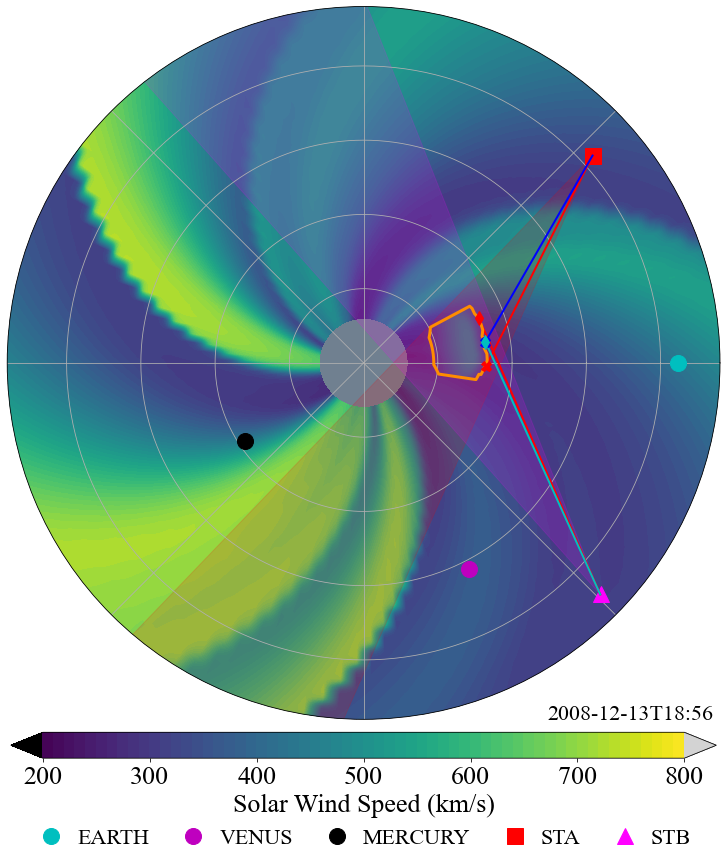

In [344]:
frametime = 24
tag='12Dec08_MAS_TRACE'

times = model.time_init + model.time_out
sta = H.Observer('STA', times)
stb = H.Observer('STB', times)
fig, ax = animation_frame(frametime*u.hour, model, sta_profile, stb_profile, sta, stb)

filename = "HUXt_CR{:03d}_{}_{}hours_eclipticplane.pdf".format(cr_num, tag, frametime)
filepath = os.path.join(model._figure_dir_, filename)            
fig.savefig(filepath, dpi=300, bbox_inches='tight')

***
***
# Reducing inner boundary #

#### Testing a single run of HUXt using a smaller inner boundary ####

Error, input lon outside range of model longitudes. Defaulting to closest longitude


,N & F,RMSE N & F,RMSE flank,RMSE nose,flank,nose
0,22.052278,0.611365,0.574528,0.658164,11.222794,10.829484


,N & F,RMSE N & F,RMSE flank,RMSE nose,RMSE sec flank,flank,nose,sec flank
0,42.8159,0.740893,0.715999,0.761583,0.745086,18.455554,24.360346,19.985522


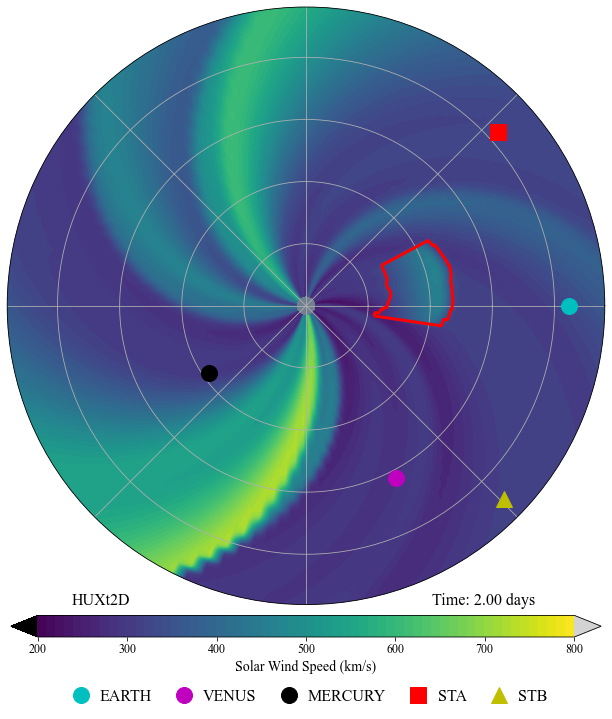

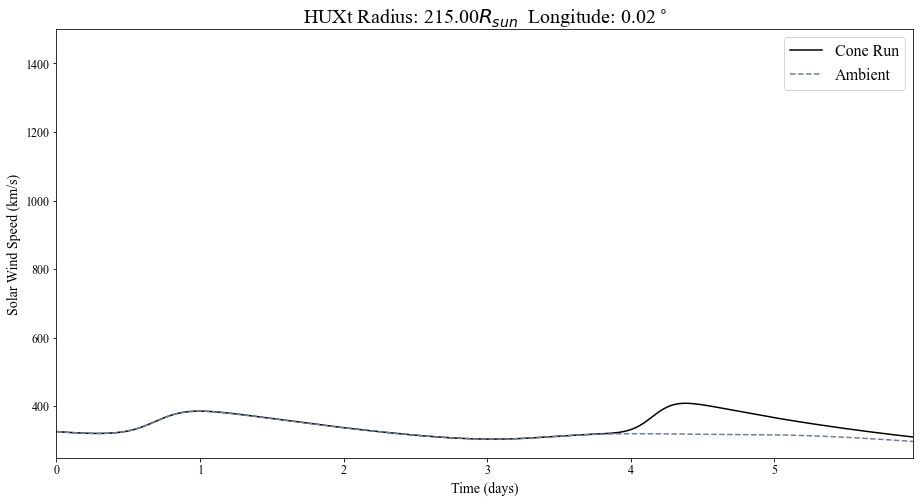

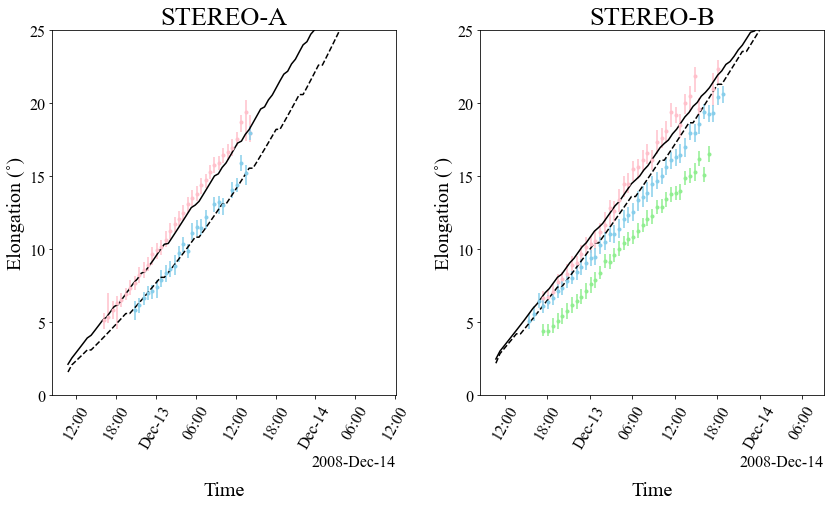

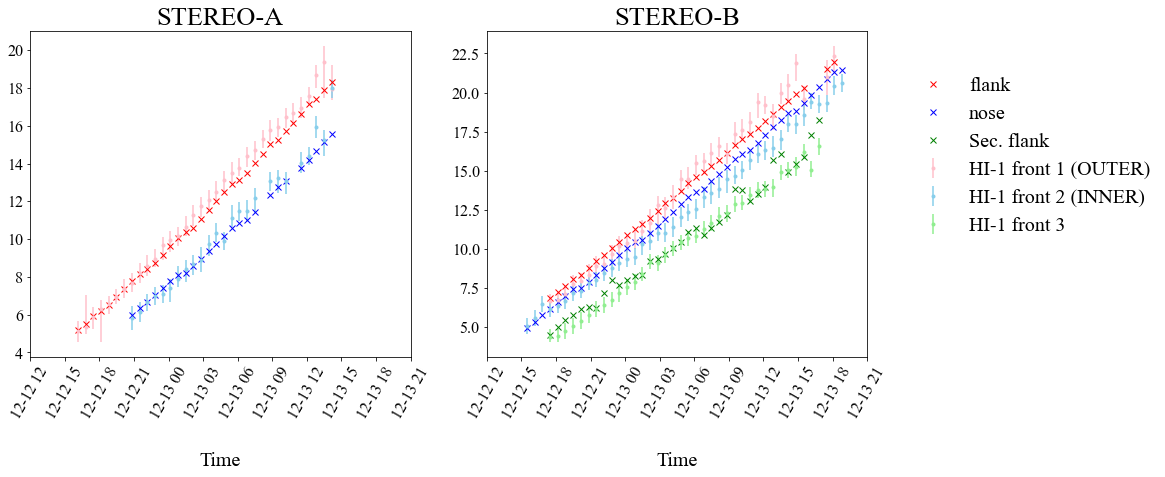

Model inital time:  2008-12-12 10:46:49.895
Leading edge transit time: 3.9798 d
Leading edge arrival time at Earth: 2008-12-16 10:17:45.864
Leading edge arrival speed at Earth: 333.53 km / s


,# obs,TIME A,RMSE flank A,RMSE nose A,RMSE two A,TIME B,RMSE flank B,RMSE nose B,RMSE two B,total error A,count A,total error B,count B,error combined,count combined,RMSE combined
0,1.0,NaT,NaN,NaN,NaN,2008-12-12 15:29:37,NaN,0.110520,0.110520,NaN,NaN,0.012215,1.0,NaN,NaN,NaN
1,2.0,2008-12-12 16:09:01,0.060507,NaN,0.060507,2008-12-12 16:09:36,NaN,0.183116,0.183116,0.003661,1.0,0.067063,2.0,0.070724,3.0,0.153540
2,3.0,2008-12-12 16:49:01,0.112532,NaN,0.112532,2008-12-12 16:49:37,NaN,0.445012,0.445012,0.025327,2.0,0.594107,3.0,0.619434,5.0,0.351975
3,4.0,2008-12-12 17:29:01,0.098325,NaN,0.098325,2008-12-12 17:29:37,0.219666,0.385859,0.358832,0.029003,3.0,0.643802,5.0,0.672805,8.0,0.290001
4,5.0,2008-12-12 18:09:01,0.103695,NaN,0.103695,2008-12-12 18:09:36,0.391886,0.358411,0.368286,0.043010,4.0,0.949440,7.0,0.992450,11.0,0.300371
5,6.0,2008-12-12 18:49:01,0.093350,NaN,0.093350,2008-12-12 18:49:36,0.451513,0.355313,0.390026,0.043571,5.0,1.369079,9.0,1.412650,14.0,0.317653
6,7.0,2008-12-12 19:29:01,0.085227,NaN,0.085227,2008-12-12 19:29:36,0.419314,0.343065,0.372602,0.043582,6.0,1.527155,11.0,1.570736,17.0,0.303968
7,8.0,2008-12-12 20:09:01,0.079128,NaN,0.079128,2008-12-12 20:09:36,0.414073,0.325049,0.361890,0.043829,7.0,1.702540,13.0,1.746369,20.0,0.295497
8,9.0,2008-12-12 20:49:01,0.082352,0.165844,0.095312,2008-12-12 20:49:36,0.424006,0.307580,0.358714,0.081760,9.0,1.930134,15.0,2.011894,24.0,0.289532
9,10.0,2008-12-12 21:29:01,0.079750,0.172518,0.103029,2008-12-12 21:29:36,0.407190,0.305815,0.351120,0.116766,11.0,2.095854,17.0,2.212619,28.0,0.281109


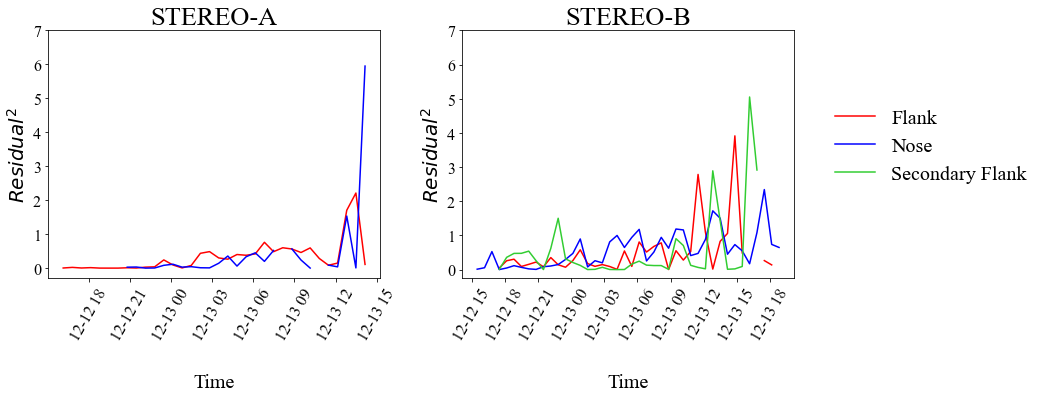

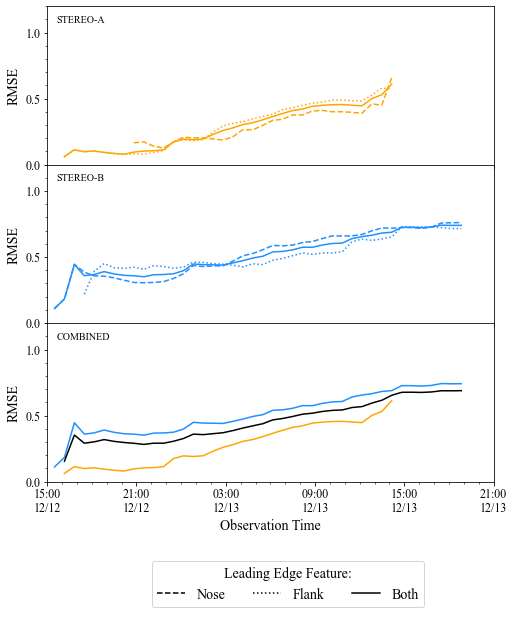

In [61]:
# Tag for file management. Event: 12 December 2008
event = "12Dec08_r=8_TEST"

# CME conditions
t_launch = 0.0 * u.day
longitude = 10 * u.deg
latitude = 9 * u.deg
width = 42 * u .deg
v = 600 * (u.km/u.s)
thickness = 16.9 * u.solRad

# HUXt conditions
v_boundary = np.flip([2.361374481276616564e+02, 2.240716540668226173e+02, 2.376358249750887524e+02, 2.672482825902510513e+02, 3.096930808344839647e+02, 3.746892075320072308e+02, 4.268668006326229829e+02, 4.456230409562588761e+02, 4.325098393596861115e+02, 3.923976427092088670e+02, 4.160318741275664820e+02, 5.042482225194921739e+02, 5.947393810828092455e+02, 6.654072046028741170e+02, 6.917310550116643526e+02, 6.800427872609535598e+02, 6.219320569550533264e+02, 5.444059259203741021e+02, 5.043734613245545120e+02, 4.865263506790949464e+02, 4.849001221974726263e+02, 5.045156599835149223e+02, 5.157868414718000167e+02, 5.115173862842027006e+02, 4.783484024373857437e+02, 4.105433314643044014e+02, 3.252113536761797832e+02, 2.718381068427589753e+02, 2.611473445493025451e+02, 2.703445822983272251e+02, 2.879318070637758638e+02, 2.935649302292242169e+02, 2.913420114766625488e+02, 2.875243364183726271e+02, 2.758837083349550880e+02, 2.646586033040824191e+02, 2.620296606197267693e+02, 2.587181867060620561e+02, 2.583143812807093127e+02, 2.711622648112132197e+02, 2.895073025814325547e+02, 3.236093677154411807e+02, 3.602300486613148678e+02, 3.901021949691497639e+02, 4.000613537591571003e+02, 3.943689844061491954e+02, 3.953941447719399775e+02, 4.148021072583192677e+02, 4.417805902433387359e+02, 4.475472602689640098e+02, 4.214612344162281943e+02, 3.691015029453656098e+02, 3.122498162083122111e+02, 3.076938832484911472e+02, 3.321704537666684587e+02, 3.237507334340671150e+02, 3.621217972086897703e+02, 4.086377362649376437e+02, 4.435046064447465142e+02, 4.674792239491621331e+02, 4.799666692694719927e+02, 4.660162447073083172e+02, 4.706506215244046416e+02, 5.282817264033329820e+02, 5.824612174466126362e+02, 5.781493288632007079e+02, 5.519533093062667604e+02, 5.210893551054840600e+02, 4.711116992875964797e+02, 4.139039864812964993e+02, 3.685148444664304748e+02, 3.251115004054694282e+02, 2.944497484406588228e+02, 3.031728641854660964e+02, 3.017908650651369271e+02, 2.743621772706765114e+02, 2.753093603743015478e+02, 3.077932819486480867e+02, 3.142715901784403059e+02, 3.064569671412821776e+02, 2.972113560702332506e+02, 2.853275333911390703e+02, 2.781041597484824592e+02, 2.829676208301811471e+02, 2.874501592038274111e+02, 2.966814584993215362e+02, 3.135194107222907860e+02, 3.460091136549031603e+02, 3.814157744293487440e+02, 3.956749772192871433e+02, 3.684143935201673230e+02, 3.216986131456232556e+02, 2.792803446540552841e+02, 2.460060315632212564e+02, 2.535853141438094838e+02, 2.757920731764543234e+02, 2.940431313281729899e+02, 2.966822515328578334e+02, 2.954926028486351584e+02, 2.964600448988716721e+02, 2.986598892164937524e+02, 2.920602210256048465e+02, 2.862971285267943813e+02, 2.868135105926763799e+02, 2.948319974536670998e+02, 3.041351166652279971e+02, 2.854976713451857790e+02, 2.751327922228102238e+02, 2.699486953595605314e+02, 2.530033160147730484e+02, 2.300846477066176874e+02, 2.160876697185309183e+02, 2.211210117332515495e+02, 2.552383171466590284e+02, 3.045731933828458864e+02, 3.142951676630700035e+02, 2.933001971616943706e+02, 2.724793215158809971e+02, 2.577975418023809198e+02, 2.419712959689771878e+02, 2.507924724446661173e+02, 2.696897715708585679e+02, 2.776005233833919306e+02, 2.774424641305166119e+02, 2.763144001268291845e+02, 2.773574489888984544e+02, 2.629291468608762443e+02, 2.292533503180667935e+02], axis=0)* (u.km/u.s)
# tomographySW = pd.read_csv(r"CorTom_CR2077.csv", header=None)
# tomoboundary = tomographySW[0].to_numpy()
# v_inner = tomoboundary * (u.km/u.s)
cr_num = 2077
cr_lon_init = 67.966 * u.deg    # 67.966
simtime = 6 * u.day

cme = H.ConeCME(t_launch=t_launch, longitude=longitude, latitude=latitude, width=width, v=v, thickness=thickness, initial_height = 8*u.solRad)
cme_list = [cme]

# Method One
#------------
# event = '12Dec08_r=8_v=600_lon=6'
v_inner = H.map_v_boundary_inwards(v_boundary, 30*u.solRad, 8*u.solRad)
model = H.HUXt(v_boundary=v_inner, cr_num=cr_num, cr_lon_init=cr_lon_init, simtime=simtime, dt_scale=4, r_min = 8*u.solRad)

model.solve(cme_list, save=False, tag=event)
model.plot(2*u.d, field='cme', save=False, tag=event)
model.plot_timeseries(1*u.AU, lon=0.0*u.deg,field='both', save=False, tag=event)
# model.animate('cme', tag=event)
A,B = huxt_t_e_profile_fast(cme)
elongation_plot(cme, 'HI1',save=False, tag=event)
errorA, errorB = deterministic_error(cme, print_RMSE=True, plot=True, save=False)
compute_earth_arrival(cme, print_values=True, plot=False)
dfeight = cumulativeRMSE(cme, figure=True, savefig=True)
display(dfeight)
# Method Two
#------------
# event = "12Dec08_r=8_02"
# model = H.HUXt(v_boundary=v_boundary, cr_num=cr_num, cr_lon_init=cr_lon_init, simtime=simtime, dt_scale=4, map_inwards=True, r_min = 8*u.solRad)

# model.solve(cme_list, save=True, tag=event)
# model.plot(2*u.d, field='cme', save=True, tag=event)
# model.plot_timeseries(1*u.AU, lon=0.0*u.deg,field='both', save=True, tag=event)
# #model.animate('cme', tag=event)
# #animate_schematic(cr_num = cr_num, tag=event) 
# elongation_plot('HI1',save=True, tag=event)
# # deterministic_residuals(plot=True, save=False, tag=event)

Warning, multiple matches found, selecting match with greatest target overlap
Warning, multiple matches found, selecting match with greatest target overlap
Warning, multiple matches found, selecting match with greatest target overlap
Warning, multiple matches found, selecting match with greatest target overlap
Warning, multiple matches found, selecting match with greatest target overlap
CME width: 46.0 deg
CME width: 46.0 deg
CME width: 46.0 deg
CME width: 46.0 deg
CME width: 46.0 deg
CME width: 46.0 deg
CME width: 46.0 deg
CME width: 46.0 deg
CME width: 46.0 deg
CME width: 46.0 deg
CME width: 46.0 deg
CME width: 46.0 deg
CME width: 46.0 deg


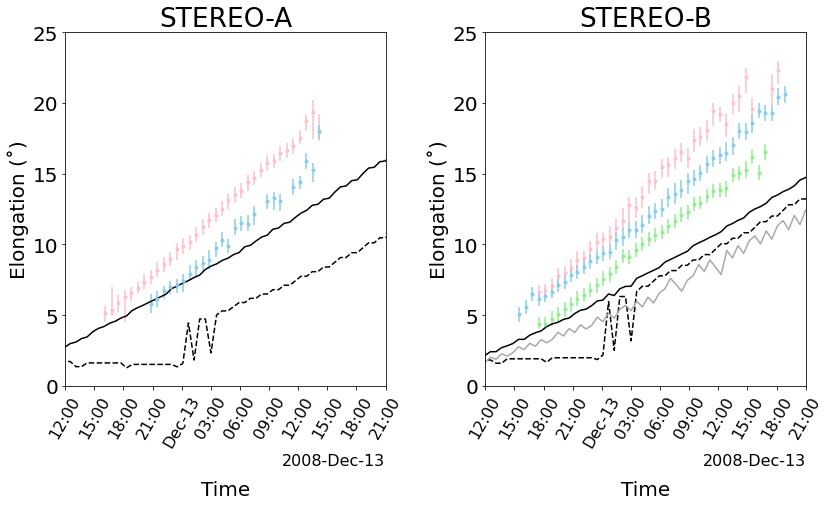

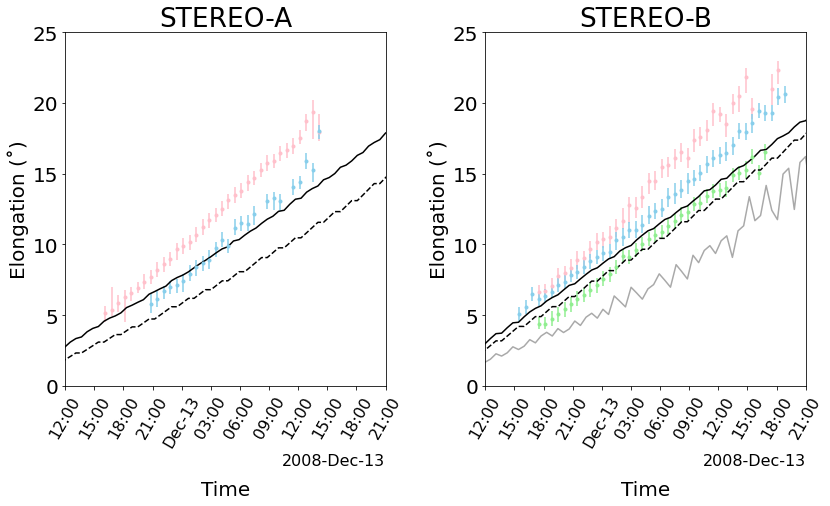

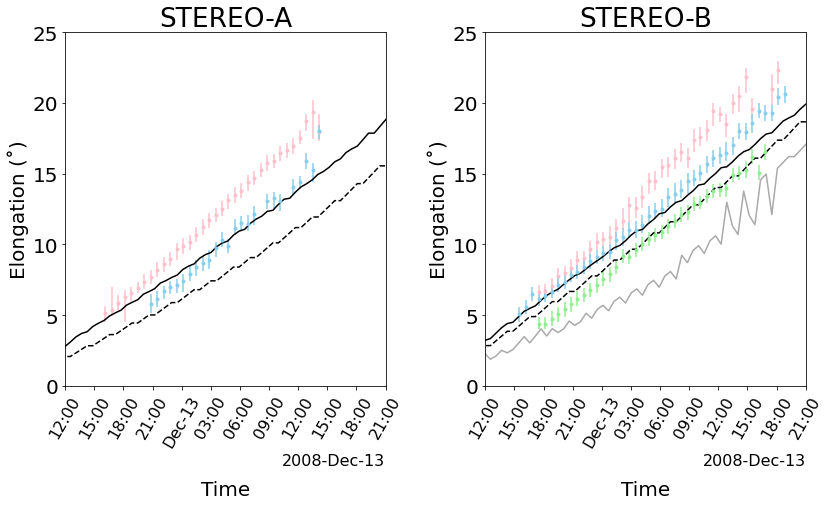

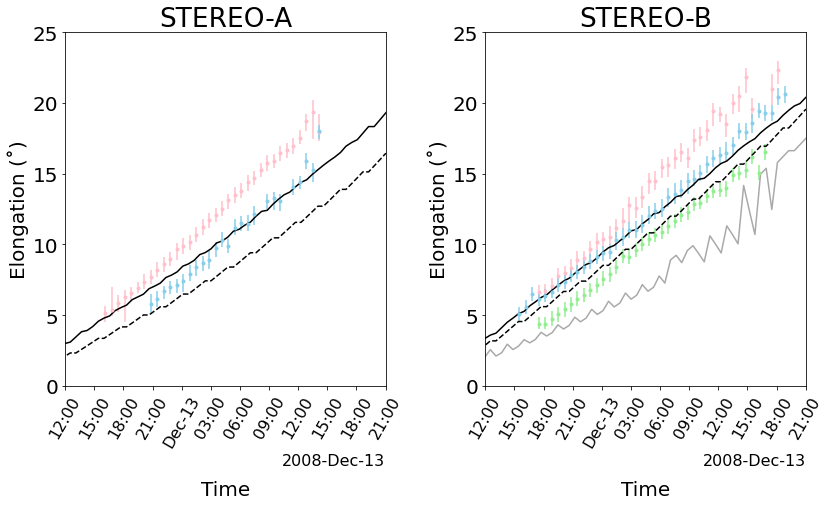

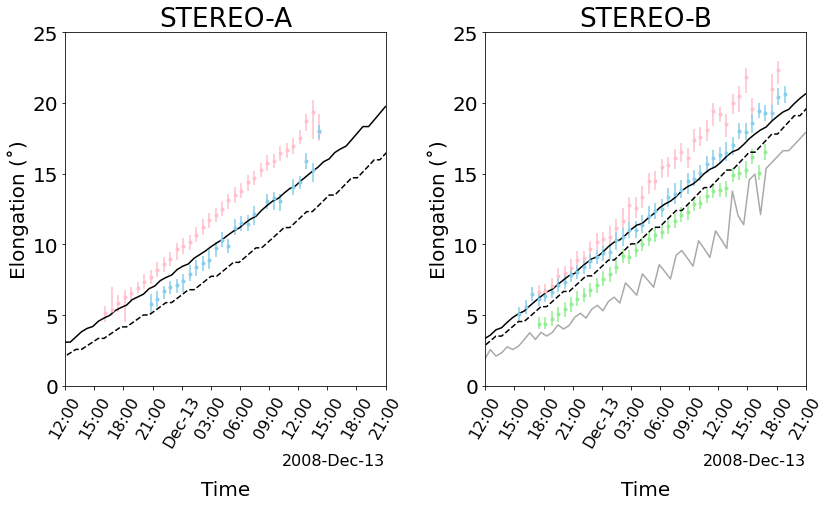

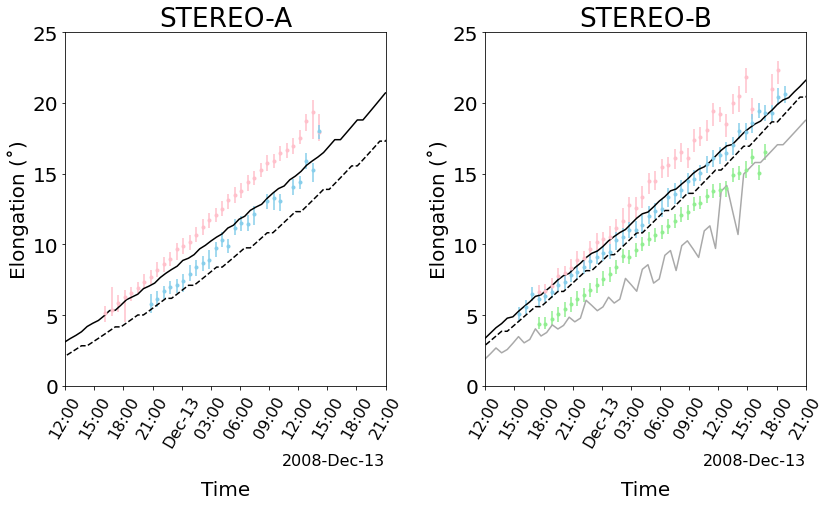

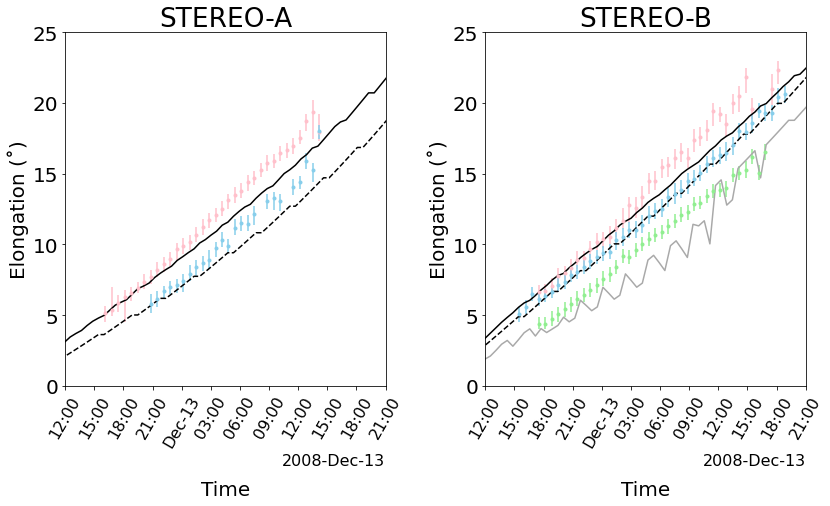

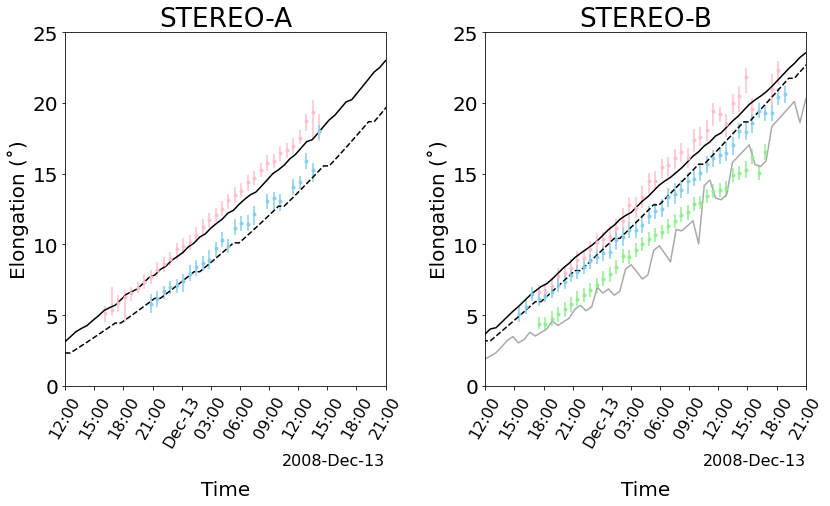

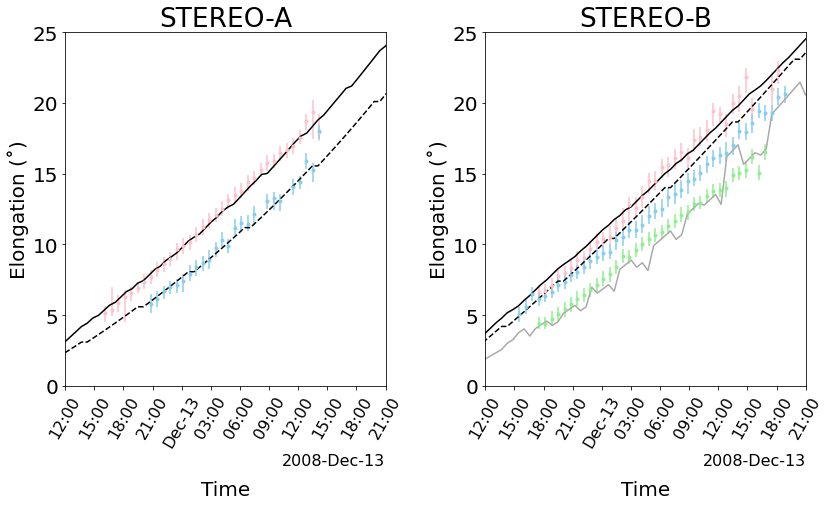

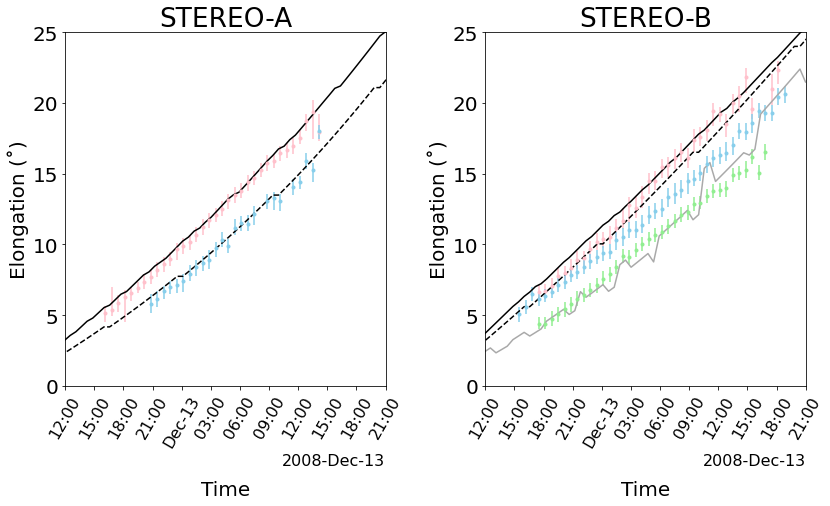

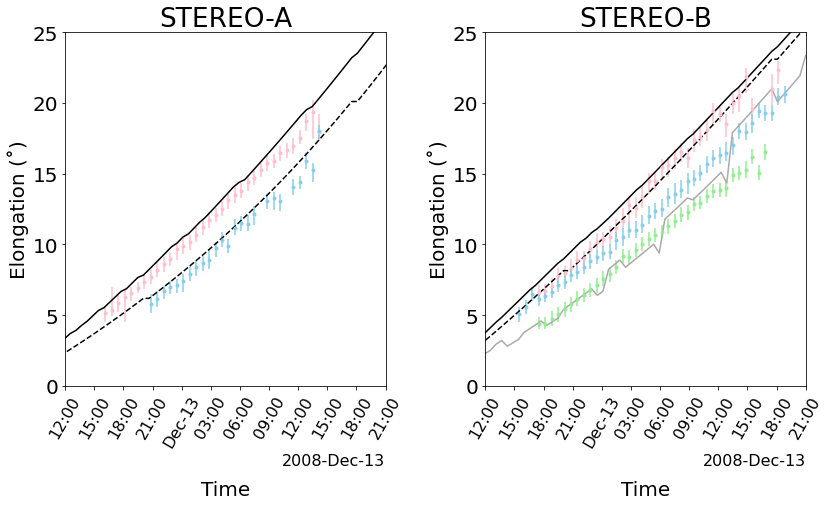

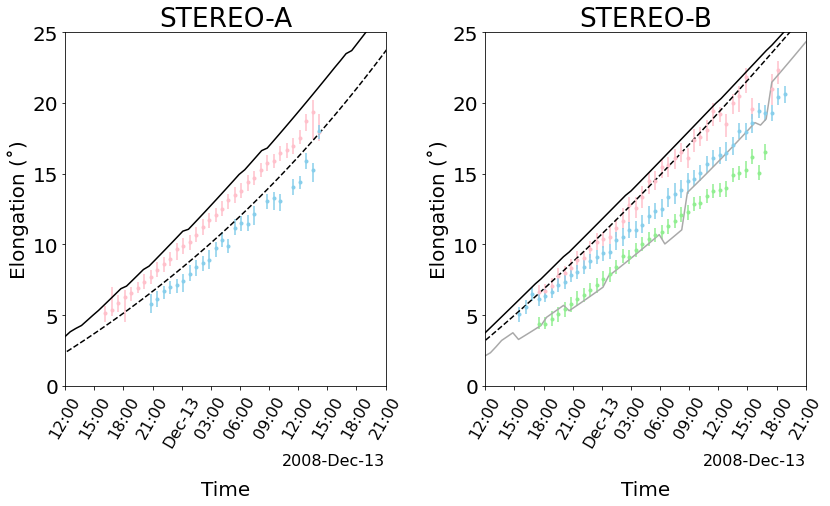

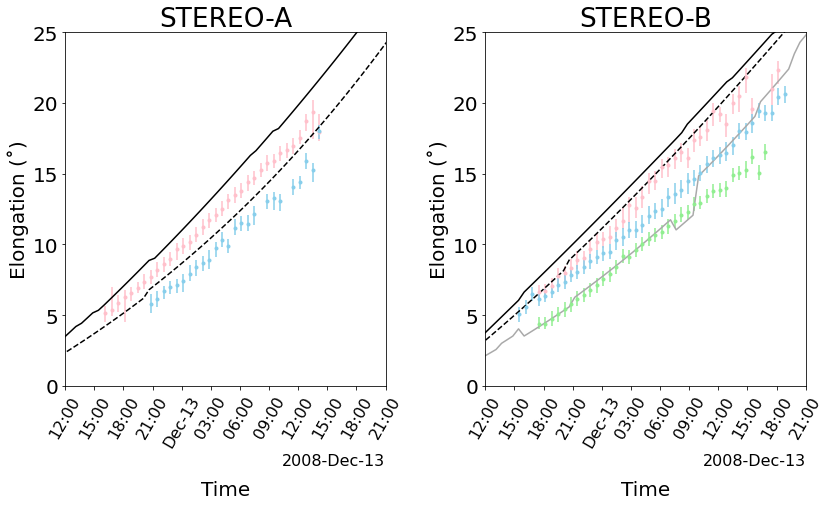

In [1454]:
speed_list = [300,350,380,400,410,450,500,550,600,650,700, 750,800] 
# thick_list = np.arange(2,15.1,0.25)

infoA = pd.DataFrame()

for i,val in enumerate(speed_list):
    # Tag for file management. Event: 12 December 2008
    event = "12Dec08_r=8_speed={}".format(val)

    # CME conditions
    t_launch = 0.0 * u.day
    longitude = 10 * u.deg
    latitude = 10.0 * u.deg
    width = 46.0*u .deg
    v = val * (u.km/u.s)
    thickness = 15 * u.solRad

    # HUXt conditions
    v_boundary = np.flip([.361374481276616564e+02, 2.240716540668226173e+02, 2.376358249750887524e+02, 2.672482825902510513e+02, 3.096930808344839647e+02, 3.746892075320072308e+02, 4.268668006326229829e+02, 4.456230409562588761e+02, 4.325098393596861115e+02, 3.923976427092088670e+02, 4.160318741275664820e+02, 5.042482225194921739e+02, 5.947393810828092455e+02, 6.654072046028741170e+02, 6.917310550116643526e+02, 6.800427872609535598e+02, 6.219320569550533264e+02, 5.444059259203741021e+02, 5.043734613245545120e+02, 4.865263506790949464e+02, 4.849001221974726263e+02, 5.045156599835149223e+02, 5.157868414718000167e+02, 5.115173862842027006e+02, 4.783484024373857437e+02, 4.105433314643044014e+02, 3.252113536761797832e+02, 2.718381068427589753e+02, 2.611473445493025451e+02, 2.703445822983272251e+02, 2.879318070637758638e+02, 2.935649302292242169e+02, 2.913420114766625488e+02, 2.875243364183726271e+02, 2.758837083349550880e+02, 2.646586033040824191e+02, 2.620296606197267693e+02, 2.587181867060620561e+02, 2.583143812807093127e+02, 2.711622648112132197e+02, 2.895073025814325547e+02, 3.236093677154411807e+02, 3.602300486613148678e+02, 3.901021949691497639e+02, 4.000613537591571003e+02, 3.943689844061491954e+02, 3.953941447719399775e+02, 4.148021072583192677e+02, 4.417805902433387359e+02, 4.475472602689640098e+02, 4.214612344162281943e+02, 3.691015029453656098e+02, 3.122498162083122111e+02, 3.076938832484911472e+02, 3.321704537666684587e+02, 3.237507334340671150e+02, 3.621217972086897703e+02, 4.086377362649376437e+02, 4.435046064447465142e+02, 4.674792239491621331e+02, 4.799666692694719927e+02, 4.660162447073083172e+02, 4.706506215244046416e+02, 5.282817264033329820e+02, 5.824612174466126362e+02, 5.781493288632007079e+02, 5.519533093062667604e+02, 5.210893551054840600e+02, 4.711116992875964797e+02, 4.139039864812964993e+02, 3.685148444664304748e+02, 3.251115004054694282e+02, 2.944497484406588228e+02, 3.031728641854660964e+02, 3.017908650651369271e+02, 2.743621772706765114e+02, 2.753093603743015478e+02, 3.077932819486480867e+02, 3.142715901784403059e+02, 3.064569671412821776e+02, 2.972113560702332506e+02, 2.853275333911390703e+02, 2.781041597484824592e+02, 2.829676208301811471e+02, 2.874501592038274111e+02, 2.966814584993215362e+02, 3.135194107222907860e+02, 3.460091136549031603e+02, 3.814157744293487440e+02, 3.956749772192871433e+02, 3.684143935201673230e+02, 3.216986131456232556e+02, 2.792803446540552841e+02, 2.460060315632212564e+02, 2.535853141438094838e+02, 2.757920731764543234e+02, 2.940431313281729899e+02, 2.966822515328578334e+02, 2.954926028486351584e+02, 2.964600448988716721e+02, 2.986598892164937524e+02, 2.920602210256048465e+02, 2.862971285267943813e+02, 2.868135105926763799e+02, 2.948319974536670998e+02, 3.041351166652279971e+02, 2.854976713451857790e+02, 2.751327922228102238e+02, 2.699486953595605314e+02, 2.530033160147730484e+02, 2.300846477066176874e+02, 2.160876697185309183e+02, 2.211210117332515495e+02, 2.552383171466590284e+02, 3.045731933828458864e+02, 3.142951676630700035e+02, 2.933001971616943706e+02, 2.724793215158809971e+02, 2.577975418023809198e+02, 2.419712959689771878e+02, 2.507924724446661173e+02, 2.696897715708585679e+02, 2.776005233833919306e+02, 2.774424641305166119e+02, 2.763144001268291845e+02, 2.773574489888984544e+02, 2.629291468608762443e+02, 2.292533503180667935e+02], axis=0)* (u.km/u.s)
    cr_num = 2077
    cr_lon_init = 67.966 * u.deg    # 67.966
    simtime = 6.0 * u.day

    cme = H.ConeCME(t_launch=t_launch, longitude=longitude, latitude=latitude, width=width, v=v, thickness=thickness)
    cme_list = [cme]

    # Method One
    #------------
    # event = '12Dec08_r=8_v=600_lon=6'
#     v_inner = H.map_v_boundary_inwards(v_boundary, 30*u.solRad, 8*u.solRad)
    model = H.HUXt(v_boundary=v_boundary, cr_num=cr_num, cr_lon_init=cr_lon_init, simtime=simtime, dt_scale=4, r_min = 8*u.solRad, map_inwards=True)

    model.solve(cme_list, save=True, tag=event)
#     model.plot(2*u.d, field='cme', save=True, tag=event)
#     model.plot_timeseries(1*u.AU, lon=0.0*u.deg,field='both', save=True, tag=event)
    # model.animate('cme', tag=event)
    elongation_plot(cme, 'HI1',save=True, tag=event)
    errorA, errorB = deterministic_error(cme, print_RMSE=False, plot=False, save=False)
    
    infoA = infoA.append({'speed init': val,
                       'RMSE nose A': errorA['RMSE nose'][0],
                       'RMSE flank A':errorA['RMSE flank'][0],
                        'RMSE N&F A':errorA['RMSE N & F'][0],
                       'RMSE nose B': errorB['RMSE nose'][0],
                       'RMSE flank B': errorB['RMSE flank'][0],
                       'RMSE sec flank B': errorB['RMSE sec flank'][0],
                       'RMSE N&F B':errorB['RMSE N & F'][0]}, ignore_index=True)
    
    

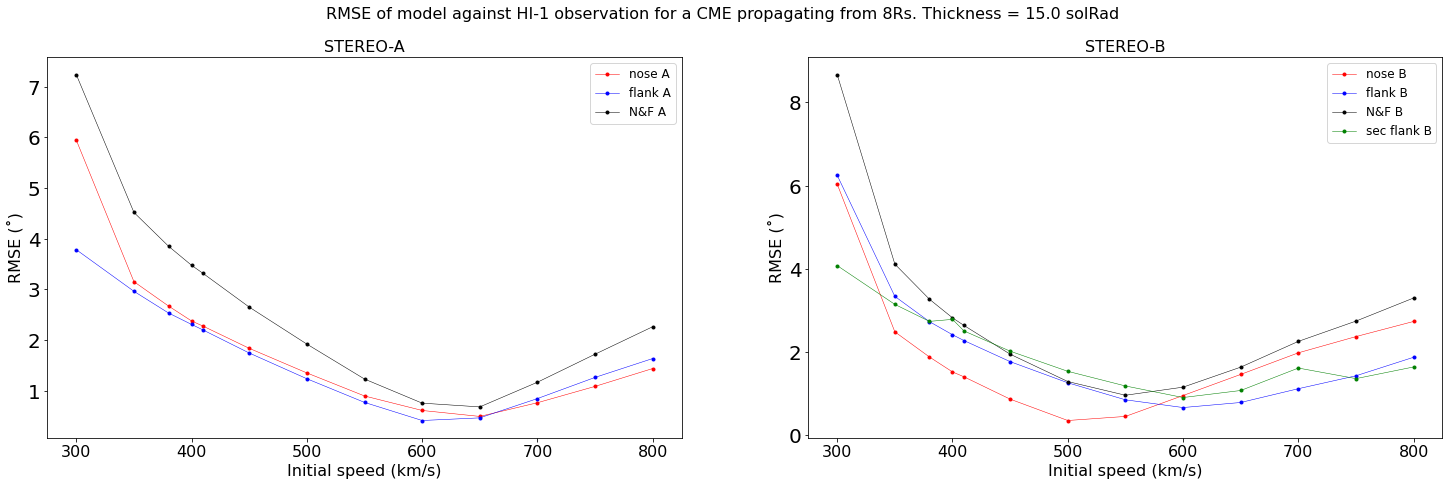

In [1386]:
fig,ax = plt.subplots(1,2, figsize=(25,7))
fig.suptitle('RMSE of model against HI-1 observation for a CME propagating from 8Rs. Thickness = {}'.format(cme.thickness), fontsize=16)

ax[0].plot(infoA['speed init'],infoA['RMSE nose A'],'r.-', lw=0.5, label='nose A')
ax[0].plot(infoA['speed init'],infoA['RMSE flank A'],'b.-', lw=0.5, label='flank A')
ax[0].plot(infoA['speed init'],infoA['RMSE N&F A'],'k.-', lw=0.5, label='N&F A')
# ax[0].axvline(350, lw=0.5, ls='--')
# ax[0].axvline(380, lw=1, ls='--')
# ax[0].axvline(410, lw=0.5, ls='--')


ax[1].plot(infoA['speed init'],infoA['RMSE nose B'],'r.-', lw=0.5, label='nose B')
ax[1].plot(infoA['speed init'],infoA['RMSE flank B'],'b.-', lw=0.5, label='flank B')
ax[1].plot(infoA['speed init'],infoA['RMSE N&F B'],'k.-', lw=0.5, label='N&F B')
ax[1].plot(infoA['speed init'],infoA['RMSE sec flank B'],'g.-', lw=0.5, label='sec flank B')
# ax[1].axvline(350, lw=0.5, ls='--')
# ax[1].axvline(380, lw=1, ls='--')
# ax[1].axvline(410, lw=0.5, ls='--')

ax[0].set_title('STEREO-A', fontsize=16)
ax[0].set_xlabel('Initial speed (km/s)', fontsize=16)
ax[0].set_ylabel('RMSE (˚)', fontsize=16)
ax[0].legend(fontsize=12)
ax[1].set_title('STEREO-B', fontsize=16)
ax[1].set_xlabel('Initial speed (km/s)', fontsize=16)
ax[1].set_ylabel('RMSE (˚)', fontsize=16)
ax[1].legend(fontsize=12)

cr_num = np.int32(model.cr_num.value)
filename = "HUXt_CR{:03d}_12Dec08_r=8_thick={}_vsensitivity.png".format(cr_num, cme.thickness.value)
filepath = os.path.join(model._figure_dir_, filename)            
fig.savefig(filepath, dpi=150, bbox_inches='tight')


***
PAPER FIGURES

    1) Elongation time plots

In [326]:
def ensemble_elongation_plot_fig(FOV, n_ens = 100, best_index='deterministic', save=False, tag=''):
    """
    Produces elongation-time plots of the identified feature with deterministic run in black, ensemble runs in grey, and 
    HI observation in coloured error-bars. 
    Params:
    ---------
    FOV: Either "HI1" or "HI2"
    feature: Either "initial flank", "nose", "secondary flank"
    n_ens: Number of ensemble memebers.
    save: False. Saves figure to HUXt>figures.
    tag: Tag names of files
    Returns:
    ---------
    Single figure of 2x1 suplots of elongation-time profiles for one feature.
    
    """
    
    project_dirs = H._setup_dirs_()
    
    # LOAD DATA
    #===========
    
    # Load Ensemble Data
    ens_profileA, ens_profileB = load_csv_file(file = "elongation profiles", tag=tag)
    
    # Load Best Run Data
    if best_index == 'deterministic':
        path = os.path.join(project_dirs['HUXt_data'], "HUXt_CR2077_{}_deterministic.hdf5".format(tag))
    else:
        path = os.path.join(project_dirs['HUXt_data'], "HUXt_CR2077_{}_ensemble_{}*.hdf5".format(tag,best_index-1))
    ensemble_run = glob.glob(path)[0]
    model, cme_list = H.load_HUXt_run(ensemble_run)
    cme = cme_list[0]
    sta_profile, stb_profile = huxt_t_e_profile_fast(cme)

    #----------------------
    
    # Identify plotting limits using ther deterministic run
    #===========
    
    # HI-1: maximum elongation of 25˚
    if FOV == 'HI1':
        ymax = 25.0
        for i in range(len(ens_profileA)):
            if ens_profileA.el_n_deter[i] < 30:    # this run is equal to the huxta output from "HUXt_CR2077_12Dec08.hdf5" file, which has not yet been read into the script
                FOVlimit_a = i
            if ens_profileB.el_n_deter[i] < 30:    # this run is equal to the huxtb output from "HUXt_CR2077_12Dec08.hdf5" file, which has not yet been read into the script
                FOVlimit_b = i

    # HI-2: maximum elongation of ?˚
    elif FOV == 'HI2':
        ymax = np.max(ens_profileA.el)
        FOVlimit_a = len(ens_profileA)
        FOVlimit_b = len(ens_profileB)
        
    else:
        print ("Field of view is not valid. Please use HI1 or HI2.")
        
    # Format Time
#     HItimeA = Time(HItimeA).datetime
    time_a = Time(ens_profileA.time, format = 'jd').datetime[0:FOVlimit_a]
    time_b = Time(ens_profileB.time, format = 'jd').datetime[0:FOVlimit_b]
    
    #----------------------
    # Figure
    #===========
    
    # Format Figure
    plt.rcParams.update({'font.size': 22, 'axes.labelsize':22, 'legend.fontsize':20,'xtick.labelsize': 16.0,'ytick.labelsize': 20.0,})
    fig, ((ax1a, ax1b),(ax2a,ax2b),(ax3a,ax3b)) = plt.subplots(3, 2, figsize = [9,20])
    plt.subplots_adjust(wspace=0.2, hspace=0.1)
    
    ax = [ax1a, ax1b,ax2a,ax2b,ax3a,ax3b]
    axislist = ["ax1a", "ax1b","ax2a","ax2b","ax3a","ax3b"]
    for nn,axs in enumerate(ax):
        axs.yaxis.set_major_locator(MultipleLocator(5))
        axs.yaxis.set_minor_locator(MultipleLocator(1))

        axs.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M\n%m/%d'))
        axs.xaxis.set_major_locator(mdates.HourLocator(interval=12))
        axs.xaxis.set_minor_locator(mdates.HourLocator(interval=3))
        
        axs.set_ylim(bottom=0, top=ymax) 
        axs.set_xlim(Time('2008-12-12T12:00:00',format='isot').datetime,Time('2008-12-13T21:00:00', format='isot').datetime)
        
        # If left column
        if str(axislist[nn])[3]=='a':
            axs.set_ylabel('Elongation (˚)')
            
            axs.tick_params(axis= 'y', which='major', direction="inout", width=2, length=7)
            axs.tick_params(axis= 'x', which='major', direction="out", width=2, length=7)
            axs.tick_params(axis= 'y', which='minor', direction="inout", width=1, length=2)
            axs.tick_params(axis= 'x', which='minor', direction="out", width=1, length=2)
        
        # If right column
        else:
            axs.tick_params(axis= 'y', which='major', direction="in", width=2, length=7)
            axs.tick_params(axis= 'x', which='major', direction="out", width=2, length=7)
            axs.tick_params(axis= 'y', which='minor', direction="in", width=1, length=2)
            axs.tick_params(axis= 'x', which='minor', direction="out", width=1, length=2)
    
        if str(axislist[nn])[2]!='3':
            axs.set_xticks([])
            
    ax1a.set_title('STEREO-A')
    ax1b.set_title('STEREO-B')
    ax3a.set_xlabel('Time')
    ax3b.set_xlabel('Time')
 
    plt.setp(ax1b.get_yticklabels(), visible=False)
    plt.setp(ax2b.get_yticklabels(), visible=False)
    plt.setp(ax3b.get_yticklabels(), visible=False)
    

    
    
    plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.3, hspace=0.1, wspace=0.0)
    
    #---------------
    # Plot Figure
    
    # PLOT ROW 1: HI Elongation Profile
    ax1a.errorbar(HItimeA,front1a['el'],yerr=(front1a['el_lo_error'], front1a['el_hi_error']), fmt='.', lw=1, color='red', alpha=0.7, label='HI-1 front 1')
    ax1a.errorbar(HItimeA,front2a['el'],yerr=(front2a['el_lo_error'], front2a['el_hi_error']), fmt='.', lw=1, color='blue', alpha=0.7,  label='HI-1 front 2')

    ax1b.errorbar(HItimeB,front1b['el'],yerr=(front1b['el_lo_error'], front1b['el_hi_error']), fmt='.', lw=1, color='red', alpha=0.7,  label='HI-1 front 1 (OUTER)')
    ax1b.errorbar(HItimeB,front2b['el'],yerr=(front2b['el_lo_error'], front2b['el_hi_error']), fmt='.', lw=1, color='blue', alpha=0.7,  label='HI-1 front 2 (INNER)')
#     ax1b.errorbar(HItimeB,front3b['el'],yerr=(front3b['el_lo_error'], front3b['el_hi_error']), fmt='.', lw=1, color='green', alpha=0.7,  label='HI-1 front 3')


    # PLOT ROW 2: Ensemble plot
    for i in range(n_ens):
        yaxisplot_flank = "el_{:02d}".format(i)
        yaxisplot_nose = "el_n_{:02d}".format(i)
        ax2a.plot(time_a, ens_profileA[yaxisplot_flank][0:FOVlimit_a], 'lightpink', linewidth=1, zorder=0, alpha=0.2)
        ax2a.plot(time_a, ens_profileA[yaxisplot_nose][0:FOVlimit_a], 'lightskyblue', linewidth=1, zorder=0, alpha=0.2)
        ax2b.plot(time_b, ens_profileB[yaxisplot_flank][0:FOVlimit_b], 'lightpink', linewidth=1, zorder=0, alpha=0.2)
        ax2b.plot(time_b, ens_profileB[yaxisplot_nose][0:FOVlimit_b], 'lightskyblue', linewidth=1, zorder=0, alpha=0.2)
        
    ax2a.errorbar(HItimeA,front1a['el'],yerr=(front1a['el_lo_error'], front1a['el_hi_error']),fmt='.', color='red', label='HI-1 front 1', linewidth=1, zorder=5)
#     ax2a.plot(time_a, ens_profileA.el_deter[0:FOVlimit_a],'red', label='Initial Flank', linewidth=1, zorder=1)
        
    ax2a.errorbar(HItimeA,front2a['el'],yerr=(front2a['el_lo_error'], front2a['el_hi_error']), fmt='.', color='blue', label='HI-1 front 2', linewidth=1, zorder=5)
#     ax2a.plot(time_a, ens_profileA.el_n_deter[0:FOVlimit_a], 'blue', label='Nose', linewidth=1, zorder=1)   
          
    ax2b.errorbar(HItimeB,front1b['el'],yerr=(front1b['el_lo_error'], front1b['el_hi_error']), fmt='.', color='red', label='HI-1 front 1 (OUTER)', linewidth=1, zorder=5)
#     ax2b.plot(time_b, ens_profileB.el_deter[0:FOVlimit_b], 'red', label='Initial Flank', linewidth=1, zorder=1)
    
    ax2b.errorbar(HItimeB,front2b['el'],yerr=(front2b['el_lo_error'], front2b['el_hi_error']),fmt='.', color='blue', label='HI-1 front 2 (INNER)', linewidth=1, zorder=5)
#     ax2b.plot(time_b, ens_profileB.el_n_deter[0:FOVlimit_b], 'blue', label='Nose', linewidth=1, zorder=1)   
        

    # PLOT ROW 3: Best Ensemble Run

    ax3a.errorbar(HItimeA,front1a['el'],yerr=(front1a['el_lo_error'], front1a['el_hi_error']), fmt='.', lw=1, color='red', alpha=0.7,  label='HI-1 front 1')
    ax3a.errorbar(HItimeA,front2a['el'],yerr=(front2a['el_lo_error'], front2a['el_hi_error']), fmt='.', lw=1, color='blue', alpha=0.7,  label='HI-1 front 2')
    ax3a.plot(time_a, sta_profile.el[0:FOVlimit_a],'k', label='Initial Flank', lw=2)
    ax3a.plot(time_a, sta_profile.el_n[0:FOVlimit_a], 'k--', label='Nose', lw=2)
    
    ax3b.errorbar(HItimeB,front1b['el'],yerr=(front1b['el_lo_error'], front1b['el_hi_error']), fmt='.', lw=1, color='red', alpha=0.7,  label='HI-1 front 1 (OUTER)')
    ax3b.errorbar(HItimeB,front2b['el'],yerr=(front2b['el_lo_error'], front2b['el_hi_error']), fmt='.', lw=1, color='blue', alpha=0.7,  label='HI-1 front 2 (INNER)')
#     ax3b.errorbar(HItimeB,front3b['el'],yerr=(front3b['el_lo_error'], front3b['el_hi_error']), fmt='.', lw=1, color='green',  alpha=0.7, label='HI-1 front 3')
    ax3b.plot(time_b, stb_profile.el[0:FOVlimit_b], 'k', label='Initial Flank', lw=2)
    ax3b.plot(time_b, stb_profile.el_n[0:FOVlimit_b], 'k--', label='Nose', lw=2)
#     ax3b.plot(time_b, stb_profile.el_sec_flank[0:FOVlimit_b], 'darkgrey', label='Secondary Flank', lw=2)
    
    ax1a.annotate("a)", xy=(0.02, 0.93), xycoords="axes fraction", fontsize=20)
    ax2a.annotate("b)", xy=(0.02, 0.93), xycoords="axes fraction", fontsize=20)
    ax3a.annotate("c)", xy=(0.02, 0.93), xycoords="axes fraction", fontsize=20)
        
    if save:
        filename = "HUXt_CR2077_{}_{}_elongation_profile_fig.png".format(tag, FOV)
        filepath = os.path.join(model._figure_dir_, filename)            
        fig.savefig(filepath, dpi=300, bbox_inches='tight')
        
        filename = "HUXt_CR2077_{}_{}_elongation_profile_fig.pdf".format(tag, FOV)
        filepath = os.path.join(model._figure_dir_, filename)            
        fig.savefig(filepath, dpi=300, bbox_inches='tight')
        
    return

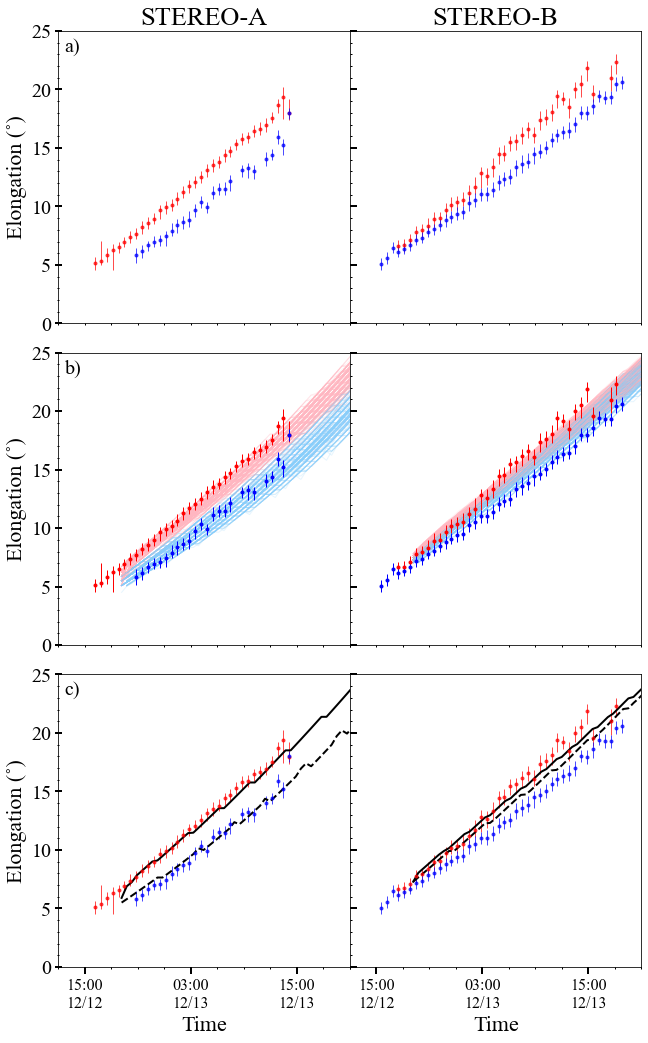

In [327]:
ensemble_elongation_plot_fig('HI1', n_ens = 200, best_index=199 , save=True, tag='12Dec08_n=200_r=30_PS=1')

In [266]:
list = ["ax1a", "ax1b","ax2a","ax2b","ax3a","ax3b"]
for nn,axs in enumerate (list):
    print(str(ax[nn])[3])

a
b
a
b
a
b


In [1]:
def ens_bar_plot(tag, save=False, tag_title=False):
    
    # Load info
    arrival_info = load_csv_file("arrival information", tag)
    A, B, MISC = load_csv_file("best fit run", tag)

    # Ensure deterministic run is in the data
    if len(arrival_info) == 200:         # Where 50 corresponds the the number of ensemble runs. Change this to N in the future.
        # Add deterministic arrival information 
        arrival_info = arrival_info.append({"Transit Time" : cme.earth_transit_time.value, 
                                            "Arrival Time" : cme.earth_arrival_time.jd,
                                            "Arrival Speed" : cme.earth_arrival_speed.value}, ignore_index=True)

    # Sort the dataframe in terms of arrival time
    sorted_arrival = arrival_info.sort_values(by=["Arrival Time"])
    sorted_arrival = sorted_arrival.reset_index(drop=True)
    no_unique_values = len(sorted_arrival["Arrival Time"].unique())

    # Make bins based on model outpout
    bins = []
    for i in range(no_unique_values):
        if i == 0:
            astroTimebins = Time(sorted_arrival["Arrival Time"][0], format='jd')
        else:
            astroTimebins = astroTimebins + model.dt_out
            astroTimebins = Time(astroTimebins, format='jd')
        bins.append(astroTimebins.value)

    # Generate freq of values
    freq = sorted_arrival["Arrival Time"].value_counts(sort=True)
    binfreq = sorted_arrival["Arrival Time"].value_counts(bins=bins, sort=True).rename_axis('unique_values').reset_index(name='counts')
    binfreqsort = binfreq.sort_values(by=["unique_values"])
    
    # drop invalid data that impacts statistical analysis
    for index,value in enumerate(arrival_info["Arrival Time"]):
        if value == Time('3000-01-01 00:00:00.000', format='iso').jd:
            arrival_info = arrival_info.drop([index])

    # Assign time to variables
    #---------------------------
    obsACE = Time('2008-12-16 07:00:00', format='iso').jd

    df = arrival_info[arrival_info["file"]== 'deterministic']
    deter_time = Time(df["Arrival Time"], format='jd')[0]

    dfA = A[A["Feature"]== 'N & F']
    STA_time = Time(dfA["Arrival Time"], format='jd')[0]

    dfB = B[B["Feature"]== 'N & F']
    STB_time = Time(dfB["Arrival Time"], format='jd')[0]

    dfMISC = MISC[MISC["Feature"]== 'Both Spacecrafts']
    STMISC_time = Time(dfMISC["Arrival Time"][0], format='iso')
    
    ens_mean = arrival_info['Arrival Time'].mean()
    ens_std = arrival_info['Arrival Time'].std()
    ens_skew = arrival_info['Arrival Time'].skew()

    # ----------------------------
    # Plot figure
    
    xlimmin = (arrival_info['Arrival Time'].min() - obsACE - 0.1) * 24
    xlimmax = (arrival_info['Arrival Time'].max() - obsACE + 0.1) * 24

    plt.figure(figsize=(12,6))
    plt.ylabel("Frequency")
    plt.xlabel("Time Error (hours)")
    plt.xlim(left=xlimmin, right=xlimmax)
    ax=plt.gca()
    ax.xaxis.set_major_locator(MultipleLocator(2))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    plt.ylim(top=40)
    
    plt.axvspan(xmin = - 1, xmax = 1, facecolor='grey', alpha=0.2, label="Obs. Arrival Uncertainty")
    plt.axvline(x = 0, color = 'k', linestyle = '-', linewidth = 2, label = 'Obs. Arrival Time')
    
    plt.bar((bins[0:no_unique_values-1]-obsACE)* 24, (binfreqsort["counts"].values[0:no_unique_values-1]), 
            width=34.8/60, align='edge', color='None', edgecolor='k')
    # plt.plot(bins[0:63]-obsACE,binfreqsort["counts"].values[0:63], 'kx')


    # Plot lines
    plt.axvline(x = (deter_time.jd - obsACE) *24, color='blue', label='Deterministic', linestyle=(0,(5,1)), linewidth=2)
    plt.axvline(x = (STA_time.jd - obsACE) *24, color='forestgreen', label='STRERO-A', linestyle=(0,(5,5)), linewidth=2)
    plt.axvline(x = (STB_time.jd - obsACE) *24, color='crimson', label='STRERO-B', linestyle='-.', linewidth=2)
    plt.axvline(x = (STMISC_time.jd - obsACE) *24, color='orange', label='Both', linestyle=(0,(5,10)), linewidth=2)
    
    # Mean & std
#     plt.axvspan(xmin = (ens_mean - ens_std - obsACE)*24, xmax = (ens_mean + ens_std - obsACE)*24, facecolor='m', alpha=0.025, label="Standard Deviation")
#     plt.axvline(x = (ens_mean - obsACE)*24, color='m', label='Mean', linestyle='-', linewidth=2)
    plt.text(xlimmax-0.5,37, 'Mean = {:.3f} hours'.format((ens_mean-obsACE)*24), fontsize=14, ha='right')
    plt.text(xlimmax-0.5, 35, 'Std = {:.3f} hours'.format(ens_std*24), fontsize=14, ha='right')
    plt.text(xlimmax-0.5,33, 'Skew = {:.3f}'.format(ens_skew*24), fontsize=14, ha='right')

    plt.legend(loc=[1.1,0.35], frameon=False, fontsize=14)
    plt.text(xlimmax+1,37, 'Min = {:.3f} hours'.format((ens_mean.min()-obsACE)*24), fontsize=14, ha='right')
    plt.text(xlimmax+1,35, 'Max = {:.3f} hours'.format((ens_mean.max()-obsACE)*24), fontsize=14, ha='right')
    
    if tag_title == True:
        plt.text(xlimmax-0.2,40.5, '{}'.format(tag), fontsize=14, ha='right', weight='bold')
    
    if save:
        filename = "HUXt_{}_ens_bar_plot.png".format(tag)
        filepath = os.path.join(model._figure_dir_, filename)            
        plt.savefig(filepath, dpi=300, bbox_inches='tight')
        
        filename = "HUXt_{}_ens_bar_plot.pdf".format(tag)
        filepath = os.path.join(model._figure_dir_, filename)            
        plt.savefig(filepath, dpi=300, bbox_inches='tight')
        
    return
        

In [2]:
ens_bar_plot('12Dec08_n=200_r=30_PS=1', save=True, tag_title=True)
ens_bar_plot('12Dec08_n=200_r=30_PS=2', save=True, tag_title=True)
ens_bar_plot('12Dec08_n=200_r=8_PS=1', save=True, tag_title=True)
ens_bar_plot('12Dec08_n=200_r=8_PS=2', save=True, tag_title=True)

NameError: name 'load_csv_file' is not defined

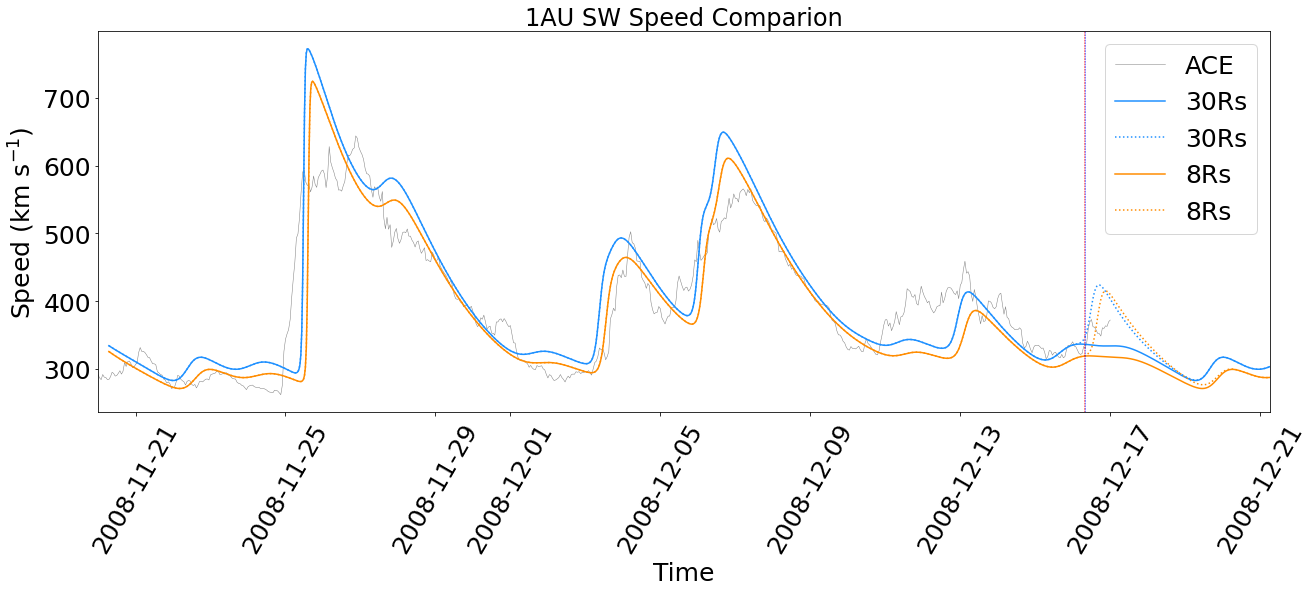

In [1822]:
# Formate ACE data
dface = pd.DataFrame()
dface = df_ace[df_ace.speed > 0]               # get rid of invalid data points
dface['time'] = Time(dface['time']).datetime

# load 30rs deterministic model run
# calculate time at 30Rs based on 34Rs obs
d = 4 * u.solRad
s = 497 * u.km/u.s
d_convert = d.to(u.km)
t = d_convert / s
tat30 = Time("2008-12-12 20:49:00", format='iso').jd - t.to(u.day).value

launch = Time(tat30, format='jd') - Time("2008-11-20 06:56:00", format='iso').jd

model = H.HUXt(v_boundary=v_boundary, cr_num=2077, lon_out=0.0*u.deg, simtime=31*u.day, dt_scale=4)
cme = H.ConeCME(t_launch=launch.value*u.day, latitude = 9.0*u.deg, longitude=10.0*u.deg, width=42*u.deg, v=497*(u.km/u.s), thickness=5*u.solRad)
cme_list=[cme]
model.solve(cme_list)

# Format data for plotting
time_mod = model.time_init + model.time_out
time_mod = time_mod.datetime

id_r = np.argmin(np.abs(model.r - 1*u.au))
id_lon = np.argmin(np.abs(model.lon - 0.0*u.deg))

# load 8rs deterministic model run
launch = (Time("2008-12-12 10:37:00", format='iso') - Time("2008-11-20 06:56:00", format='iso'))

model8 = H.HUXt(v_boundary=v_boundary, cr_num=2077, lon_out=0.0*u.deg, simtime=31*u.day, dt_scale=4, r_min=8*u.solRad, map_inwards=True)
cme8 = H.ConeCME(t_launch=launch.value*u.day, latitude = 9.0*u.deg, longitude=10.0*u.deg, width=42*u.deg, v=497*(u.km/u.s), thickness=5*u.solRad)
cme_list8=[cme8]
model8.solve(cme_list8)

# Format data for plotting
time_mod_8 = model8.time_init + model8.time_out
time_mod_8 = time_mod_8.datetime

id_r_8 = np.argmin(np.abs(model8.r - 1*u.au))
id_lon_8 = np.argmin(np.abs(model8.lon - 0.0*u.deg))


plt.rcParams.update({'font.size': 20, 'axes.labelsize':25, 'legend.fontsize':25,'xtick.labelsize': 25.0,'ytick.labelsize': 25.0,})

plt.figure(figsize = [21,7])
plt.plot(dface.time, dface.speed, color='grey', lw=0.5, label='ACE')
plt.plot(time_mod, model.v_grid_amb[:,id_r,id_lon],'dodgerblue', label='30Rs')
plt.plot(time_mod, model.v_grid_cme[:,id_r,id_lon],color='dodgerblue', ls=':', label='30Rs')

plt.plot(time_mod_8, model8.v_grid_amb[:,id_r_8,id_lon_8],'darkorange', label='8Rs')
plt.plot(time_mod_8, model8.v_grid_cme[:,id_r_8,id_lon_8],color='darkorange', ls=':', label='8Rs')

plt.axvline(Time("2008-12-16 07:23:00", format='iso').datetime, ls='--', color='r', lw=0.5)
plt.axvline(Time("2008-12-16 07:52:30", format='iso').datetime, ls='--', color='b', lw=0.5)

plt.title('1AU SW Speed Comparion')
plt.xlabel('Time')
plt.xticks(rotation=60)
plt.xlim(left = df.time.min(), right=time_mod.max())
# plt.xlim(left = Time("2008-12-16 00:00:00", format='iso').datetime,
#         right = Time("2008-12-16 18:00:00", format='iso').datetime)
plt.ylabel('Speed (km s$^{-1}$)')
plt.legend(loc='best')

# cr_num = np.int32(model.cr_num.value)
# filename = "HUXt_CR{:03d}_SWSchemeComparison.pdf".format(cr_num)
# filepath = os.path.join(model._figure_dir_, filename)            
# plt.savefig(filepath, dpi=150, bbox_inches='tight')
# filename = "HUXt_CR{:03d}_SWSchemeComparison.png".format(cr_num)
# filepath = os.path.join(model._figure_dir_, filename)            
# plt.savefig(filepath, dpi=150, bbox_inches='tight')



In [1826]:
def RMSEscatter(feature, view, tag, title=True, save=False):

    # load data
    ainfo = load_csv_file("arrival information", tag=tag)
    errorsA, errorsB = load_csv_file("errors", tag=tag)

    # drop invalid data that impacts statistical analysis
    for index,value in enumerate(ainfo["Arrival Time"]):
        if value == Time('3000-01-01 00:00:00.000', format='iso').jd:
            ainfo = ainfo.drop([index])
            errorsA = errorsA.drop([index])
            errorsB = errorsB.drop([index])

    obsACE = Time('2008-12-16 07:00:00', format='iso').jd
    x = (ainfo["Arrival Time"] - obsACE)*24
    
    if view == "A":
        if feature == "nose" or feature == "flank" or feature == "N & F":
            y = errorsA["RMSE {} error".format(feature)]
        elif feature == "sec flank":
            print("Secondary flank not available from this viewpoint.")
        else:
            print("Error: Feature not valid.")
    elif view == "B":
        if feature == "nose" or feature == "flank" or feature == "N & F" or feature == "sec flank":
            y = errorsB["RMSE {} error".format(feature)]
        else:
            print("Error: Feature not valid.")
    elif view == "both":
        if feature == "N & F":
            y = errorsA["RMSE error w/ ST-B"]
        elif feature == "nose" or feature == "flank":
            y = errorsA["RMSE {} error".format(feature)] + errorsB["RMSE {} error".format(feature)]
        elif feature == "sec flank":
            print("Secondary flank not available from all viewpoints.")
        else:
            print("Error: Feature not valid.")
    
    
    plt.figure()
    plt.scatter(x,y, color='k', s=2)

    plt.xlabel("Time Error (Hours)", labelpad=20)
    plt.ylabel("RMSE", labelpad=20)
    plt.xlim(left=-10, right=20)
    plt.ylim(bottom=0, top=3)
    # ax=plt.gca()
    # # ax.xaxis.set_major_locator(MultipleLocator(2))
    # ax.xaxis.set_minor_locator(MultipleLocator(1))
    # ax.yaxis.set_major_locator(MultipleLocator(.2))
    # ax.yaxis.set_minor_locator(MultipleLocator(.1))
    
    if title == True:
        plt.text(19.8,3.1, '{} from {}'.format(feature, view), fontsize=14, ha='right', weight='bold')
        
    if save:
        filename = "HUXt_{}_ens_scat_plot_{}{}.png".format(tag,feature,view)
        filepath = os.path.join(model._figure_dir_, filename)            
        plt.savefig(filepath, dpi=300, bbox_inches='tight')
        
        filename = "HUXt_{}_ens_scat_plot_{}{}.pdf".format(tag,feature,view)
        filepath = os.path.join(model._figure_dir_, filename)            
        plt.savefig(filepath, dpi=300, bbox_inches='tight')

    return



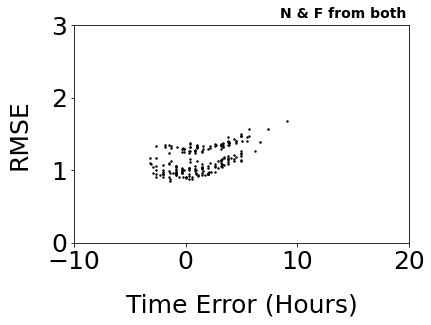

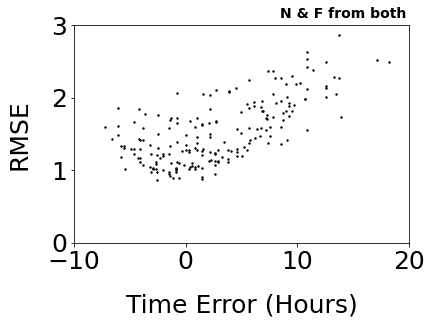

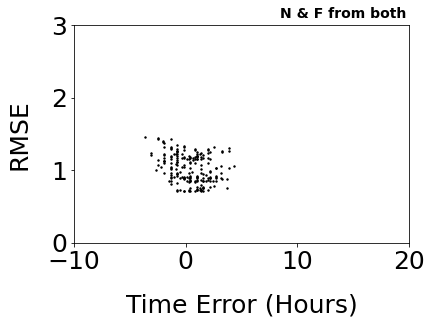

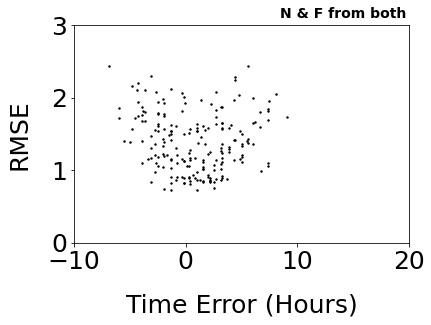

In [1827]:
RMSEscatter(feature="N & F", view="both", tag="12Dec08_n=200_r=30_PS=1", title=True, save=True)
RMSEscatter(feature="N & F", view="both", tag="12Dec08_n=200_r=30_PS=2", title=True, save=True)
RMSEscatter(feature="N & F", view="both", tag="12Dec08_n=200_r=8_PS=1", title=True, save=True)
RMSEscatter(feature="N & F", view="both", tag="12Dec08_n=200_r=8_PS=2", title=True, save=True)

,bins,RMSE,Ens Freq,Average RMSE
0,2.454817e+06,9.538302,11,0.867118
1,2.454817e+06,5.730499,6,0.955083
2,2.454817e+06,11.361487,10,1.136149
3,2.454817e+06,19.325423,19,1.017128
4,2.454817e+06,11.734198,11,1.066745
5,2.454817e+06,14.884038,14,1.063146
6,2.454817e+06,19.753175,17,1.161951
7,2.454817e+06,25.442841,23,1.106210
8,2.454817e+06,14.827301,14,1.059093
9,2.454817e+06,10.179111,9,1.131012


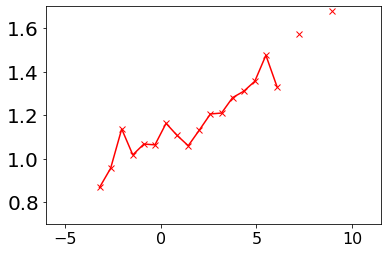

In [1819]:
# Load dataframes
ainfo = load_csv_file("arrival information", tag='12Dec08_n=200_r=30_PS=1')
errorsA, errorsB = load_csv_file("errors", tag='12Dec08_n=200_r=30_PS=1')

# Combine df

# drop invalid data that impacts statistical analysis
for index,value in enumerate(ainfo["Arrival Time"]):
    if value == Time('3000-01-01 00:00:00.000', format='iso').jd:
        ainfo = ainfo.drop([index])
        errorsA = errorsA.drop([index])

# Define bins 
bins = []
no_unique_values = len(ainfo["Arrival Time"].unique())
for i in range(no_unique_values):
    if i == 0:
        astroTimebins = Time(sorted_arrival["Arrival Time"][0], format='jd')
    else:
        astroTimebins = astroTimebins + model.dt_out
        astroTimebins = Time(astroTimebins, format='jd')
    bins.append(astroTimebins.jd)
    
#sort data into bins
whichbin = np.digitize(ainfo["Arrival Time"], bins, right=True)

rmse = []
for i in range(1,whichbin.max()+1):
    add = 0
    for ind, val in enumerate(whichbin):
        if val == i:
            add = add + errorsA["RMSE error w/ ST-B"][ind]
    rmse.append(add)

    
df = pd.DataFrame()
df["bins"] = bins[0:whichbin.max()]
df["RMSE"] = rmse
df["Ens Freq"] = binfreqsort["counts"][0:22]
df["Average RMSE"] = df["RMSE"] / df["Ens Freq"]

plt.figure()
plt.plot((df["bins"]-obsACE)*24, df["Average RMSE"], 'rx', ls='-')
plt.xlim(left=-6, right=11.5)
plt.ylim(top=1.7, bottom = 0.7)

df

In [1763]:
# Sort the dataframe in terms of arrival time
sorted_arrival = arrival_info.sort_values(by=["Arrival Time"])
sorted_arrival = sorted_arrival.reset_index(drop=True)
no_unique_values = len(sorted_arrival["Arrival Time"].unique())

# Make bins based on model outpout
bins = []
for i in range(no_unique_values):
    if i == 0:
        astroTimebins = Time(sorted_arrival["Arrival Time"][0], format='jd')
    else:
        astroTimebins = astroTimebins + model.dt_out
        astroTimebins = Time(astroTimebins, format='jd')
    bins.append(astroTimebins.value)

# Generate freq of values
freq = sorted_arrival["Arrival Time"].value_counts(sort=True)
binfreq = sorted_arrival["Arrival Time"].value_counts(bins=bins, sort=True).rename_axis('unique_values').reset_index(name='counts')
binfreqsort = binfreq.sort_values(by=["unique_values"])
binfreqsort = binfreqsort.reset_index(drop=True)

In [1813]:
binfreqsort[0:23]

,unique_values,counts
0,"(2454816.6569999997, 2454816.682]",11
1,"(2454816.682, 2454816.707]",6
2,"(2454816.707, 2454816.731]",10
3,"(2454816.731, 2454816.755]",19
4,"(2454816.755, 2454816.779]",11
5,"(2454816.779, 2454816.803]",14
6,"(2454816.803, 2454816.827]",17
7,"(2454816.827, 2454816.852]",23
8,"(2454816.852, 2454816.876]",14
9,"(2454816.876, 2454816.9]",9


In [1818]:
Time(df.bins, format='jd').iso

<Time object: scale='utc' format='jd' value=[2454816.65833981 2454816.68249606 2454816.70665231 2454816.73080856
 2454816.75496481 2454816.77912106 2454816.80327731 2454816.82743356
 2454816.85158981 2454816.87574606 2454816.89990231 2454816.92405856
 2454816.94821481 2454816.97237106 2454816.99652731 2454817.02068356
 2454817.04483981 2454817.06899606 2454817.09315231 2454817.11730856
 2454817.14146481 2454817.16562106]>